### Projet Machine Learning : Notebook R

In [1]:
library(dplyr)
library(naniar)


Attachement du package : ‘dplyr’


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union




### I. Analyse exploratoire des données

In [58]:
# path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
path <- ""
df <- read.csv(paste(path, "global-data-on-sustainable-energy (1).csv", sep = ""),
                    sep = ",", dec="." ,header = TRUE)
# Premières lignes du jeu de données
head(df)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.P.Km2. Land

1. Commencez par vérifier la nature des différentes variables et leur encodage. Convertissez la variable
Year en une variable qualitative. N.B. Curieusement, la variable Density (P/Km2) n’est pas con-
sidérée comme une variable numérique. Convertissez-là en une variable numérique en prenant soin de
ne pas transformer les nombre décimaux en NA. Par exemple, en R, vous pourrez utiliser la formule:
as.numeric(gsub(",","",data$Density.n.P.Km2.)), où data représente le jeu de données utilisé.

In [59]:
head(df)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.P.Km2. Land

In [60]:
print("---Variable Year---")

df[,"Year"] <- as.factor(df[,"Year"])
summary(df["Year"])

print("---Variable Entity---")

df[,"Entity"] <- as.factor(df[,"Entity"])
summary(df["Entity"])

print("---Variable Density.P.Km2.---")

df[,"Density.P.Km2."] <- as.numeric(gsub(",",".",(df[,"Density.P.Km2."])))
summary(df["Density.P.Km2."])

df_na <- df #on stocke df avec les valeurs NA pour la partie 'complétion de variables'

[1] "---Variable Year---"


      Year     
 2013   : 175  
 2014   : 175  
 2015   : 175  
 2016   : 175  
 2017   : 175  
 2018   : 175  
 (Other):2599  

[1] "---Variable Entity---"


                 Entity    
 Afghanistan        :  21  
 Albania            :  21  
 Algeria            :  21  
 Angola             :  21  
 Antigua and Barbuda:  21  
 Argentina          :  21  
 (Other)            :3523  

[1] "---Variable Density.P.Km2.---"


 Density.P.Km2.    
 Min.   :   1.265  
 1st Qu.:  26.000  
 Median :  81.000  
 Mean   : 137.058  
 3rd Qu.: 203.000  
 Max.   :1281.000  
 NA's   :1         

2. Déterminez le taux de valeurs manquantes pour chaque variable.
On propose de supprimer pour ce projet les variables comportant un taux de données manquantes très im-
portant: Renewable-electricity-generating-capacity-per-capita, Financial flows to developing
countries (US Dollars) et Renewables (% equivalent primary energy).

[1] "0 : Entity"
[1] "0 : Year"
[1] "0.274047684297068 : Access.to.electricity....of.population."
[1] "4.63140586462044 : Access.to.clean.fuels.for.cooking"
[1] "25.513839408057 : Renewable.electricity.generating.capacity.per.capita"
[1] "57.2485612496574 : Financial.flows.to.developing.countries..US..."
[1] "5.31652507536311 : Renewable.energy.share.in.the.total.final.energy.consumption...."
[1] "0.575500137023842 : Electricity.from.fossil.fuels..TWh."
[1] "3.45300082214305 : Electricity.from.nuclear..TWh."
[1] "0.575500137023842 : Electricity.from.renewables..TWh."
[1] "1.15100027404768 : Low.carbon.electricity....electricity."
[1] "0 : Primary.energy.consumption.per.capita..kWh.person."
[1] "5.6727870649493 : Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."
[1] "11.7292408879145 : Value_co2_emissions_kt_by_country"
[1] "58.5639901342834 : Renewables....equivalent.primary.energy."
[1] "8.68731159221705 : gdp_growth"
[1] "7.72814469717731 : gdp_per_capita"
[1] "0.027404768

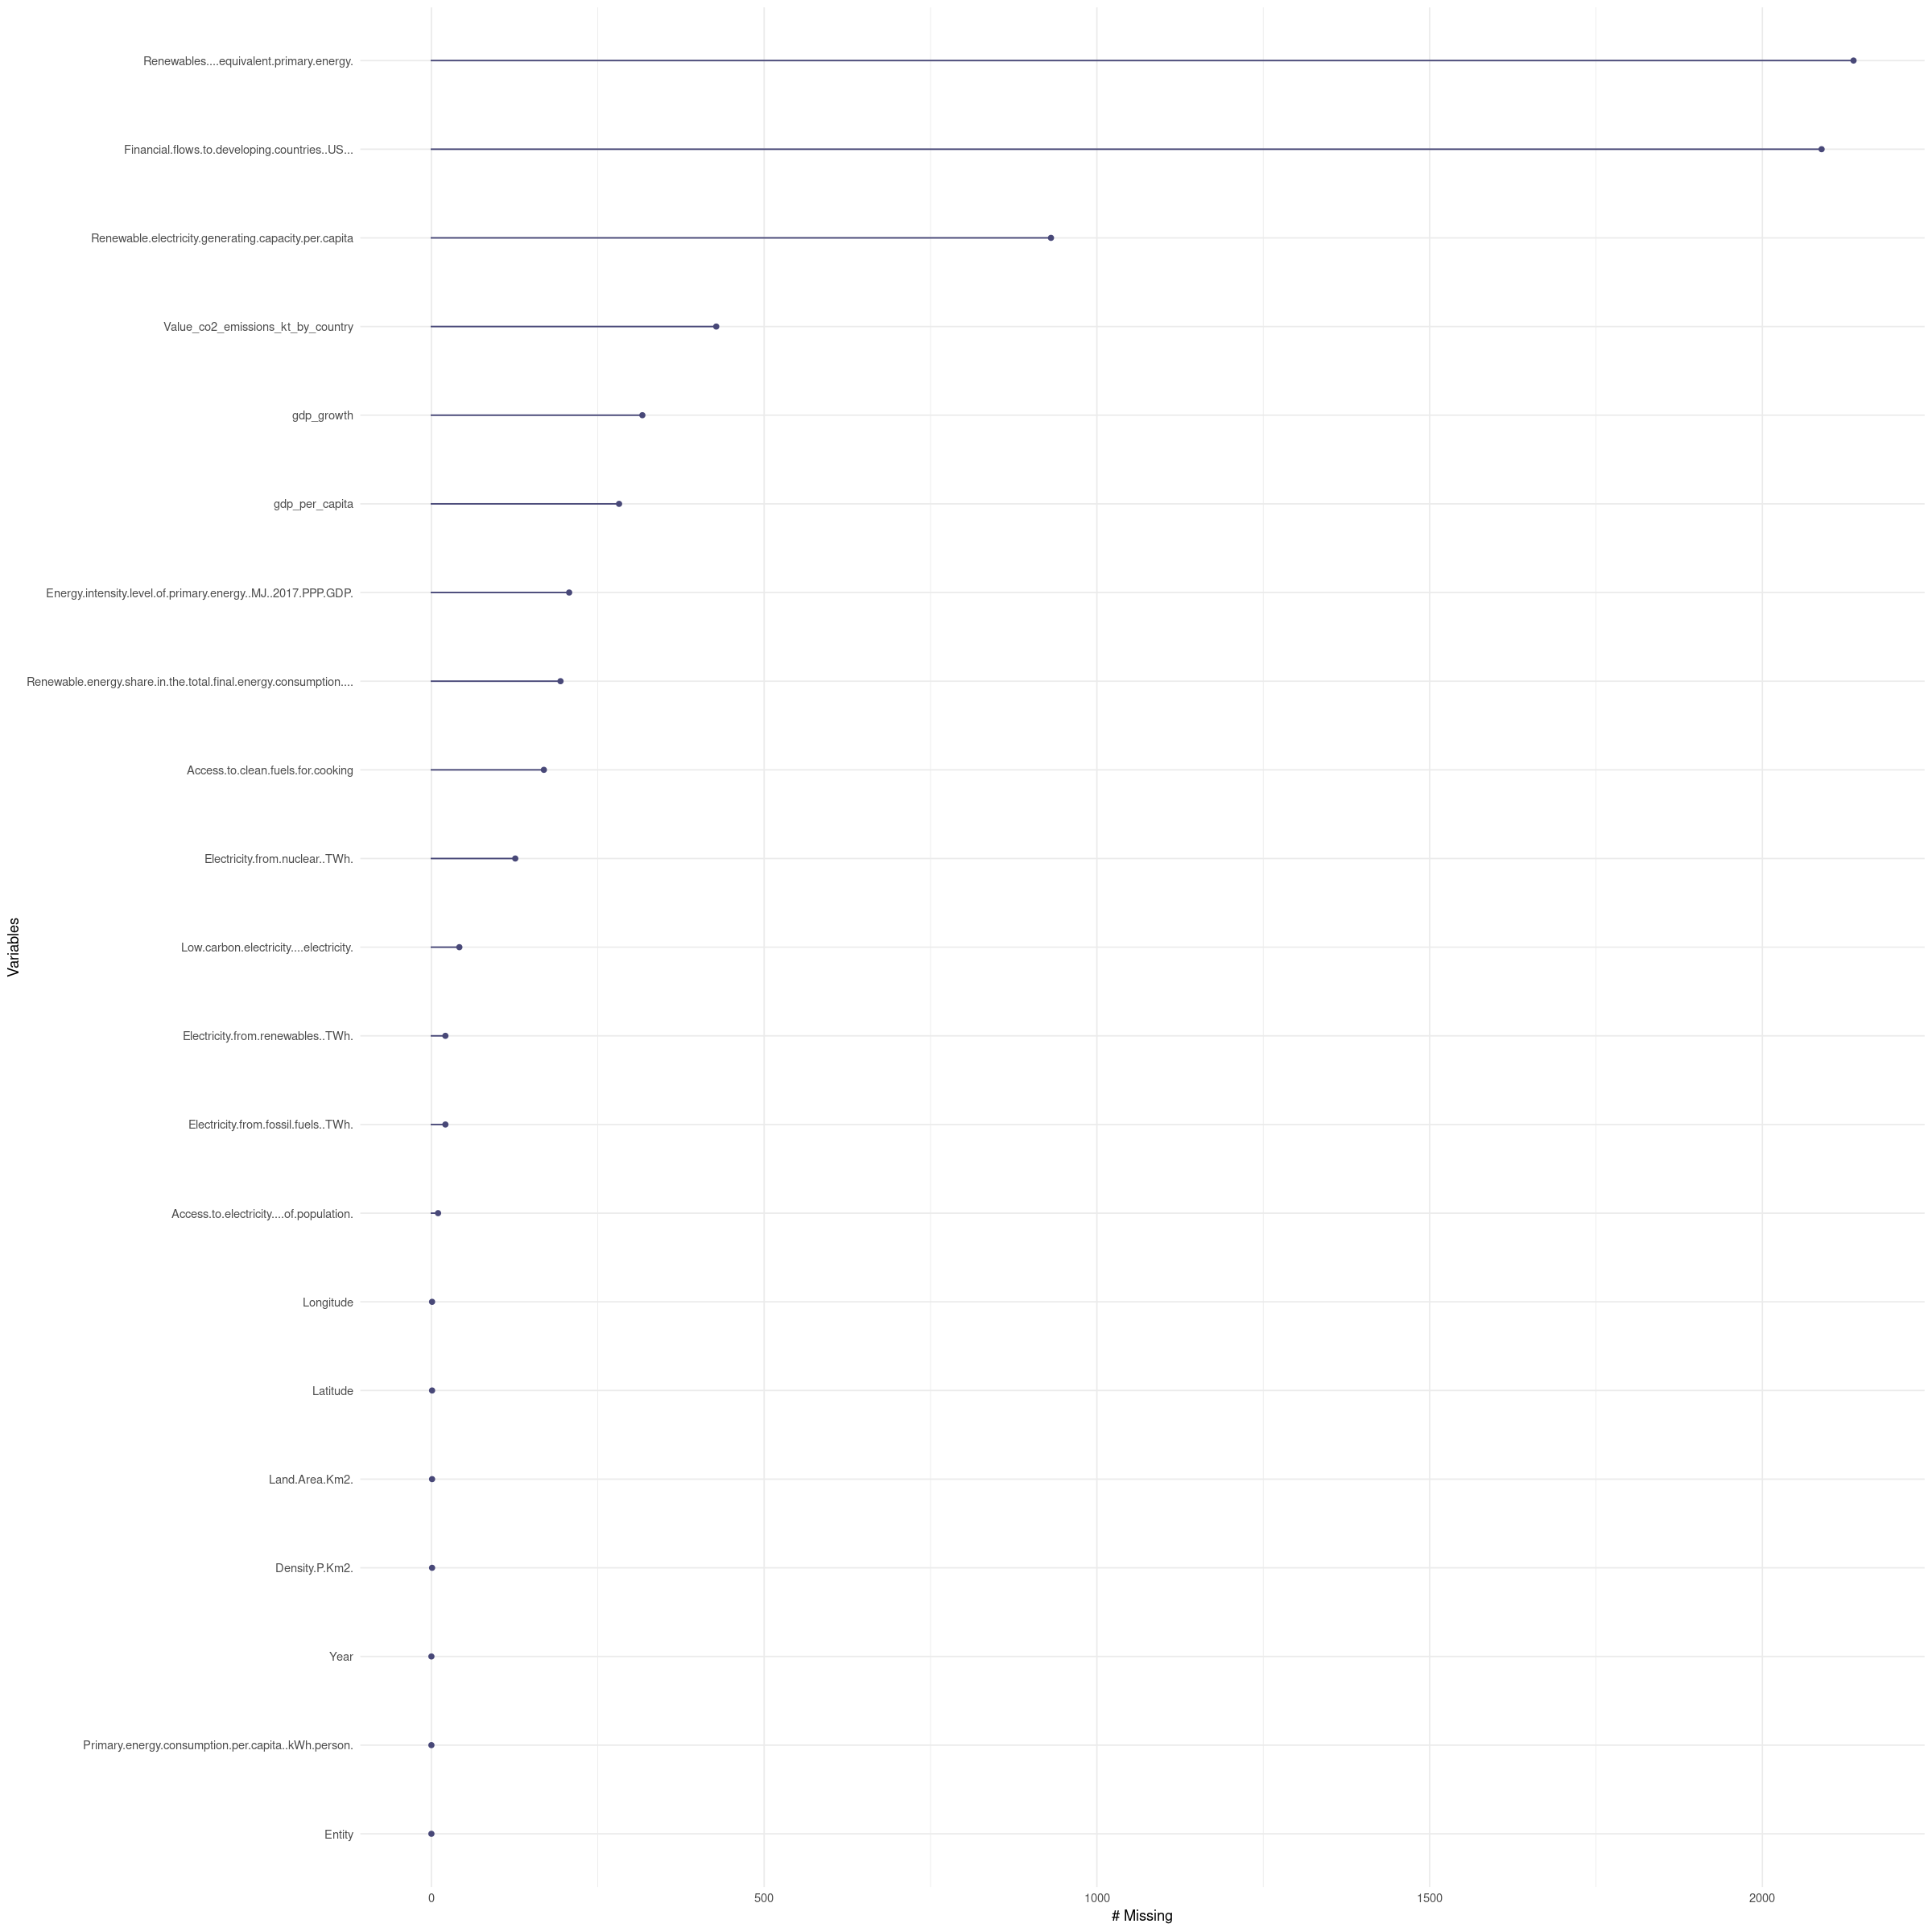

In [61]:
for (i in names(df))
  print(paste(sum(is.na(df[i])/nrow(df)*100) ,":", i))

gg_miss_var(df)

In [62]:
df <- subset(df, select = -c(Renewable.electricity.generating.capacity.per.capita, Financial.flows.to.developing.countries..US..., Renewables....equivalent.primary.energy.))

On enlève donc les colonnes inutiles, car présentant trop de données manquantes. (Renewable.electricity.generating.capacity.per.capita, Financial.flows.to.developing.countries..US..., Renewables....equivalent.primary.energy.)

In [63]:
head(df)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. Low.carbon.electricity....electricity.
1 0.31                              65.95744                              
2 0.50                              84.74577                              
3 0.56                              81.15942                              
4 0.63                              67.02128                              
5 0.56                              62.92135                              
6 0.59                              63.44086                              
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country gdp_growth gdp_per_capita Density.P.Km2.
1  760                                     NA        NA       60            
2  730                                     NA        NA       60            
3 1030                                     NA  179.4266       60            
4 1220                               8.832278  190.6838       60            
5 1030                               1.414118  211.3821       60            
6 1550                              11.229715  242.0313       60            
  Land.Area.Km2. Latitude Longitude
1 652230         33.93911 67.70995 
2 652230         33.93911 67.70995 
3 652230         33.93911 67.70995 
4 652230         33.93911 67.70995 
5 652230         33.93911 67.70995 
6 652230         33.93911 67.70995

3. Pour la suite de l’étude, vous allez créer un jeu de données comportant seulement les individus qui n’ont
pas de valeur manquante. Il reste alors 2868 observations

In [64]:
df <- na.omit(df)

In [65]:
print(paste("Le jeu de données contient désormais",nrow(df),"lignes, après avoir supprimé les lignes comportant des valeurs manquantes"))

[1] "Le jeu de données contient désormais 2868 lignes, après avoir supprimé les lignes comportant des valeurs manquantes"


4. Commencez l’exploration par une analyse descriptive unidimensionnelle des données. Des transformations
des variables quantitatives vous semblent-t-elles pertinentes ?

In [66]:
summary(df)

                 Entity          Year     
 Algeria            :  20   2014   : 147  
 Angola             :  20   2015   : 147  
 Antigua and Barbuda:  20   2016   : 146  
 Argentina          :  20   2017   : 146  
 Armenia            :  20   2018   : 146  
 Australia          :  20   2019   : 146  
 (Other)            :2748   (Other):1990  
 Access.to.electricity....of.population. Access.to.clean.fuels.for.cooking
 Min.   :  1.252                         Min.   :  0.00                   
 1st Qu.: 53.238                         1st Qu.: 22.07                   
 Median : 97.000                         Median : 81.55                   
 Mean   : 76.585                         Mean   : 62.17                   
 3rd Qu.:100.000                         3rd Qu.:100.00                   
 Max.   :100.000                         Max.   :100.00                   
                                                                          
 Renewable.energy.share.in.the.total.final.energy.consum

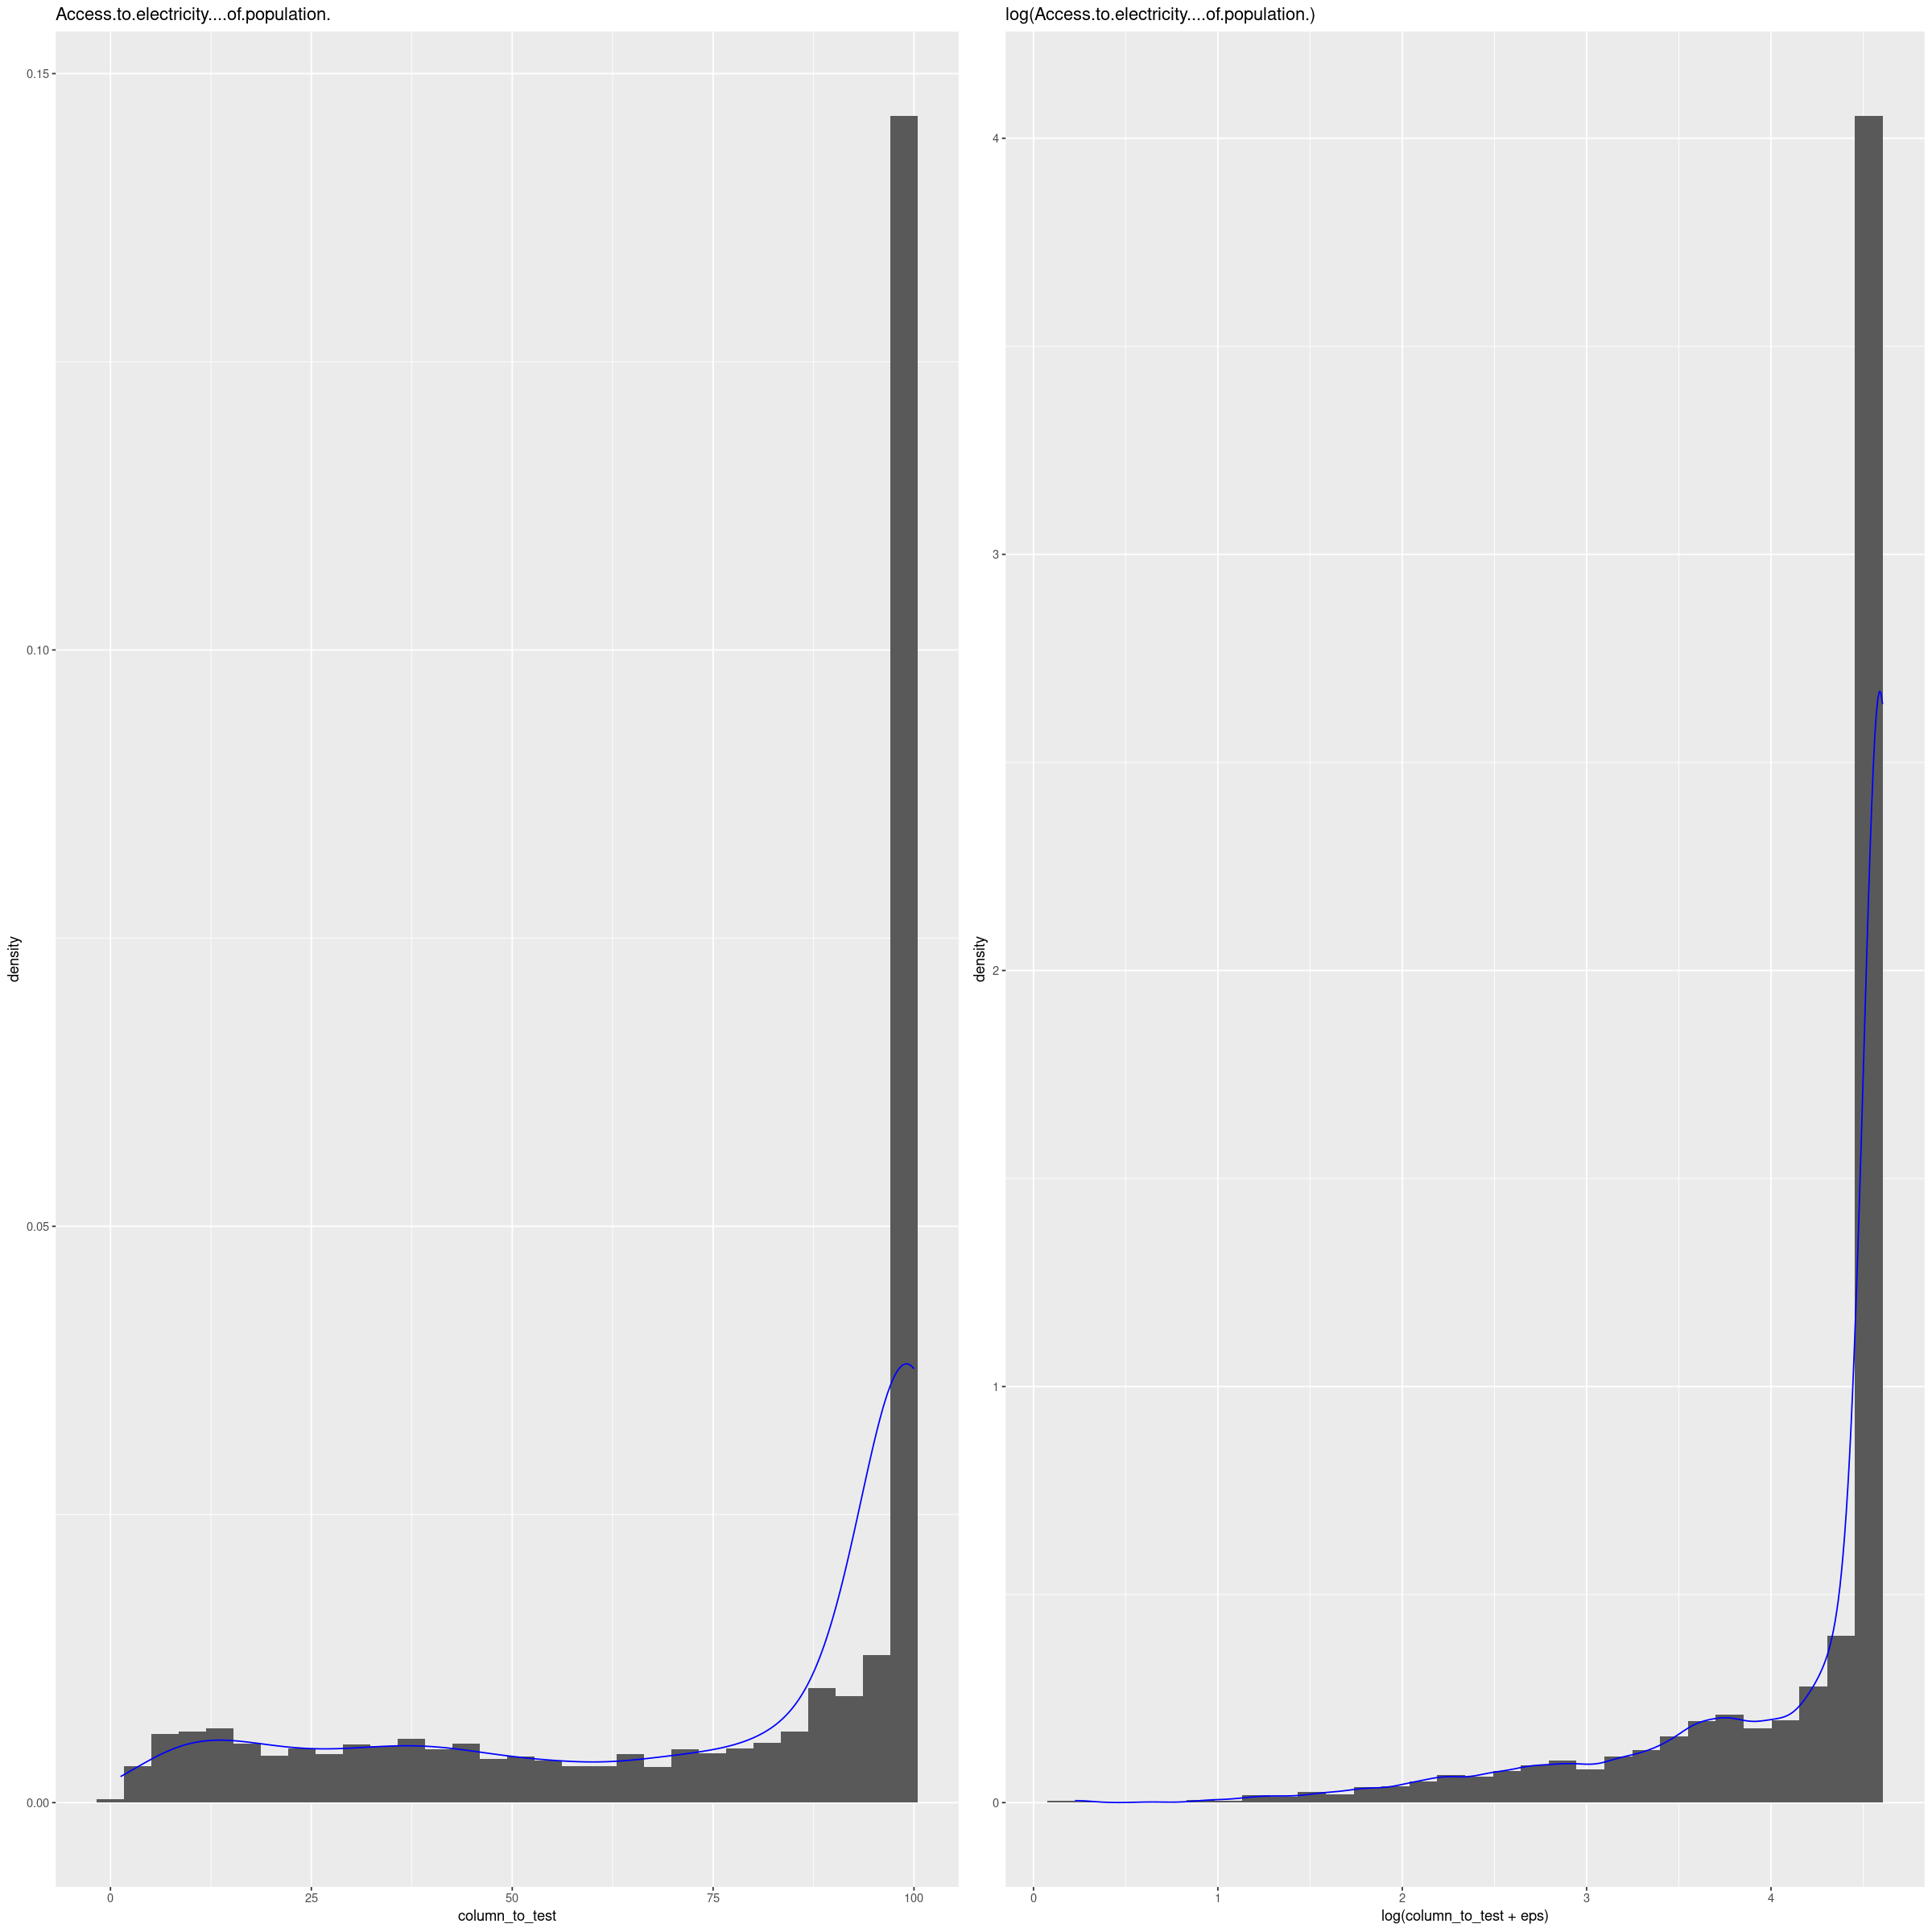

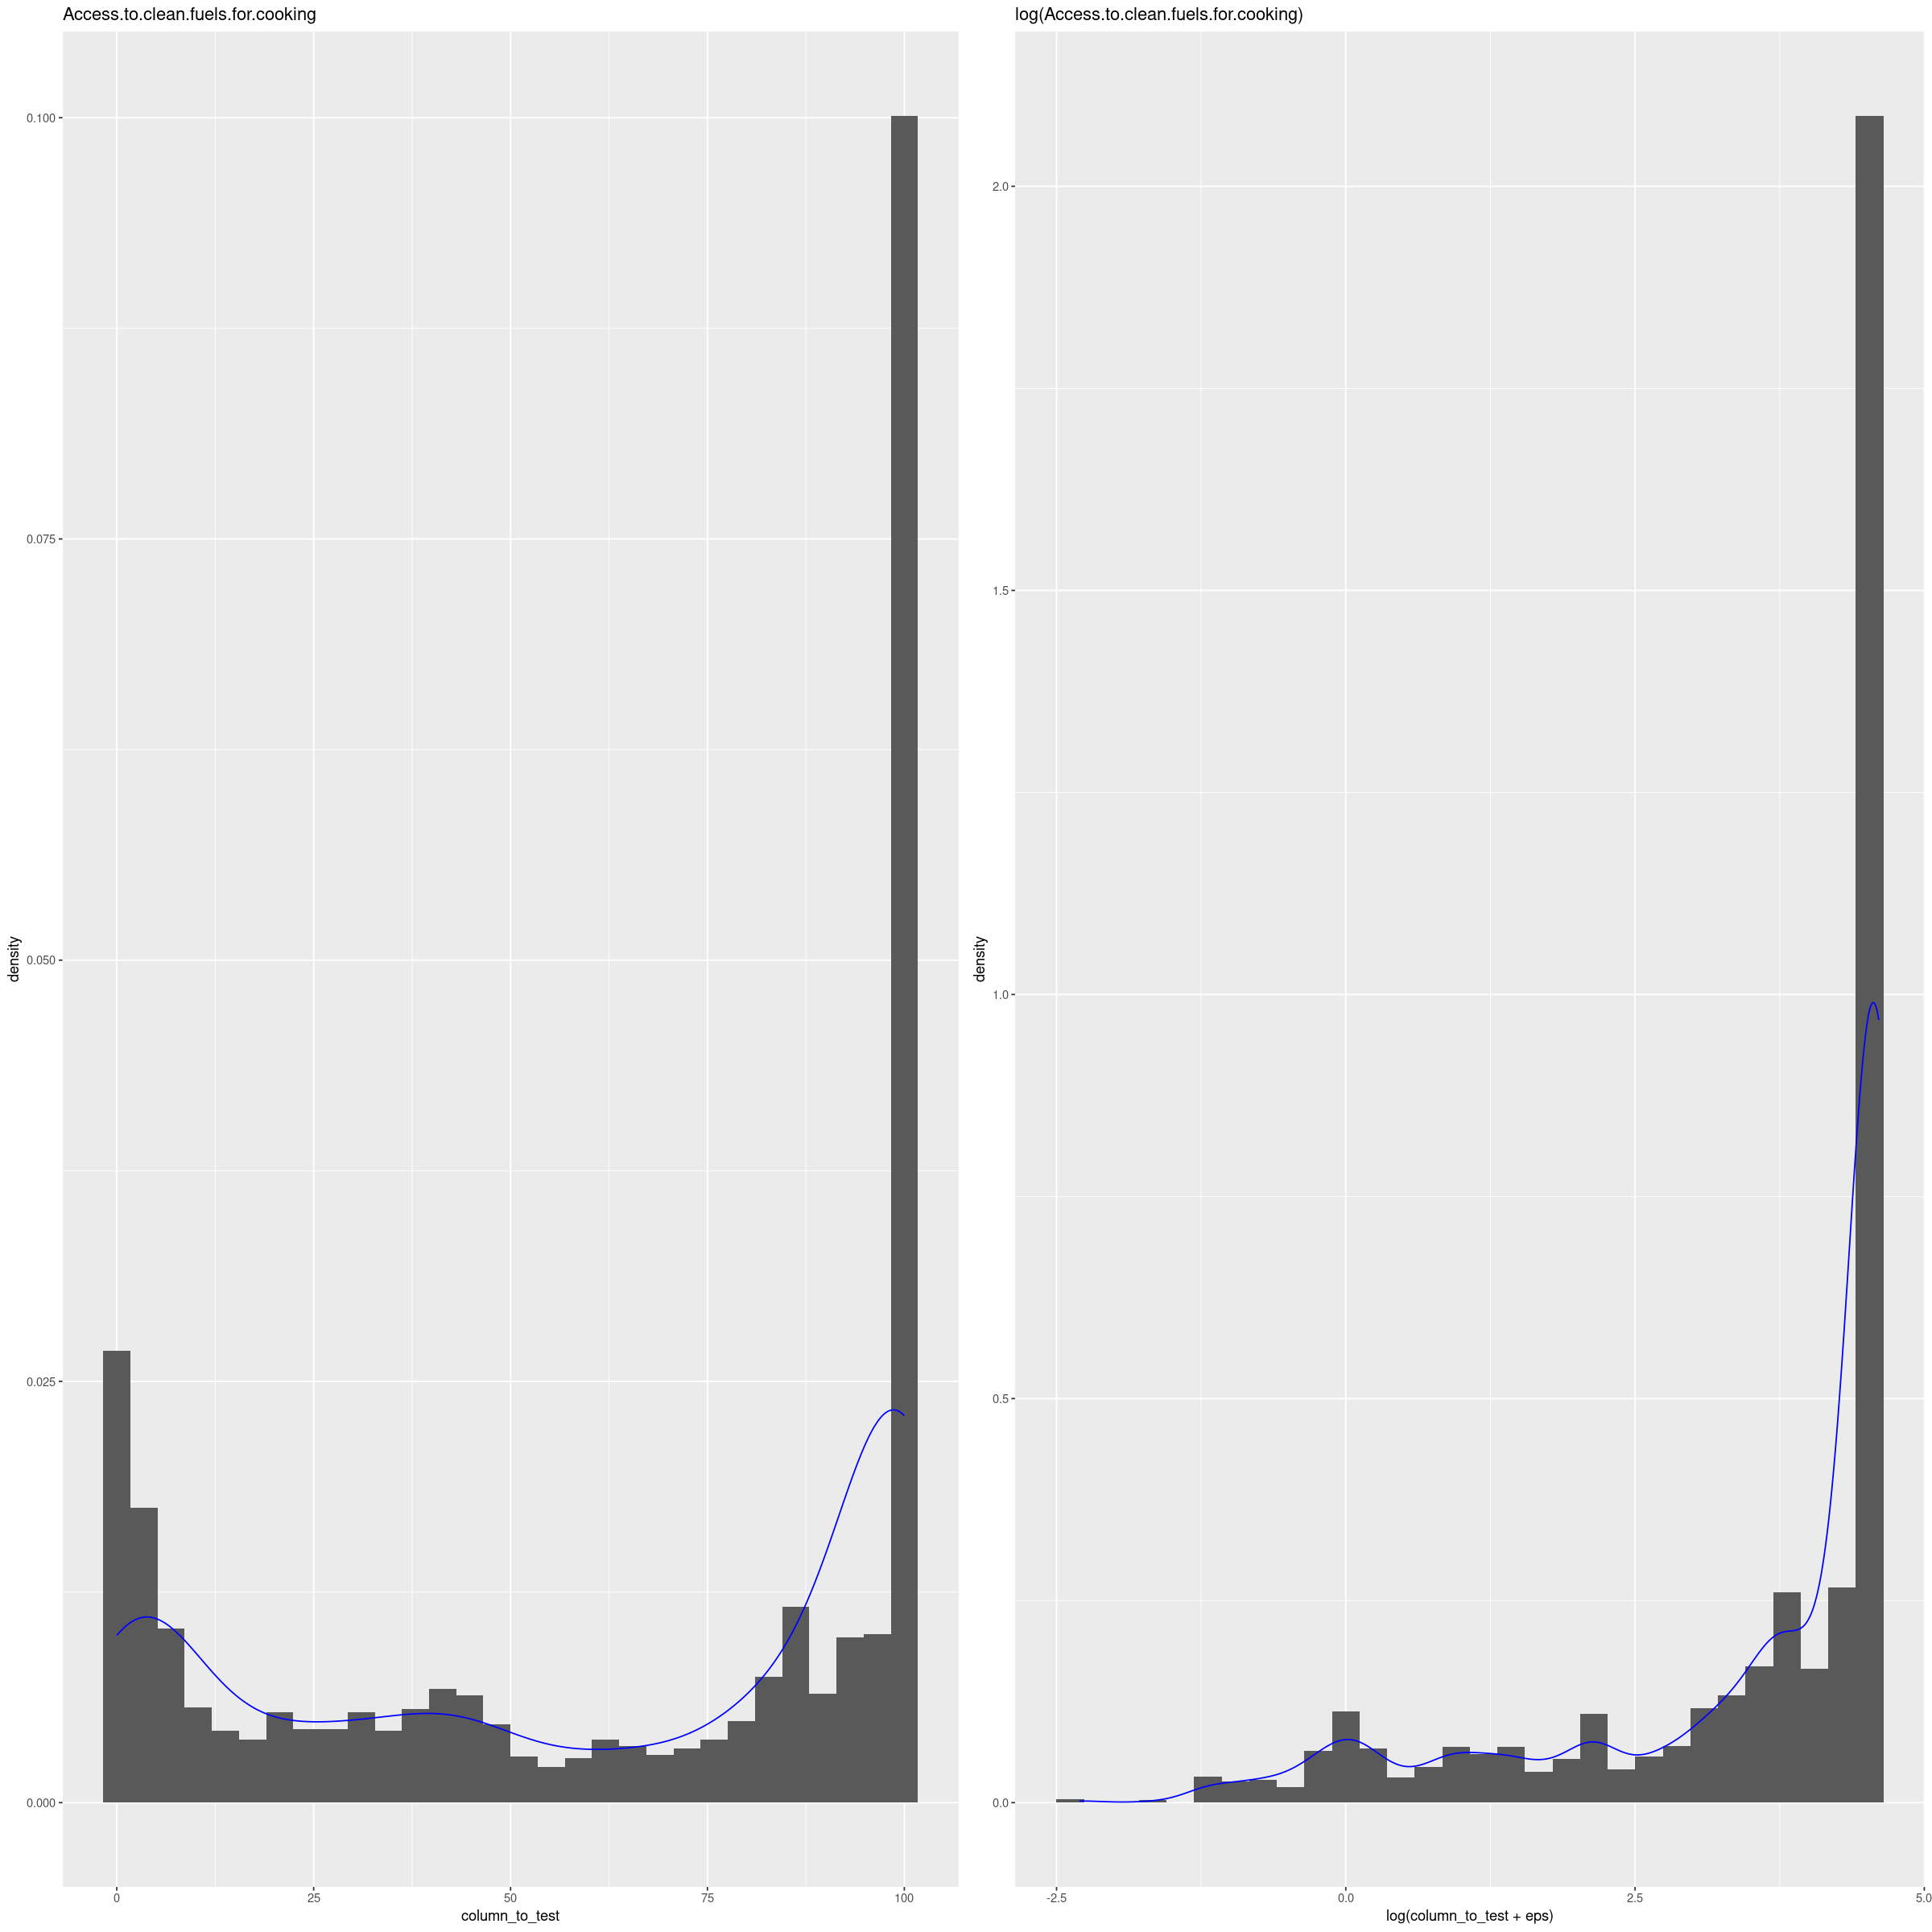

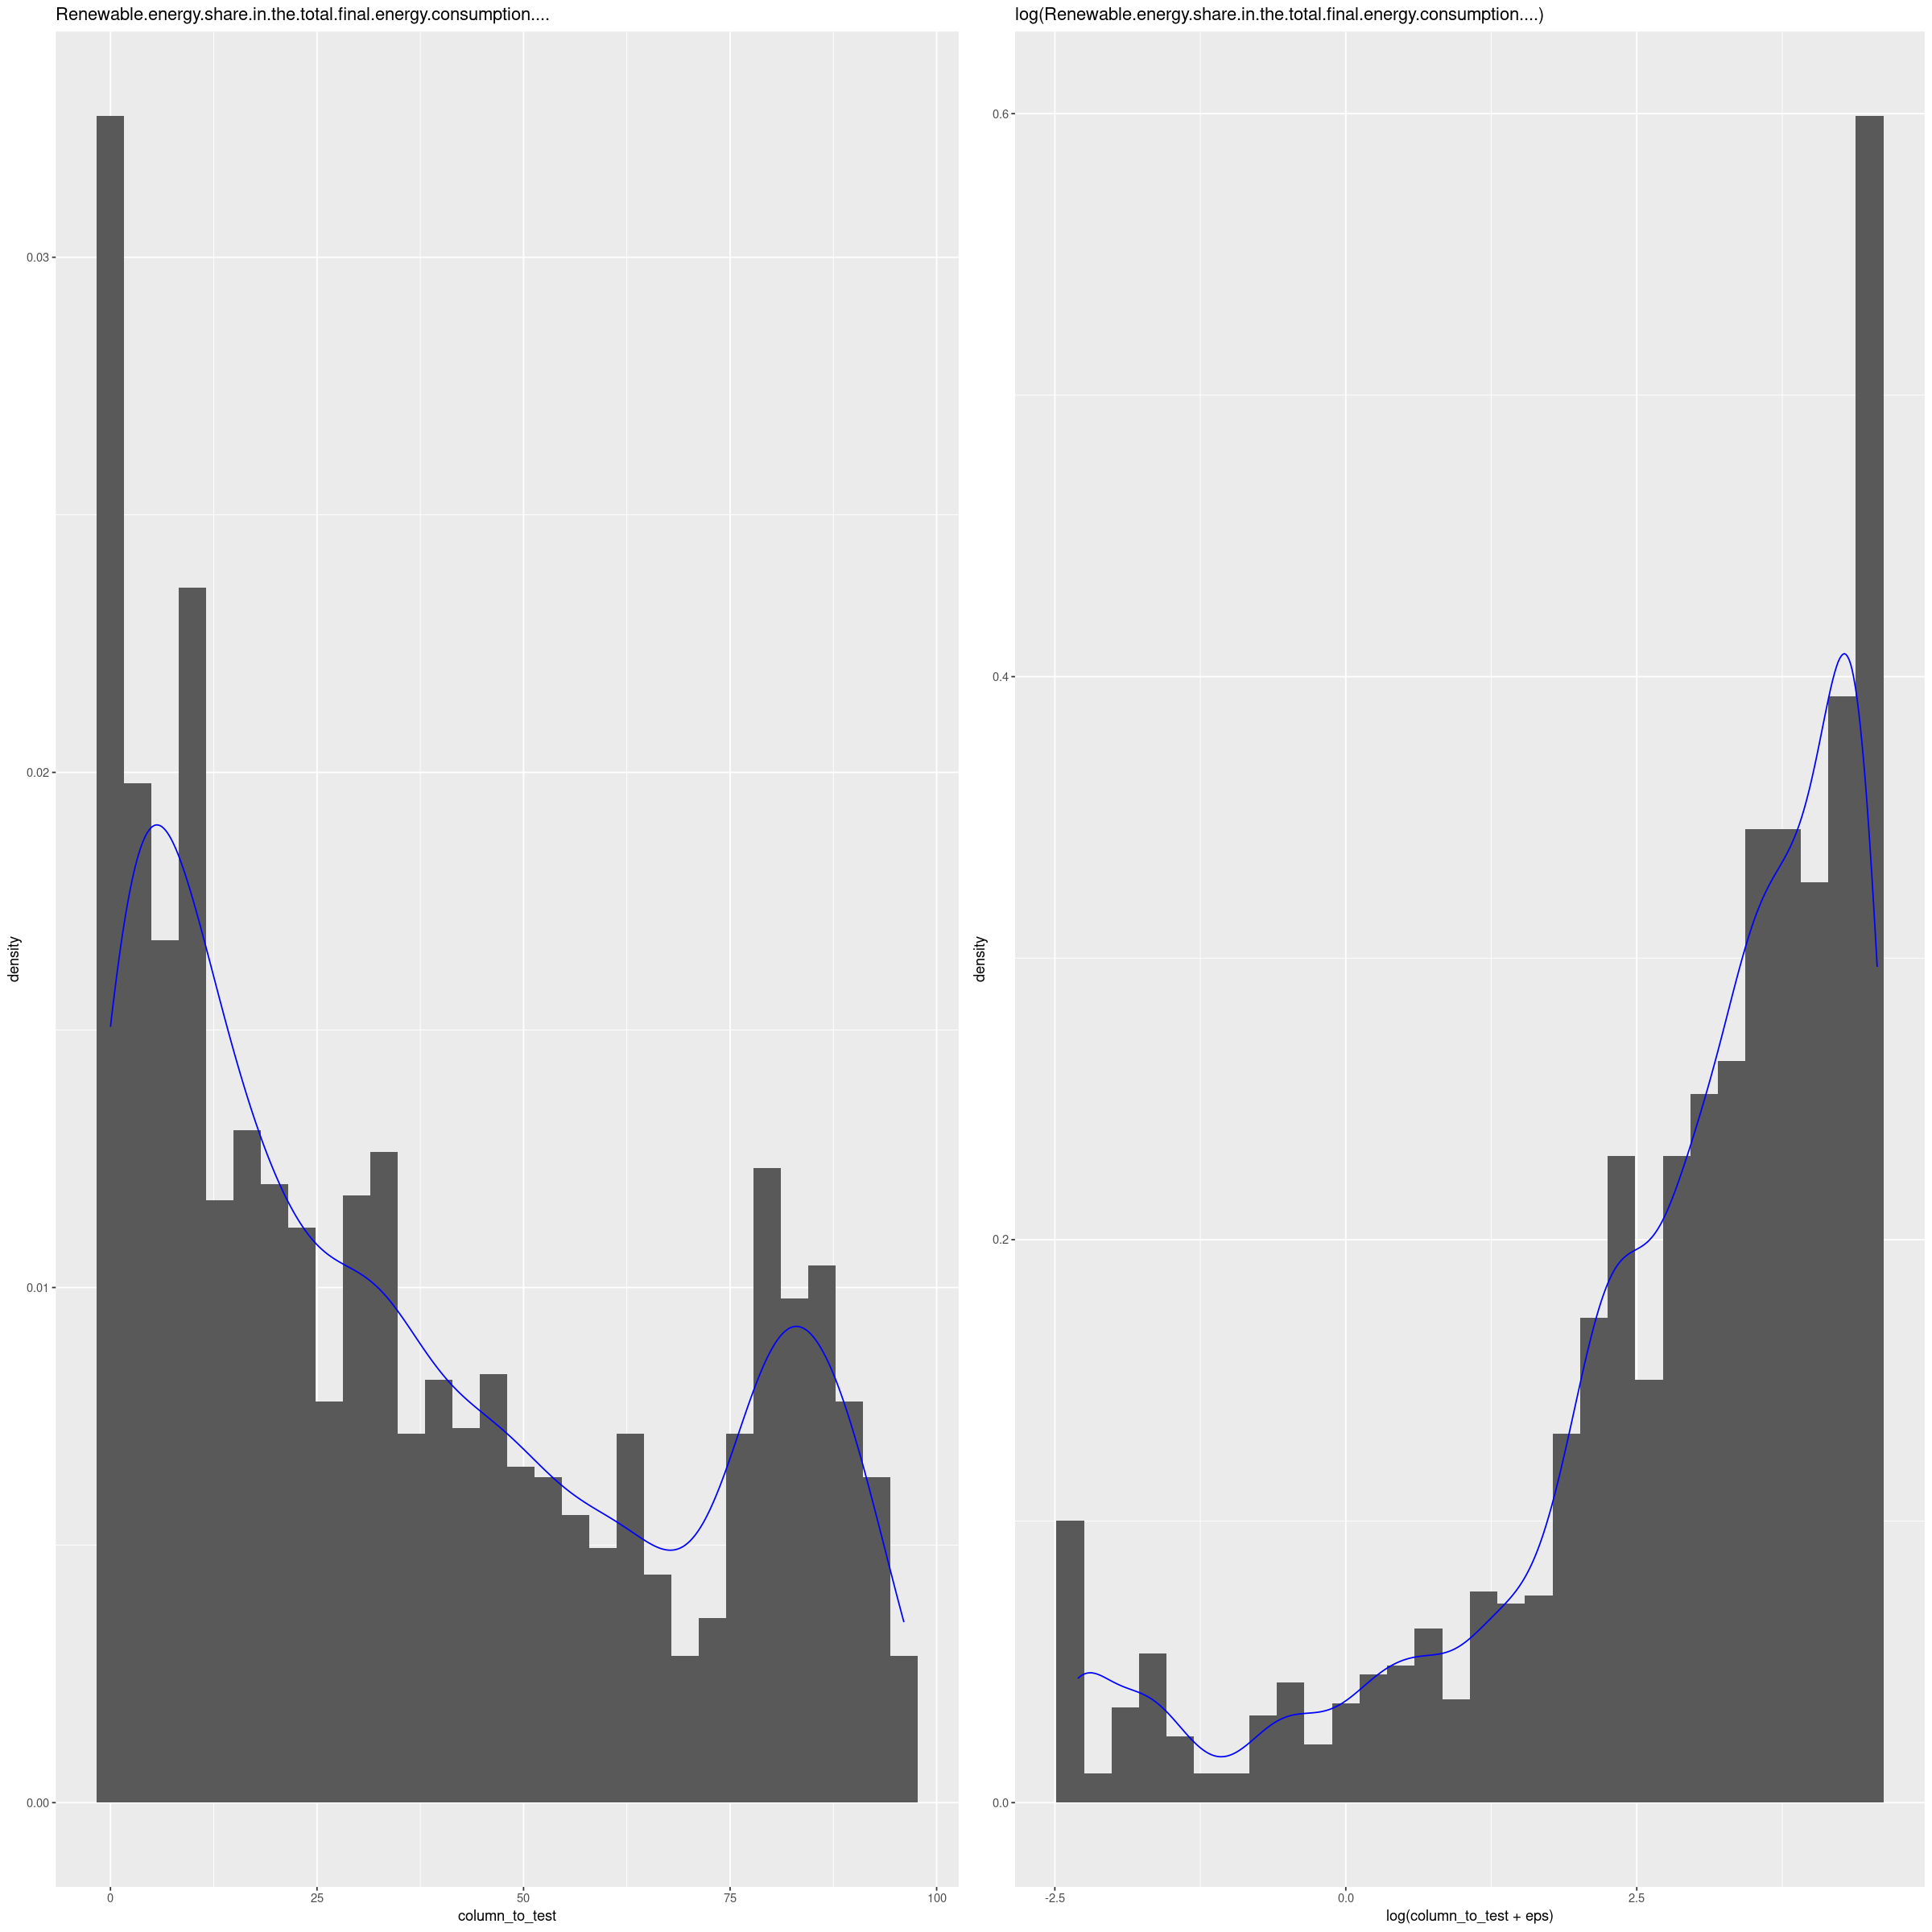

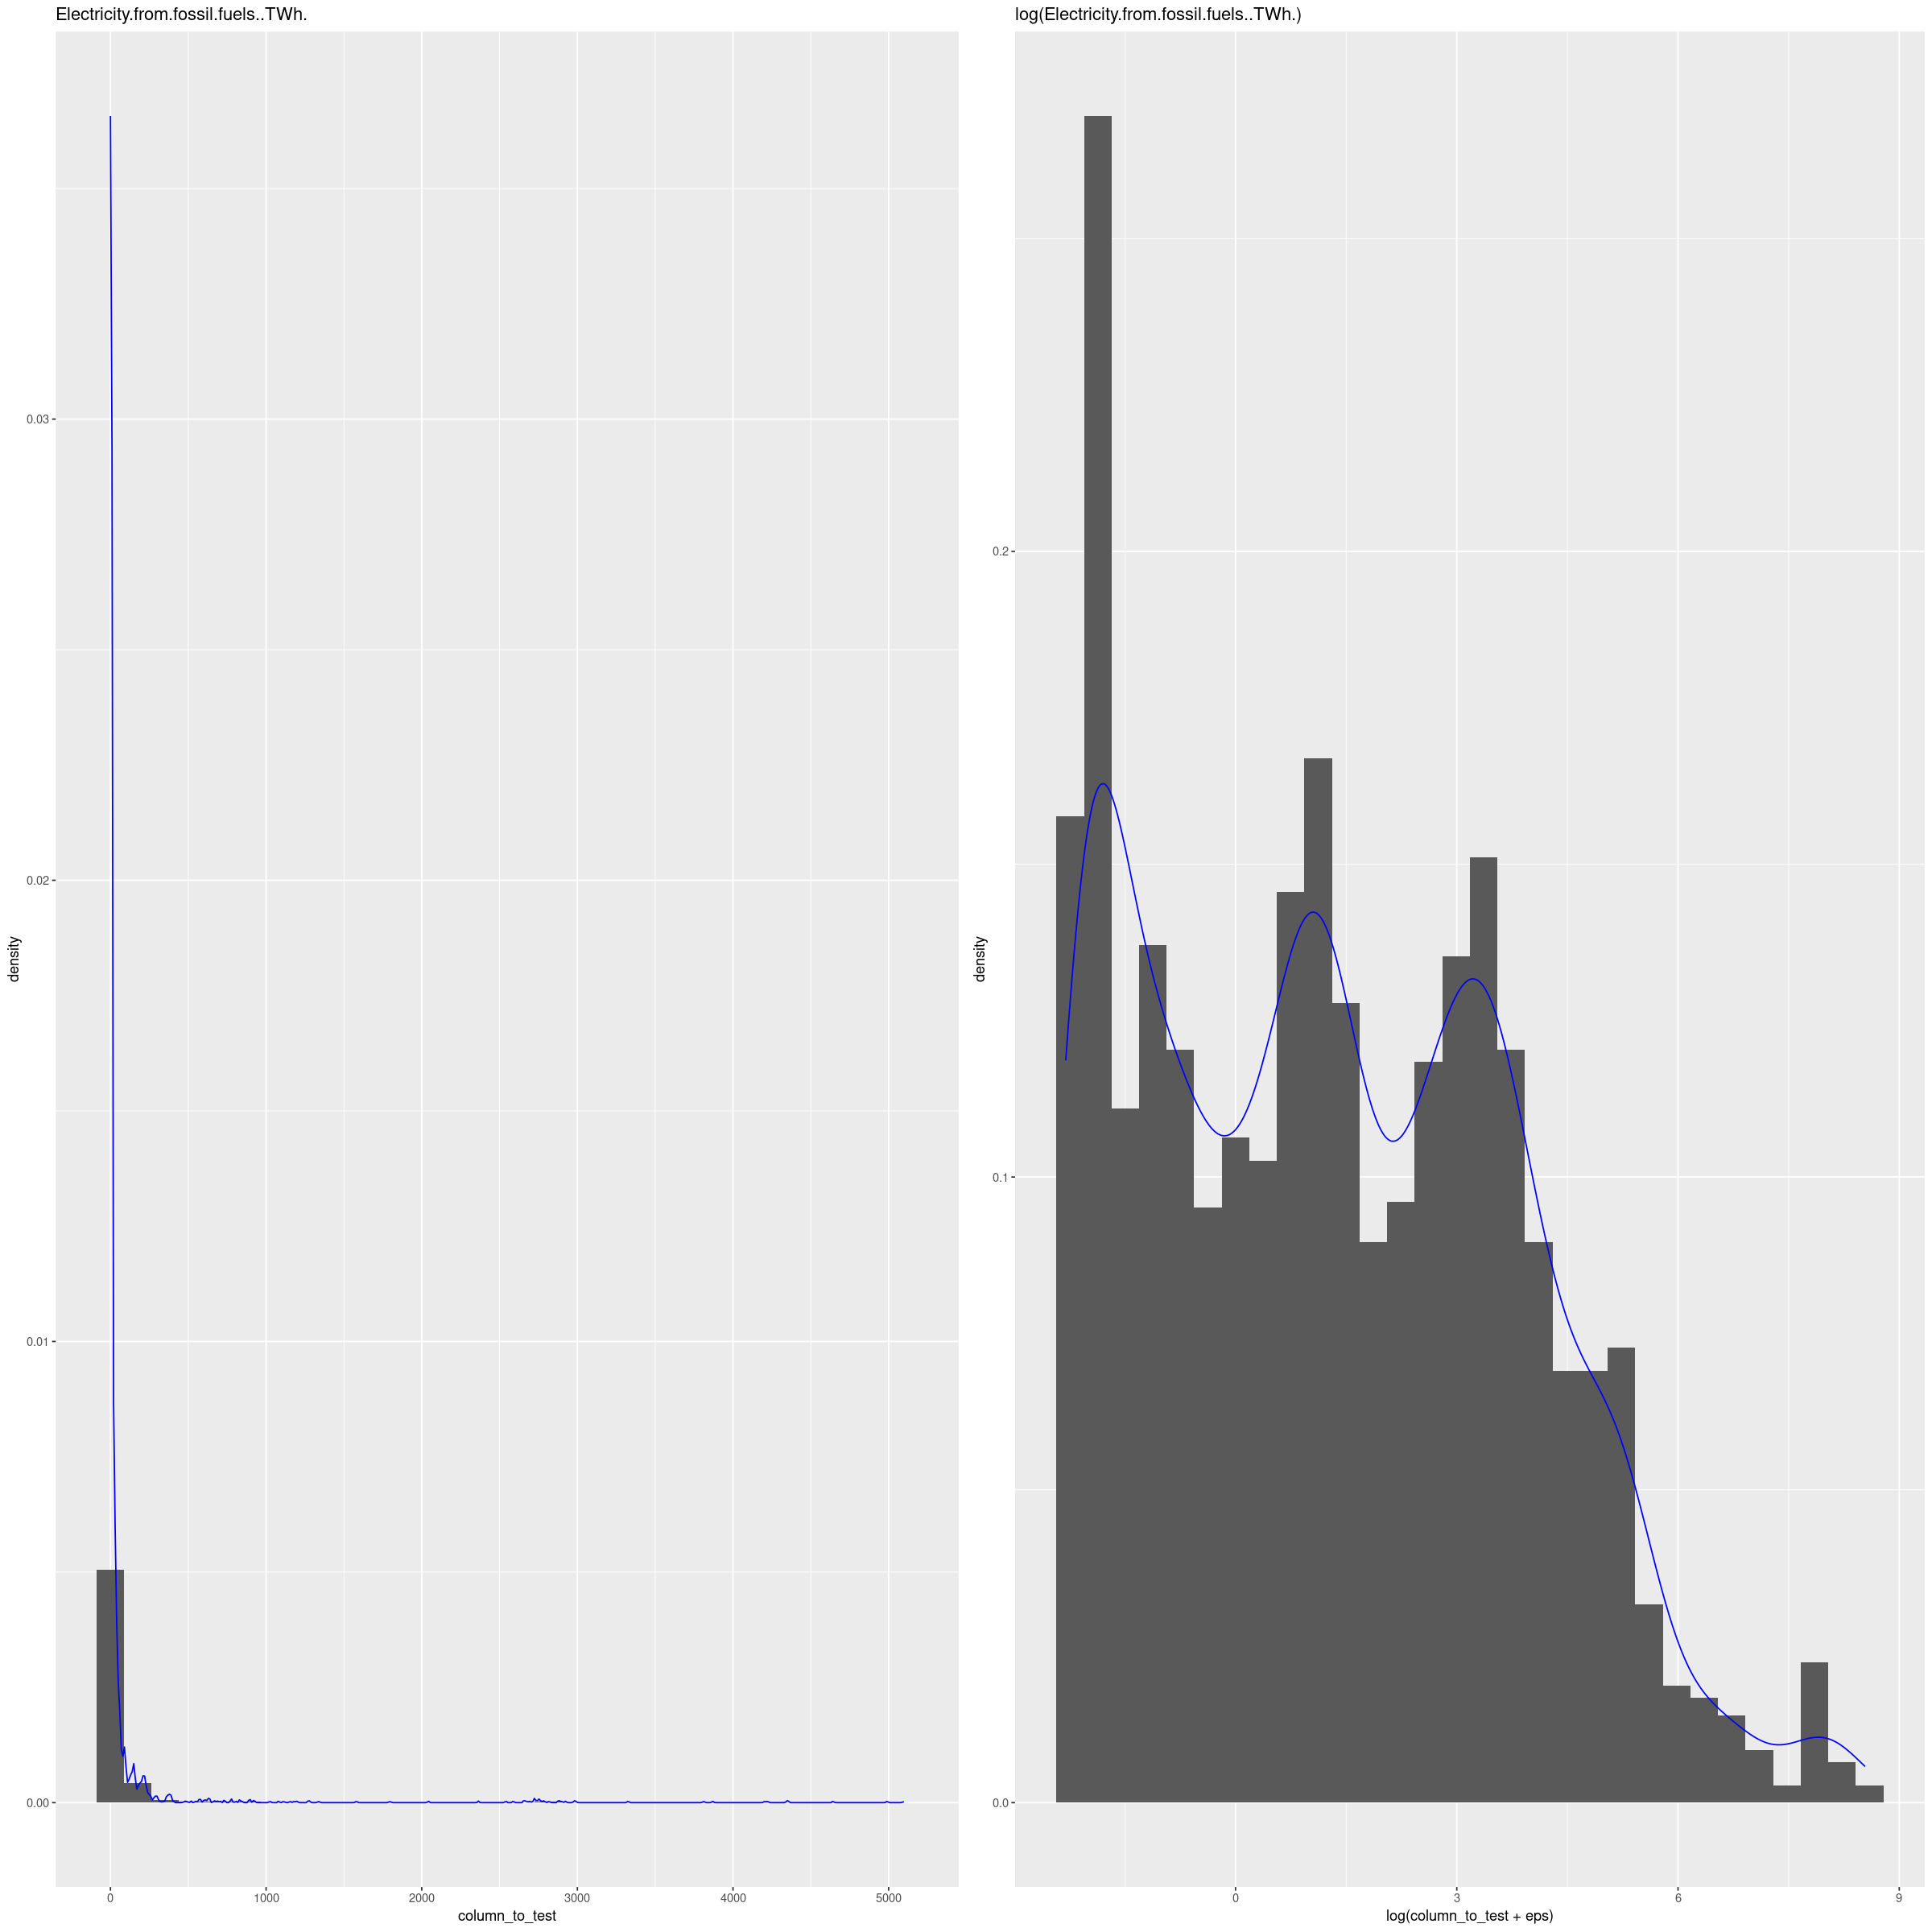

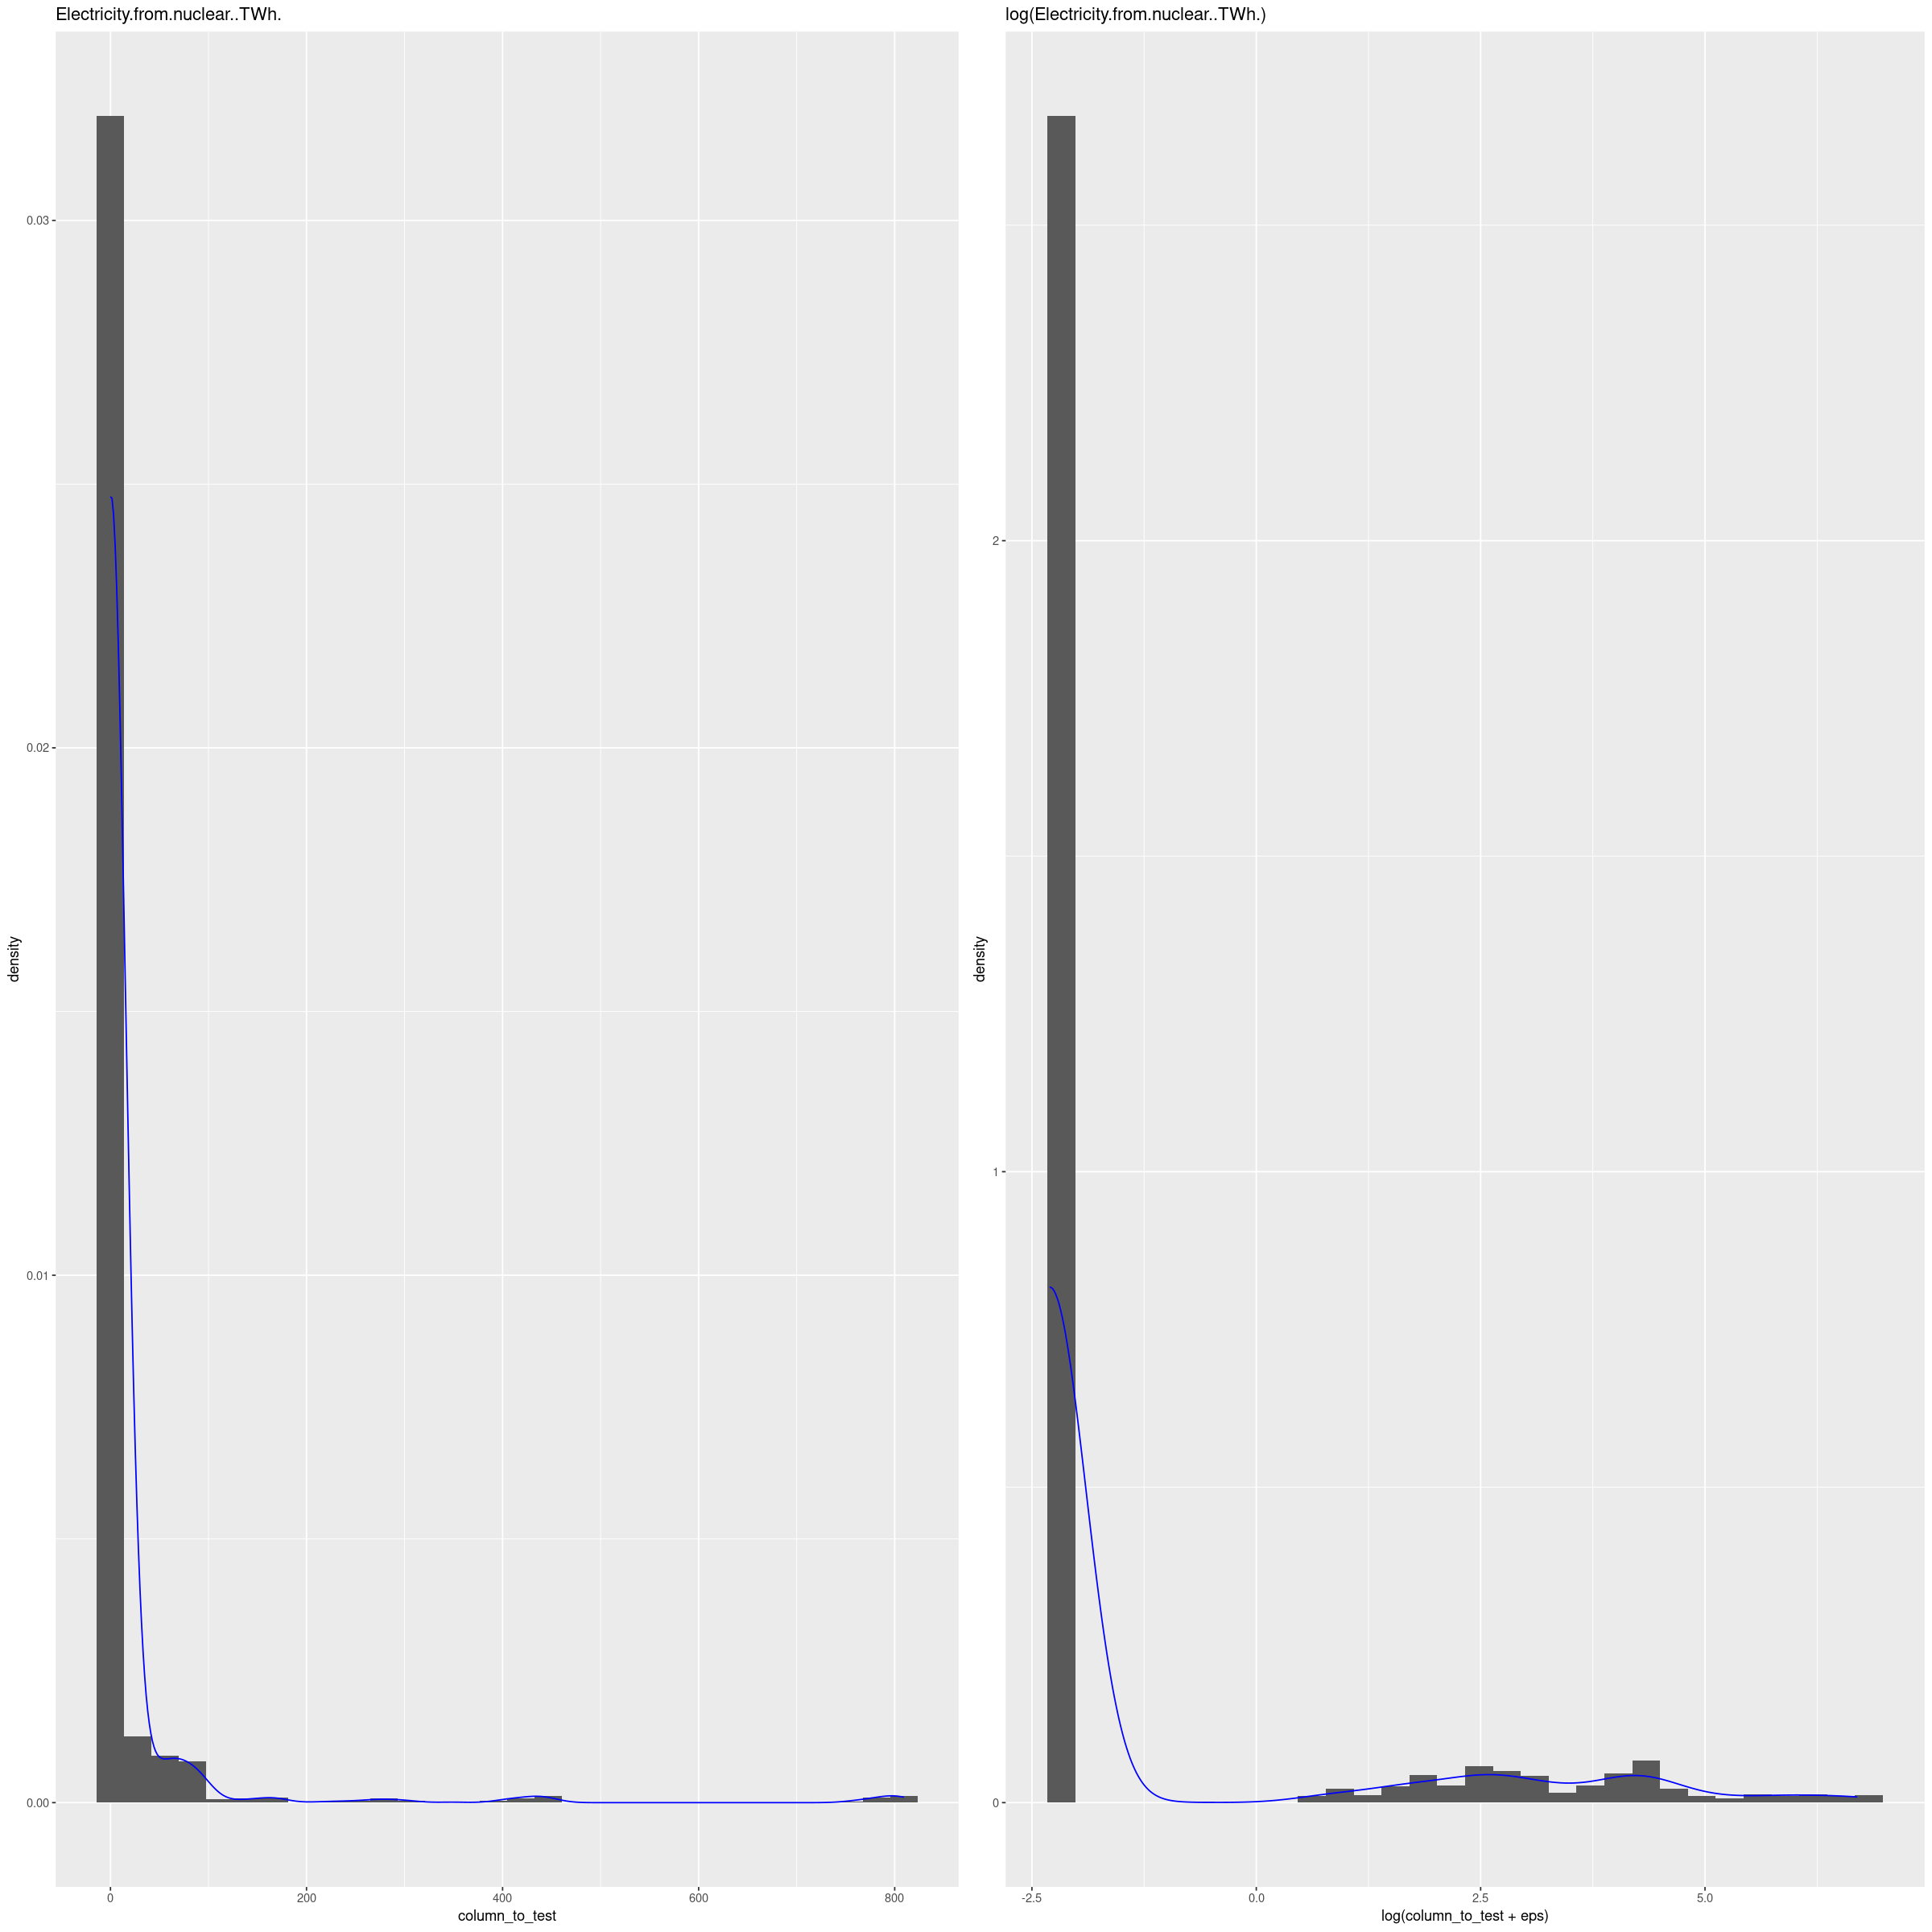

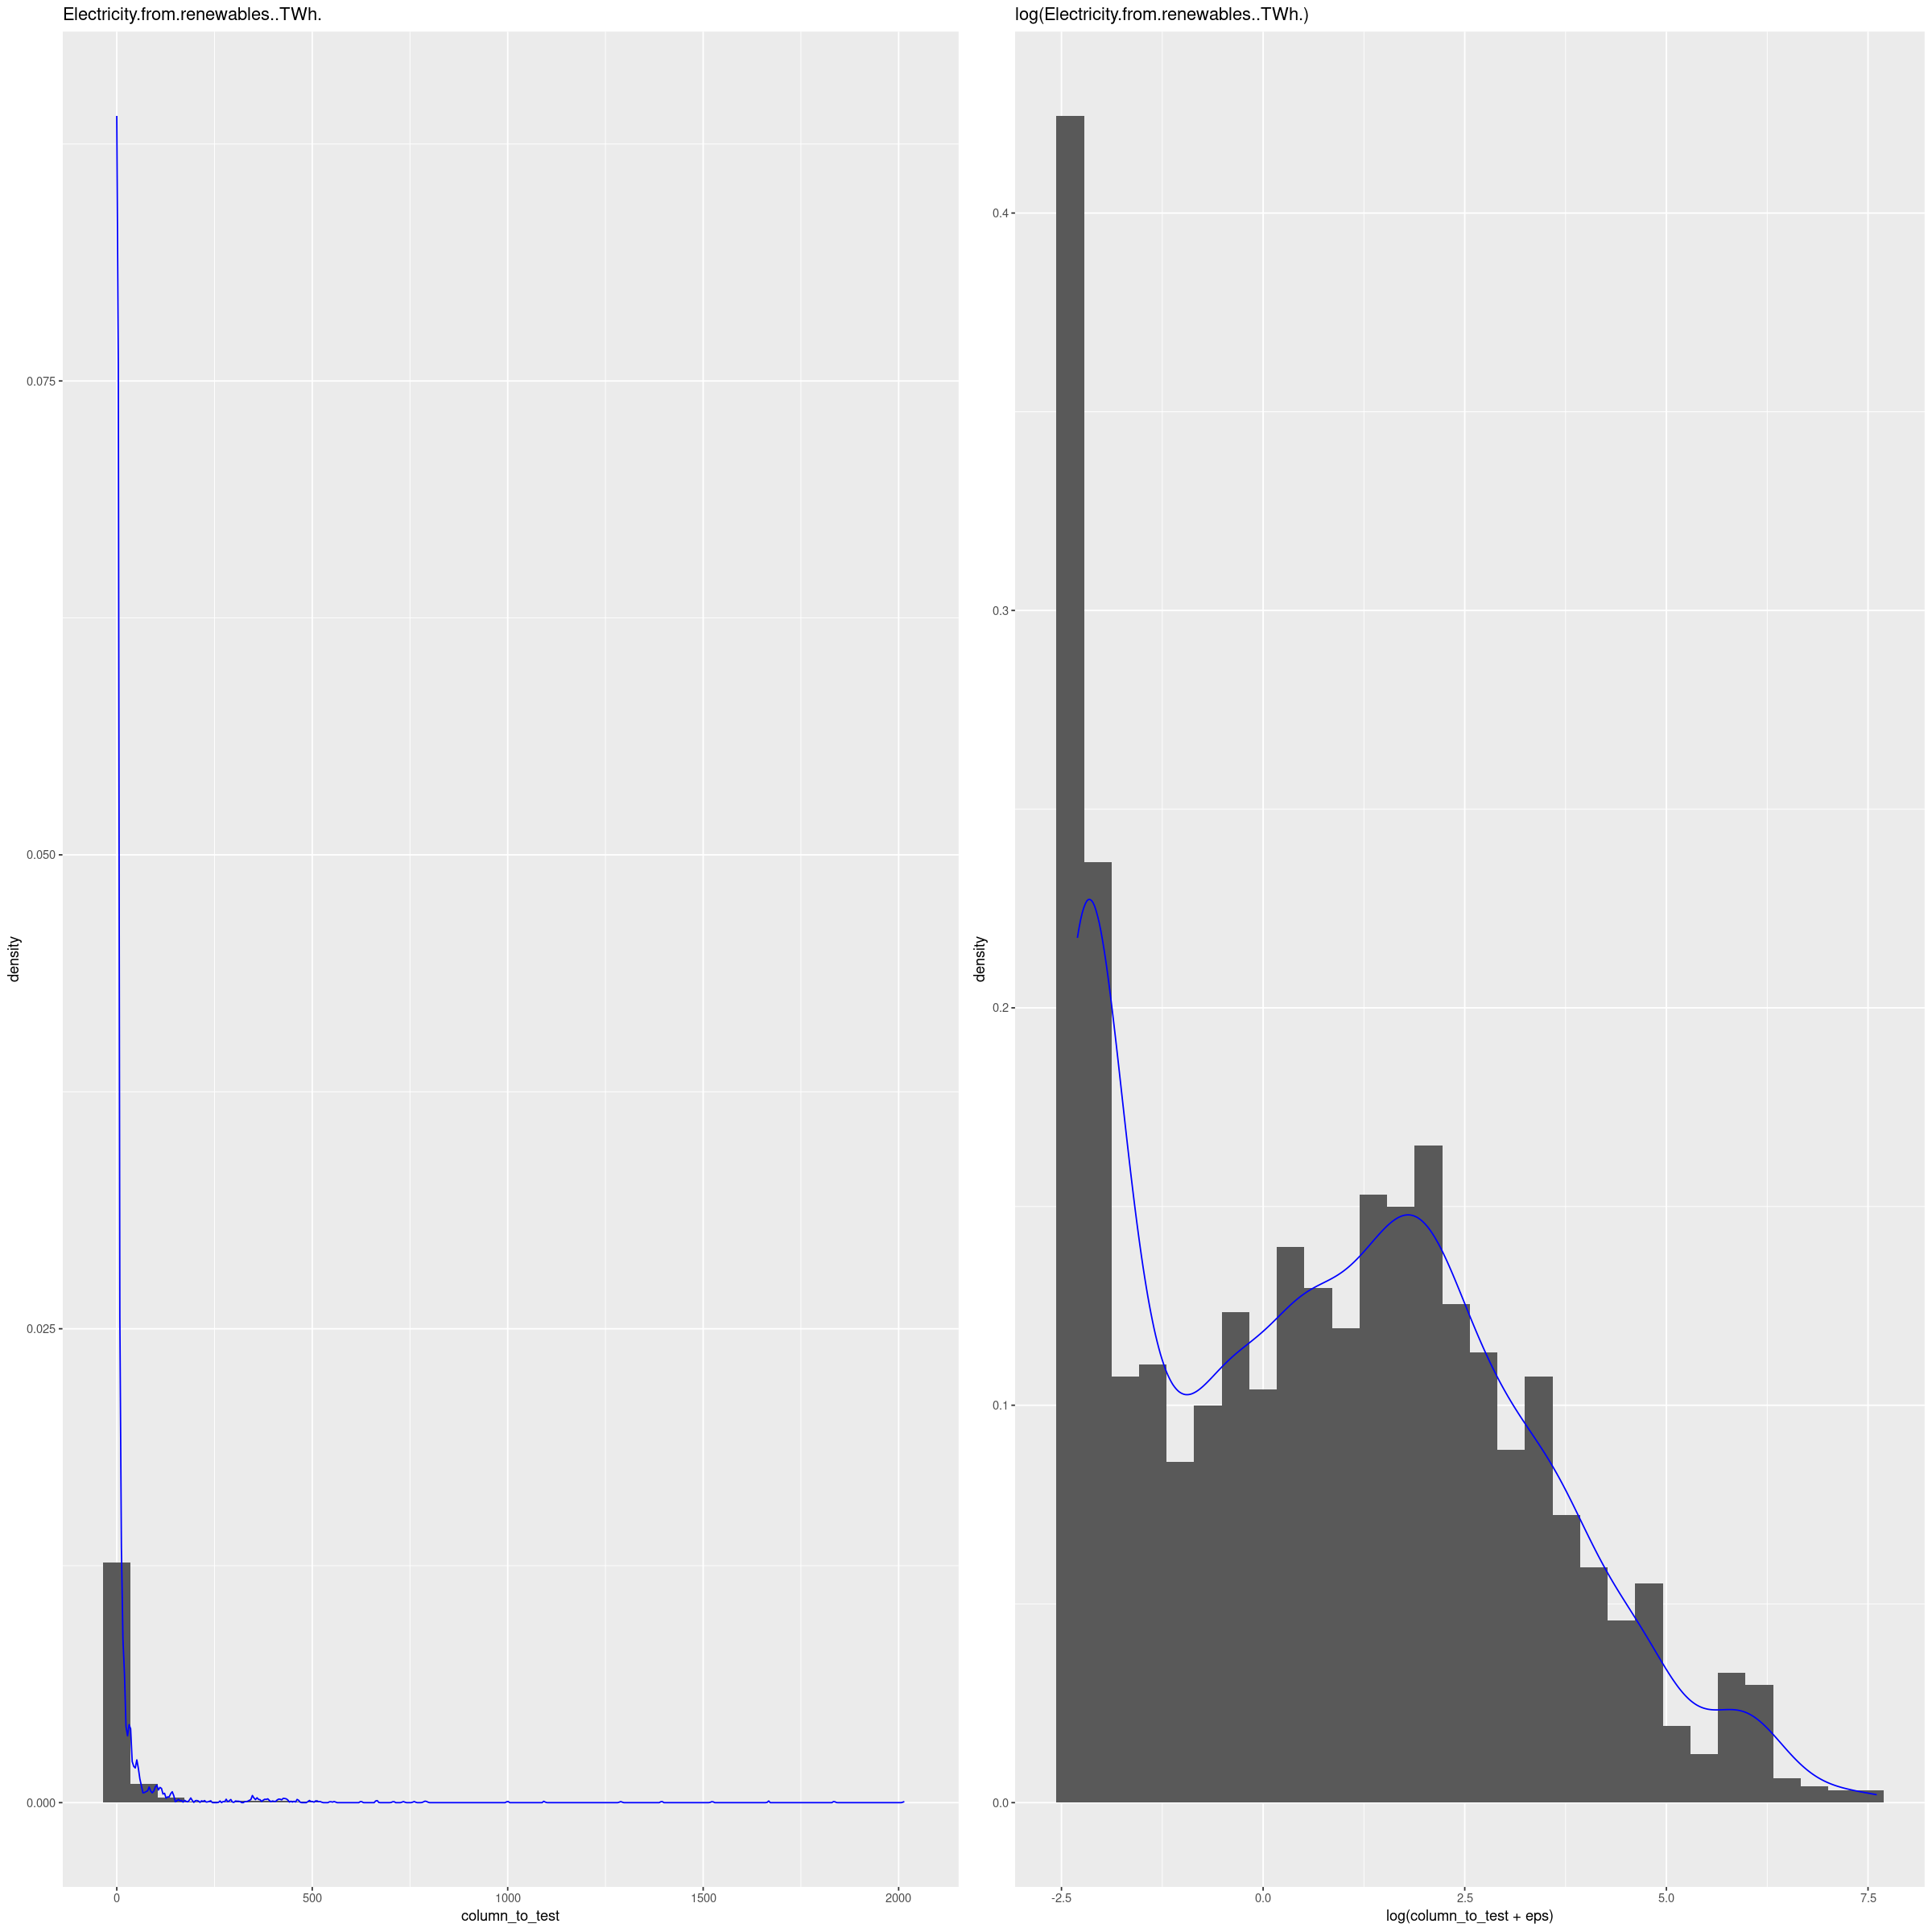

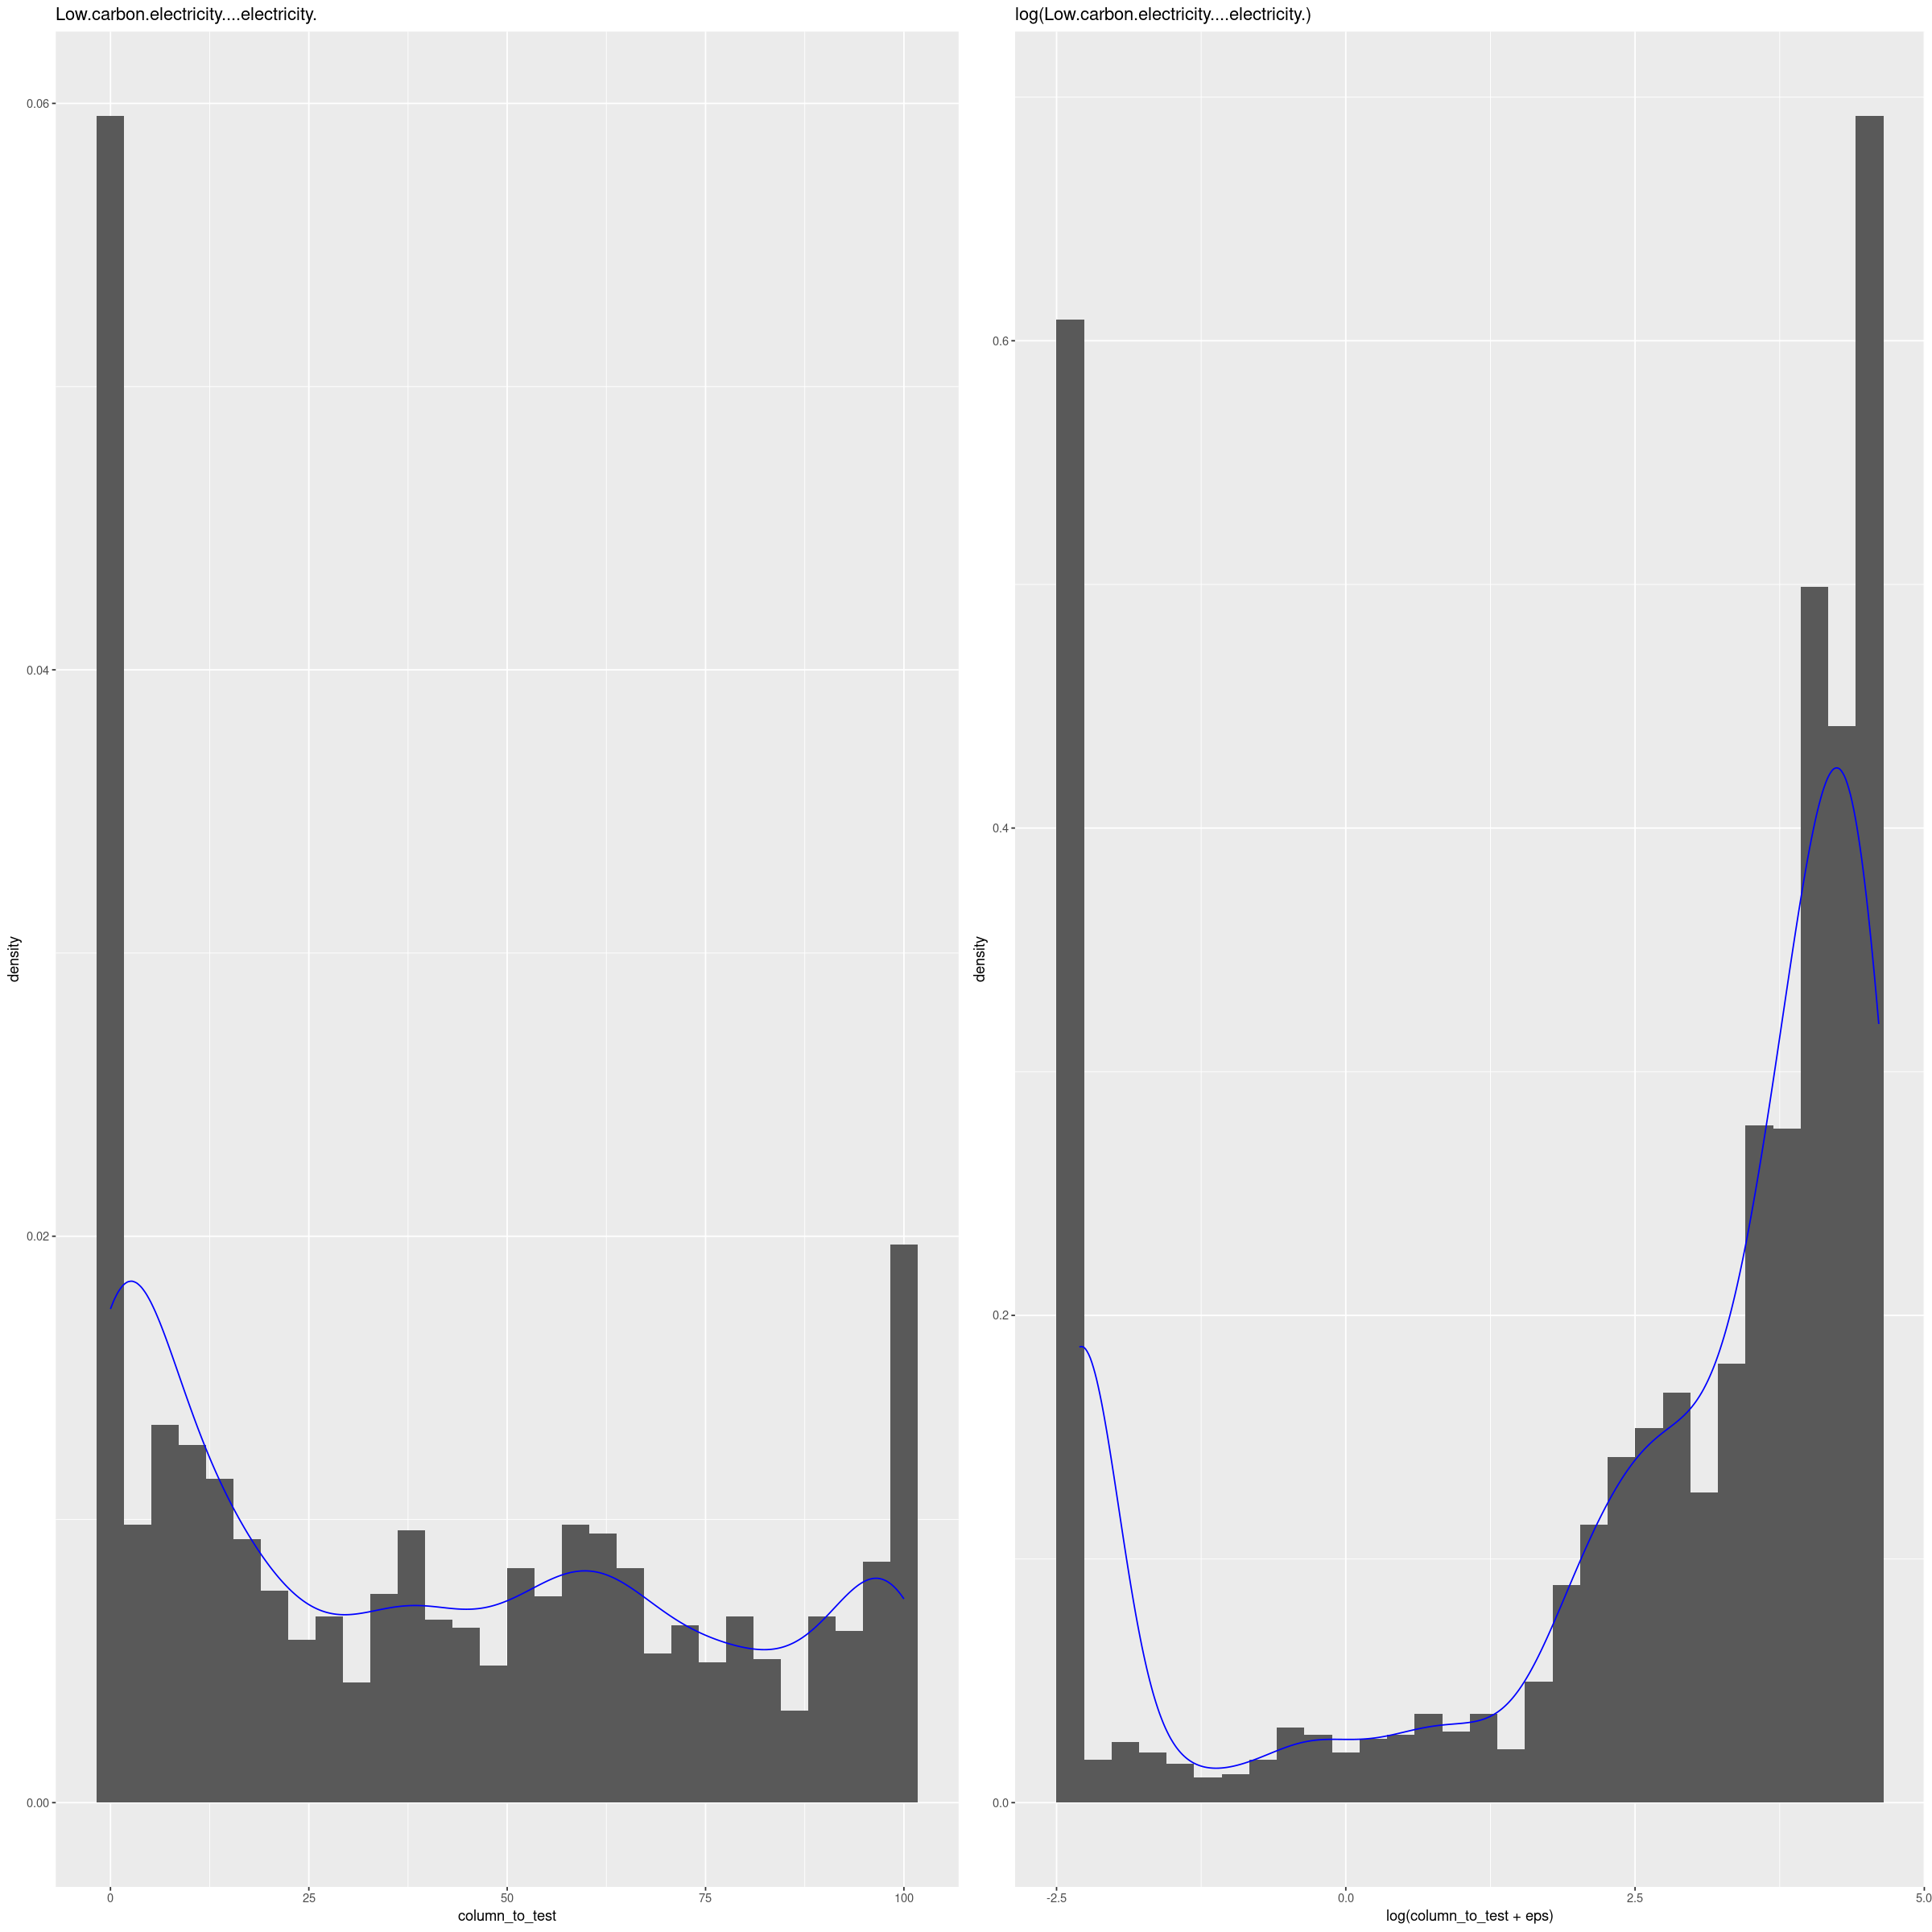

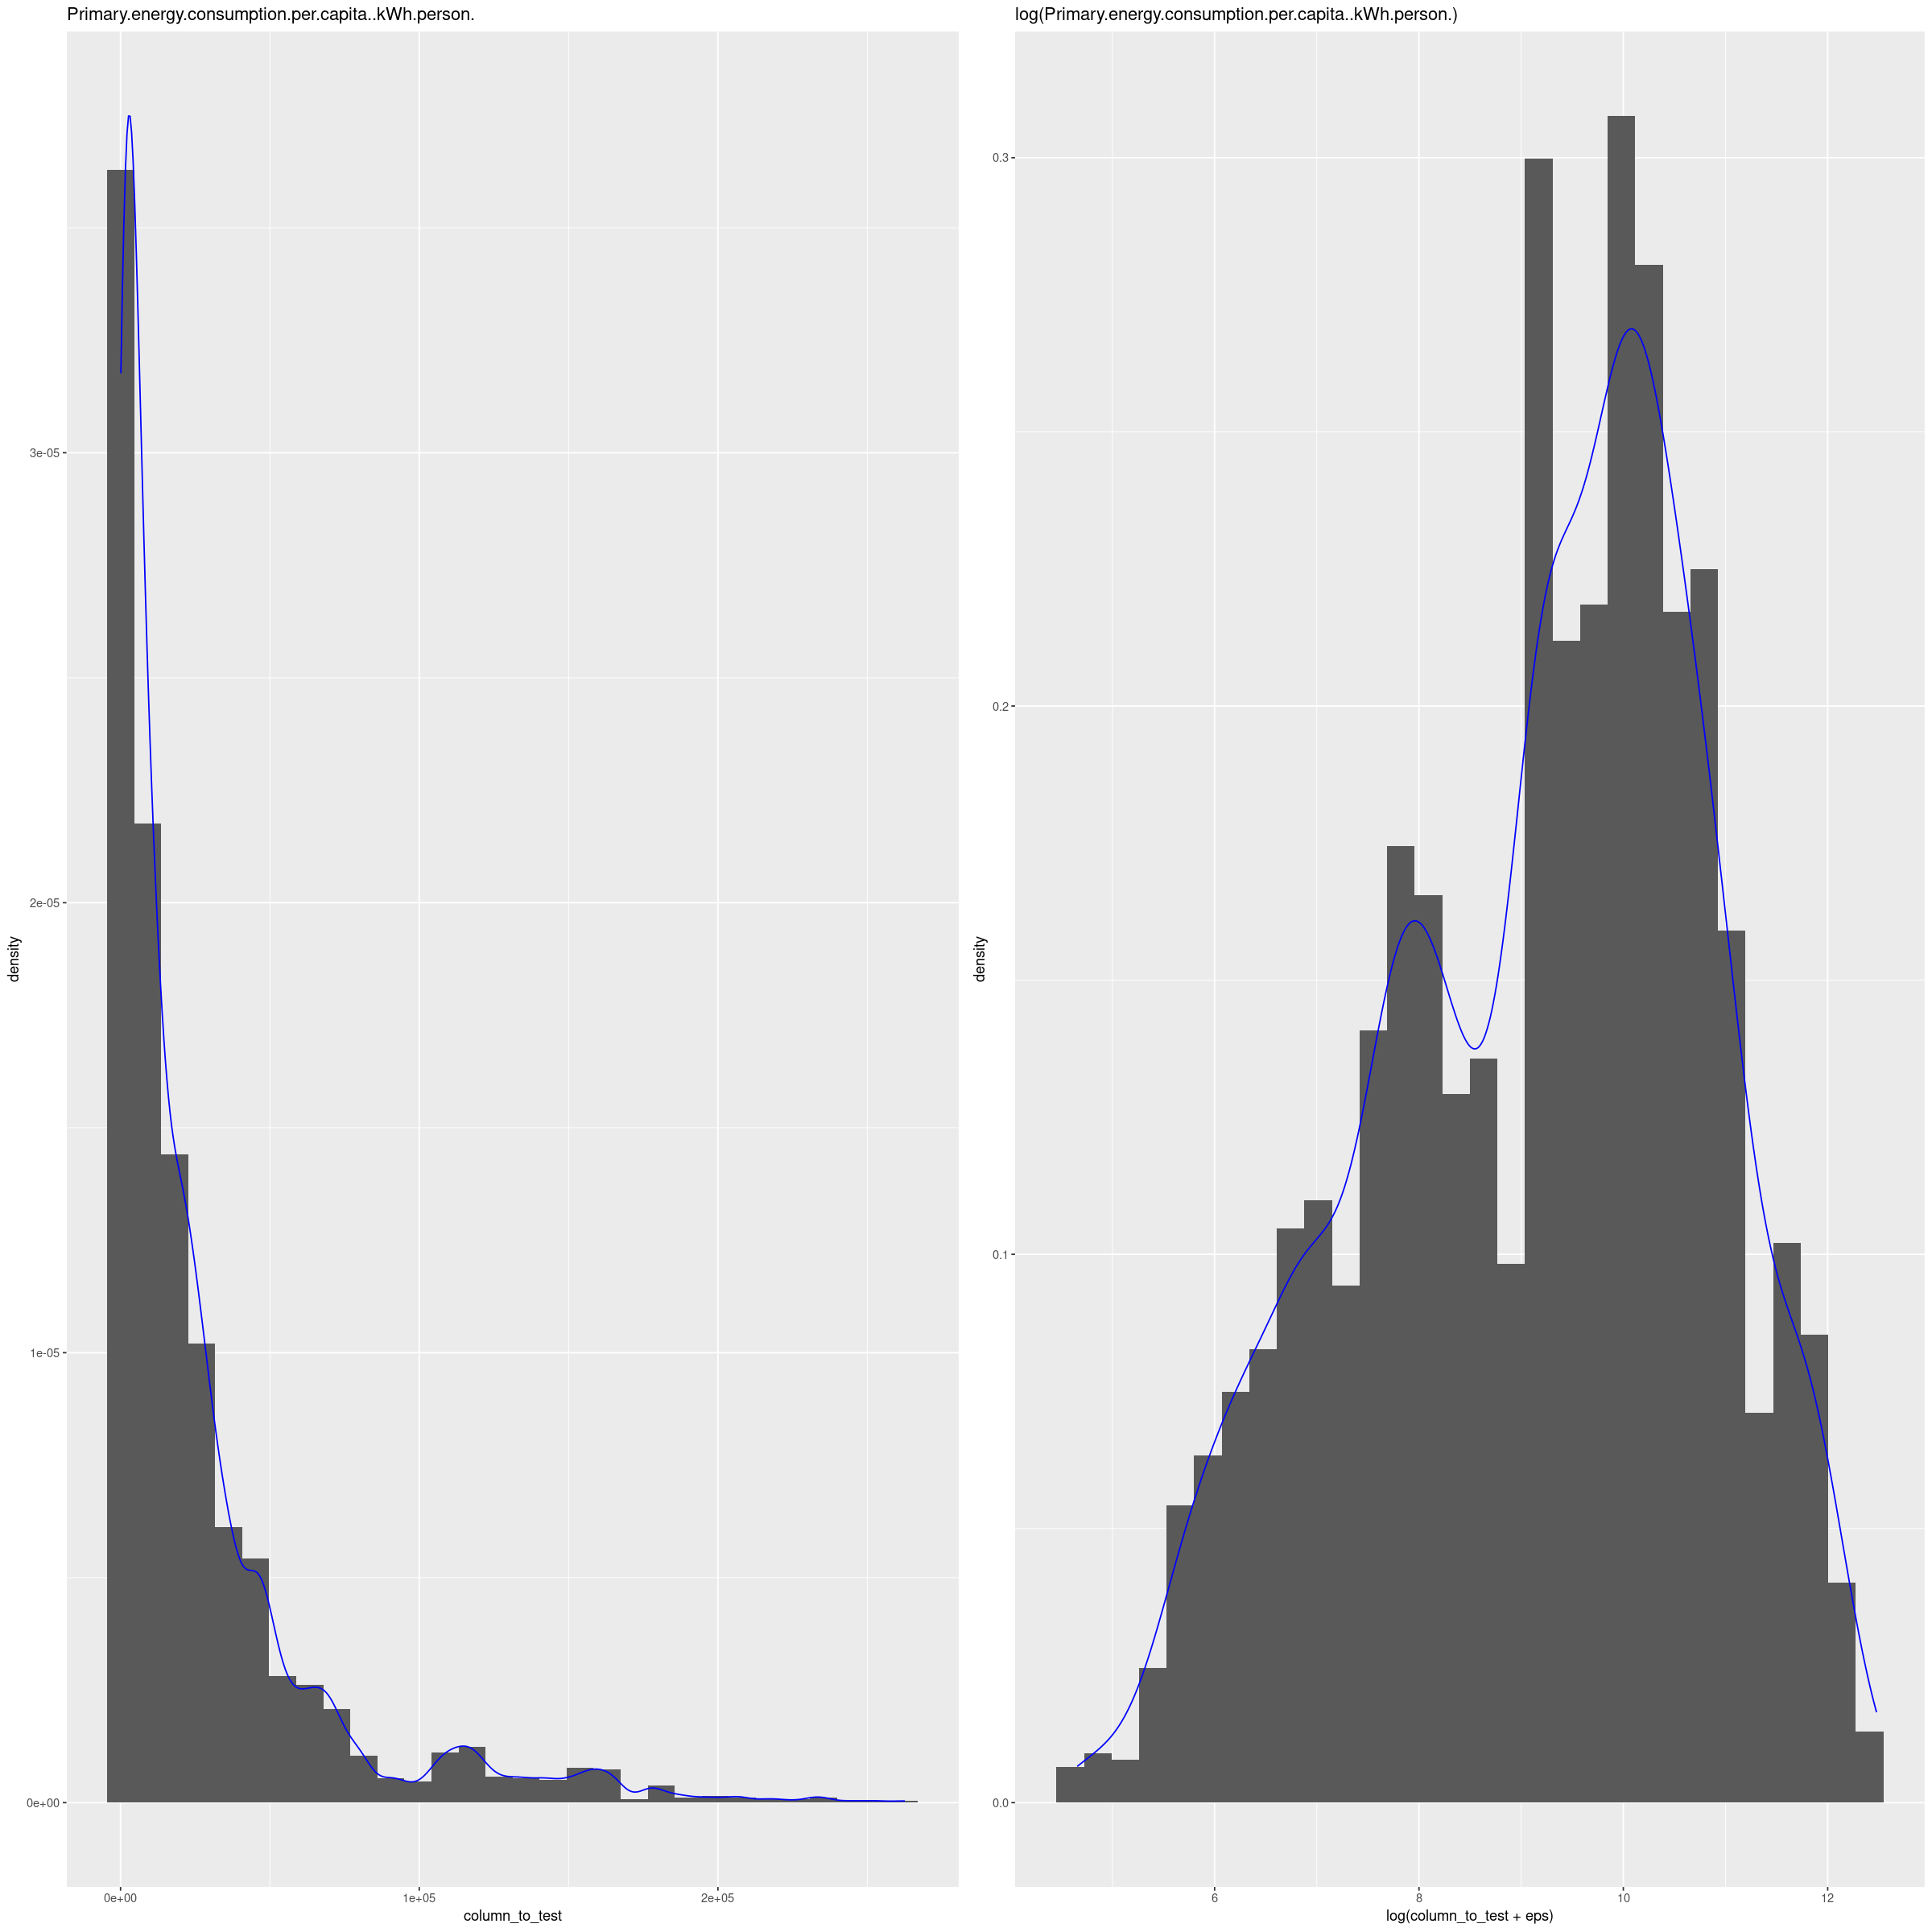

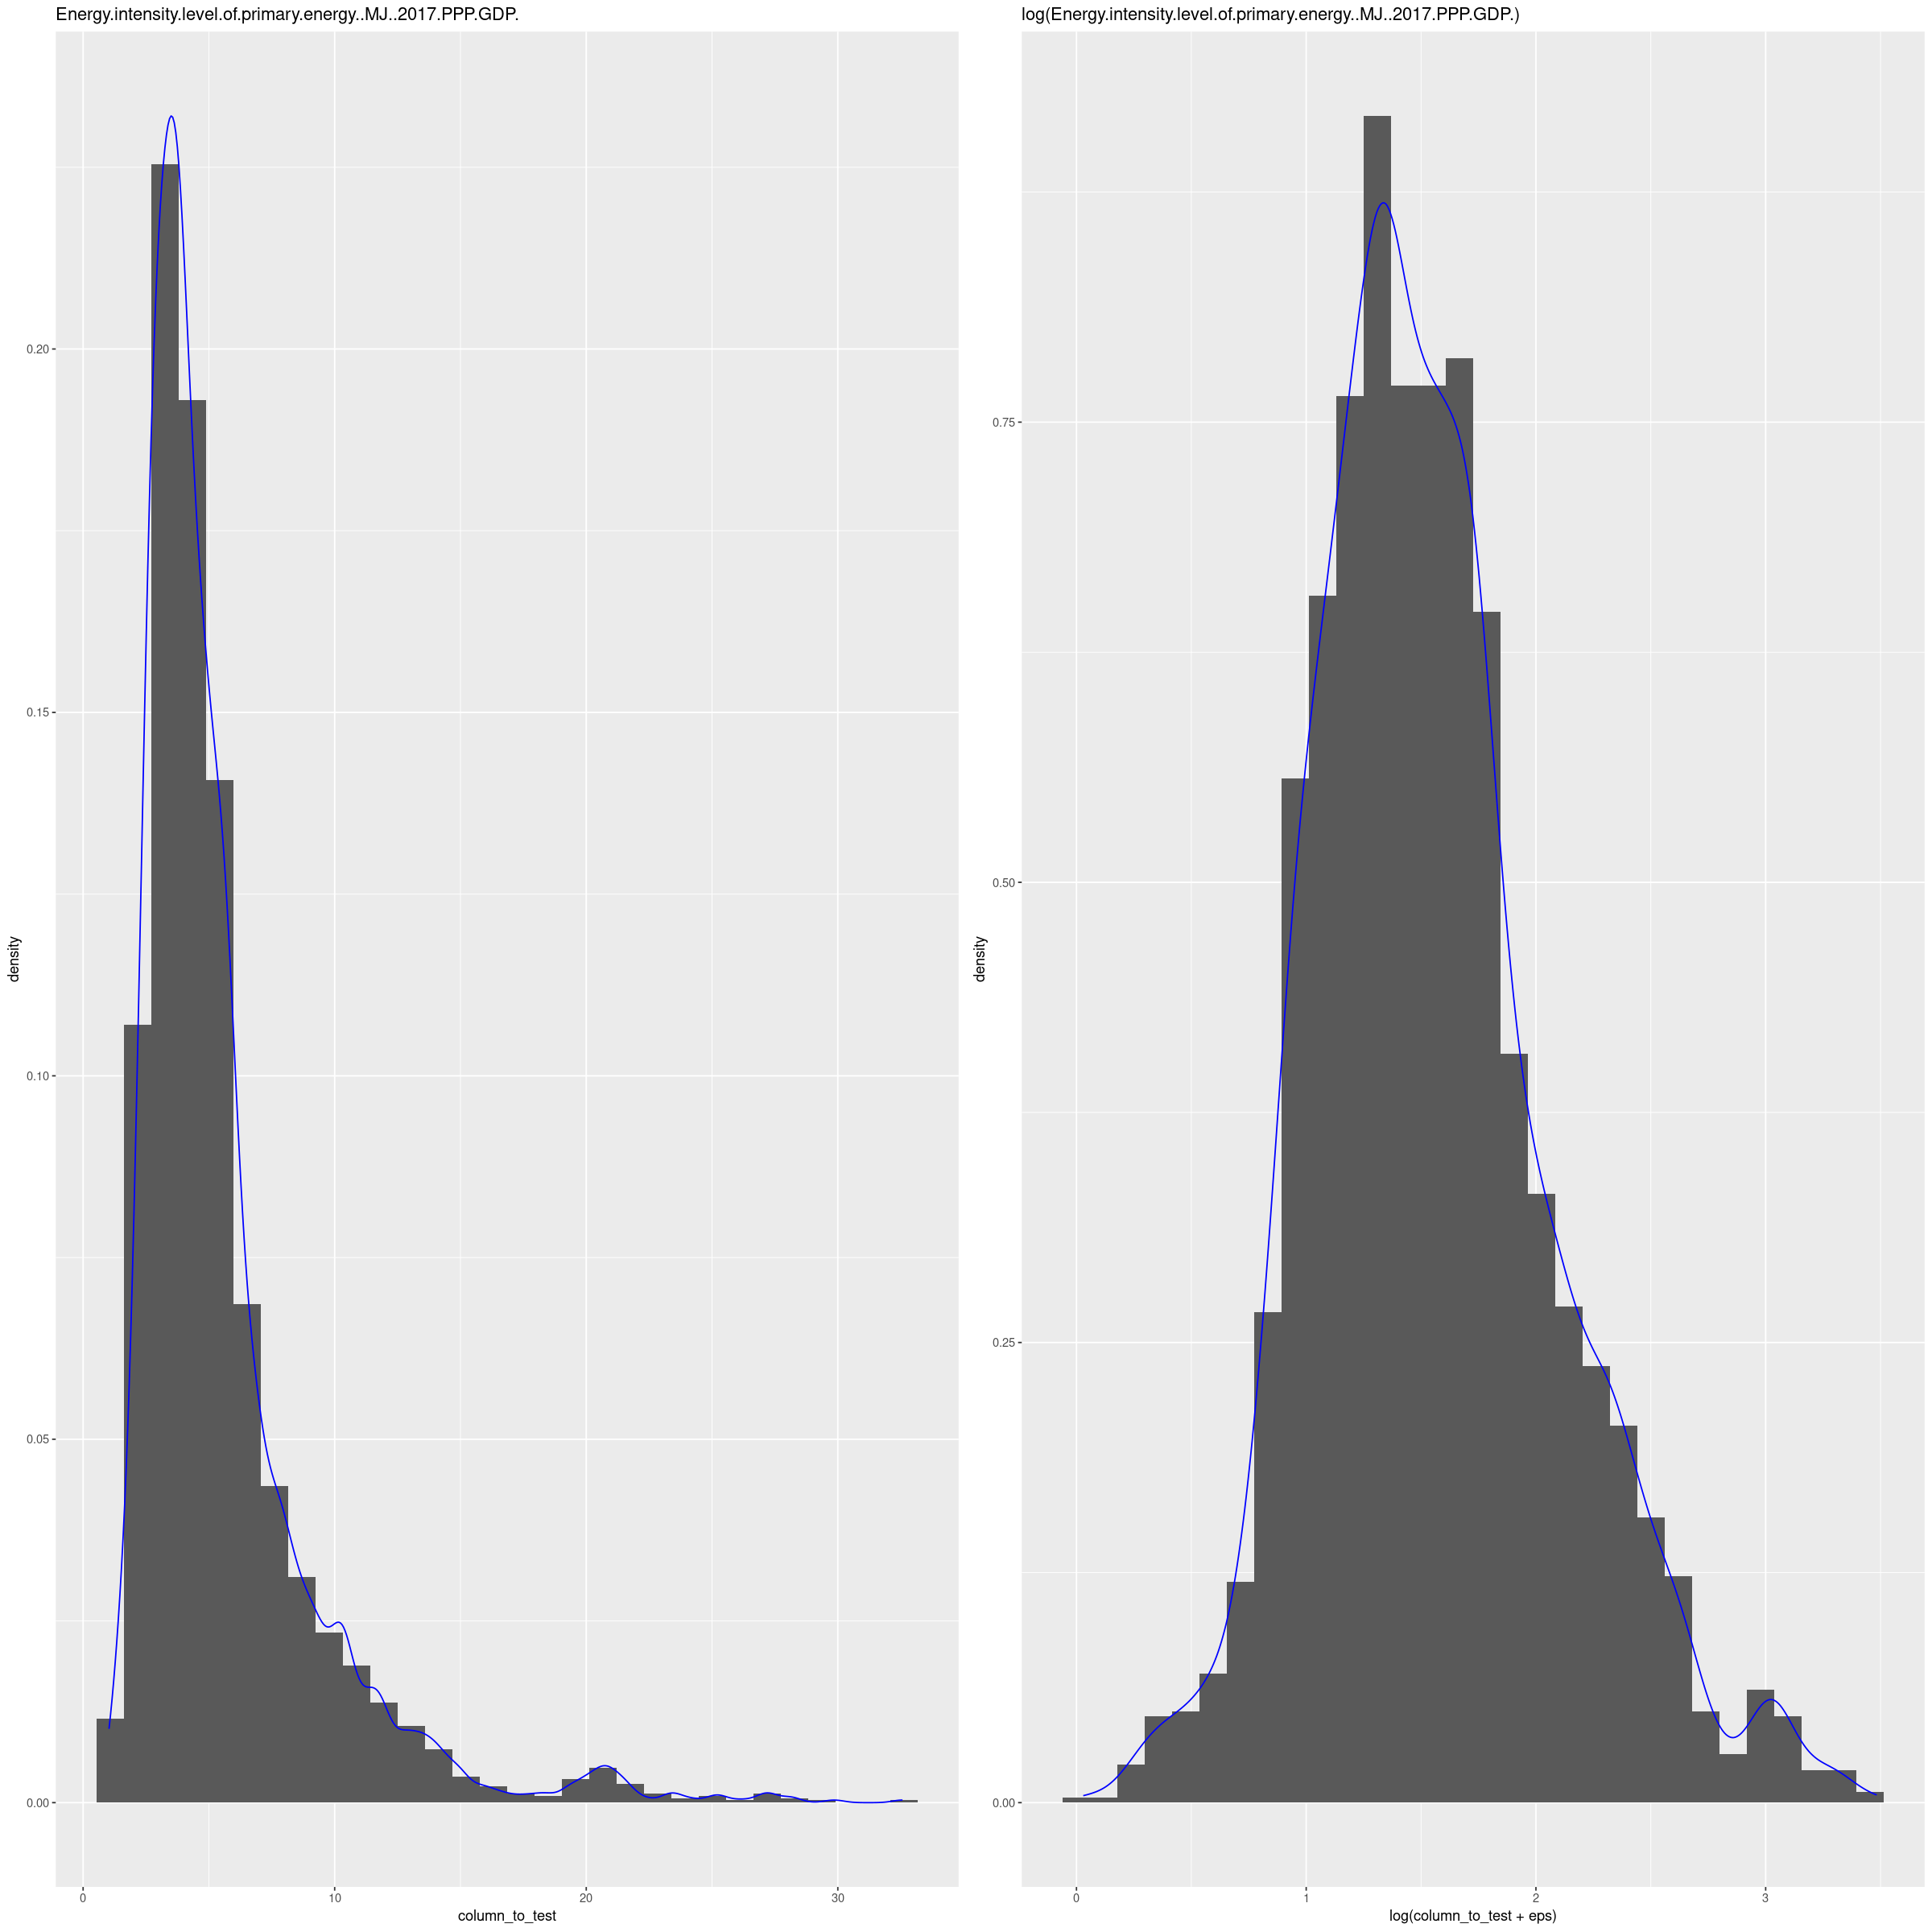

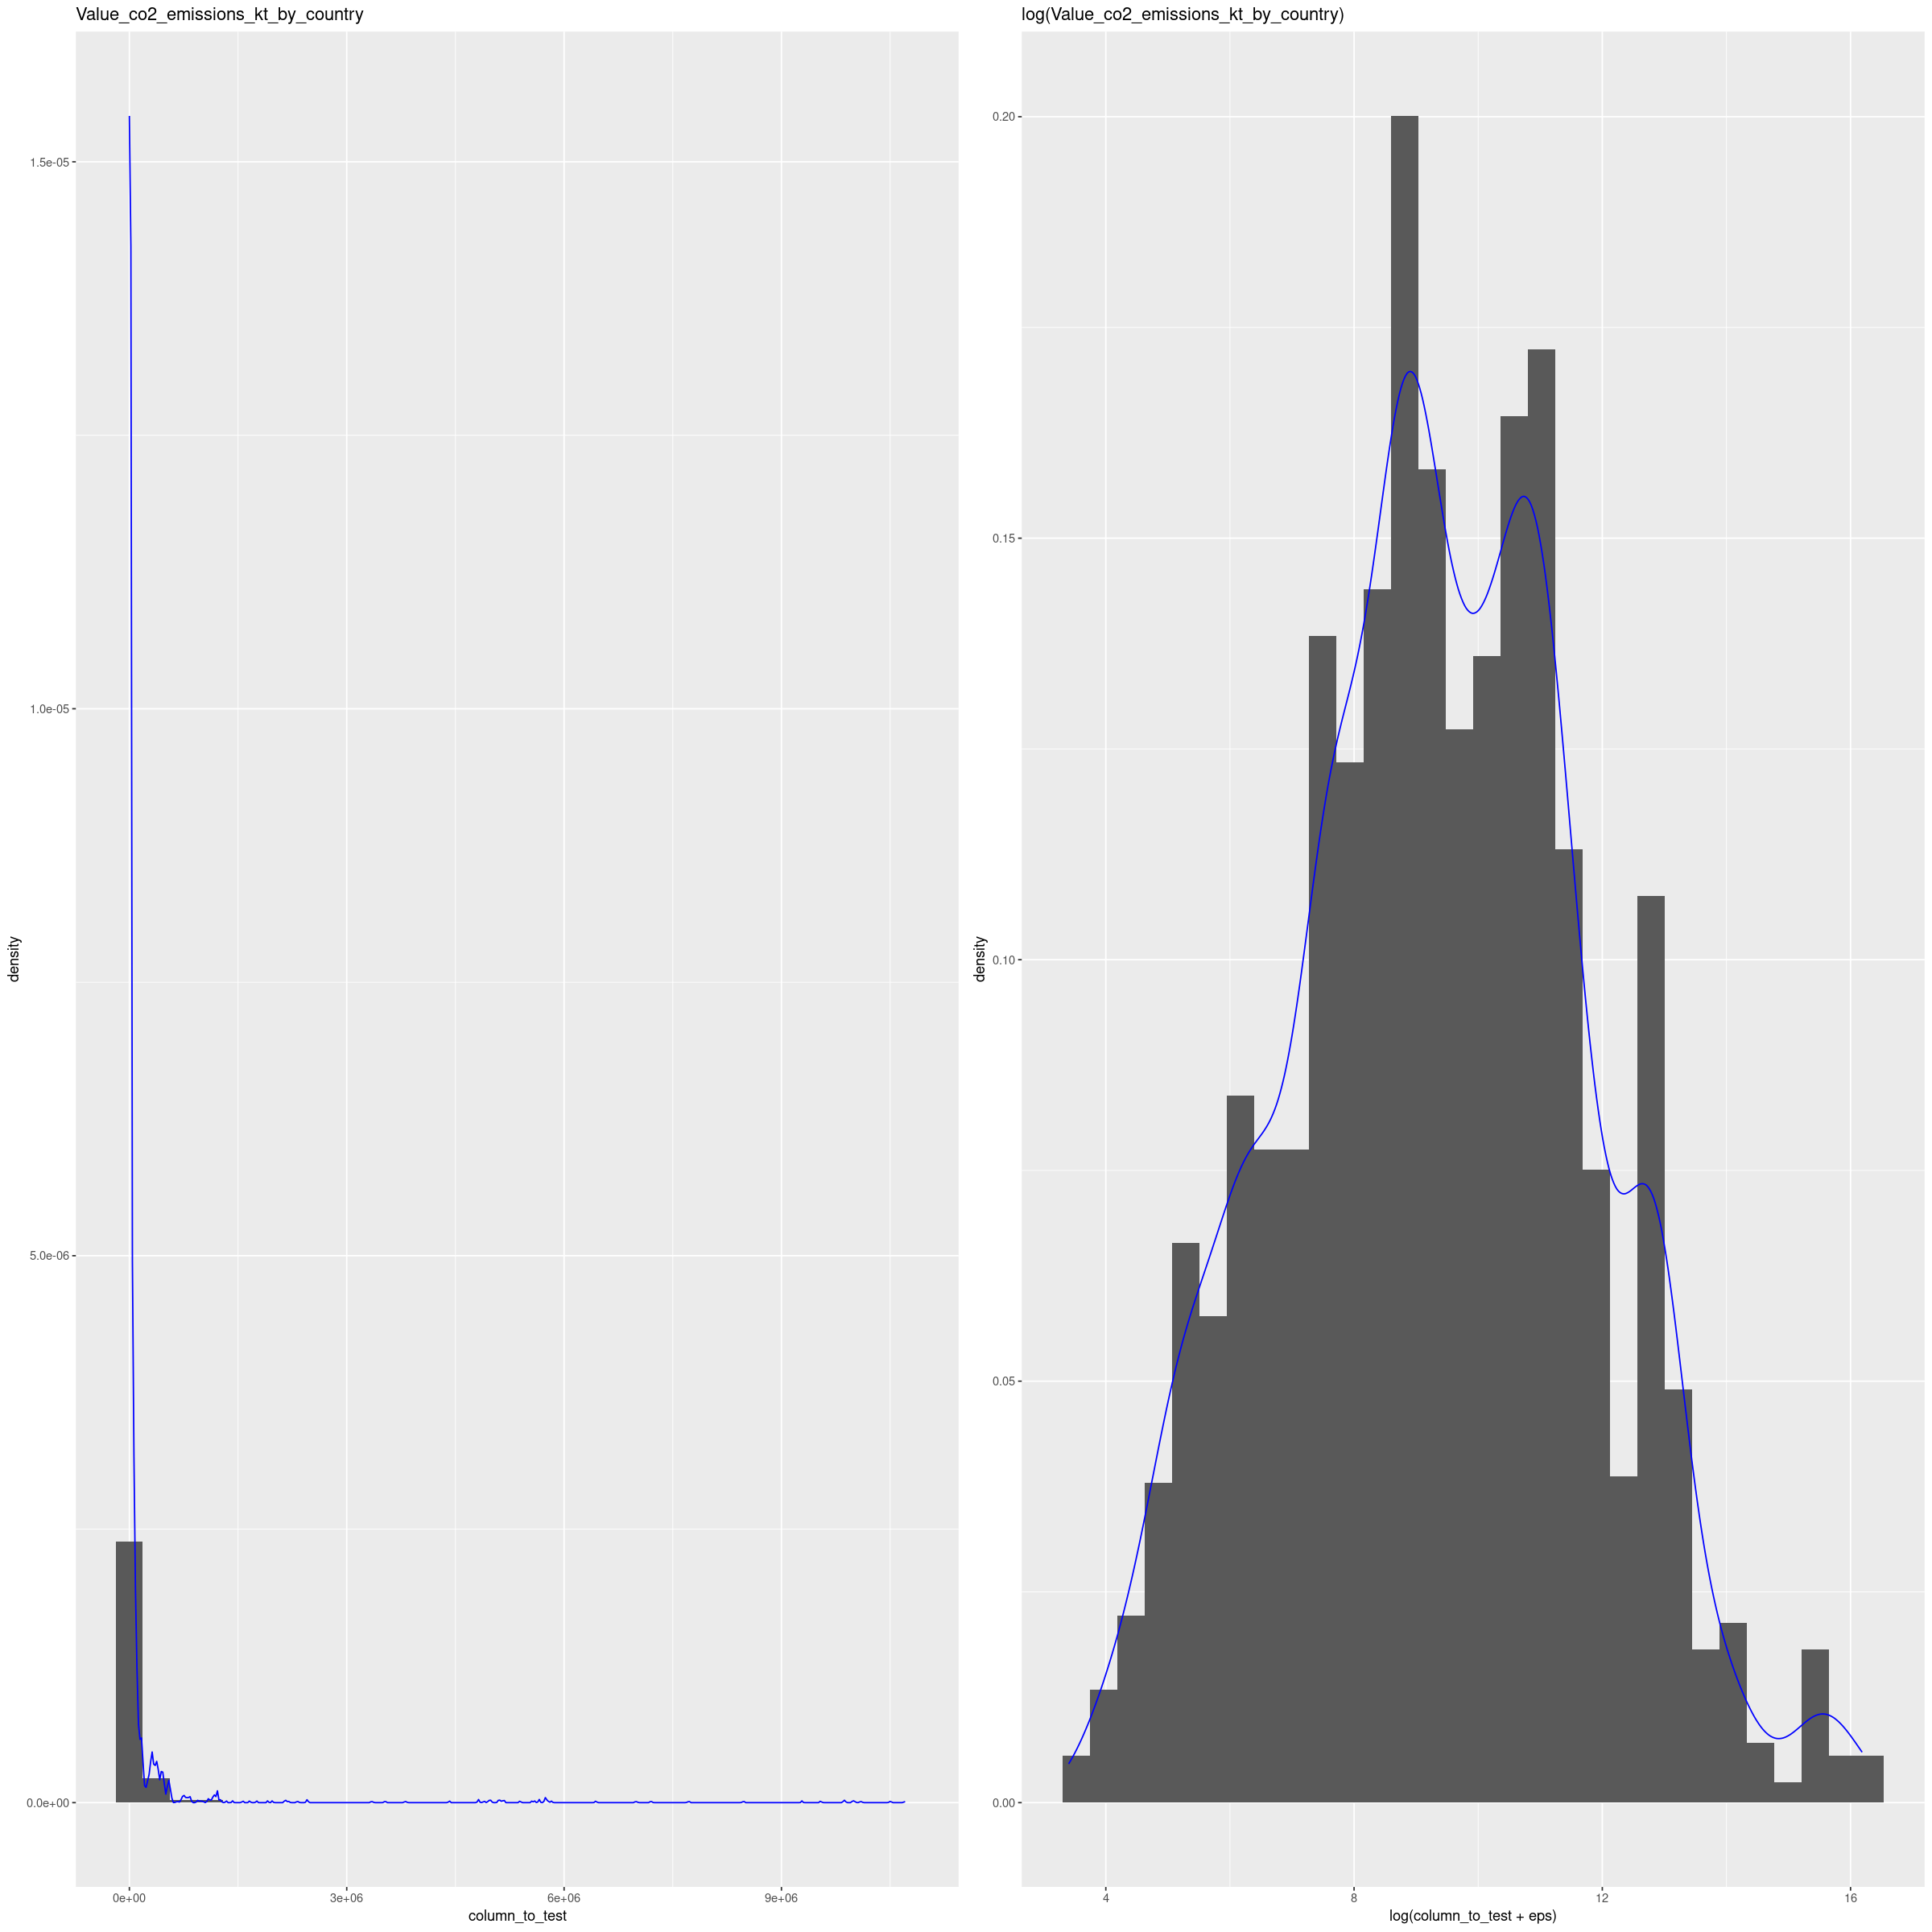

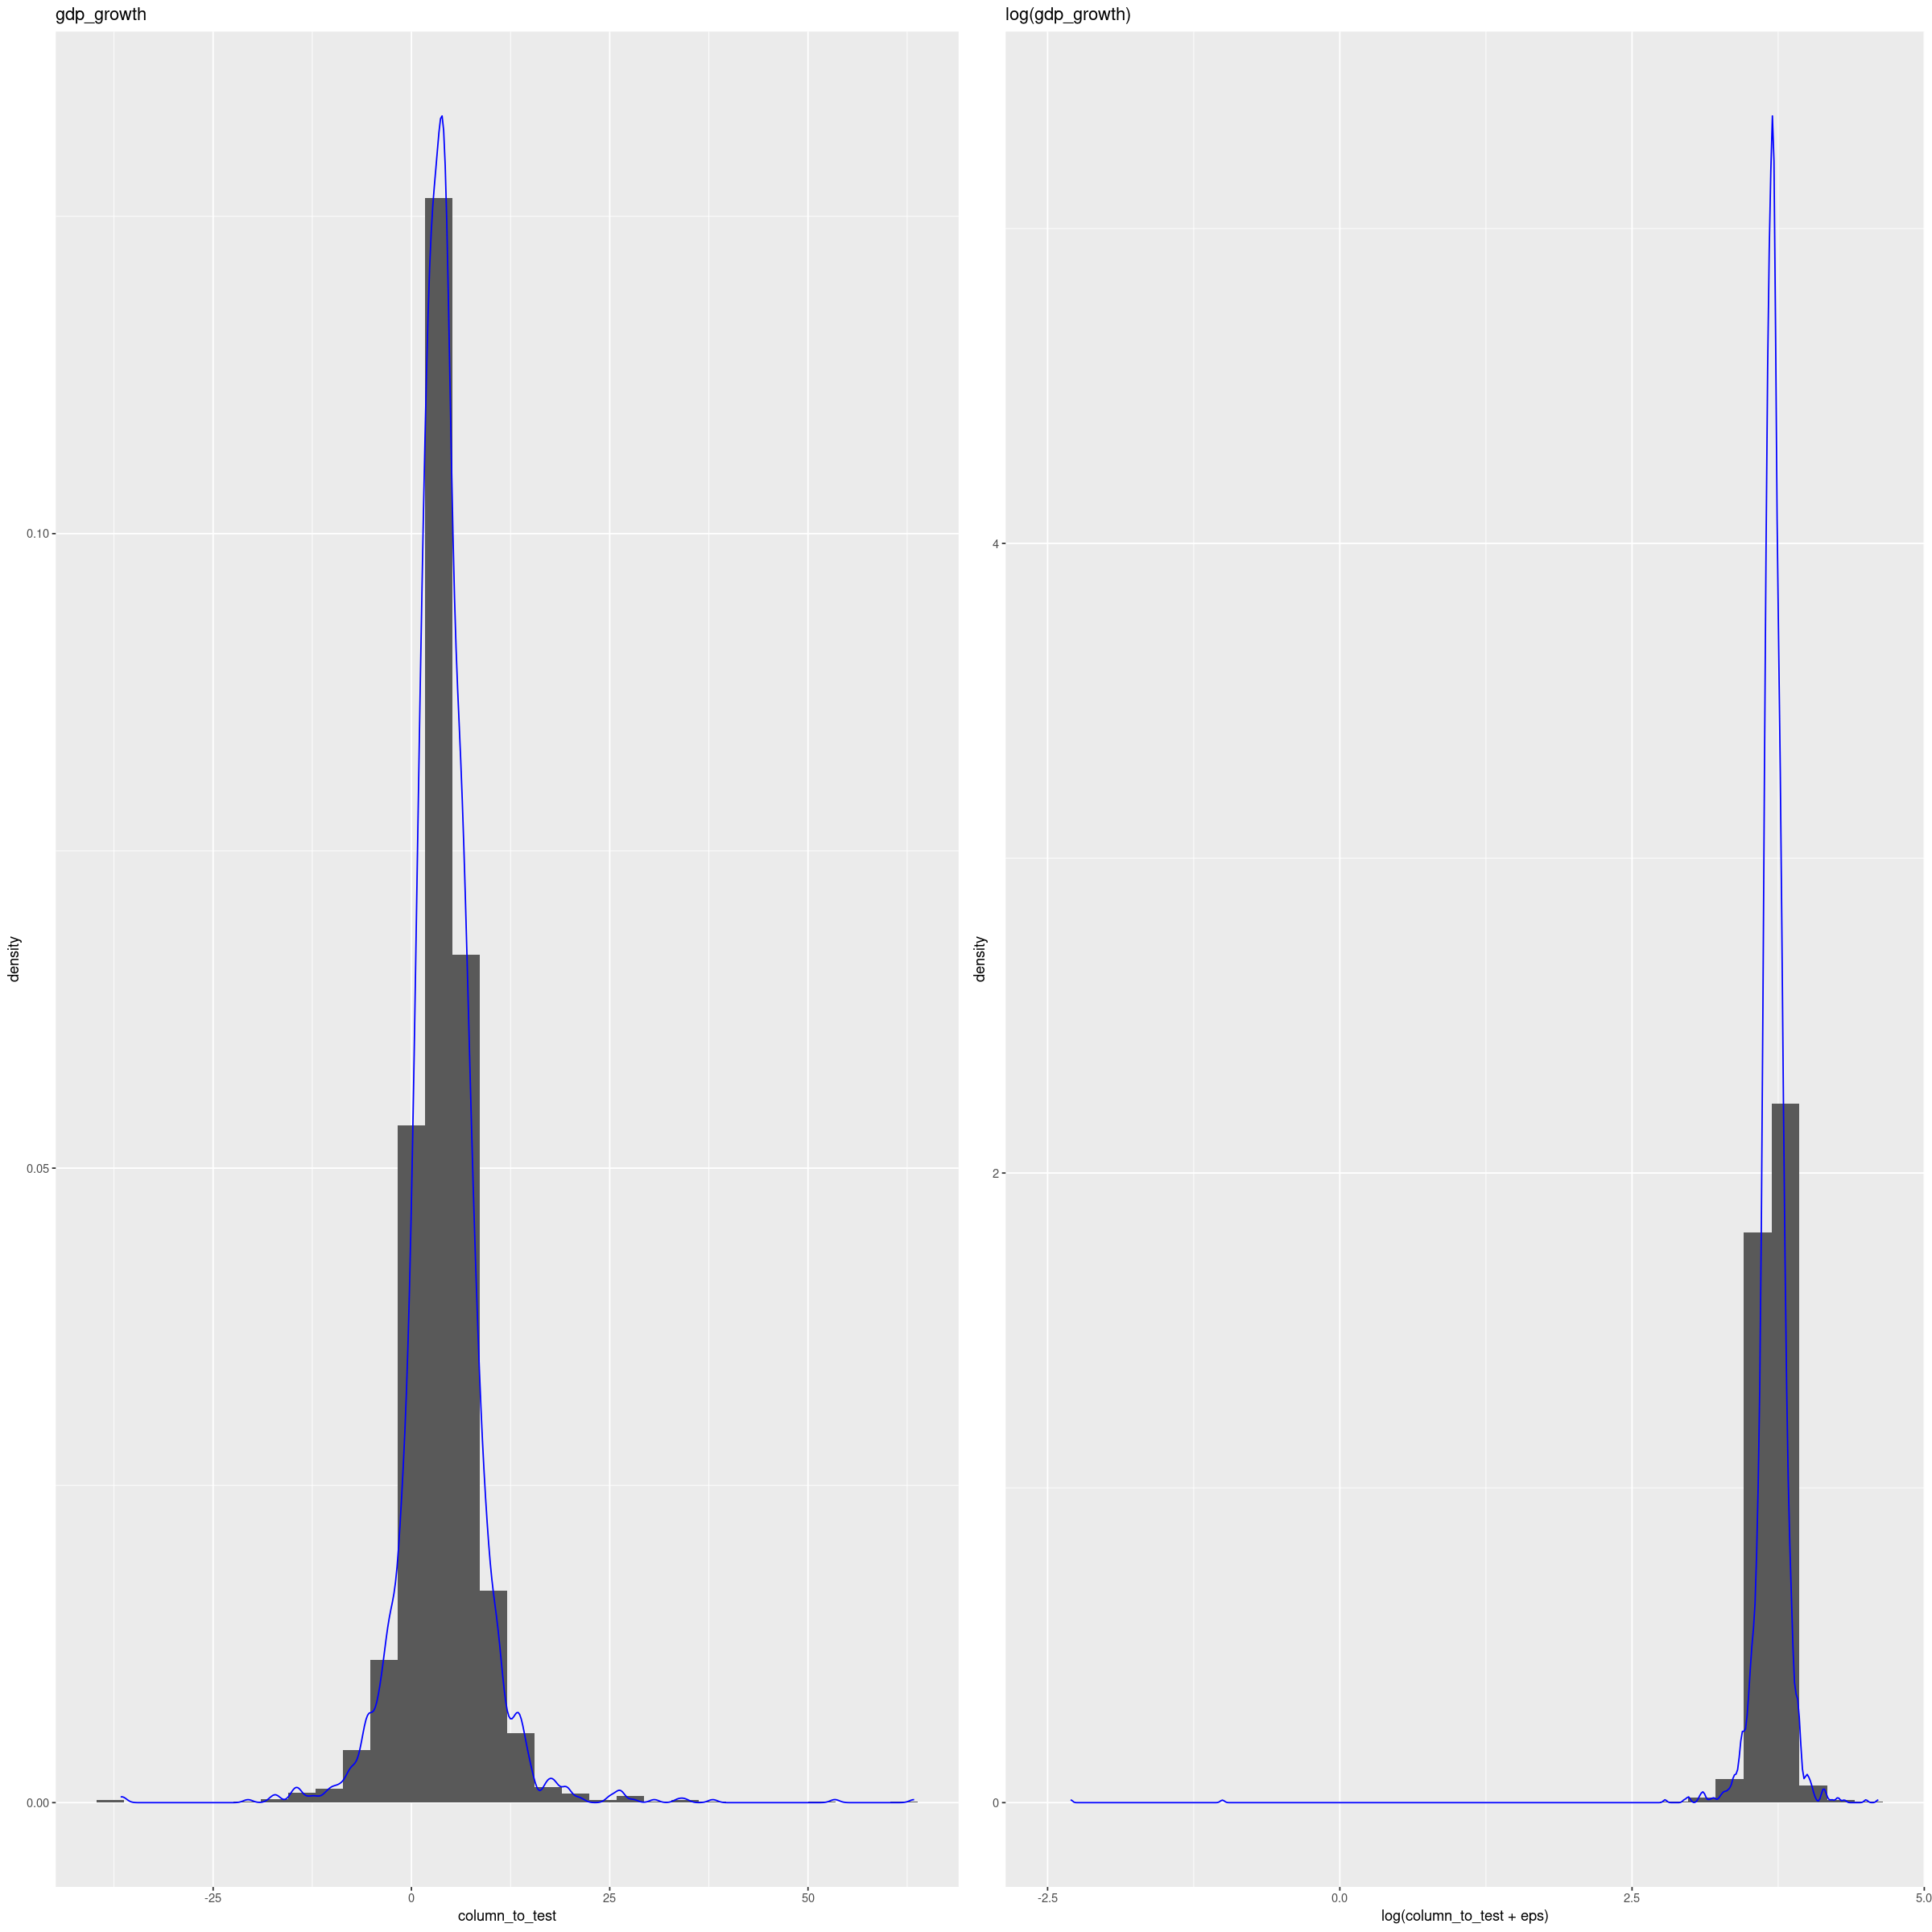

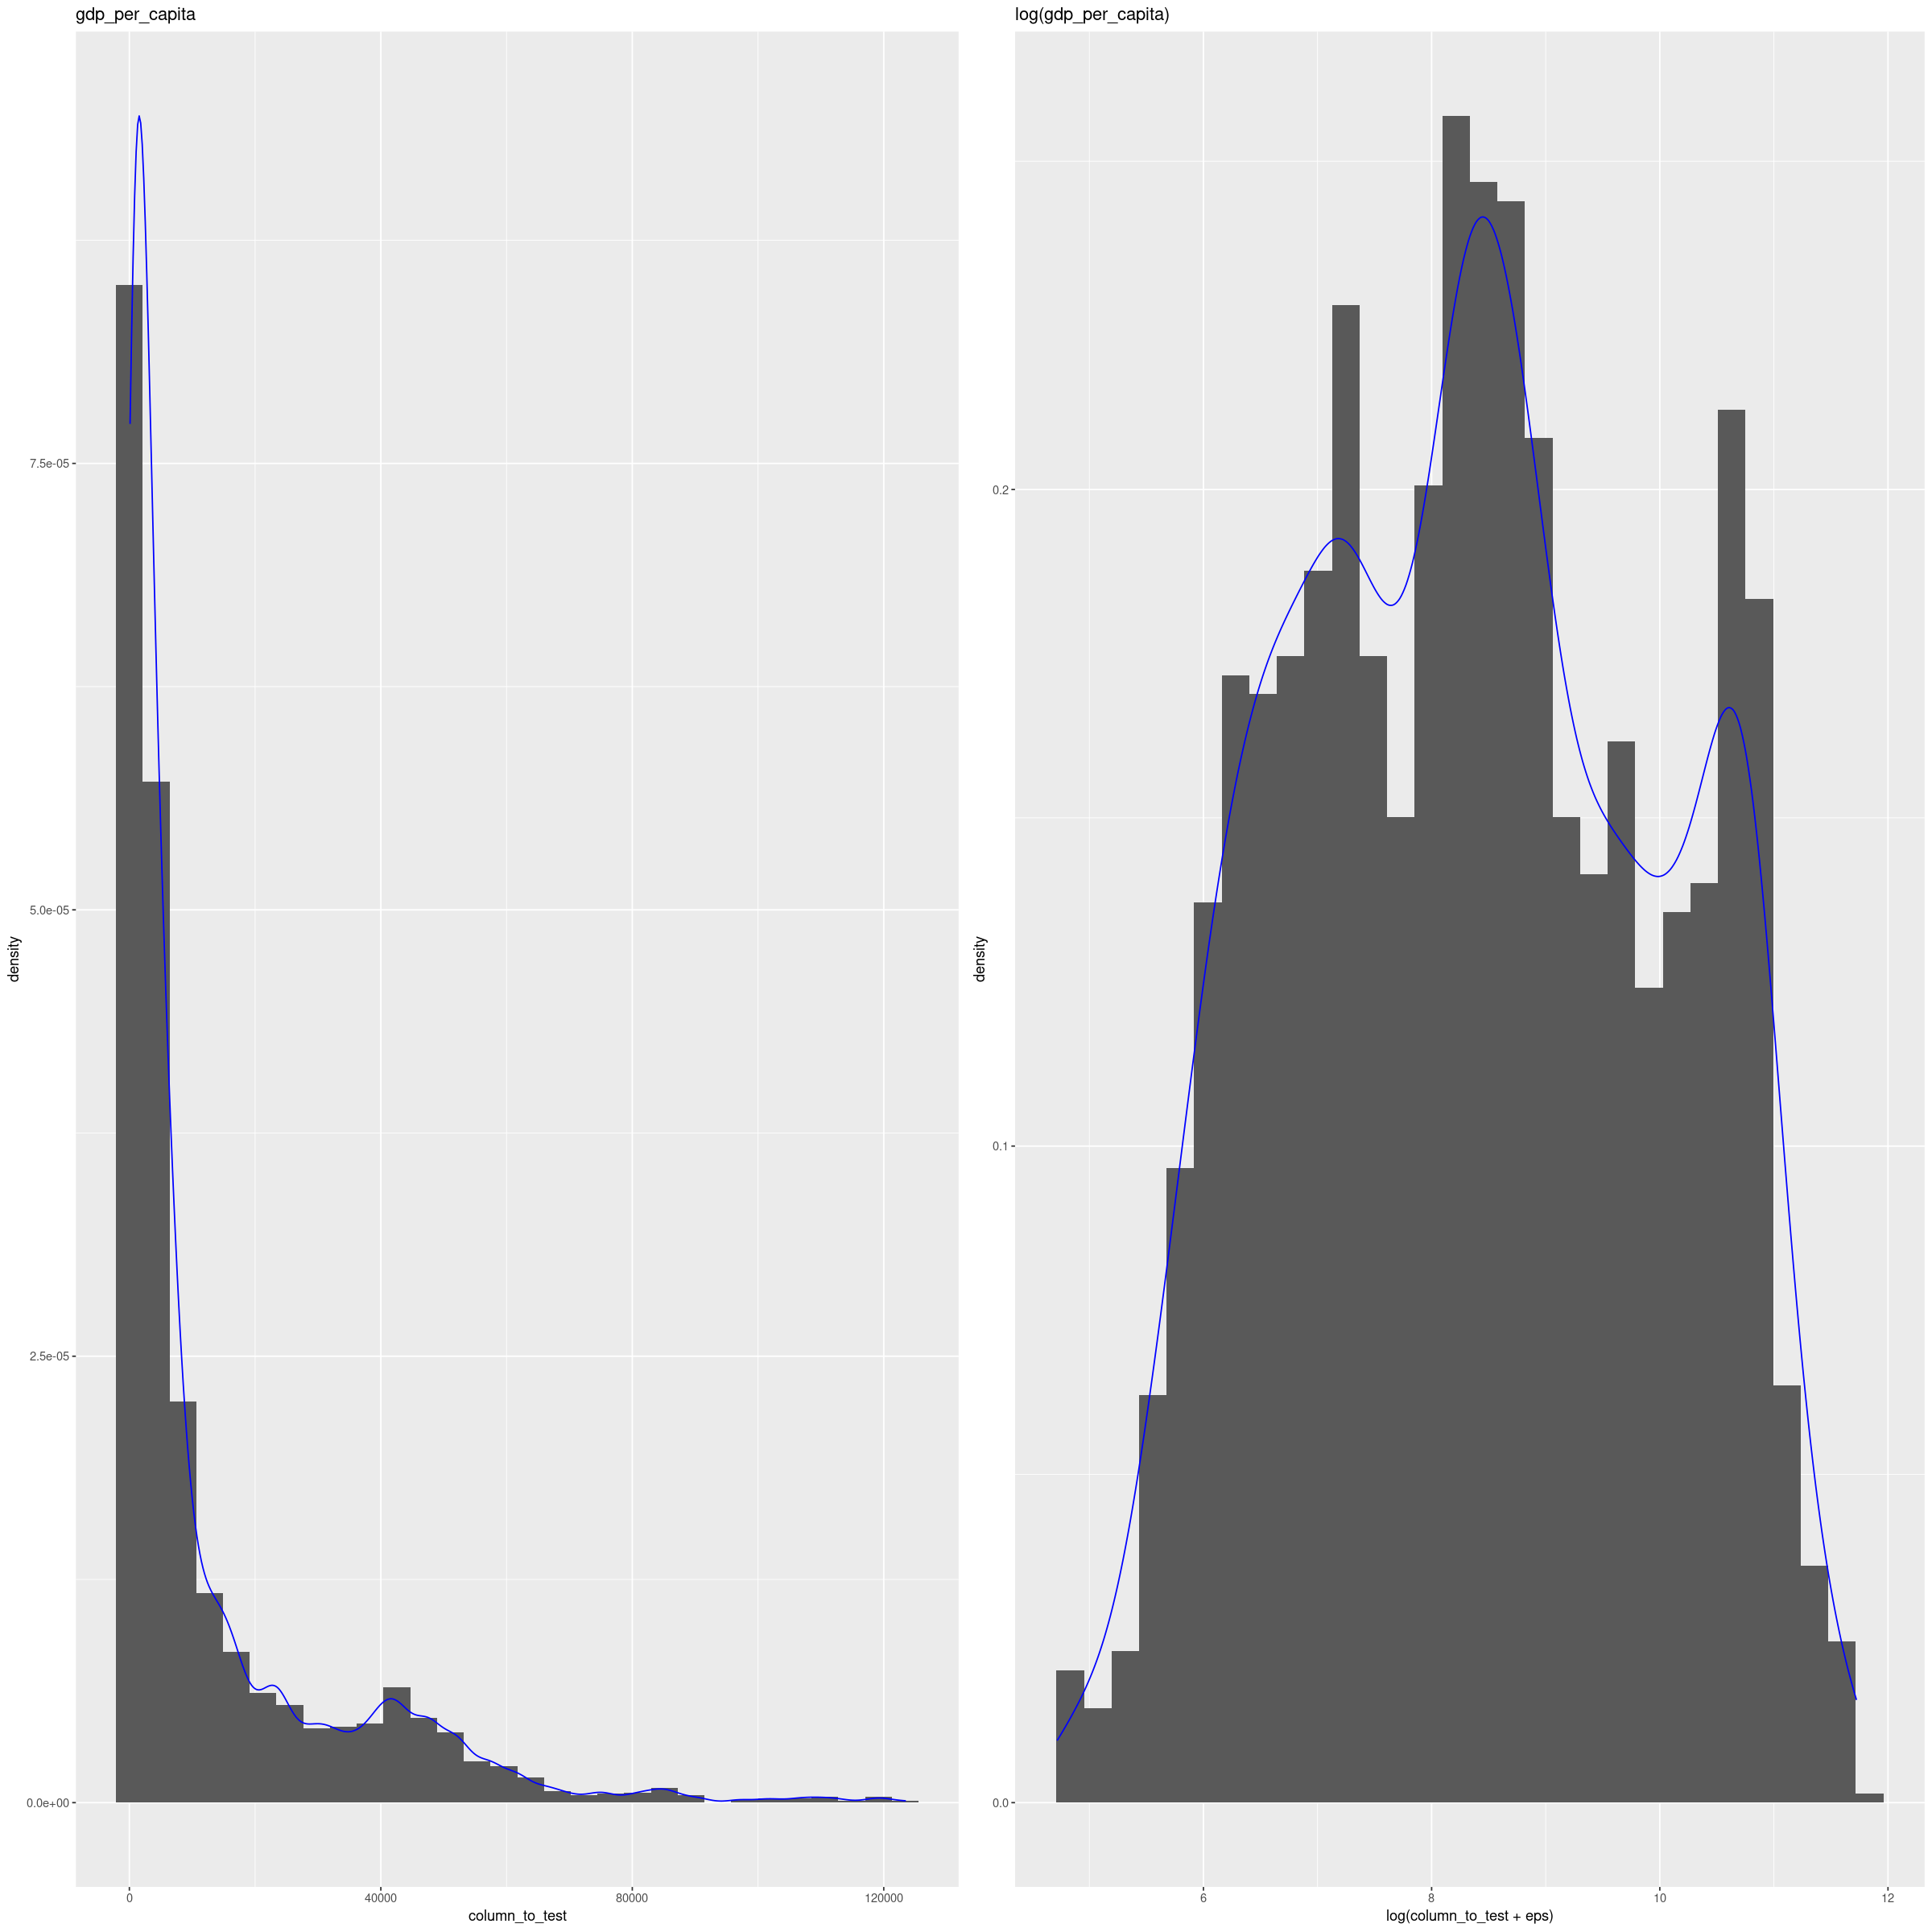

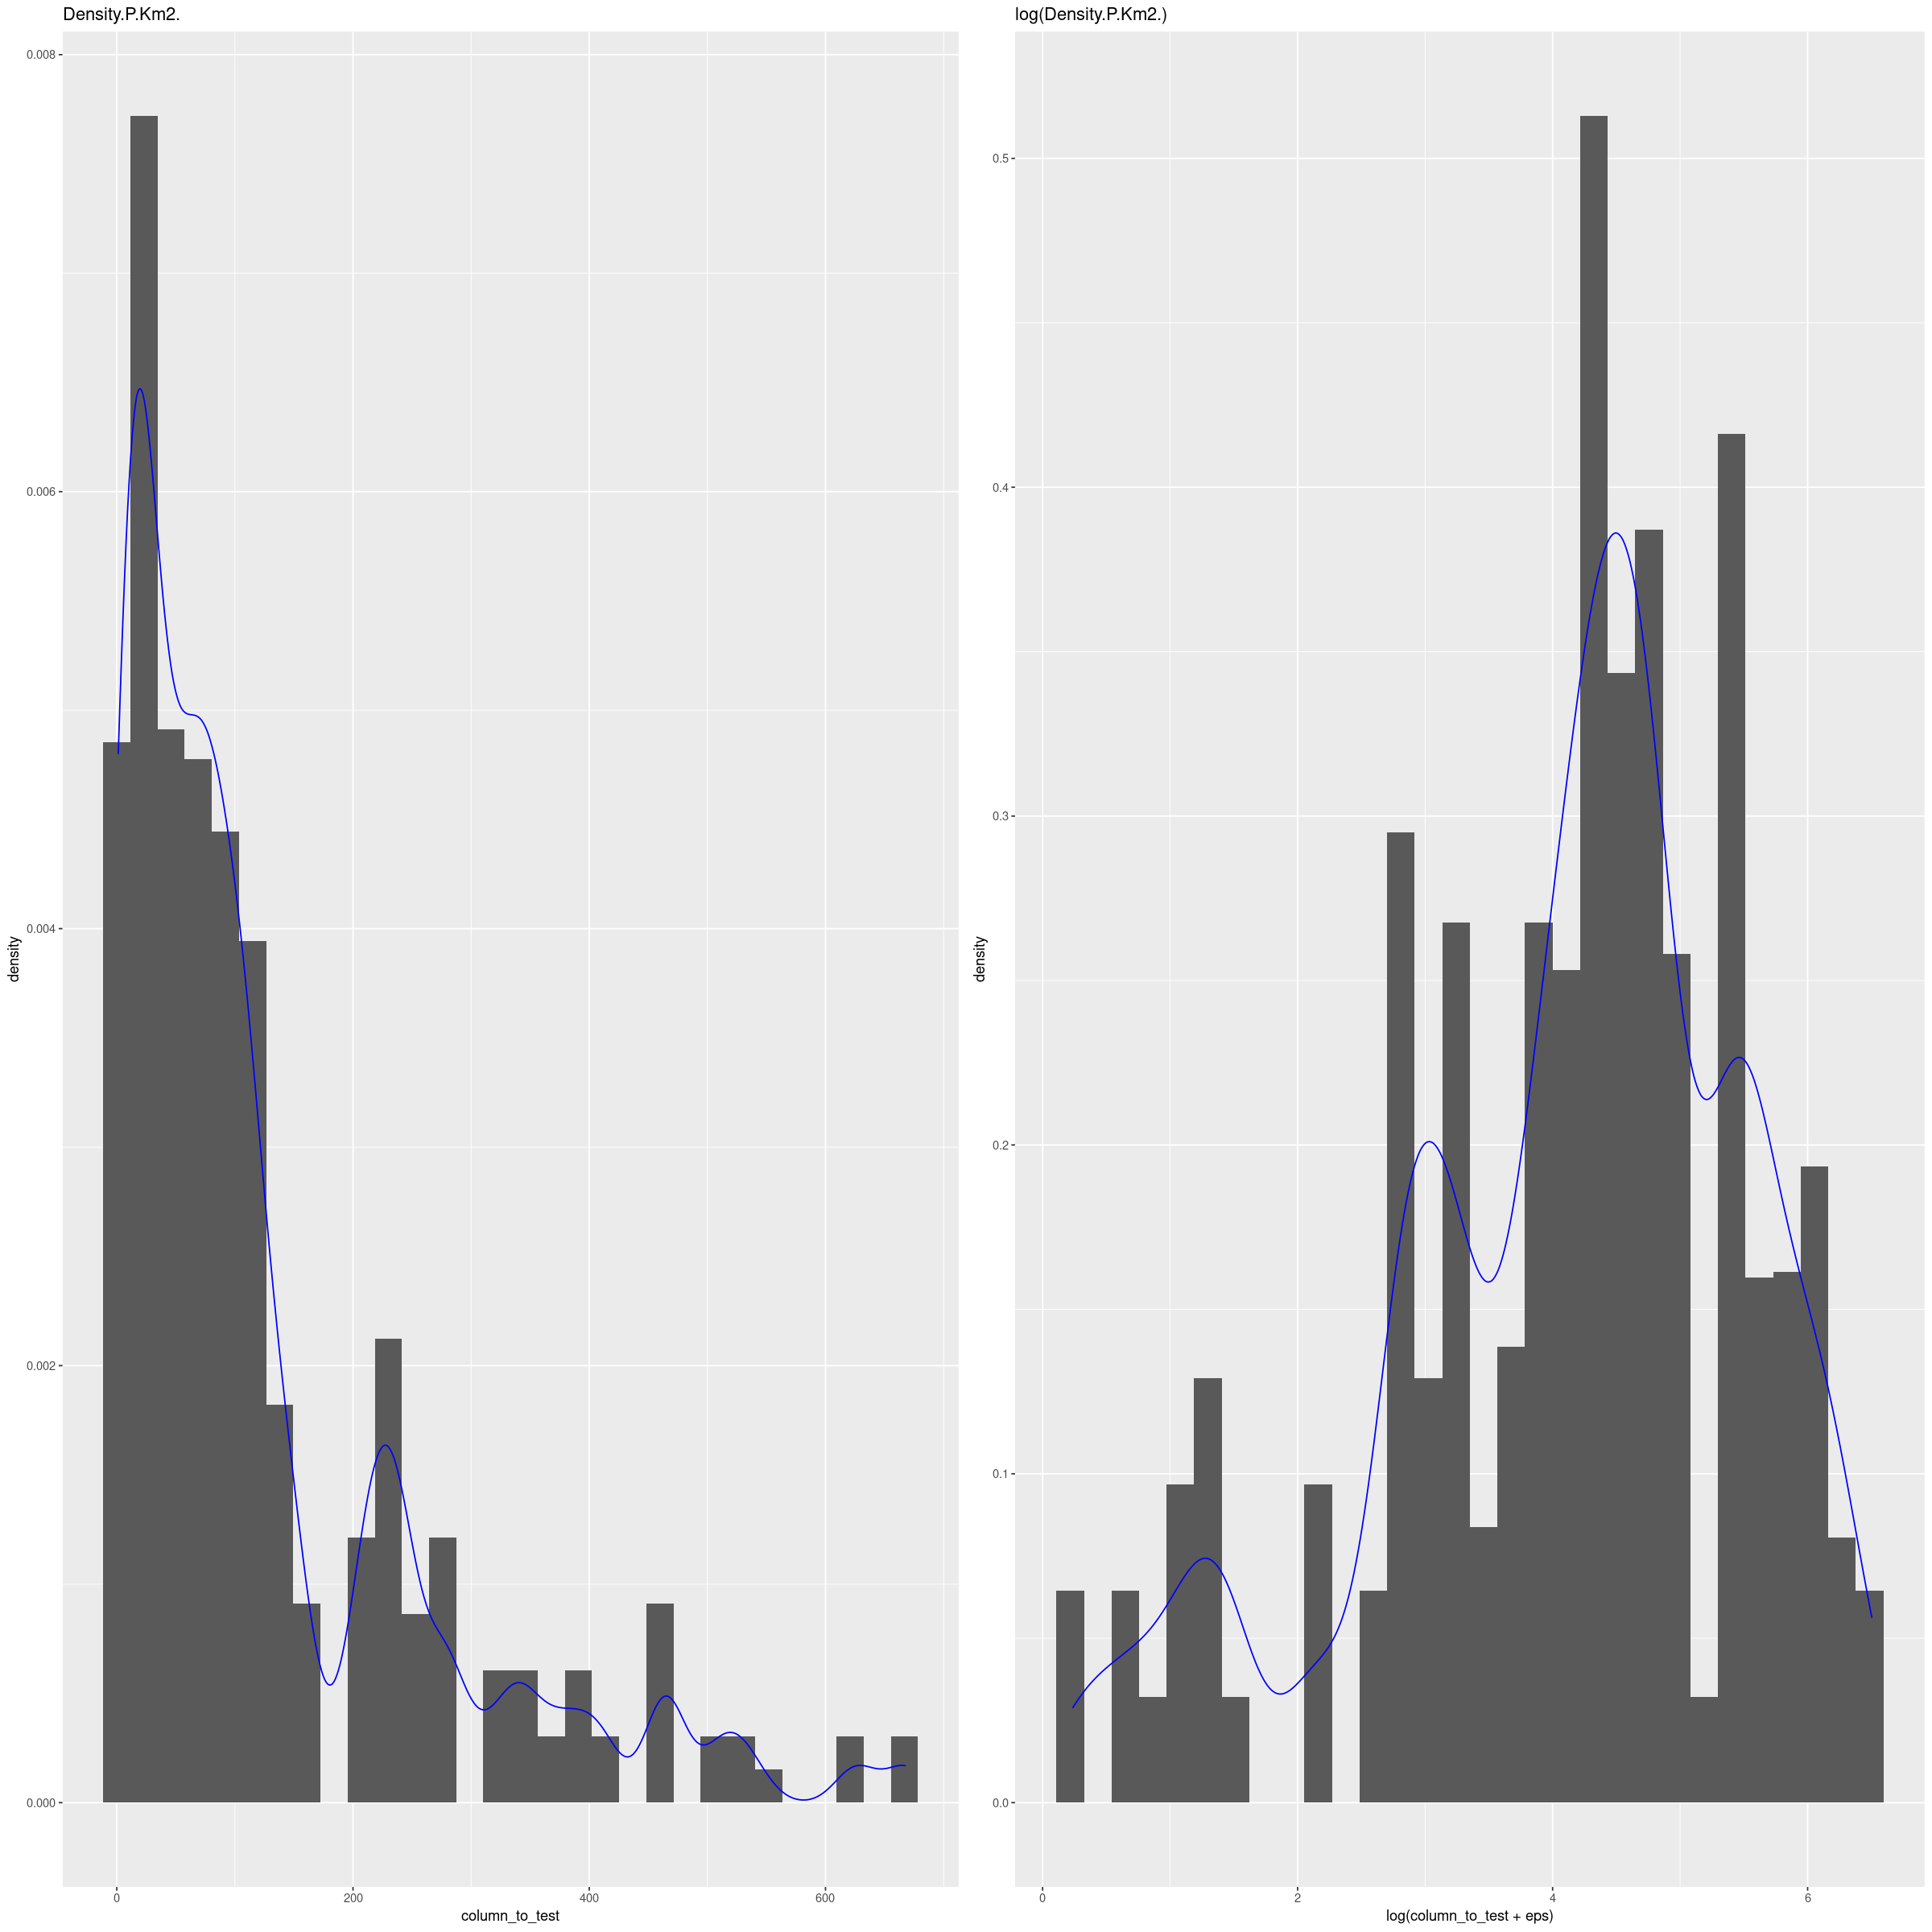

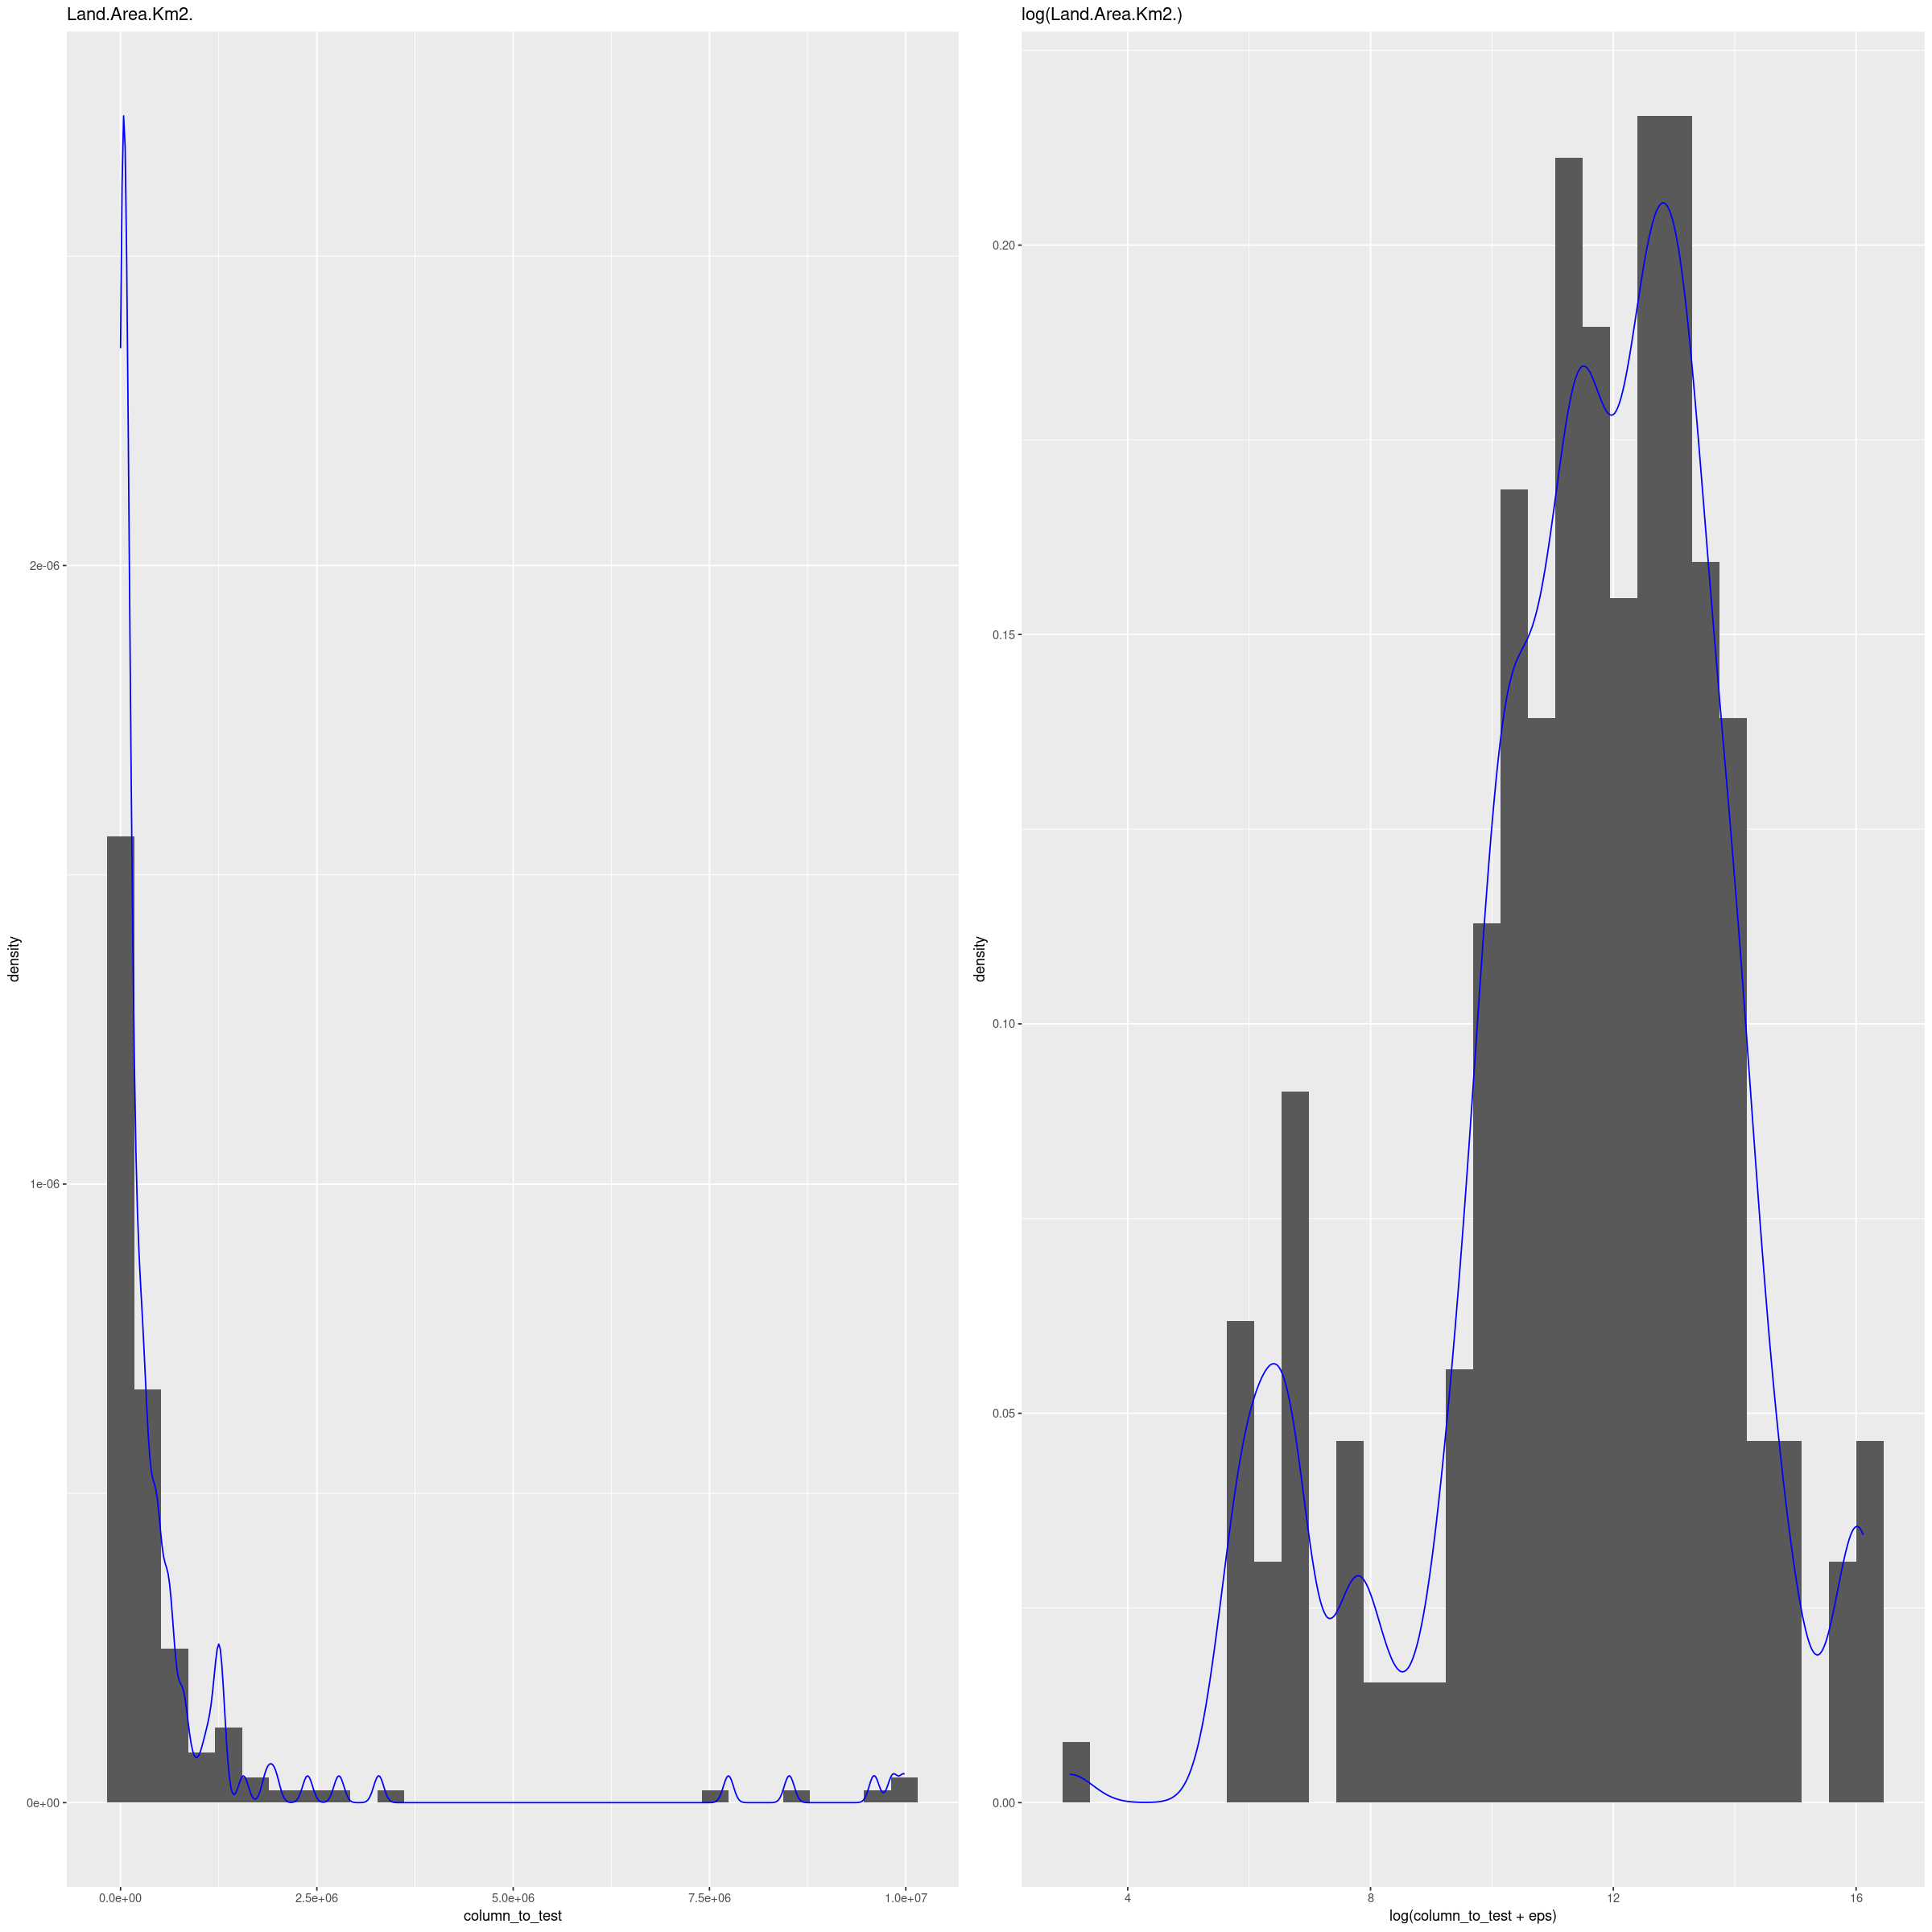

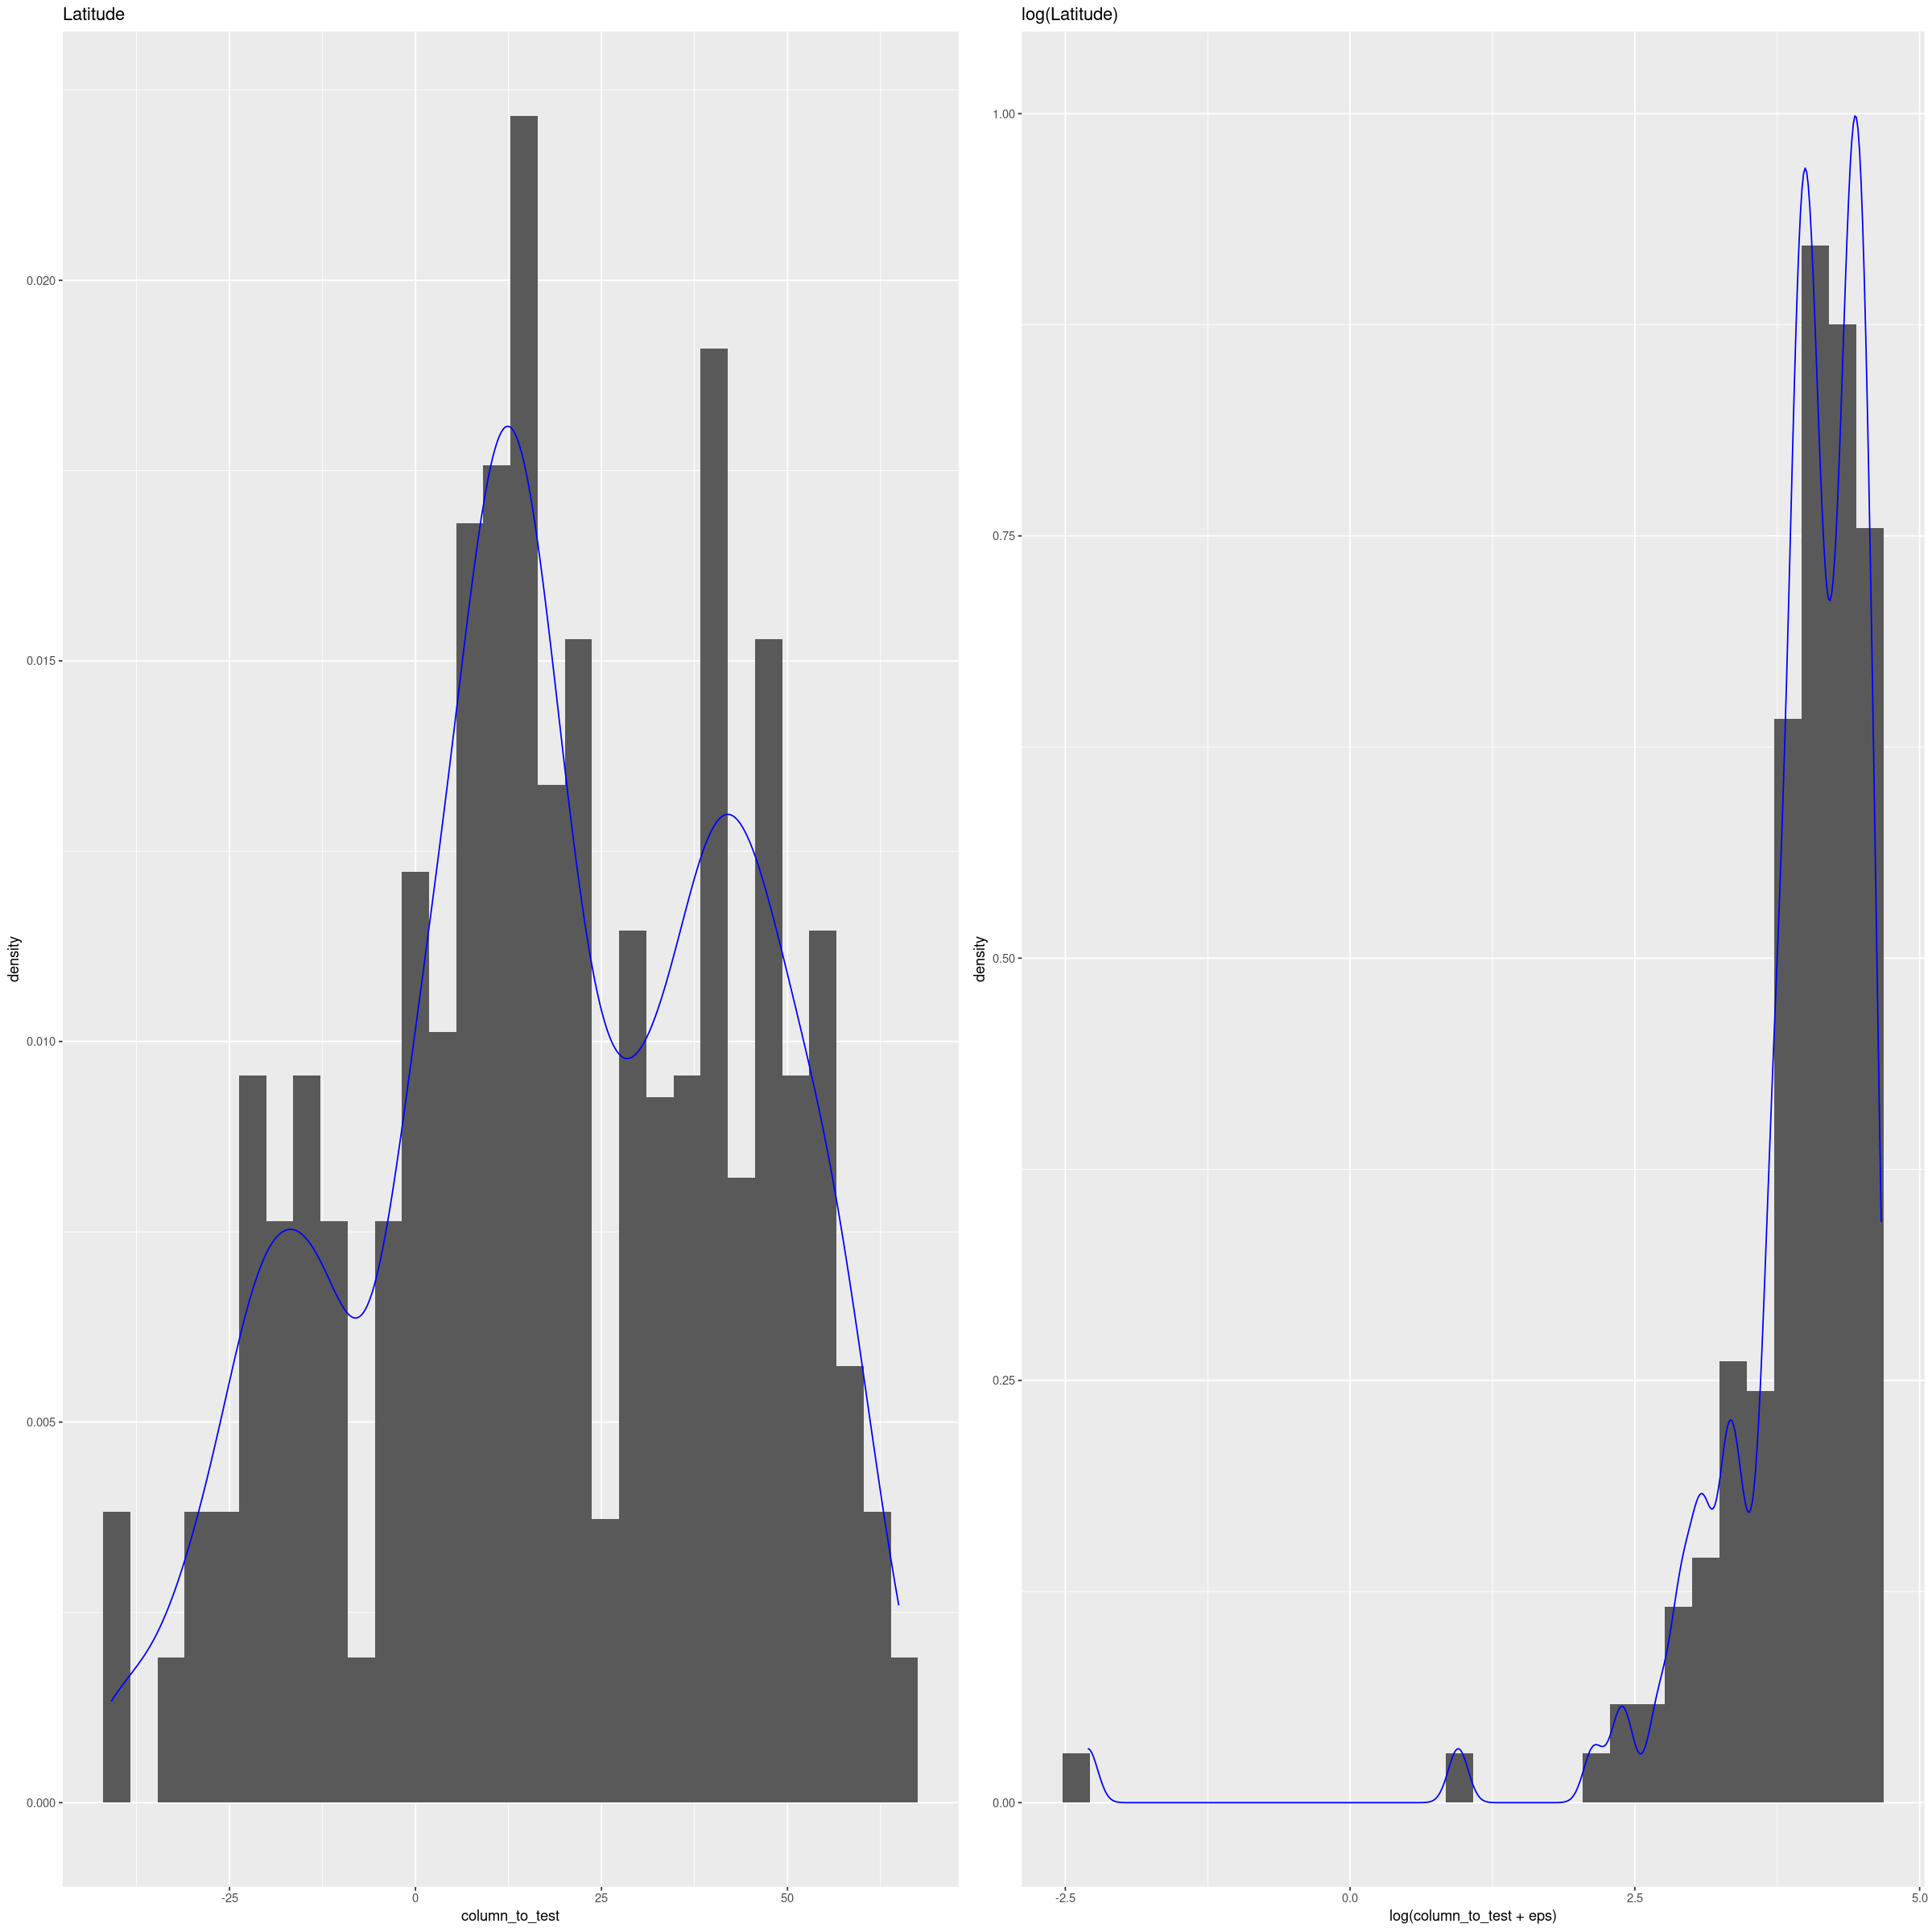

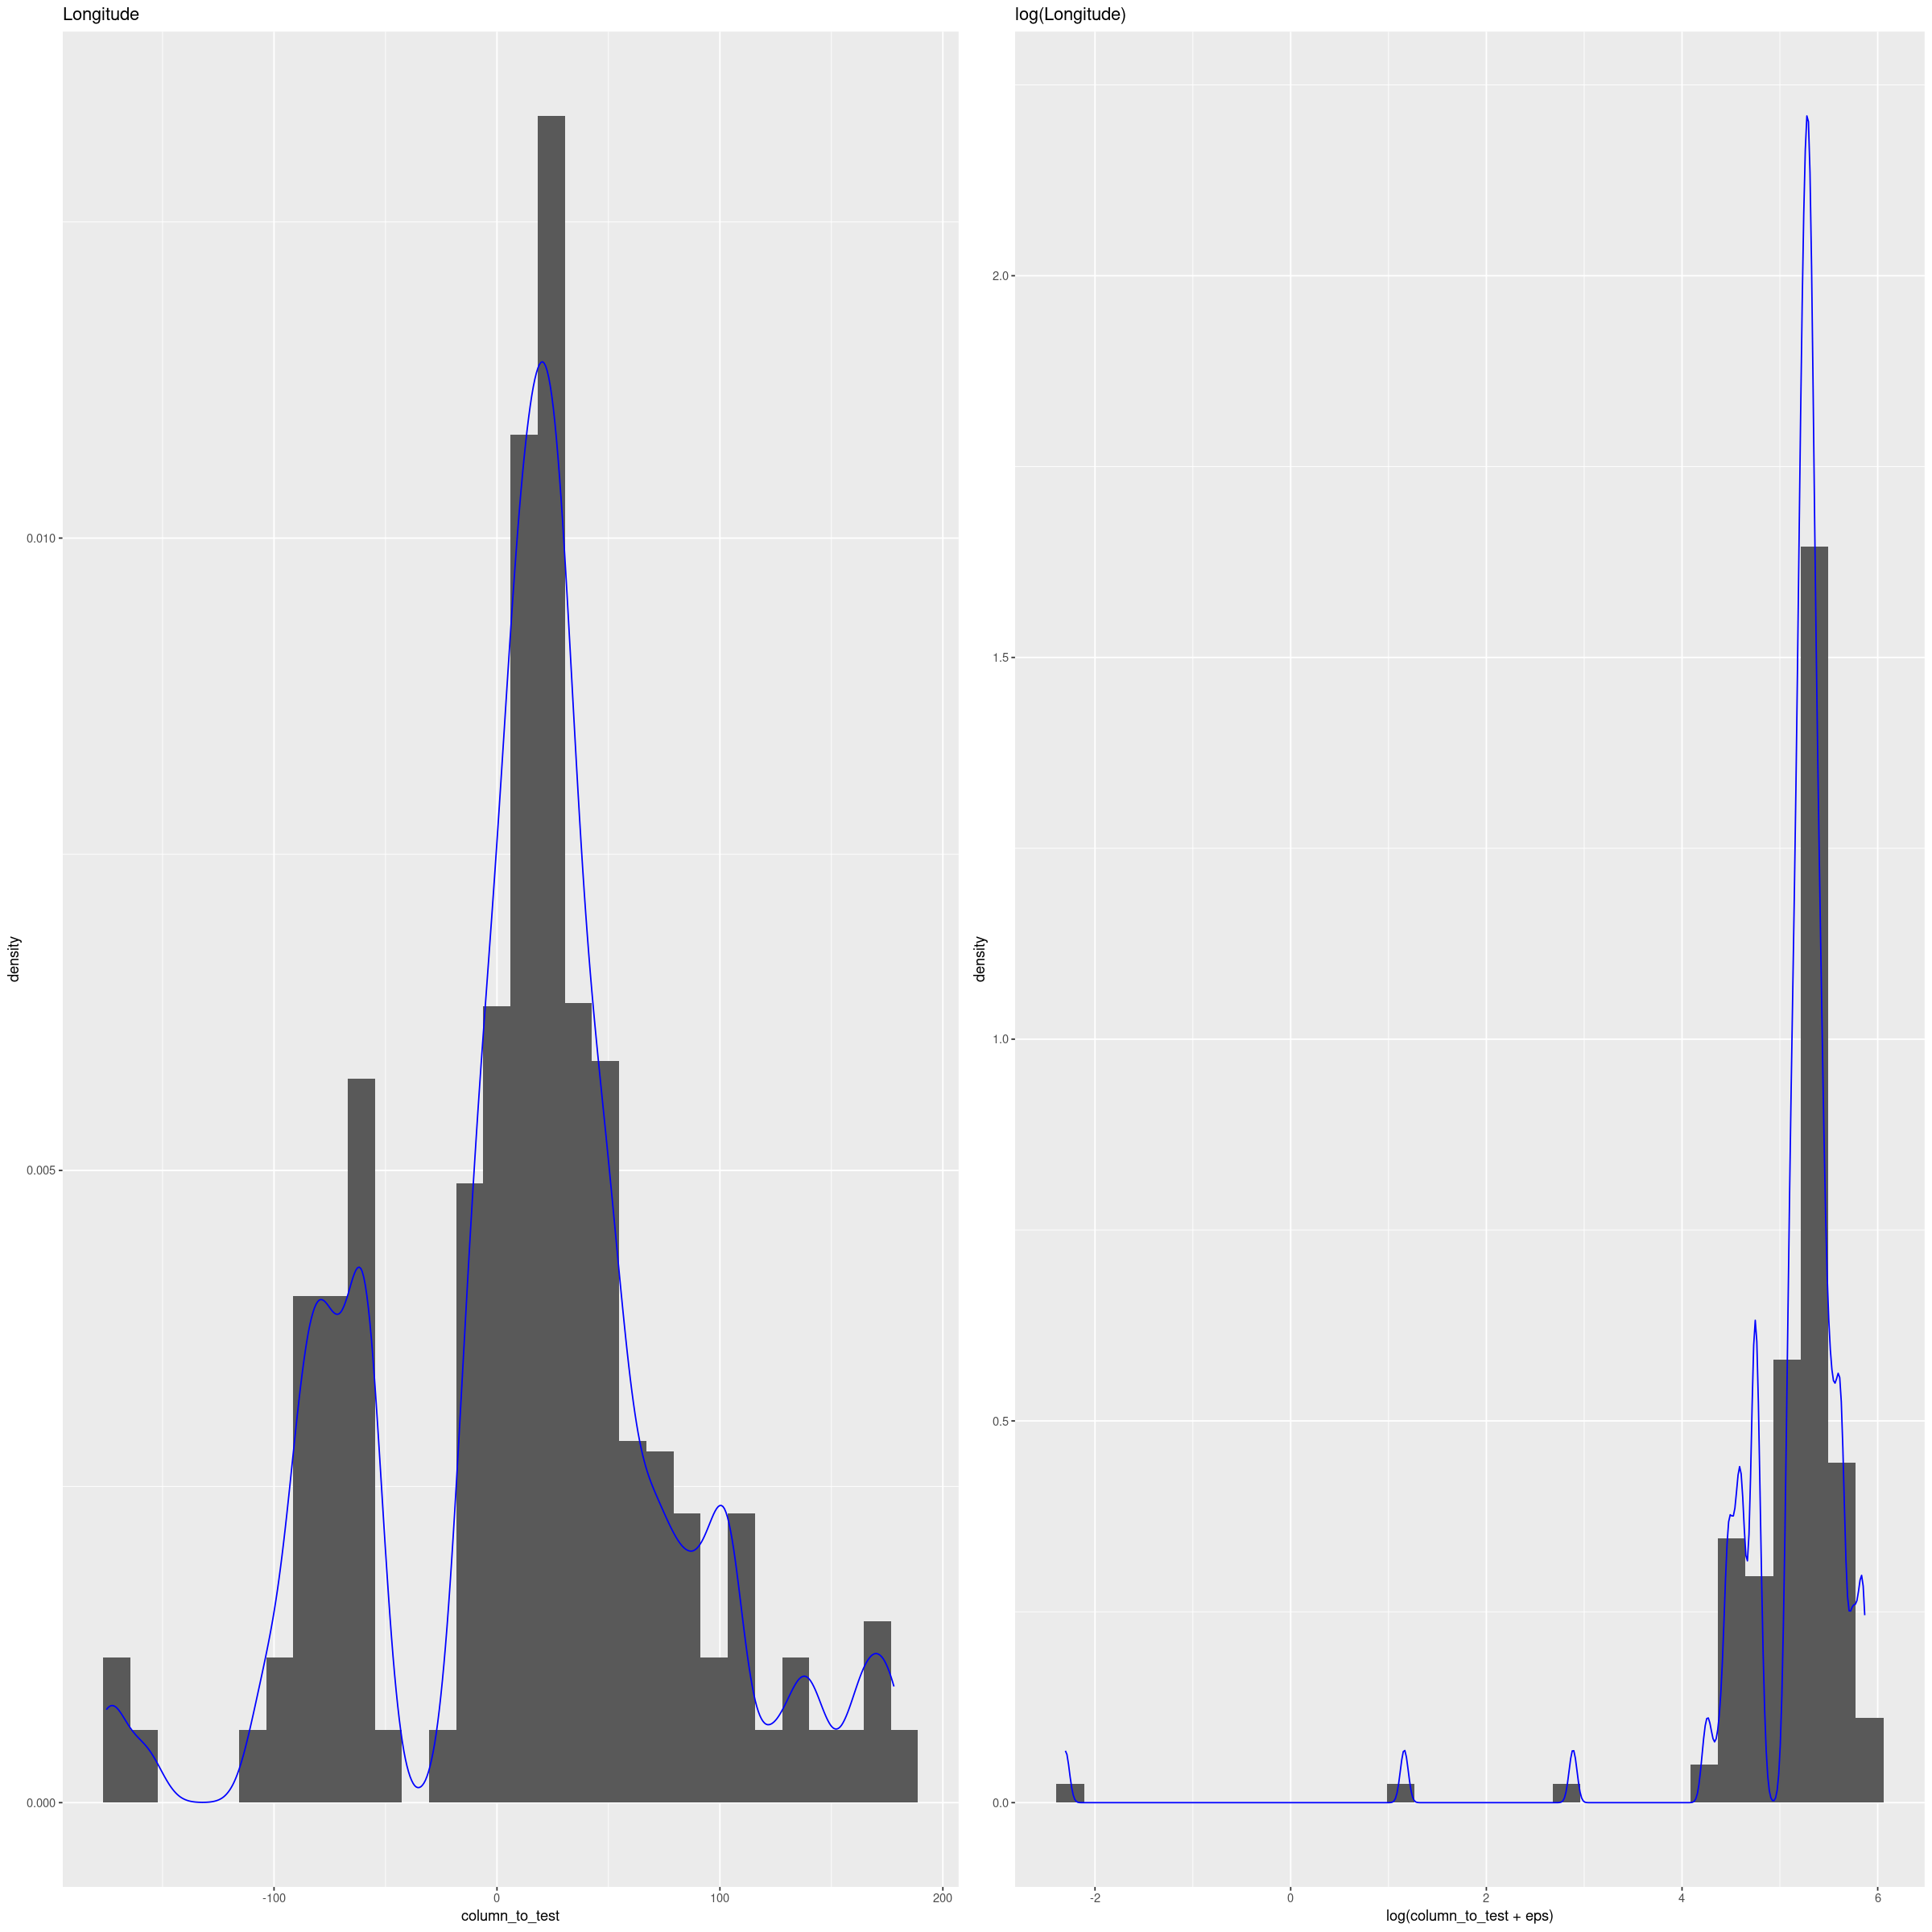

In [67]:
interesting_columns <- select(df, -c(Entity, Year))

for (i in 1:ncol(interesting_columns)){
    
  column_to_test = interesting_columns[,i]
  colname = colnames(interesting_columns)[i]
  
  eps = 0
  if (min(column_to_test)<=0){
    eps = abs(min(column_to_test)) + 0.1
  }
  
  g1<-ggplot(interesting_columns,aes(x=column_to_test))+
  geom_histogram(aes(y=after_stat(density)), bins = bins)+
  geom_density(alpha=.2, col="blue")+
  ggtitle(colname)
  
  g2<-ggplot(interesting_columns,aes(x=log(column_to_test + eps)))+
  geom_histogram(aes(y=after_stat(density)), bins = bins)+
  geom_density(alpha=.2, col="blue")+
  ggtitle(paste("log(",colname,")", sep=""))
  
  grid.arrange(g1, g2, ncol = 2)
  
}

In [71]:
df <- df %>% mutate(log_Primary.energy.consumption.per.capita..kWh.person. = log(Primary.energy.consumption.per.capita..kWh.person.),
                    log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. = log(Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.),
                    log_gdp_per_capita = log(gdp_per_capita),
                    log_Value_co2_emissions_kt_by_country = log(Value_co2_emissions_kt_by_country),
                    log_Density.P.Km2. = log(Density.P.Km2.),
                    log_Land.Area.Km2. = log(Land.Area.Km2.))

head(df)

Entity      Year Access.to.electricity....of.population.
4 Afghanistan 2003 14.73851                               
5 Afghanistan 2004 20.06497                               
6 Afghanistan 2005 25.39089                               
7 Afghanistan 2006 30.71869                               
8 Afghanistan 2007 36.05101                               
9 Afghanistan 2008 42.40000                               
  Access.to.clean.fuels.for.cooking
4  9.50                            
5 10.90                            
6 12.20                            
7 13.85                            
8 15.30                            
9 16.70                            
  Renewable.energy.share.in.the.total.final.energy.consumption....
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
7 31.89                                                           
8 28.78                                                           
9 21.17                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
7 0.20                                0                             
8 0.20                                0                             
9 0.19                                0                             
  Electricity.from.renewables..TWh. Low.carbon.electricity....electricity.
4 0.63                              67.02128                              
5 0.56                              62.92135                              
6 0.59                              63.44086                              
7 0.64                              76.19048                              
8 0.75                              78.94737                              
9 0.54                              73.97260                              
  Primary.energy.consumption.per.capita..kWh.person. ⋯ Density.P.Km2.
4 229.9682                                           ⋯ 60            
5 204.2312                                           ⋯ 60            
6 252.0691                                           ⋯ 60            
7 304.4209                                           ⋯ 60            
8 354.2799                                           ⋯ 60            
9 607.8335                                           ⋯ 60            
  Land.Area.Km2. Latitude Longitude
4 652230         33.93911 67.70995 
5 652230         33.93911 67.70995 
6 652230         33.93911 67.70995 
7 652230         33.93911 67.70995 
8 652230         33.93911 67.70995 
9 652230         33.93911 67.70995 
  log_Primary.energy.consumption.per.capita..kWh.person.
4 5.437941                                              
5 5.319253                                              
6 5.529703                                              
7 5.718411                                              
8 5.870087                                              
9 6.409901                                              
  log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
4 0.3364722                                                      
5 0.1823216                                                      
6 0.3435897                                                      
7 0.4054651                                                      
8 0.4252677                                                      
9 0.6626880                                                      
  log_gdp_per_capita log_Value_co2_emissions_kt_by_country log_Density.P.Km2.
4 5.250617           7.106606                              4.094345          
5 5.353667           6.937314                              4.094345          
6 5.489067           7.

5. Visualisez la grande hétérogénéité des émissions de CO2 entre les pays. Quels sont les 5 pays les plus
émetteurs de CO2 ?

In [72]:
library(tidyverse)

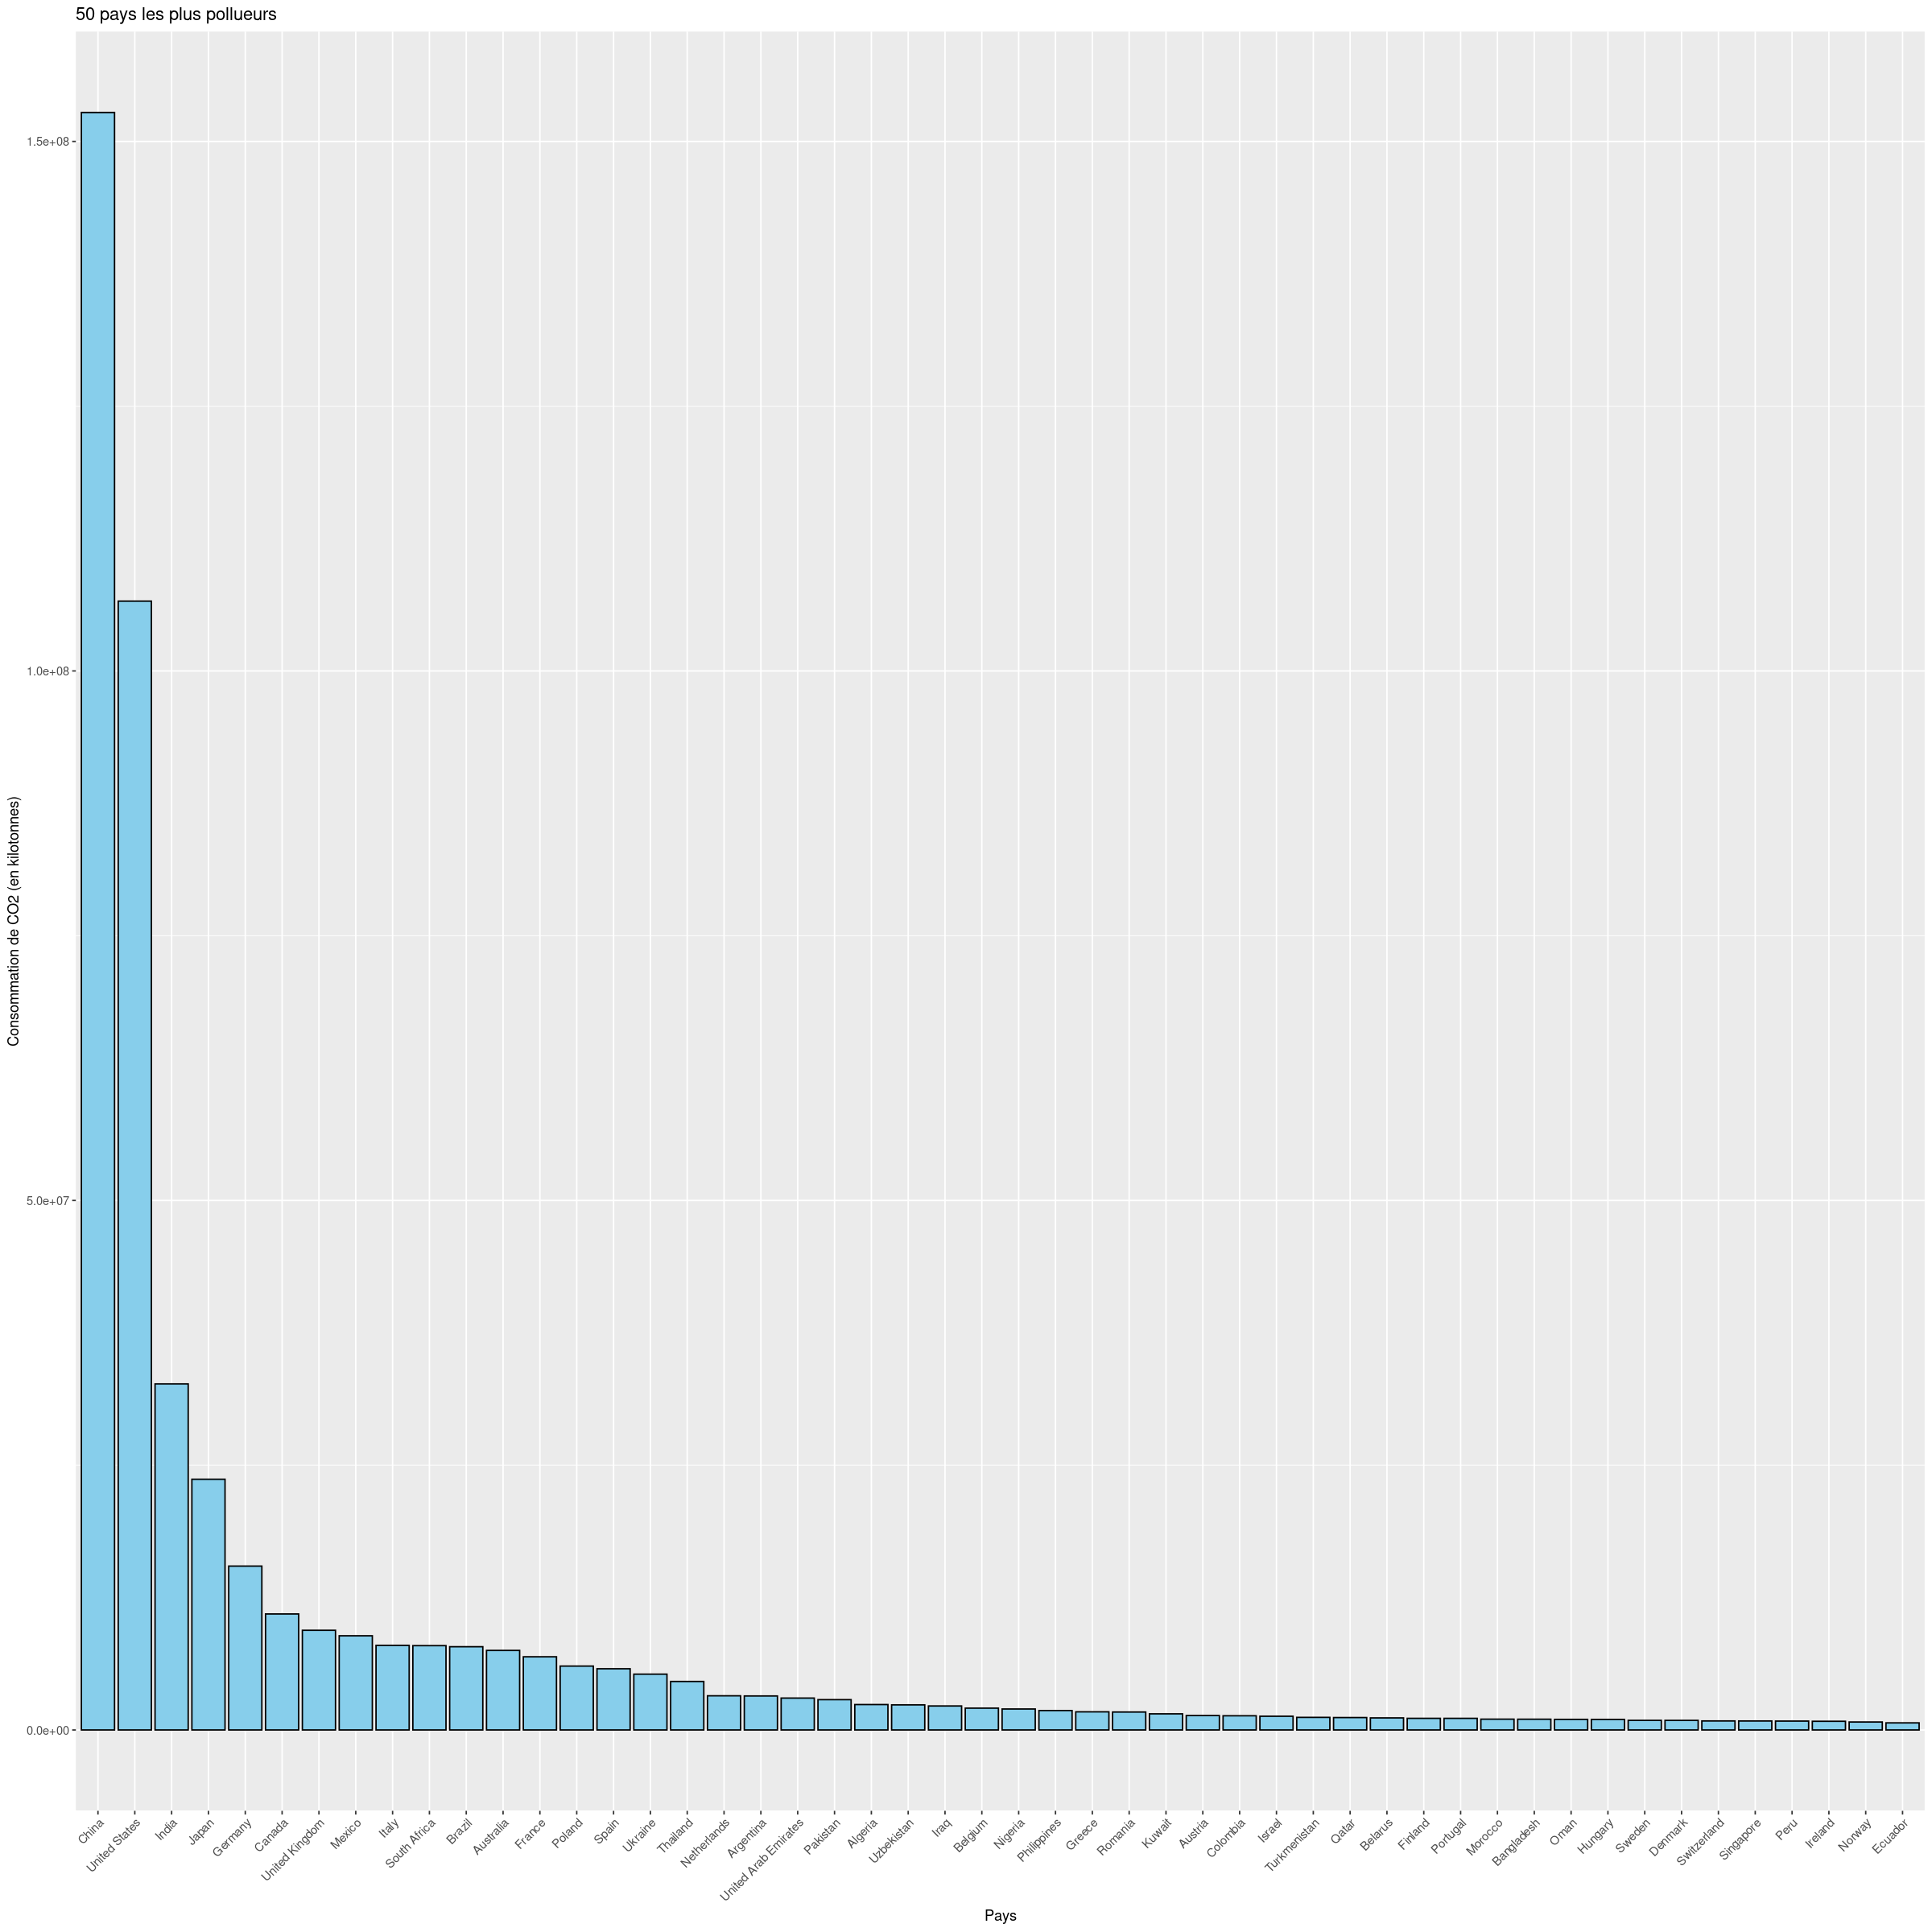

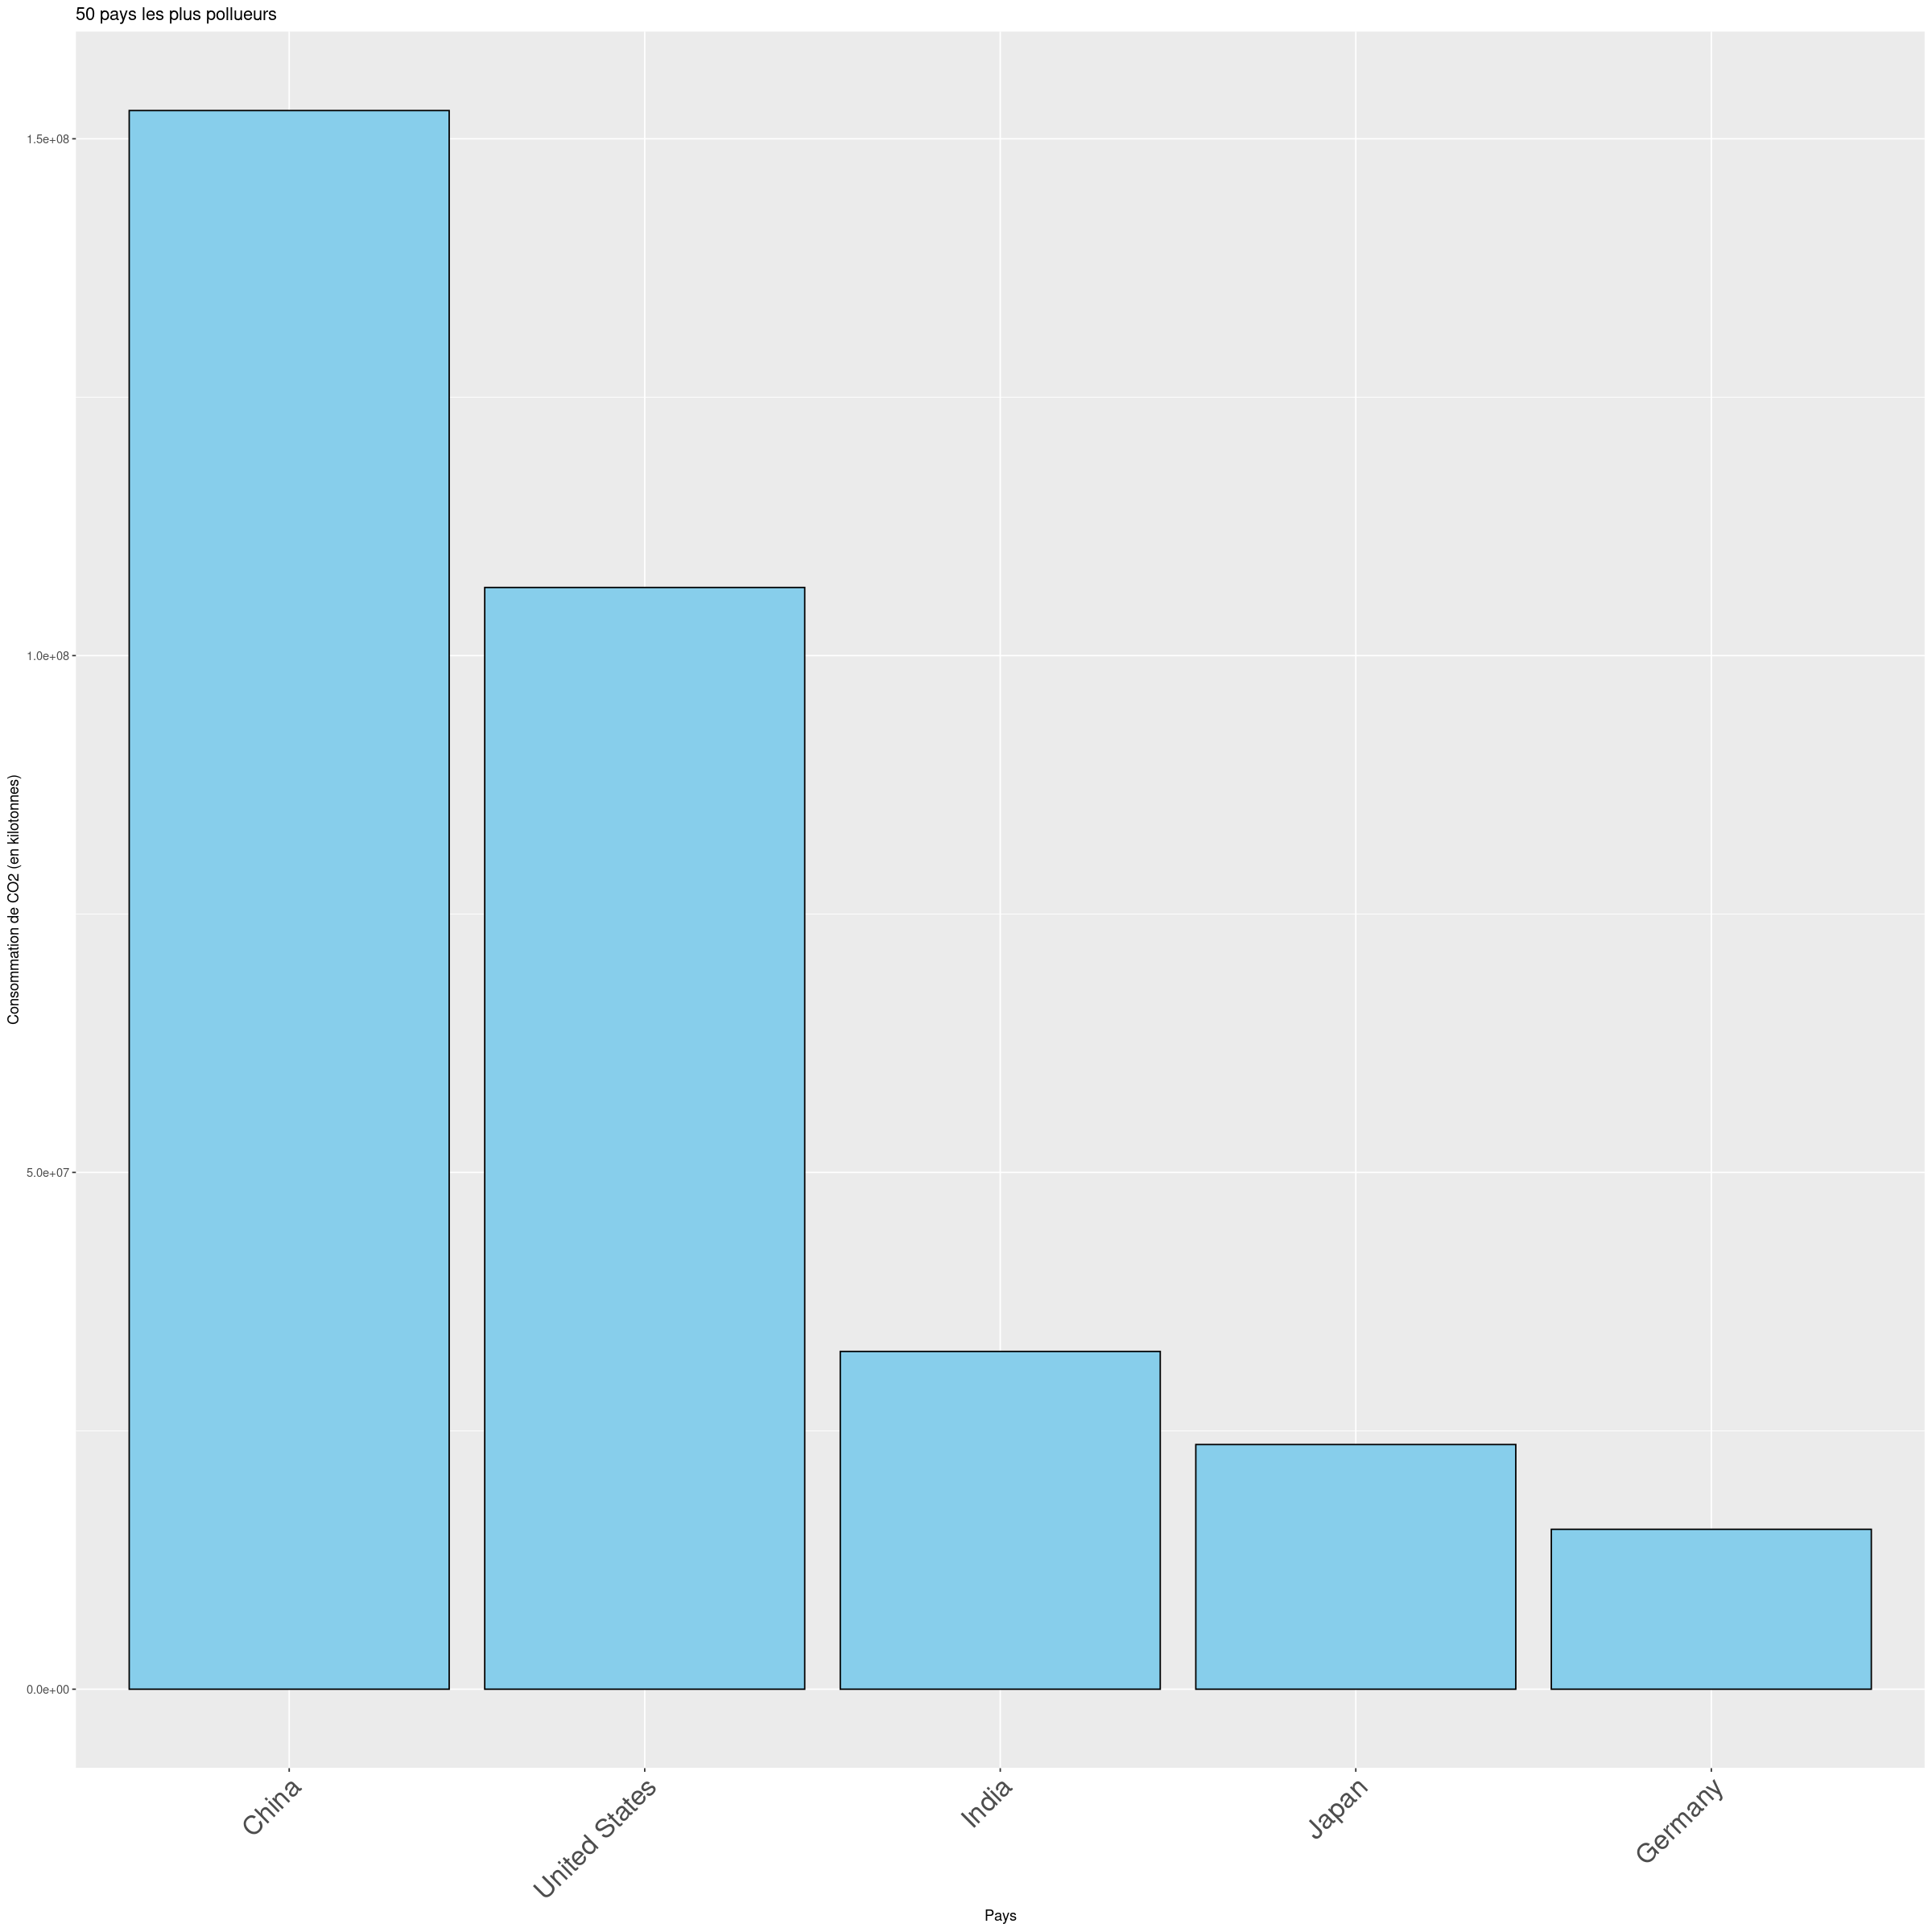

In [73]:
emissions_par_pays <- df %>% select(Entity,Value_co2_emissions_kt_by_country)

emissions_par_pays <- emissions_par_pays %>% ## on regroupe les pays en sommant leur consommation de co2
  group_by(Entity) %>%
  summarise(Value_co2_emissions_kt_by_country = sum(Value_co2_emissions_kt_by_country))

emissions_par_pays<- emissions_par_pays %>% arrange(desc(Value_co2_emissions_kt_by_country)) ## on classe par ordre décroissant

#emissions_par_pays <- distinct(emissions_par_pays,Entity)
# On sélectionne les 50 pays les plus pollueurs
emissions_par_pays <- emissions_par_pays %>% slice(1:50)

ggplot(emissions_par_pays, aes(x = reorder(Entity, -Value_co2_emissions_kt_by_country), y = Value_co2_emissions_kt_by_country)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(x = "Pays", y = "Consommation de CO2 (en kilotonnes)", title = "50 pays les plus pollueurs") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 9))


## On sélectionne les 5 pays les plus pollueurs
emissions_par_pays <- emissions_par_pays %>% slice(1:5)
ggplot(emissions_par_pays, aes(x = reorder(Entity, -Value_co2_emissions_kt_by_country), y = Value_co2_emissions_kt_by_country)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(x = "Pays", y = "Consommation de CO2 (en kilotonnes)", title = "50 pays les plus pollueurs") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 20))

6. Poursuivez avec une analyse descriptive multidimensionnelle. Utilisez des techniques de visualisation: par
exemple les nuages de points (scatterplot), des graphes des correlations... Analysez les dépendances entre
les variables quantitatives

In [74]:
library(corrplot)

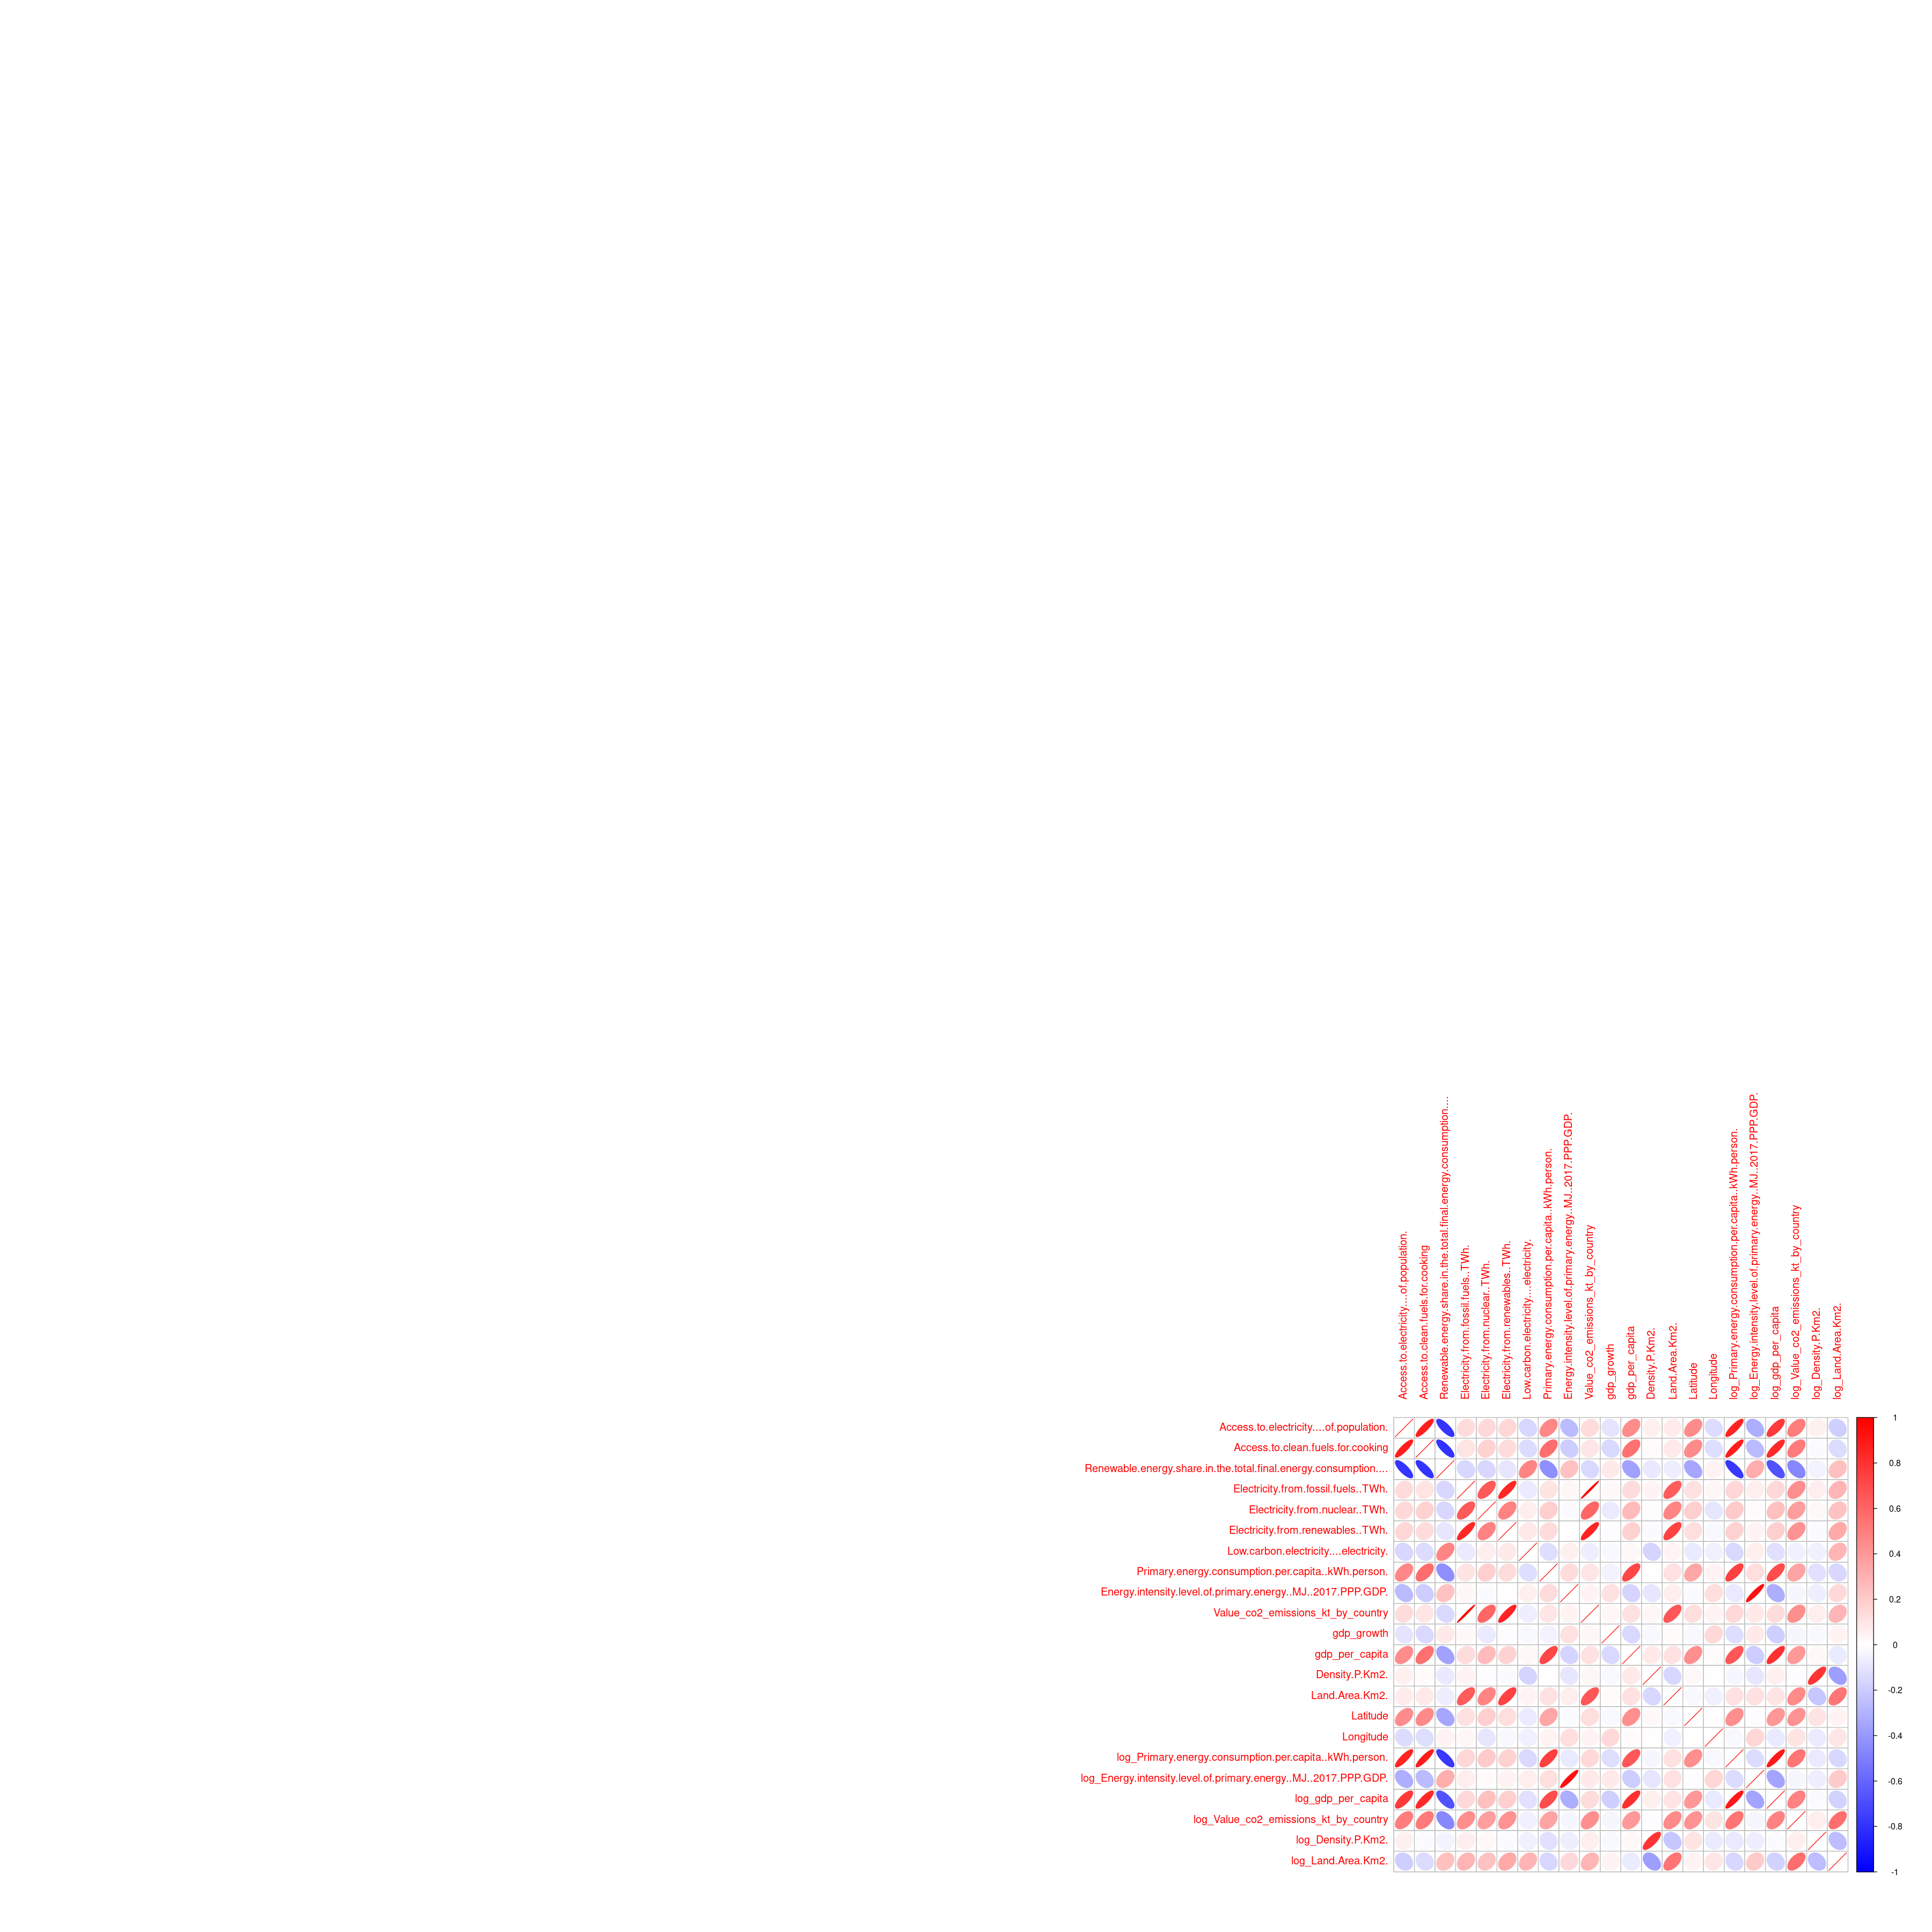

In [75]:
options(repr.plot.width=30, repr.plot.height=30)

coolwarm <- colorRampPalette(c("blue", "white", "red"))(200)
cor_matrix <- cor(select(df, -c(1,2))) 

corrplot(cor_matrix,
        method = "ellipse",
        col = coolwarm,
        tl.cex = 1)

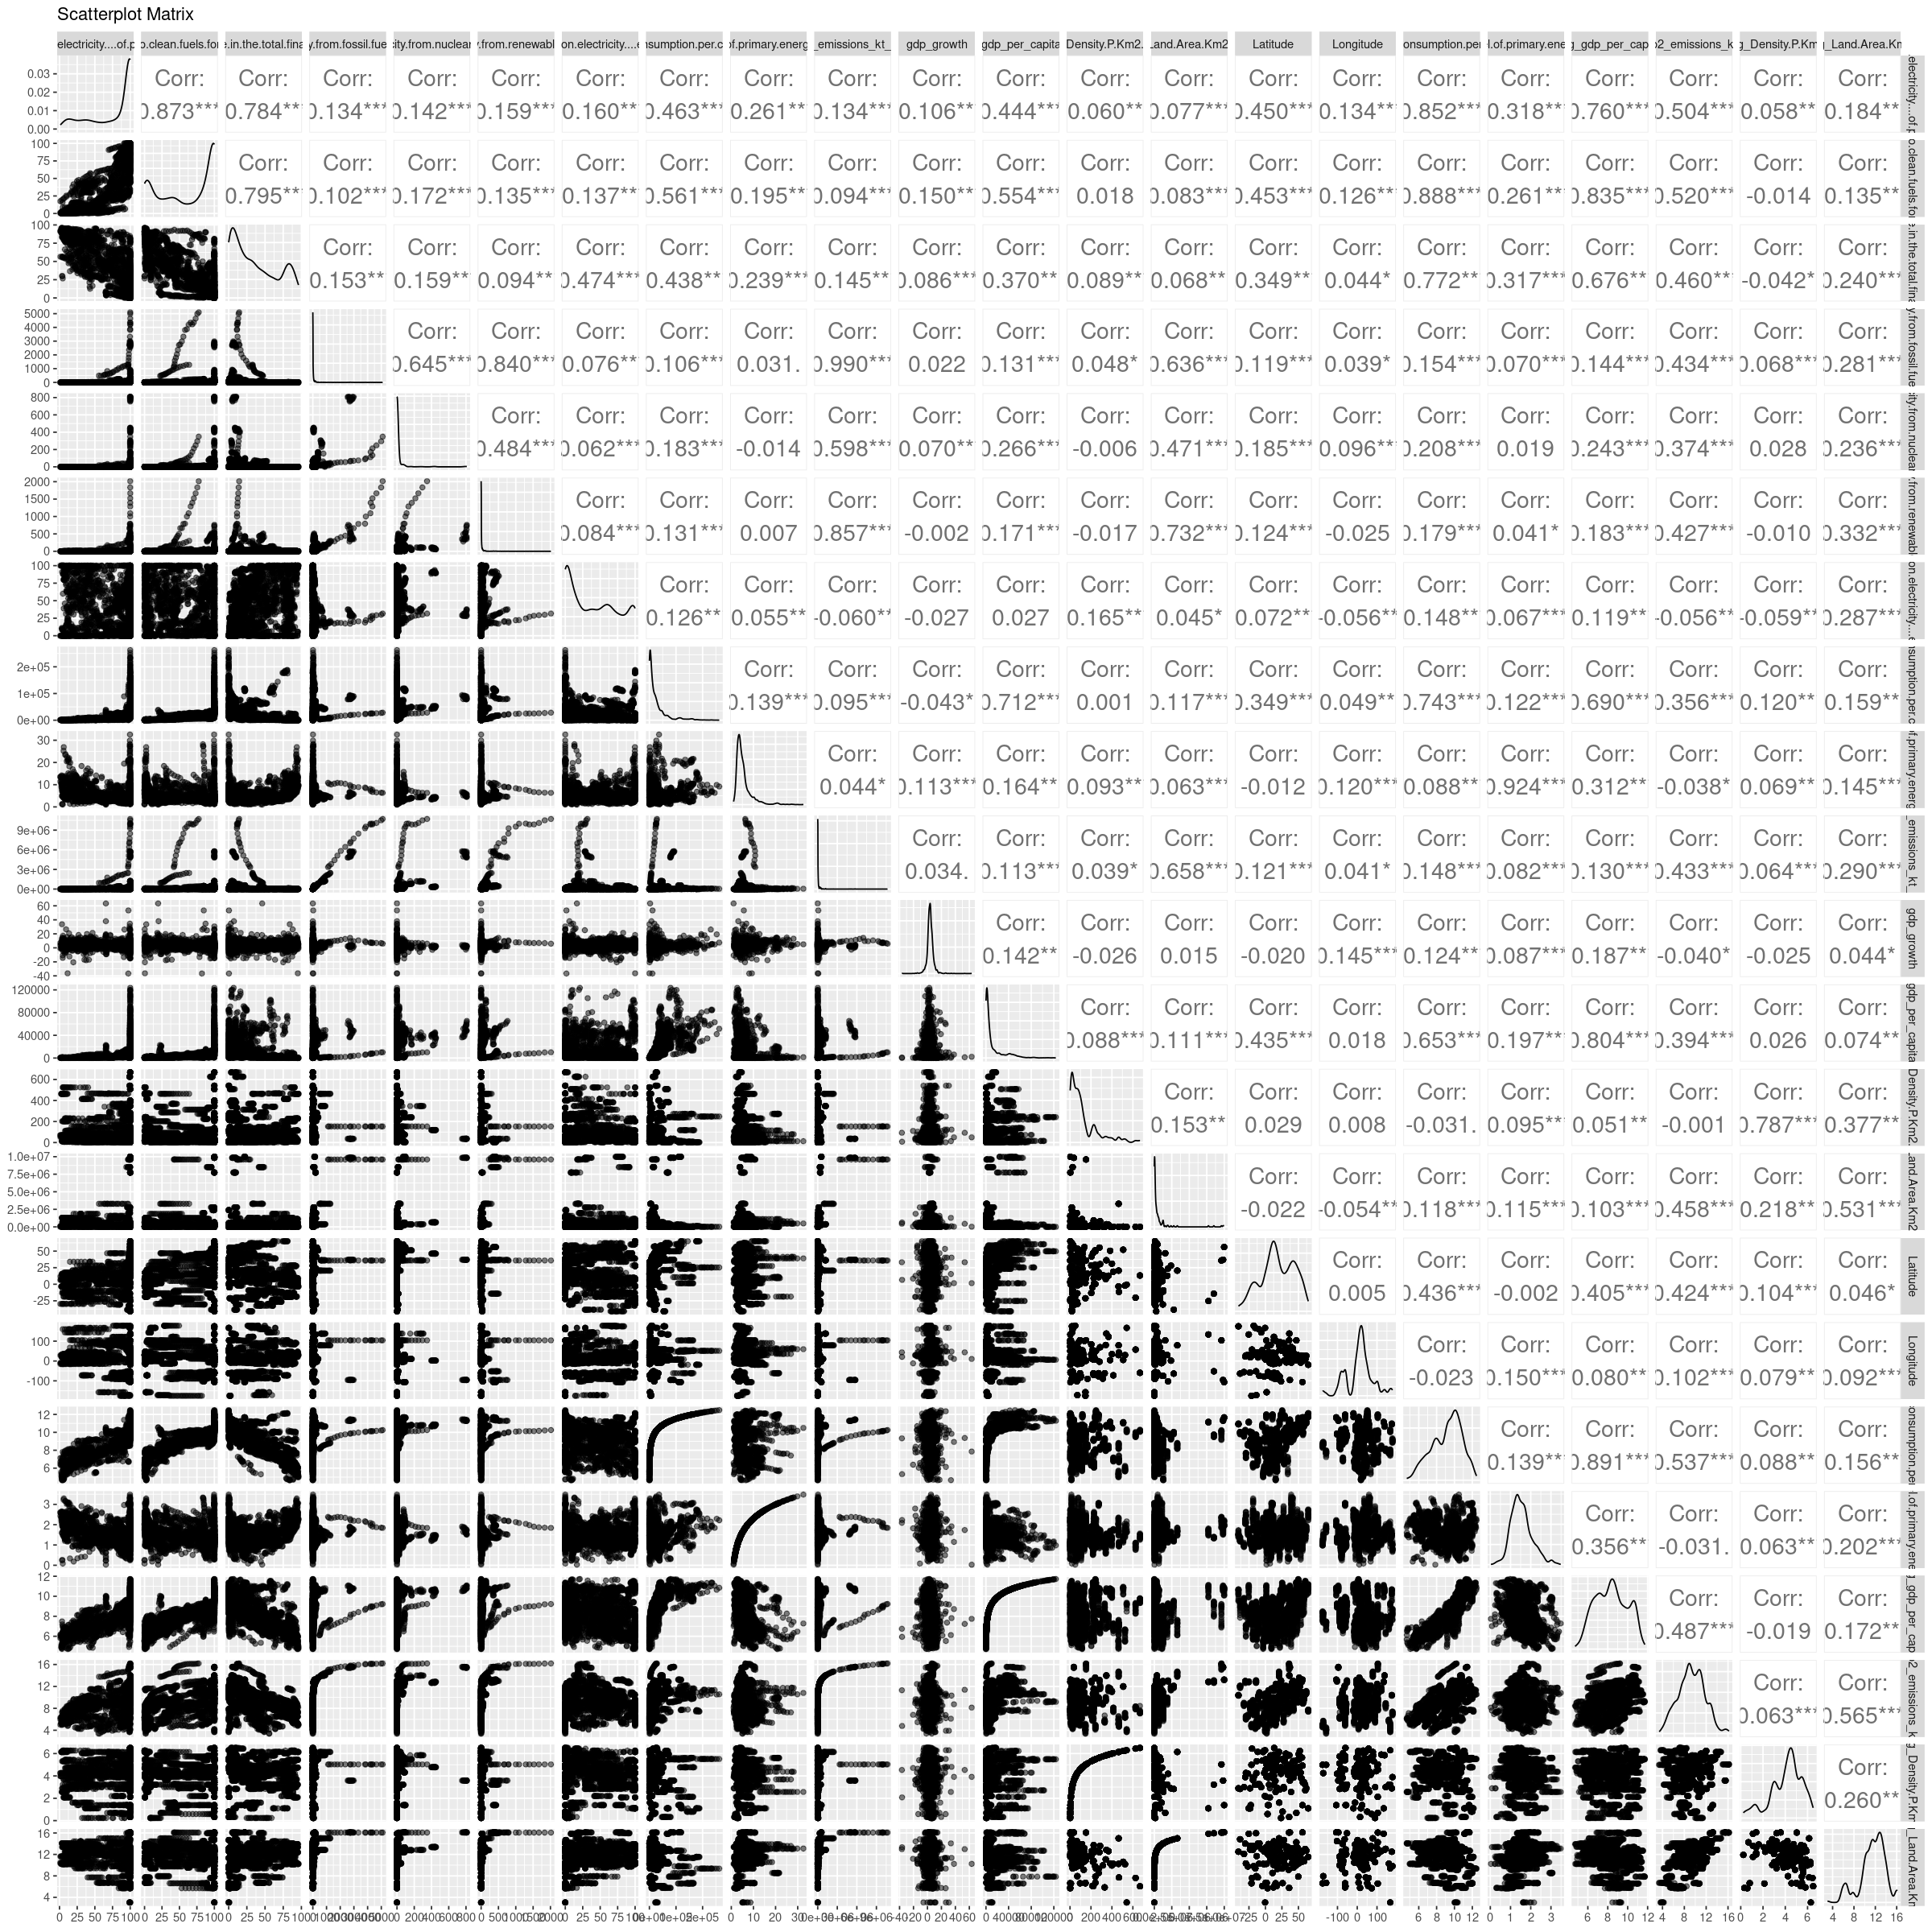

In [78]:
library(GGally)
data <- select(df, -c(1,2))

# Créer le scatterplot matrix
options(repr.plot.width=20, repr.plot.height=20)
ggpairs(data,
        upper = list(continuous = wrap("cor", size = 6)),
        lower = list(continuous = wrap("points", alpha = 0.5)),
        diag = list(continuous = wrap("densityDiag")),
        title = "Scatterplot Matrix")

7. Réalisez une analyse en composantes principales des variables quantitatives et interprétez les résultats

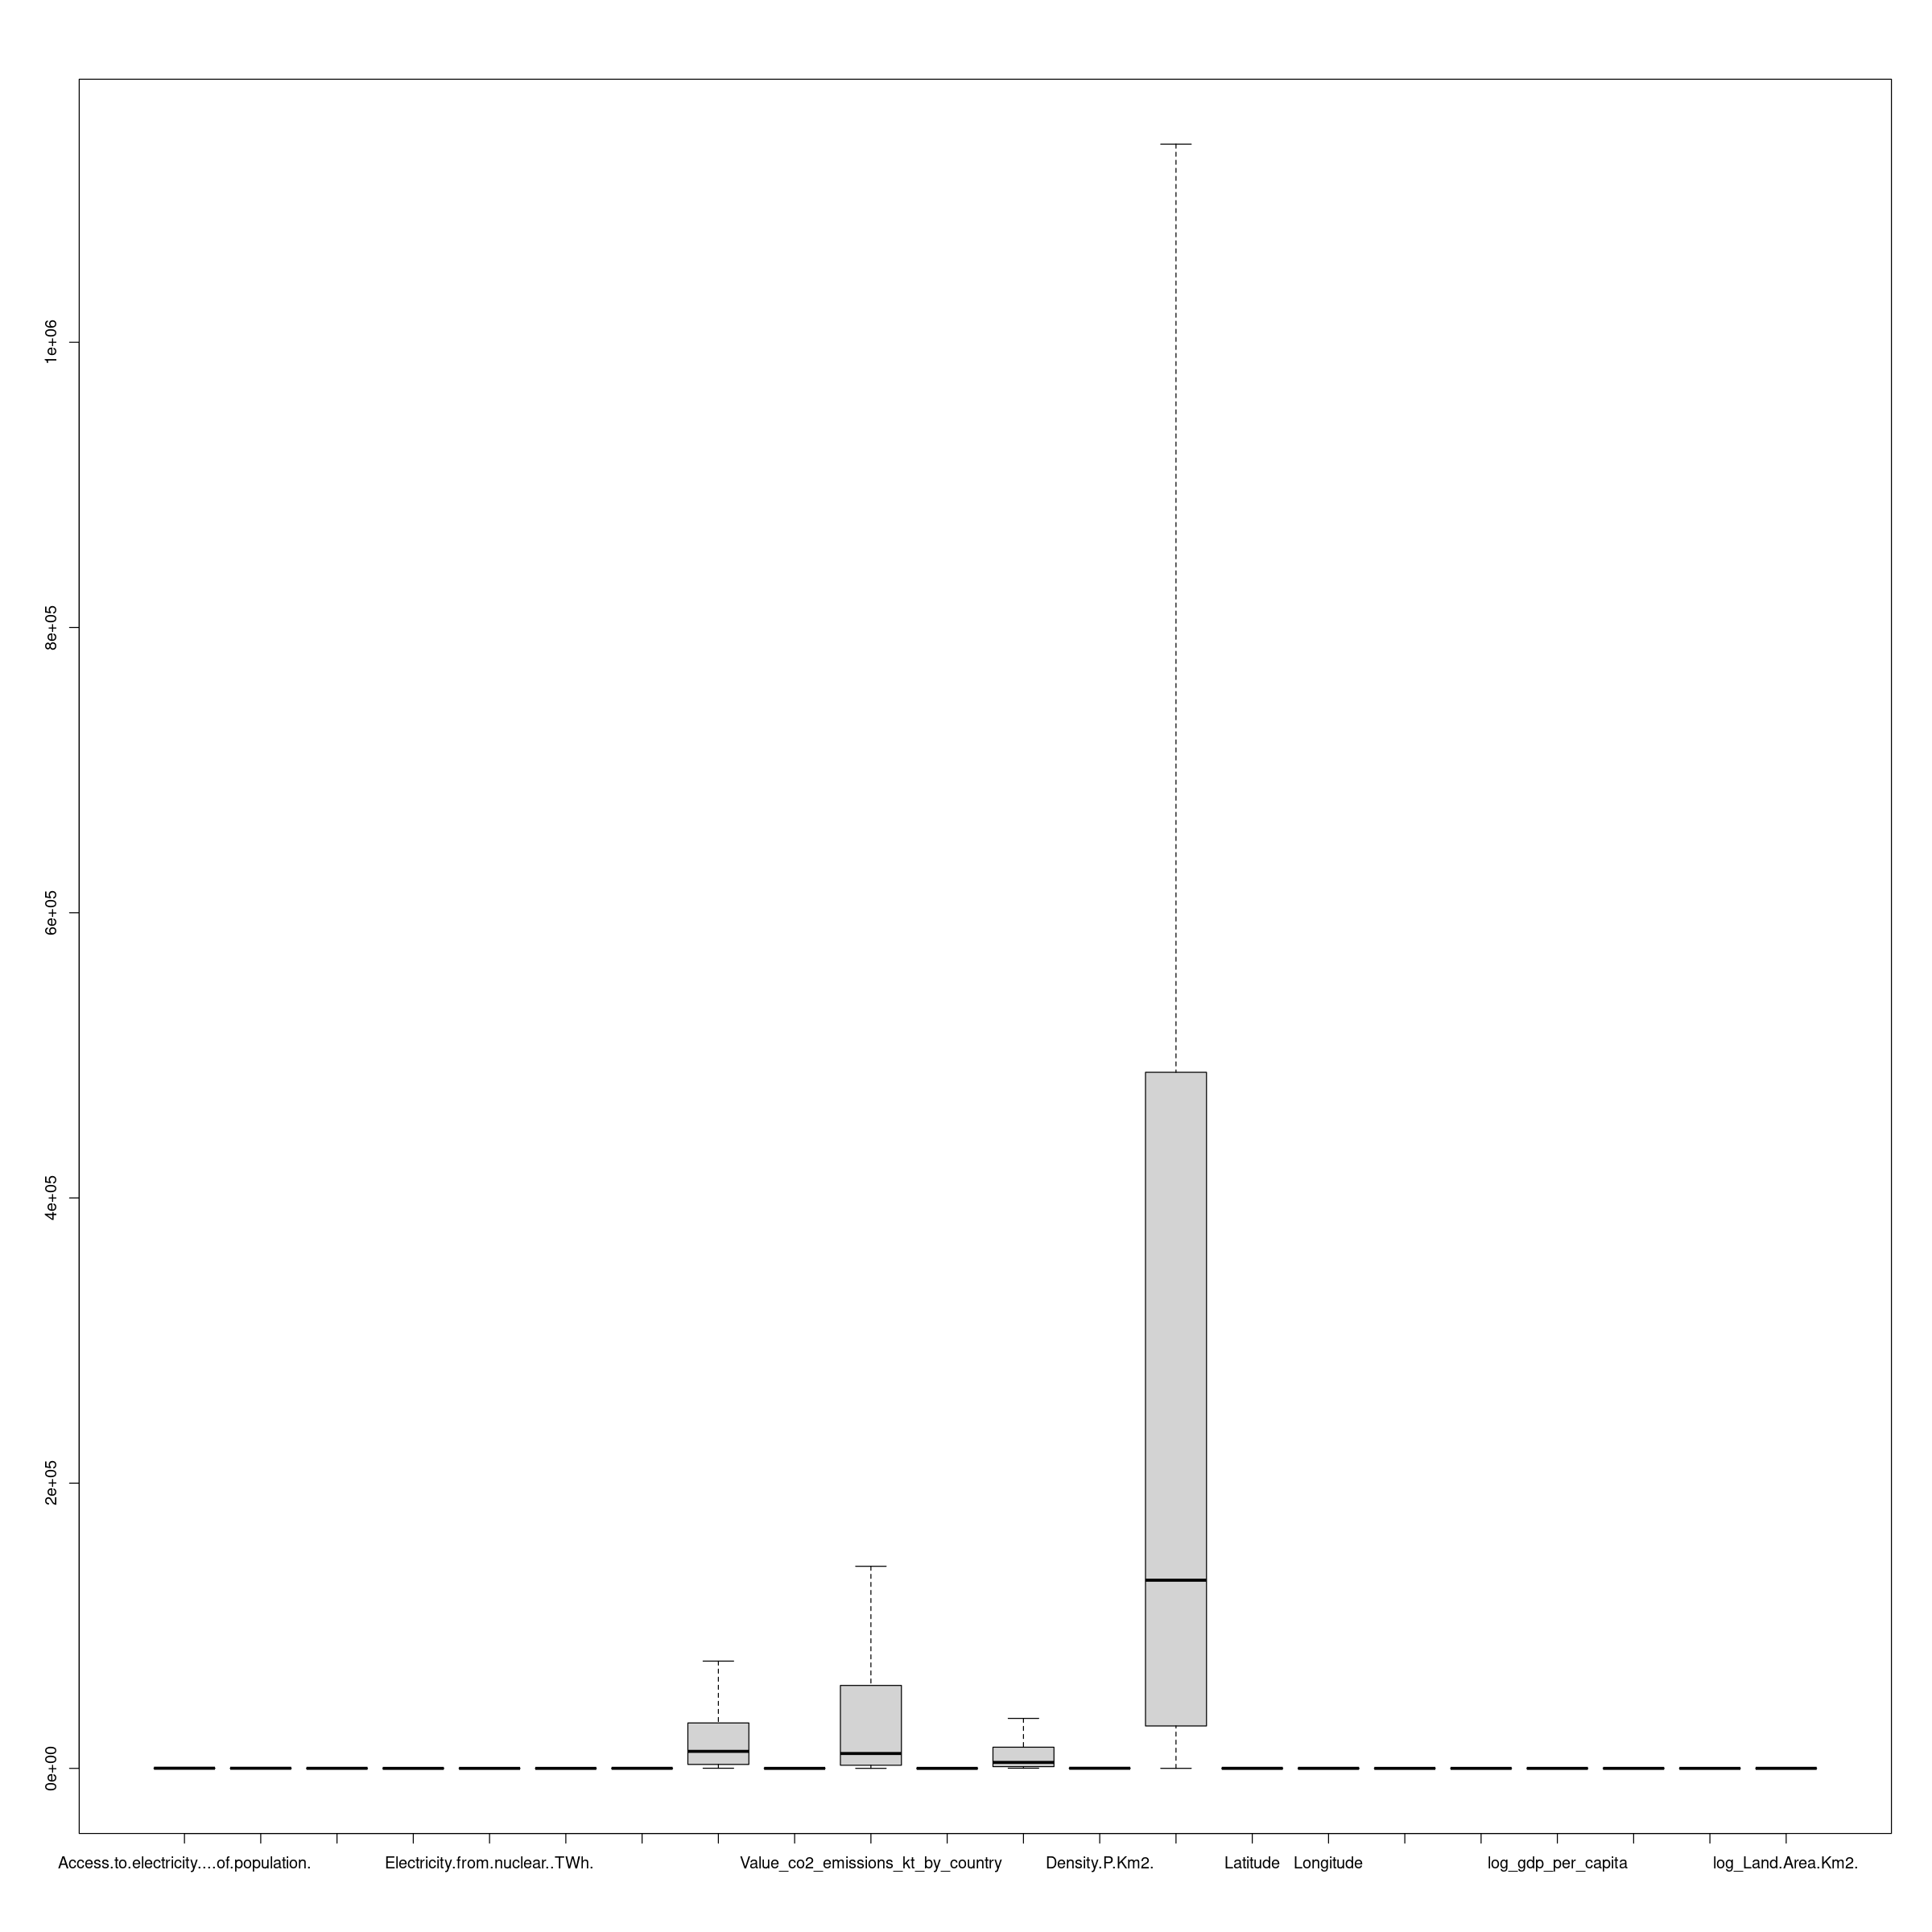

In [77]:
data <- select(df, -c(1,2))
options(repr.plot.width=20, repr.plot.height=20)
boxplot(data, outline=FALSE)

On peut voir que les variables n'ont pas des données de même échelle donc il est nécessaire de normaliser les données avant de continuer la suite

In [17]:
df_norm <- data.frame(scale(select(df, -c(Entity, Year)))) #Standardisation des données

In [18]:
library(FactoMineR)

In [19]:
df_pca <- PCA(df_norm)
print(df_pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 2868 individuals, described by 22 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error

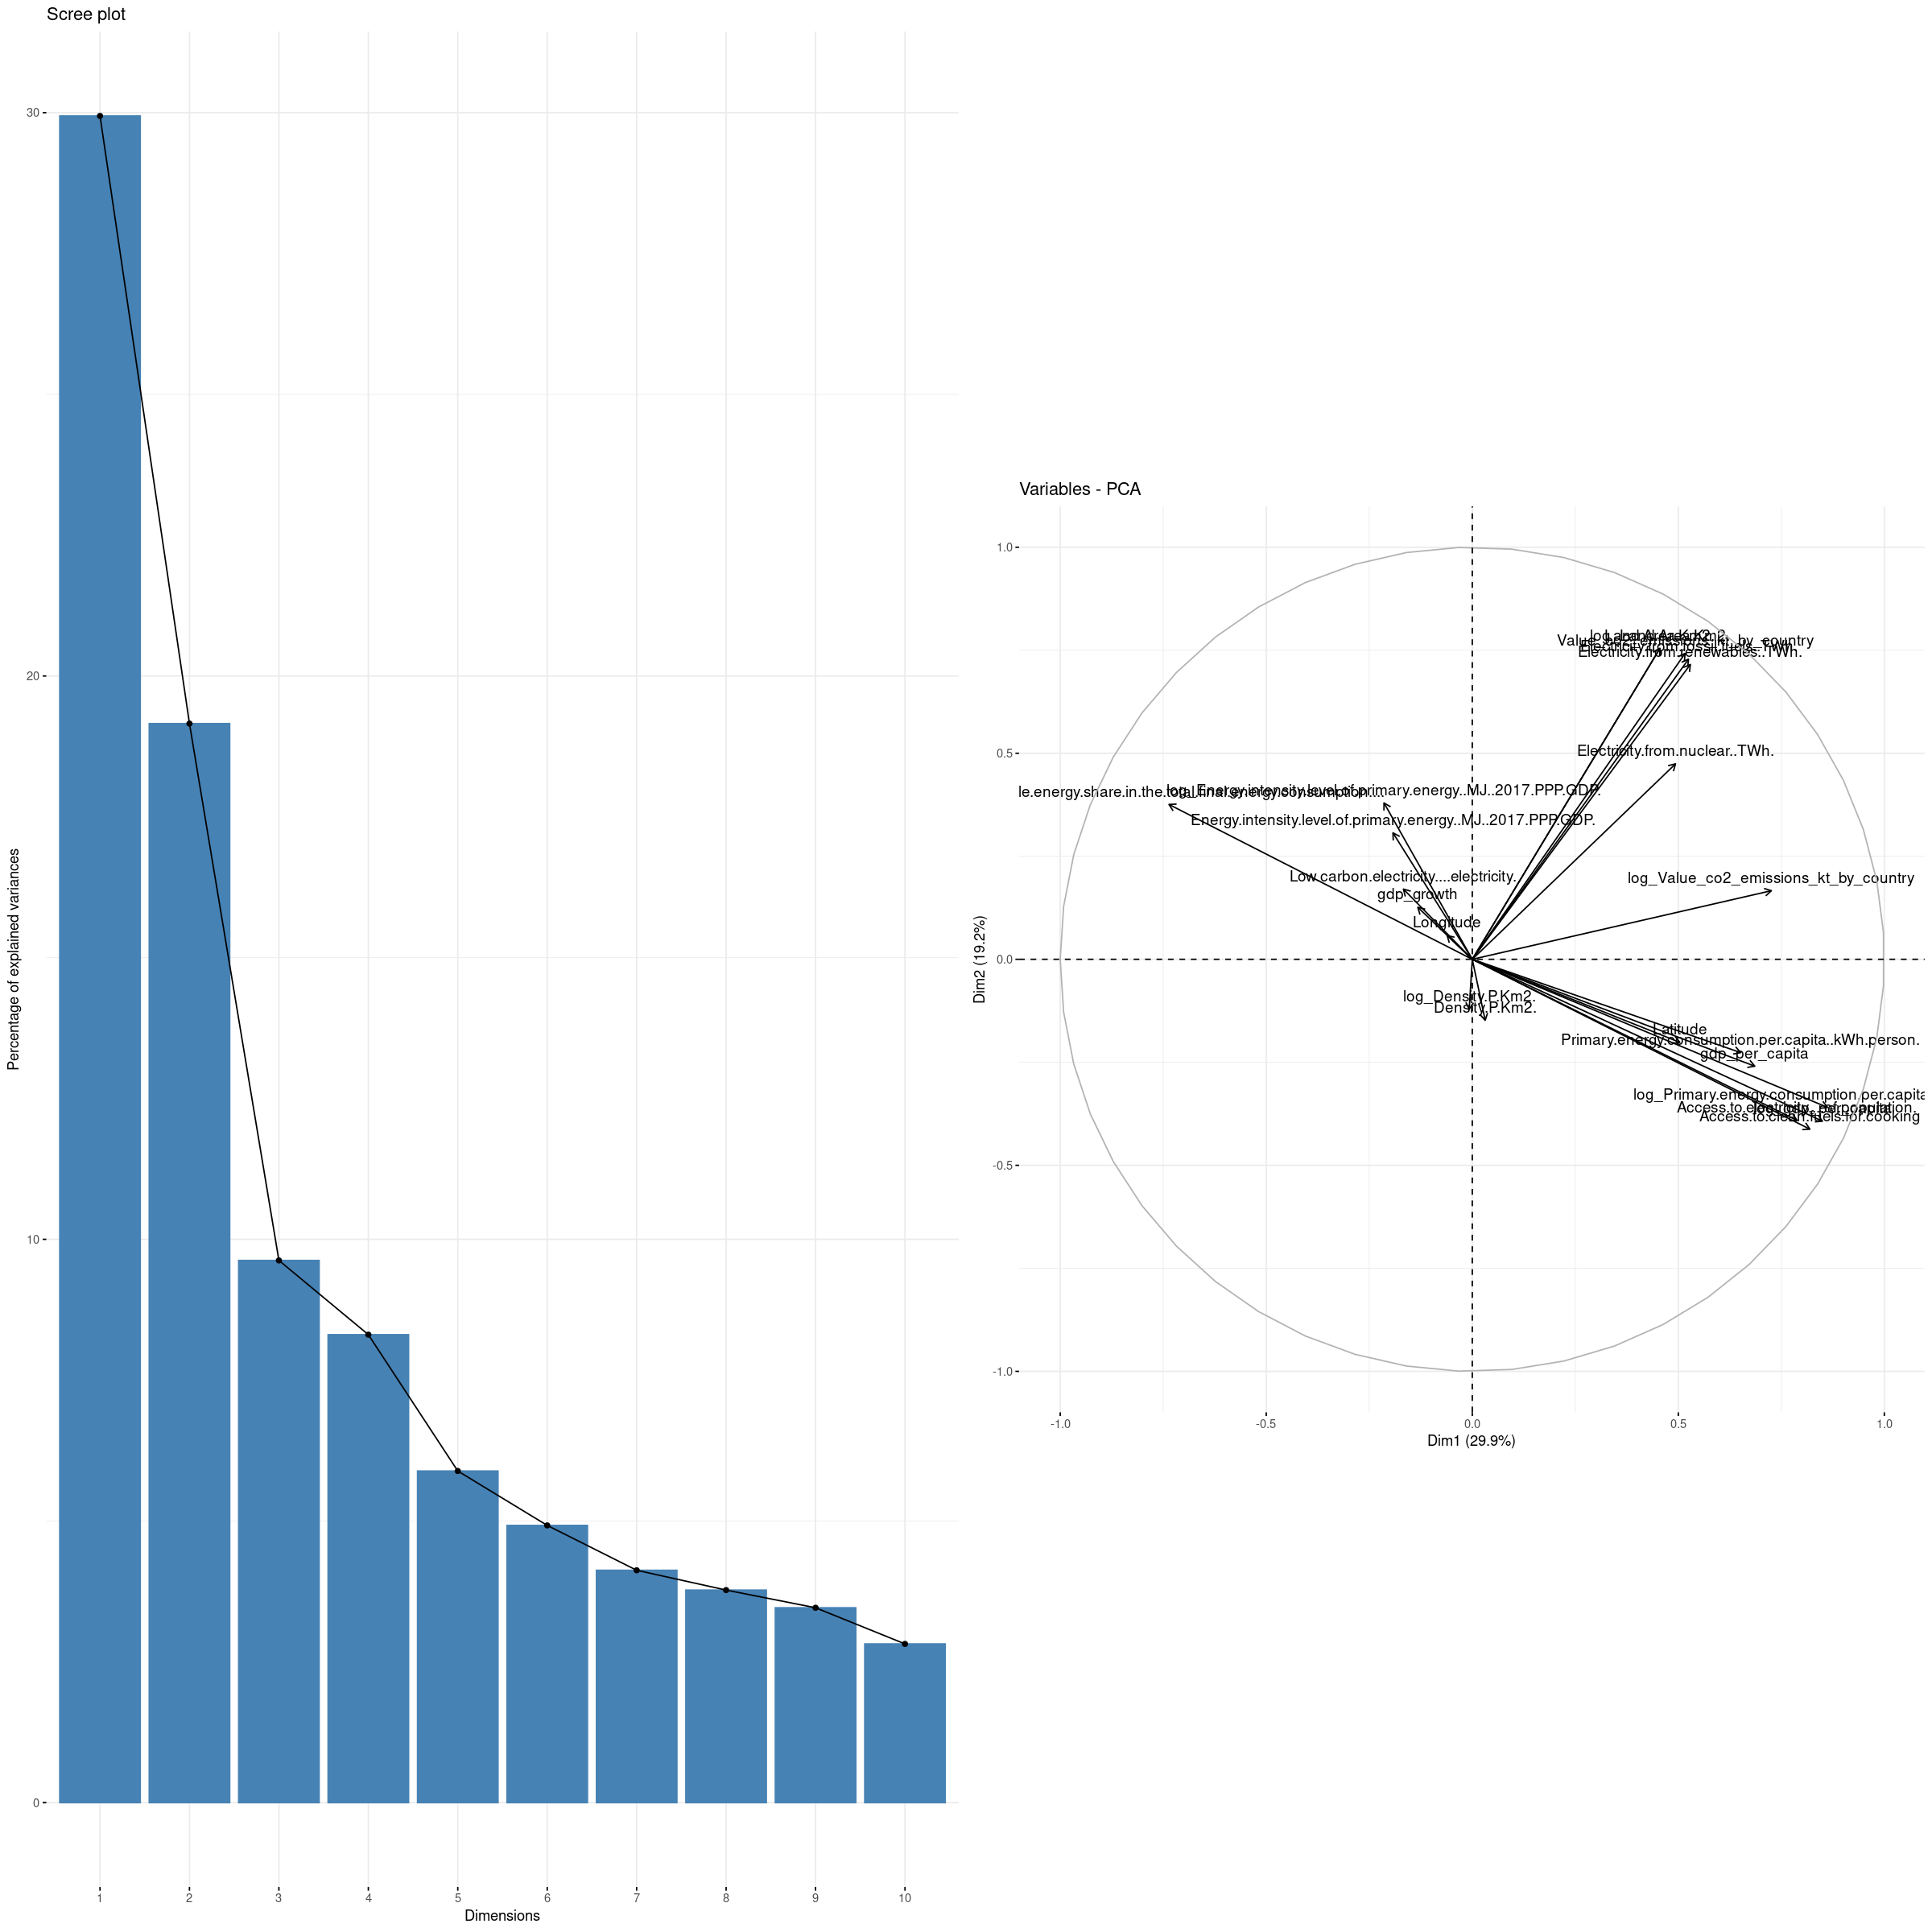

In [80]:
grid.arrange(
    fviz_eig(df_pca), 
    fviz_pca_var(df_pca,axes=c(1,2)),
    ncol=2
)

Comme les noms de variables se superposent, on affiche la matrice des contributions de l'acp, afin de vérifier quelles variables sont corrélées avec la variable à expliquer.

In [98]:
df_pca$var$coord

Dim.1       
Access.to.electricity....of.population.                           0.788291854
Access.to.clean.fuels.for.cooking                                 0.819250450
Renewable.energy.share.in.the.total.final.energy.consumption.... -0.736044752
Electricity.from.fossil.fuels..TWh.                               0.524757456
Electricity.from.nuclear..TWh.                                    0.493256165
Electricity.from.renewables..TWh.                                 0.529221835
Low.carbon.electricity....electricity.                           -0.167142041
Primary.energy.consumption.per.capita..kWh.person.                0.651274236
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.      -0.192471663
Value_co2_emissions_kt_by_country                                 0.516387622
gdp_growth                                                       -0.132149460
gdp_per_capita                                                    0.685593224
Density.P.Km2.                                                    0.031299835
Land.Area.Km2.                                                    0.455243904
Latitude                                                          0.503697026
Longitude                                                        -0.061034145
log_Primary.energy.consumption.per.capita..kWh.person.            0.862063872
log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.  -0.214234018
log_gdp_per_capita                                                0.849737359
log_Value_co2_emissions_kt_by_country                             0.725751673
log_Density.P.Km2.                                               -0.007440126
log_Land.Area.Km2.                                                0.455243904
                                                                 Dim.2      
Access.to.electricity....of.population.                          -0.39105119
Access.to.clean.fuels.for.cooking                                -0.41225650
Renewable.energy.share.in.the.total.final.energy.consumption....  0.37573726
Electricity.from.fossil.fuels..TWh.                               0.72836772
Electricity.from.nuclear..TWh.                                    0.47428843
Electricity.from.renewables..TWh.                                 0.71554010
Low.carbon.electricity....electricity.                            0.17033982
Primary.energy.consumption.per.capita..kWh.person.               -0.22644151
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       0.30684091
Value_co2_emissions_kt_by_country                                 0.74229409
gdp_growth                                                        0.12611260
gdp_per_capita                                                   -0.25941348
Density.P.Km2.                                                   -0.14807078
Land.Area.Km2.                                                    0.75441345
Latitude                                                         -0.20163010
Longitude                                                         0.05780491
log_Primary.energy.consumption.per.capita..kWh.person.           -0.35942232
log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.   0.37944880
log_gdp_per_capita                                               -0.39284964
log_Value_co2_emissions_kt_by_country                             0.16648466
log_Density.P.Km2.                                               -0.12095528
log_Land.Area.Km2.                                                0.75441345
                                                                 Dim.3      
Access.to.electricity....of.population.                          -0.04099006
Access.to.clean.fuels.for.cooking                                 0.07752134
Renewable.energy.share.in.the.total.final.energy.consumption....  0.07777718
Electricity.from.fossil.fuels..TWh.                              -0.21914713
Electricity.from.nuclear..TWh.                                   -0.12240560
Electricity.from.renewables..TWh.     

On remarque que les variables corrélées avec la variable à expliquer dans les dimensions 1 et 2 sont : 
- Land.Area.Km2., la taille du pays, 
- Electricity.from.fossil.fuels..TWh, la consommation du pays en énergies fossiles, 
- Electricity.from.renewables..TWh. qui représente la consommation en énergies renouvelables.

On remarque cependant que certaines variables sont anticorrélées à la variable à expliquer par rapport à la composante 2 de l'acp. On peut notamment citer : 
- Access.to.electricity....of.population. 
- Access.to.clean.fuels.for.cooking
- log_Primary.energy.consumption.per.capita..kWh.person.
- log_gdp_per_capita

In [21]:
df_pca$eig

eigenvalue   percentage of variance cumulative percentage of variance
comp 1  6.587167e+00 2.994167e+01            29.94167                        
comp 2  4.214209e+00 1.915550e+01            49.09716                        
comp 3  2.117548e+00 9.625219e+00            58.72238                        
comp 4  1.827695e+00 8.307704e+00            67.03009                        
comp 5  1.295188e+00 5.887220e+00            72.91731                        
comp 6  1.082749e+00 4.921587e+00            77.83889                        
comp 7  9.075000e-01 4.125000e+00            81.96389                        
comp 8  8.301620e-01 3.773464e+00            85.73736                        
comp 9  7.611251e-01 3.459660e+00            89.19702                        
comp 10 6.199043e-01 2.817747e+00            92.01476                        
comp 11 5.212561e-01 2.369346e+00            94.38411                        
comp 12 3.297487e-01 1.498858e+00            95.88297                        
comp 13 2.018709e-01 9.175948e-01            96.80056                        
comp 14 1.600511e-01 7.275052e-01            97.52807                        
comp 15 1.446321e-01 6.574188e-01            98.18549                        
comp 16 1.235755e-01 5.617067e-01            98.74719                        
comp 17 9.977664e-02 4.535302e-01            99.20072                        
comp 18 7.739736e-02 3.518062e-01            99.55253                        
comp 19 5.855036e-02 2.661380e-01            99.81867                        
comp 20 3.298187e-02 1.499176e-01            99.96858                        
comp 21 6.911465e-03 3.141575e-02           100.00000                        
comp 22 1.404175e-32 6.382614e-32           100.00000

On sélectionne 7 composantes, afin d'expliquer 80% de la variance

In [93]:
nb_components = 7
df_pca <- PCA(df_norm, ncp = nb_components)

In [22]:
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



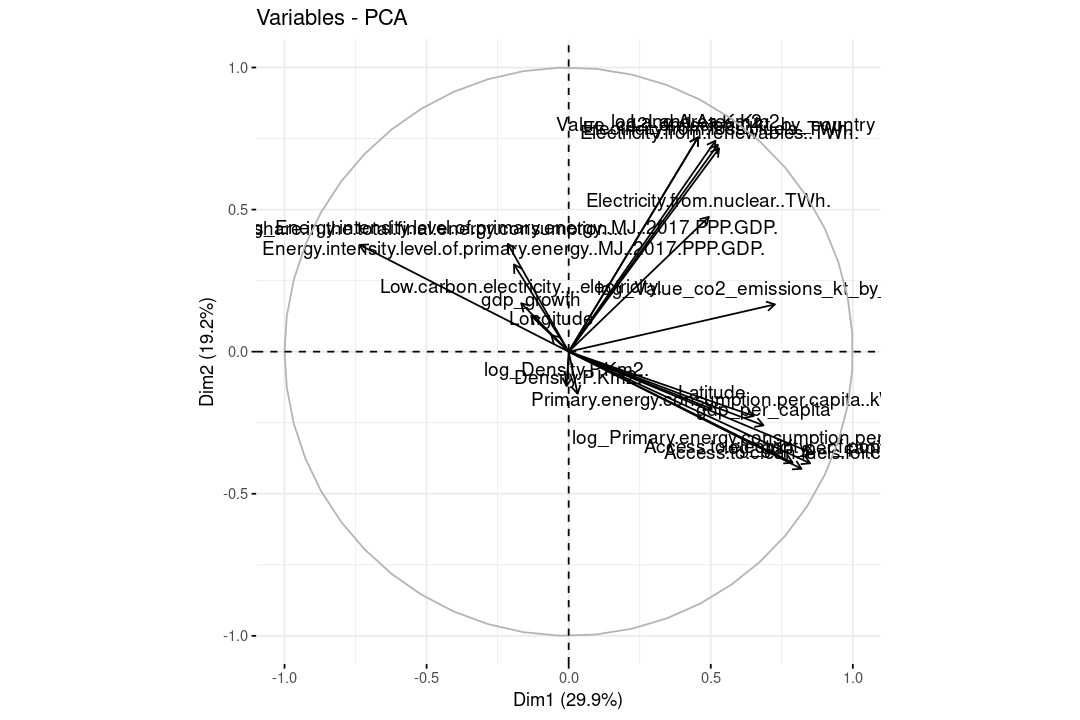

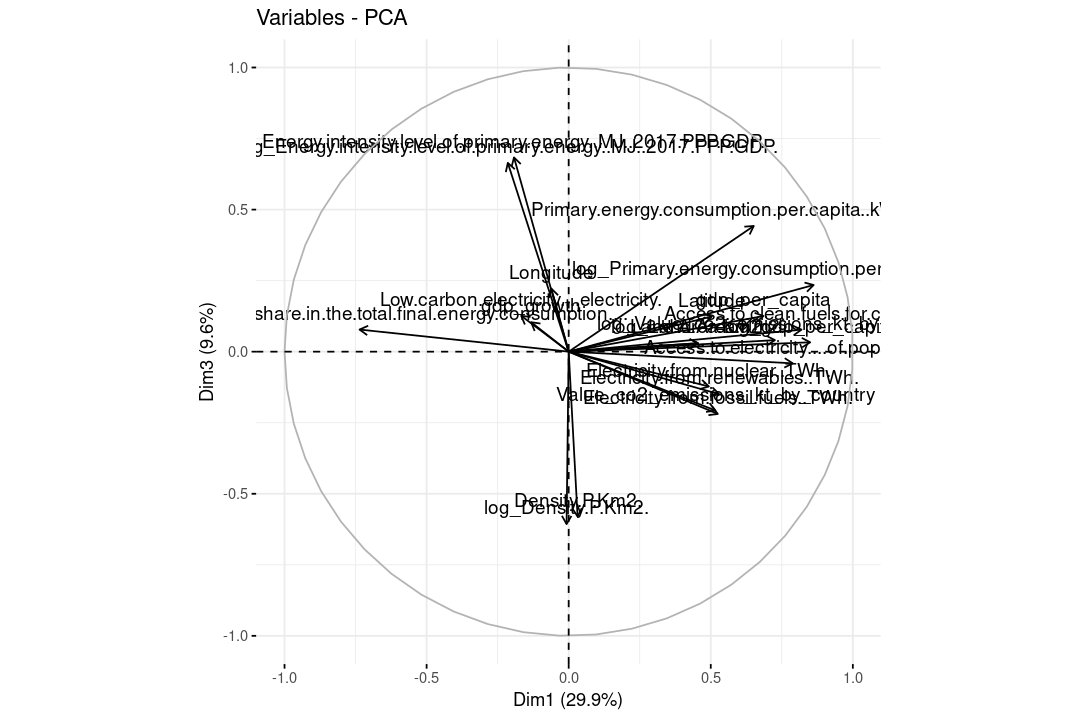

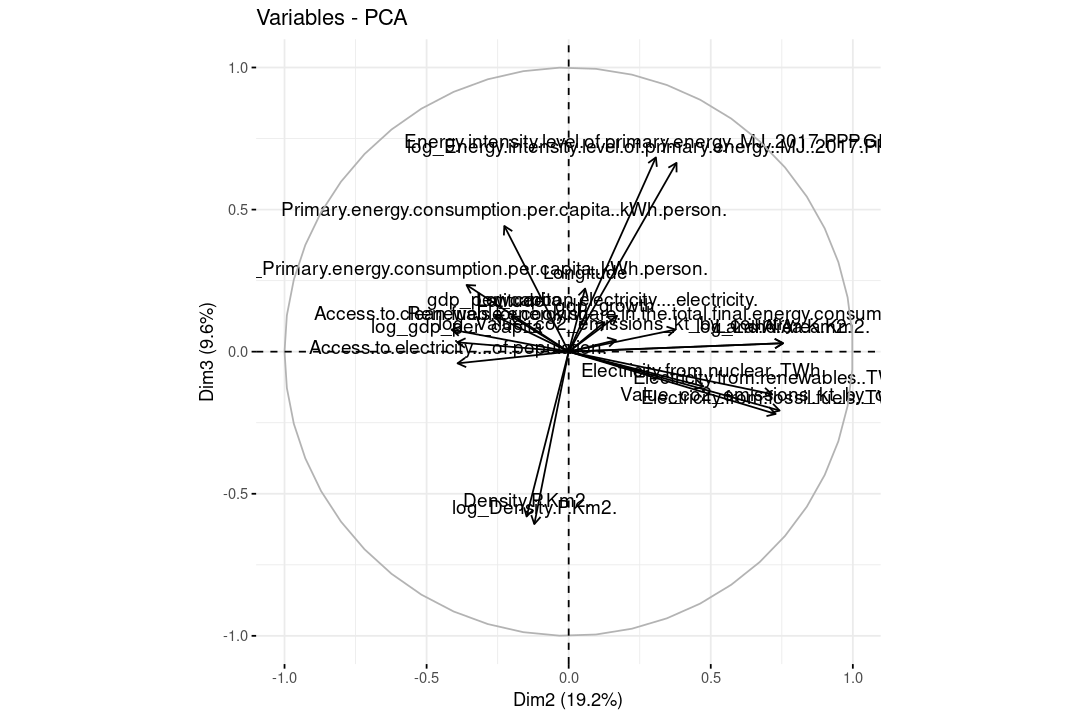

In [94]:
options(repr.plot.width = 9, repr.plot.height = 6)

fviz_pca_var(df_pca)
fviz_pca_var(df_pca, axes=c(1,3))
fviz_pca_var(df_pca, axes=c(2,3))
# à voir

#fviz_pca(df_PCA, axes=c(1,2), geom = c("point"), col.ind="grey")
#fviz_pca(df_PCA, axes=c(1,3), geom = c("point"), col.ind="grey")
#fviz_pca(df_PCA, axes=c(2,3), geom = c("point"), col.ind="grey")

In [24]:
library(viridis)

Le chargement a nécessité le package : viridisLite



8. Montrer la corrélation entre la variable 'Year' et la variable à prédire

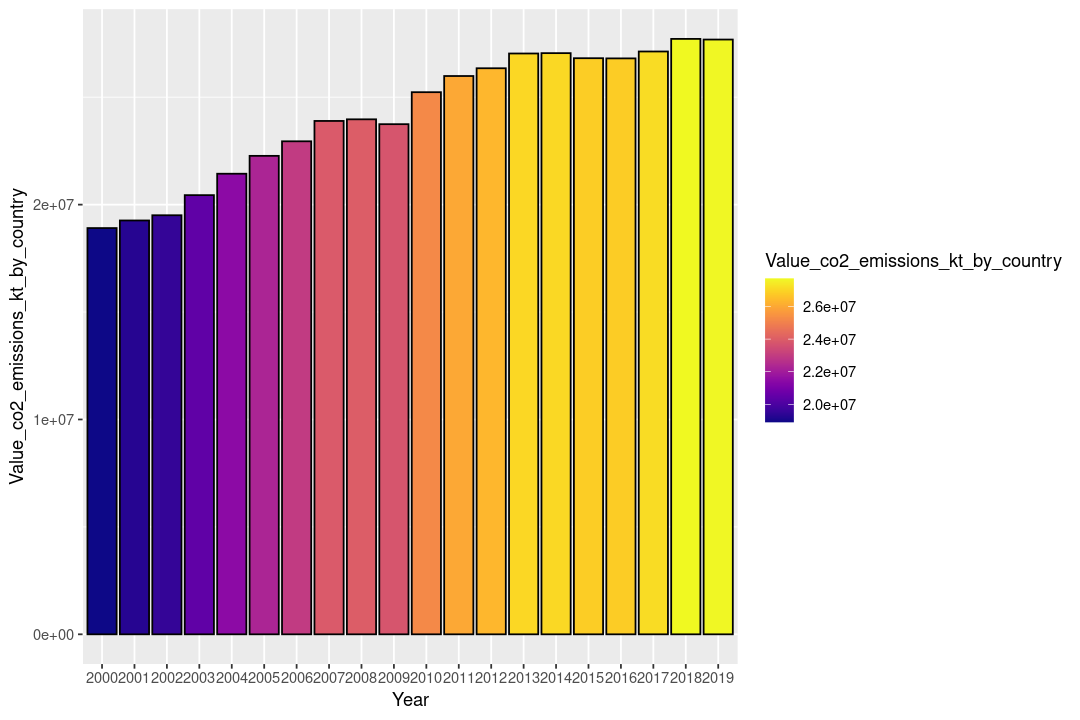

In [25]:
df_somme_annee <- select(df, c(Year, Value_co2_emissions_kt_by_country))
df_somme_annee <- df_somme_annee %>%
    group_by(Year) %>% 
    summarise(Value_co2_emissions_kt_by_country = sum(Value_co2_emissions_kt_by_country))

ggplot(df_somme_annee, aes(x = Year, y = Value_co2_emissions_kt_by_country, fill = Value_co2_emissions_kt_by_country))+
    geom_bar(stat = "identity", color = "black")+
    scale_fill_viridis(option="plasma")

# Modélisation

1. Divisez le jeu de données sans données manquantes en un échantillon d’apprentissage et un échantillon
test. Vous prendrez un pourcentage de 20% pour l’échantillon test. Pourquoi cette étape est-elle nécessaire
lorsque nous nous concentrons sur les performances des algorithmes ?

In [26]:
#df_norm <- data.frame(df_norm)

set.seed(579) # initialisation du générateur

# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test

npop <- nrow(df) # nombre de lignes dans les données
nvar <- ncol(df) # nombre de colonnes

# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio)

# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi)

#On fait un jeu de donnée où Value_co2 est simple
# construction de l'échantillon d'apprentissage
train <- df[appri, -c(5,22)]
# construction de l'échantillon test
test <- df[testi, -c(5,22)]

#On fait un jeu de donnée où Value_co2 est avec log
# construction de l'échantillon d'apprentissage
train_log <- df[appri, -c(5,12)]
# construction de l'échantillon test
test_log <- df[testi, -c(5,12)]
# en R, à la différence de python, on ne différencie pas x_train et y_train

# vérification du contenu des échantillons
str(train)
str(test)


'data.frame':	2294 obs. of  22 variables:
 $ Entity                                                         : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                           : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 9 10 11 13 14 15 ...
 $ Access.to.electricity....of.population.                        : num  14.7 20.1 25.4 30.7 42.4 ...
 $ Access.to.clean.fuels.for.cooking                              : num  9.5 10.9 12.2 13.8 16.7 ...
 $ Electricity.from.fossil.fuels..TWh.                            : num  0.31 0.33 0.34 0.2 0.19 0.16 0.19 0.14 0.22 0.16 ...
 $ Electricity.from.nuclear..TWh.                                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                              : num  0.63 0.56 0.59 0.64 0.54 0.78 0.75 0.74 0.89 1 ...
 $ Low.carbon.electricity....electricity.                         : num  67 62.9 63.4 76.2 74 ...
 $ Primary.energy.consumption.per.capita..kW

2. Comparez les performances d’un modèle de régression linéaire avec/sans sélection de variables, avec/sans pénalisation, d’un SVM, d’un arbre optimal, d’une forêt aléatoire, du boosting, et de réseaux de neurones. Justifiez vos choix (par exemple le noyau pour le SVM), et ajustez soigneusement les paramètres (par validation croisée). Interprétez les résultats et quantifiez l’amélioration éventuelle apportée par les modèles non linéaires.

## Modèles de régression linéaire 

### Modèle de régression linéaire sans pénalisation

Pour un modèle de régression linéaire, seules les variables quantitatives interviennent. C'est pour cela que nous décidons de retirer les colonnes 'Entity' et 'Year' du jeu de données.

In [27]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

In [136]:
# construction de l'échantillon d'apprentissage
train <- df[appri, -c(1,2,6,22)]
# construction de l'échantillon test
test <- df[testi, -c(1,2,6,22)]

# construction de l'échantillon d'apprentissage avec la variable à expliquer transformée
train_log <- df[appri, -c(1,2,6,12)]
# construction de l'échantillon test
test_log <- df[testi, -c(1,2,6,12)]

Conformément à la consigne, nous enlevons la variable Electricity.from.fossil.fuels..TWh., car cette dernière est trop fortement corrélée avec la variable à expliquer (variable 6).

On créé un modèle de régression linéaire afin de prédire, dans un premier temps, 'Value_co2_emissions_kt_by_country'.

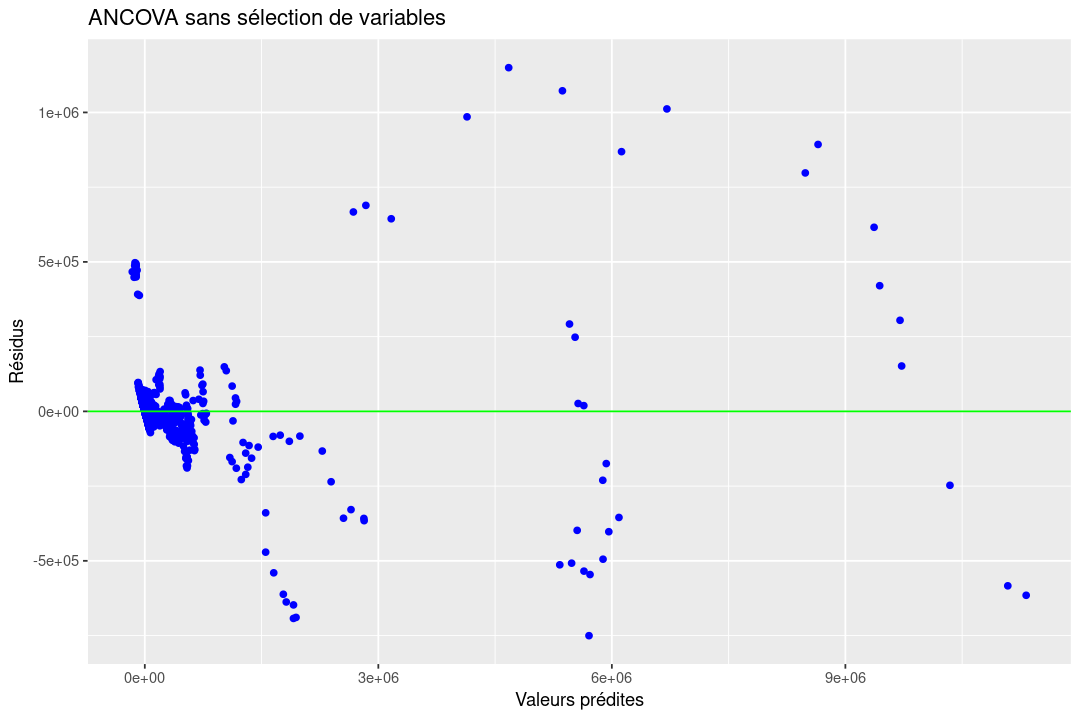

In [127]:
# estimation du modèle sans interaction
reg <- aov(Value_co2_emissions_kt_by_country ~ . , data = train)

# Extraction des résidus et des valeurs ajustées de ce modèle
res <- reg$residuals
fit<- reg$fitted.values

#graphe des résidus

gplot.res(fit,res,"ANCOVA sans sélection de variables")

In [30]:
#summary(reg)

In [31]:
coef(reg)

(Intercept) 
                                                  -2.045338e+05 
                        Access.to.electricity....of.population. 
                                                   1.227341e+02 
                              Access.to.clean.fuels.for.cooking 
                                                  -5.790829e+02 
                            Electricity.from.fossil.fuels..TWh. 
                                                   2.114166e+03 
                                 Electricity.from.nuclear..TWh. 
                                                  -6.709654e+02 
                              Electricity.from.renewables..TWh. 
                                                   2.501067e+02 
                         Low.carbon.electricity....electricity. 
                                                   3.816980e+02 
             Primary.energy.consumption.per.capita..kWh.person. 
                                                  -5.777354e-02 
    Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                   3.573087e+03 
                                                     gdp_growth 
                                                   9.574442e+02 
                                                 gdp_per_capita 
                                                  -1.189022e+00 
                                                 Density.P.Km2. 
                                                  -7.737690e+01 
                                                 Land.Area.Km2. 
                                                   2.546583e-02 
                                                       Latitude 
                                                   6.879501e+02 
                                                      Longitude 
                                                   4.869972e+00 
         log_Primary.energy.consumption.per.capita..kWh.person. 
                                                   1.137509e+04 
log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                  -1.522306e+04 
                                             log_gdp_per_capita 
                                                   7.765855e+03 
                                             log_Density.P.Km2. 
                                                   1.328108e+04

De la même manière, on créé un modèle pour prédire la transformée logarithmique de 'Value_co2_emissions_kt_by_country'.

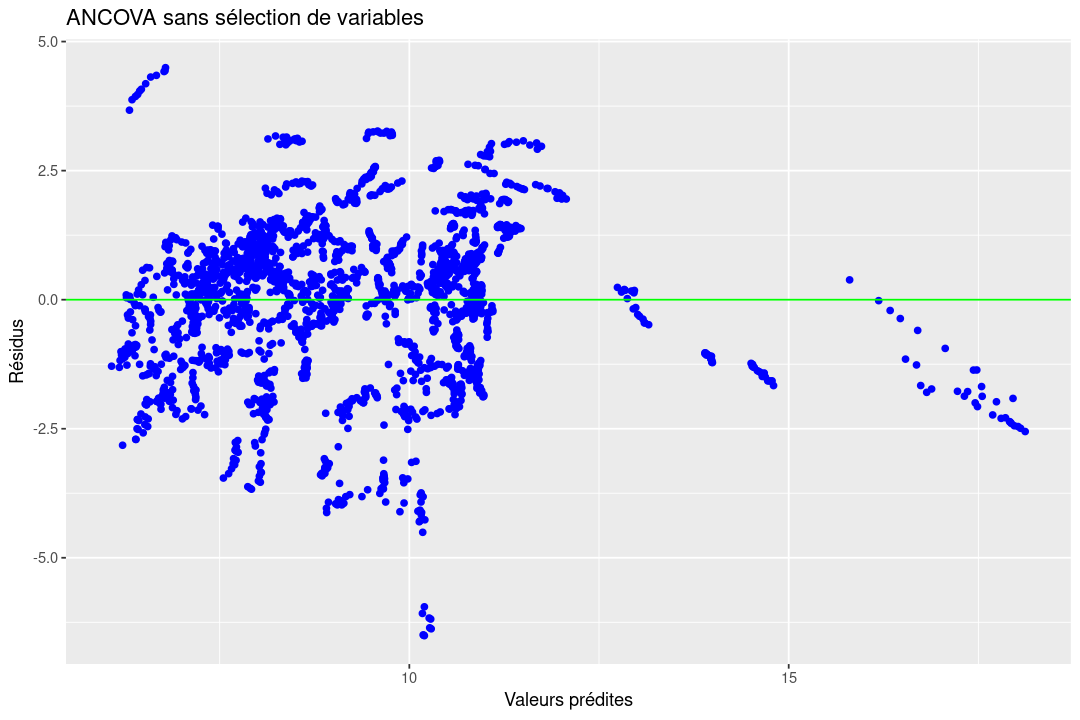

In [107]:
# estimation du modèle sans interaction
reg.log <- aov(log_Value_co2_emissions_kt_by_country ~ . , data = train_log)

# Extraction des résidus et des valeurs ajustées de ce modèle
res2 <- reg.log$residuals
fit2 <- reg.log$fitted.values

# Graphe des résidus. 
gplot.res(fit2,res2,"ANCOVA sans sélection de variables")


On peut voir que le graphe des résidus est plus interprétable en utilisant la variable à prédire transformée donc pour la suite on utilisera toujours cette même variable 

### Modèle linaire avec pénalisation LASSO 

In [33]:
library(glmnet)

Le chargement a nécessité le package : Matrix


Attachement du package : ‘Matrix’


Les objets suivants sont masqués depuis ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



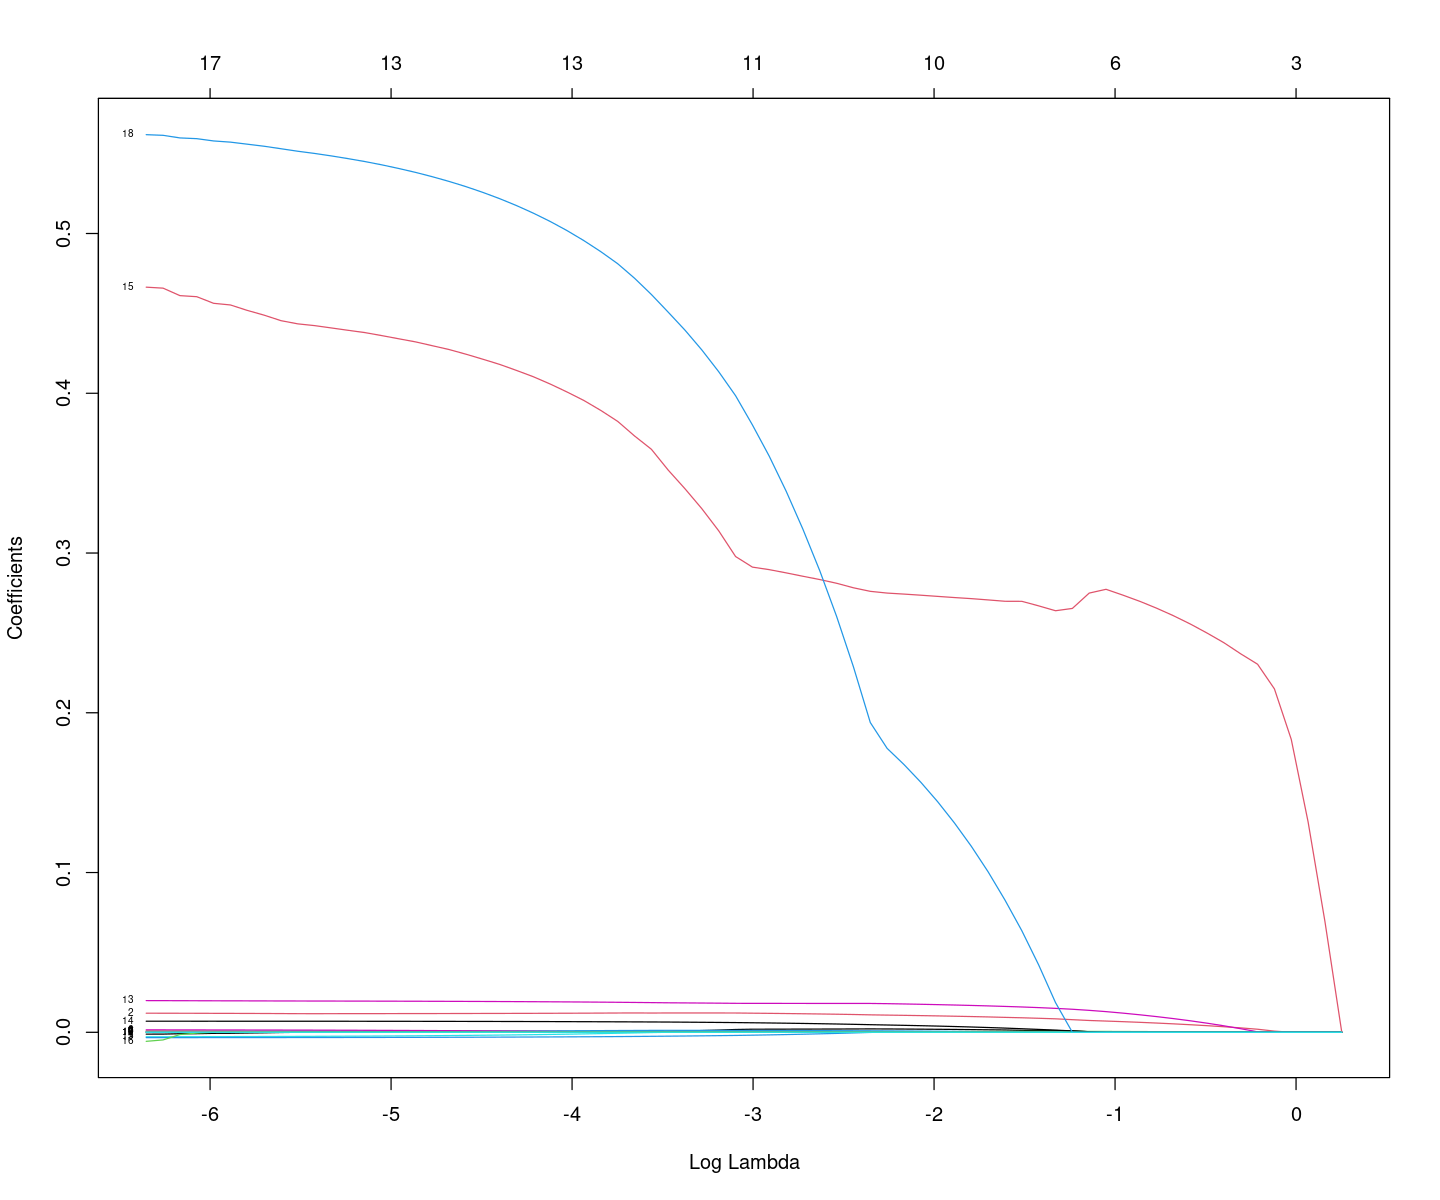

In [56]:
train_log.mat <- model.matrix(log_Value_co2_emissions_kt_by_country ~ . - 1, data = train_log) #on retire l'intercept du modèle 

# avec des variables quantitatives seulement
regLasso <- glmnet(y = train_log$log_Value_co2_emissions_kt_by_country ,
                           x = train_log.mat )

options(repr.plot.width = 12, repr.plot.height = 10)
plot(regLasso, xvar = "lambda", label = TRUE)
#legend("topright", legend = paste(1:ncol(df.mat), " - ", colnames(df.mat)))


Les chemins de régularisation permettent de comprendre comment les coefficients évoluent en fonction du paramètre de régularisation (lambda). Si les coefficients sont gardés non nul pour une valeur de lambda élévée alors c'est qu'ils sont importants. Ici 2 coefficients semblent sortir du lot.

Nous allons choisir le lambda optimal par validation croisée

[1] 2.356719 2.408978

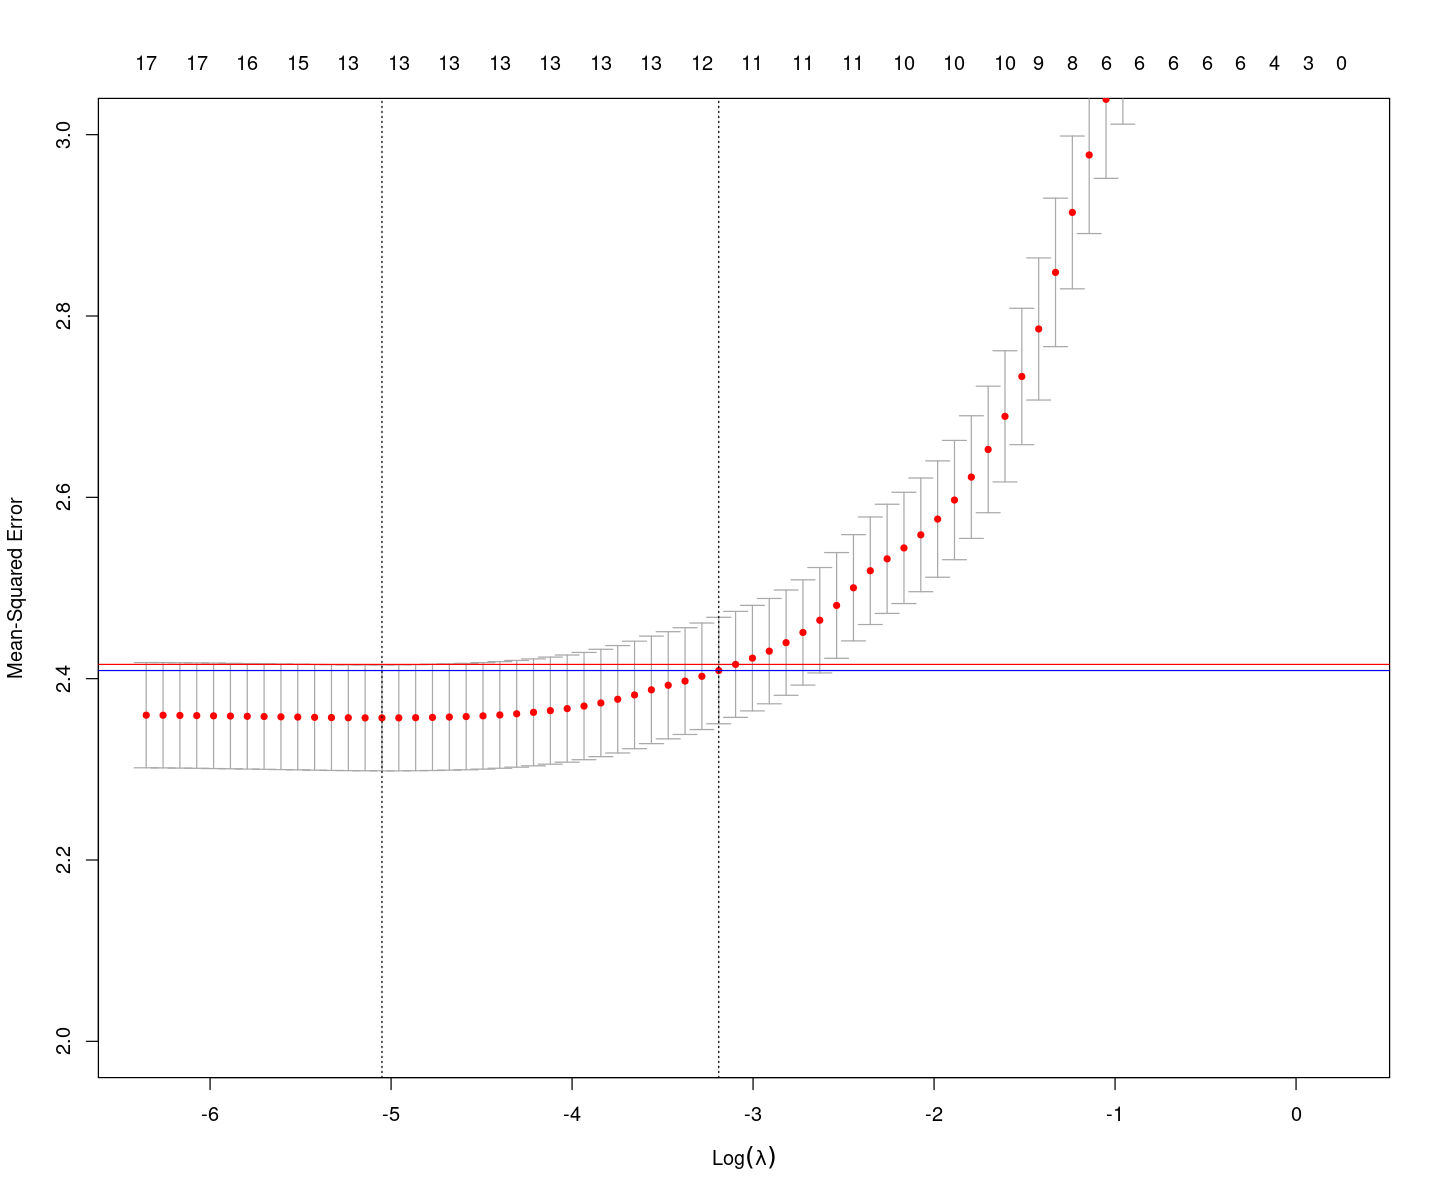

In [57]:
regLassOpt <- cv.glmnet(y = train_log$log_Value_co2_emissions_kt_by_country , x = train_log.mat)
regLassOpt$cvm[c(regLassOpt$index)]

plot(regLassOpt, ylim=c(2,3))
abline(h=regLassOpt$cvm[c(regLassOpt$index)[2]-1], col='red');
abline(h=regLassOpt$cvm[c(regLassOpt$index)[2]], col='blue');


In [58]:
# valeur estimée
paste("1er lambda sélectionné pour modèle optimal:", round(regLassOpt$lambda.1se, 5))
# modèle correspondant
coef(regLassOpt, s = "lambda.1se")

[1] "1er lambda sélectionné pour modèle optimal: 0.04119"

20 x 1 sparse Matrix of class "dgCMatrix"
                                                                           s1
(Intercept)                                                      3.344153e+00
Access.to.electricity....of.population.                          1.374499e-03
Access.to.clean.fuels.for.cooking                                1.207823e-02
Electricity.from.fossil.fuels..TWh.                              2.537054e-04
Electricity.from.nuclear..TWh.                                   1.172918e-03
Electricity.from.renewables..TWh.                                .           
Low.carbon.electricity....electricity.                           .           
Primary.energy.consumption.per.capita..kWh.person.              -6.509654e-07
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.      .           
gdp_growth                                                       .           
gdp_per_capita                                                   .           
Density.P.Km2.        

In [59]:
# valeur estimée
paste("2ème lambda sélectionné pour modèle optimal:", round(regLassOpt$lambda.min, 3))
# modèle correspondant
coef(regLassOpt, s = "lambda.min")

[1] "2ème lambda sélectionné pour modèle optimal: 0.006"

20 x 1 sparse Matrix of class "dgCMatrix"
                                                                           s1
(Intercept)                                                      1.953830e+00
Access.to.electricity....of.population.                          .           
Access.to.clean.fuels.for.cooking                                1.168647e-02
Electricity.from.fossil.fuels..TWh.                              6.904444e-04
Electricity.from.nuclear..TWh.                                   6.718283e-04
Electricity.from.renewables..TWh.                               -2.329805e-03
Low.carbon.electricity....electricity.                           1.210611e-03
Primary.energy.consumption.per.capita..kWh.person.              -4.281698e-06
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.      .           
gdp_growth                                                       .           
gdp_per_capita                                                   .           
Density.P.Km2.        

Affichage des résidus en fonction des valeurs prédites

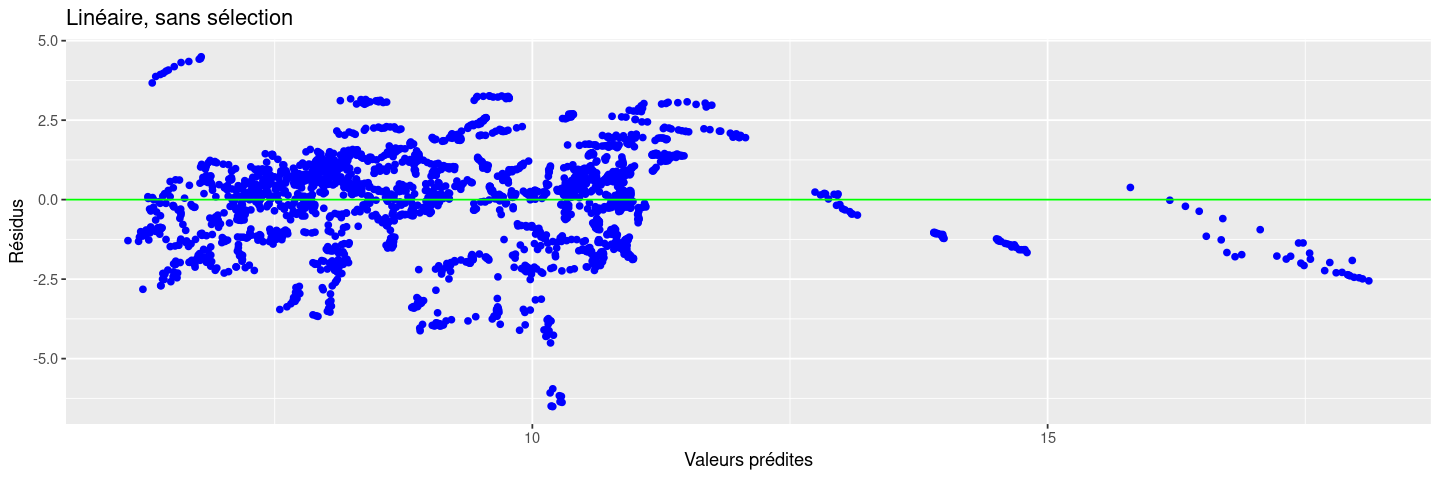

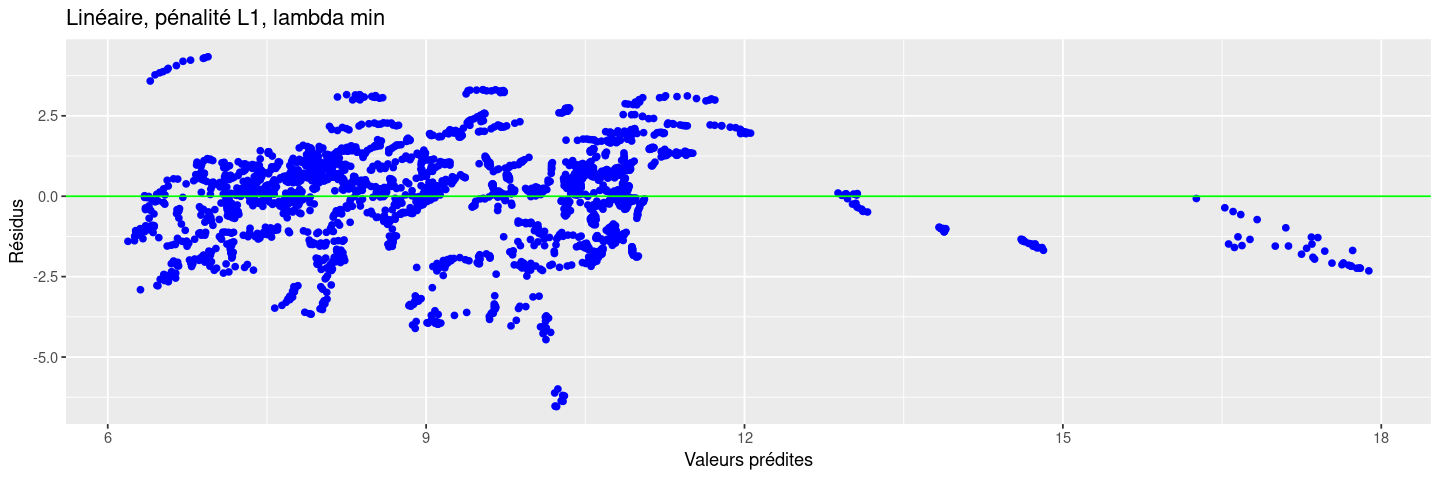

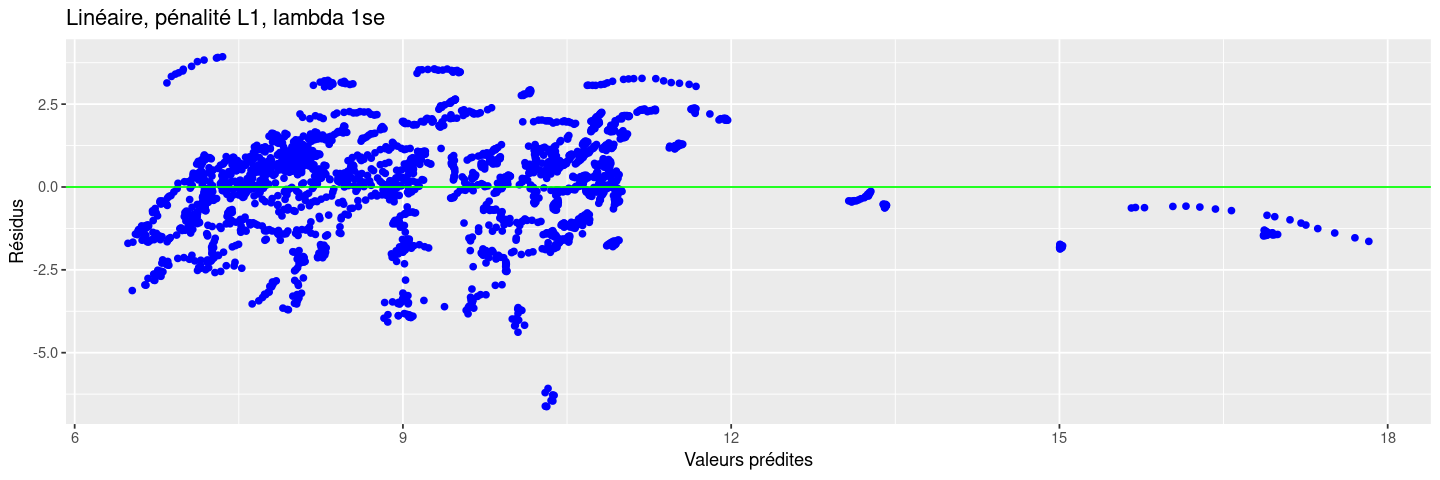

In [60]:
# Extraction des valeurs ajustées et des résidus

fit.lasso <- predict(regLassOpt, s = "lambda.min", newx = train_log.mat)
res.lasso <- train_log$log_Value_co2_emissions_kt_by_country - fit.lasso

fit.lasso.1se <- predict(regLassOpt, s = "lambda.1se", newx = train_log.mat)
res.lasso.1se <- train_log$log_Value_co2_emissions_kt_by_country - fit.lasso.1se 

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
par(mfrow = c(1, 4))
gplot.res(fit, res, "Linéaire, sans sélection")
gplot.res(fit.lasso, res.lasso, "Linéaire, pénalité L1, lambda min")
gplot.res(fit.lasso.1se, res.lasso.1se, "Linéaire, pénalité L1, lambda 1se") 

In [61]:
#Calcul du critère MSE (moyenne du carré des résidus)
paste("Modèle linéaire sans sélection:",mean(res^2))
paste("LASSO avec lambda.min:",mean(res.lasso^2))
paste("LASSO avec lambda.1se:",mean(res.lasso.1se^2))

[1] "Modèle linéaire sans sélection: 2.32721446640777"

[1] "LASSO avec lambda.min: 2.32996806079668"

[1] "LASSO avec lambda.1se: 2.3847445452518"

### Sélection de variables par critère AIC

In [62]:
reg.AIC <- step(reg, direction = "backward", trace=0)

Arbitrairement la fonction step calcule le critère AIC du modèle linéaire 'reg' et met par défaut le facteur de pénalité égal à 2.

De plus, le paramètre 'trace=0' contrôle le niveau de détail des informations de sortie

In [68]:
facteur_penalite = 4
reg.AIC_k <- step(reg, direction = "backward", k= facteur_penalite, trace=0)

In [69]:
summary(reg.AIC)

                                                         Df Sum Sq Mean Sq
Access.to.clean.fuels.for.cooking                         1   3549    3549
Electricity.from.fossil.fuels..TWh.                       1   1950    1950
Electricity.from.renewables..TWh.                         1     51      51
Low.carbon.electricity....electricity.                    1     11      11
Primary.energy.consumption.per.capita..kWh.person.        1     37      37
Density.P.Km2.                                            1      4       4
Land.Area.Km2.                                            1    665     665
Latitude                                                  1    614     614
Longitude                                                 1    376     376
log_Primary.energy.consumption.per.capita..kWh.person.    1    162     162
log_Density.P.Km2.                                        1    452     452
Residuals                                              2282   5342       2
                         

In [70]:
summary(reg.AIC_k)

                                                         Df Sum Sq Mean Sq
Access.to.clean.fuels.for.cooking                         1   3549    3549
Electricity.from.fossil.fuels..TWh.                       1   1950    1950
Electricity.from.renewables..TWh.                         1     51      51
Primary.energy.consumption.per.capita..kWh.person.        1     34      34
Density.P.Km2.                                            1      7       7
Land.Area.Km2.                                            1    660     660
Latitude                                                  1    614     614
Longitude                                                 1    369     369
log_Primary.energy.consumption.per.capita..kWh.person.    1    154     154
log_Density.P.Km2.                                        1    474     474
Residuals                                              2283   5350       2
                                                        F value   Pr(>F)    
Access.to.clean.fuels.f

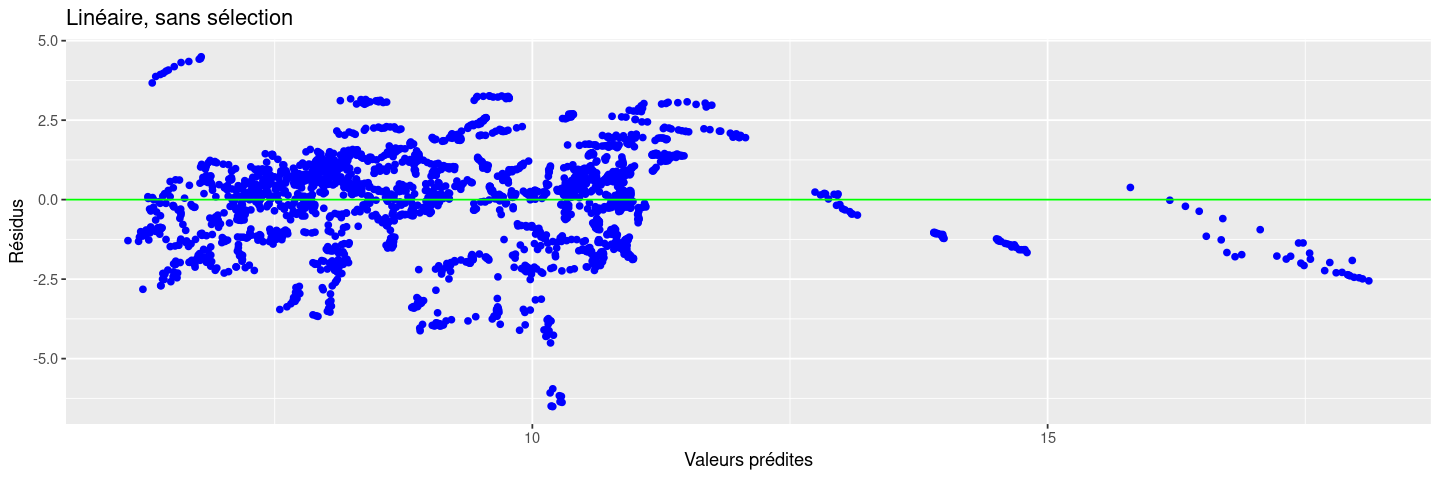

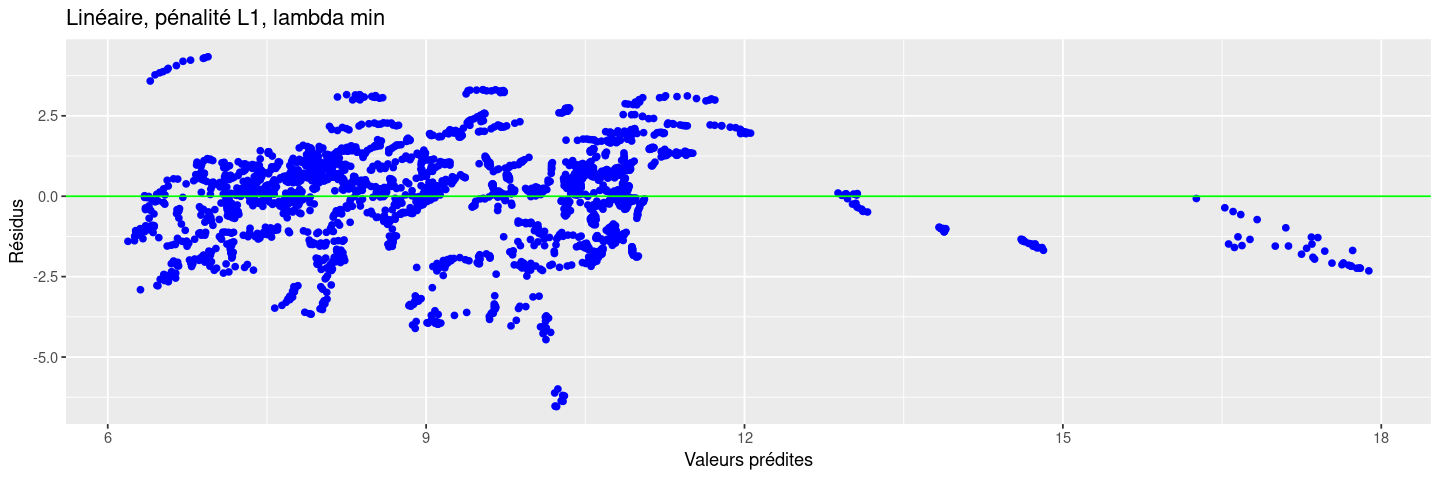

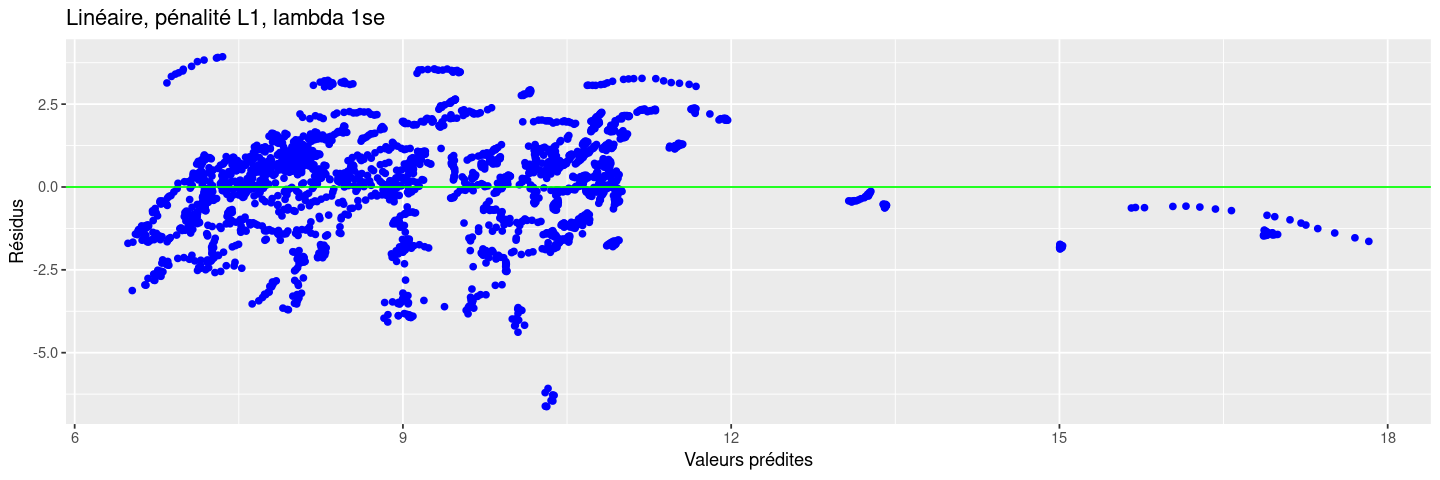

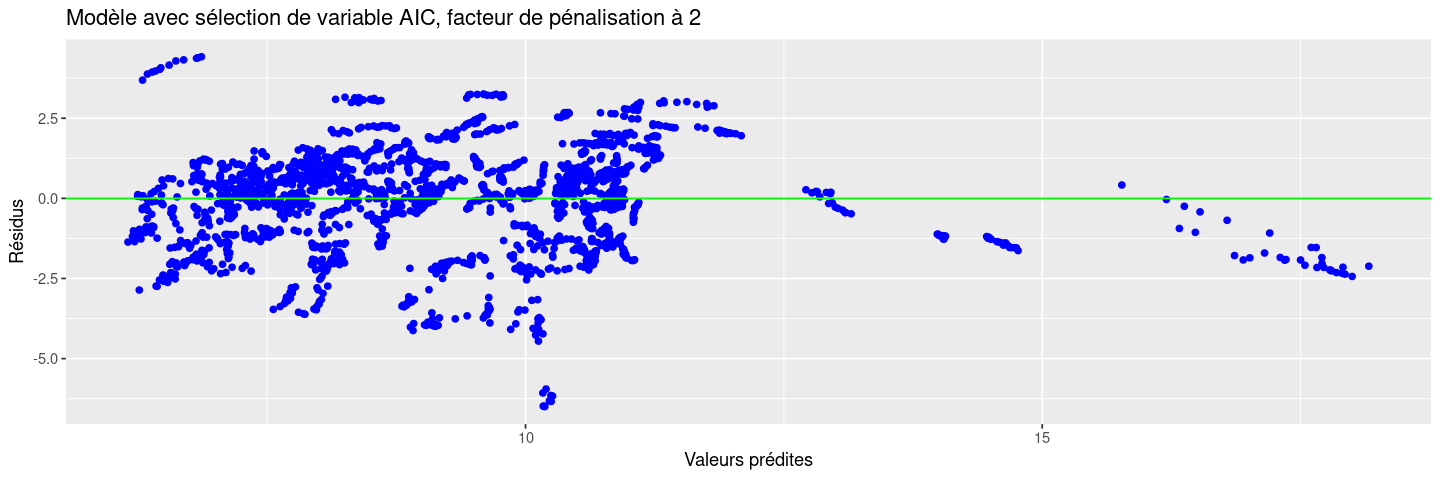

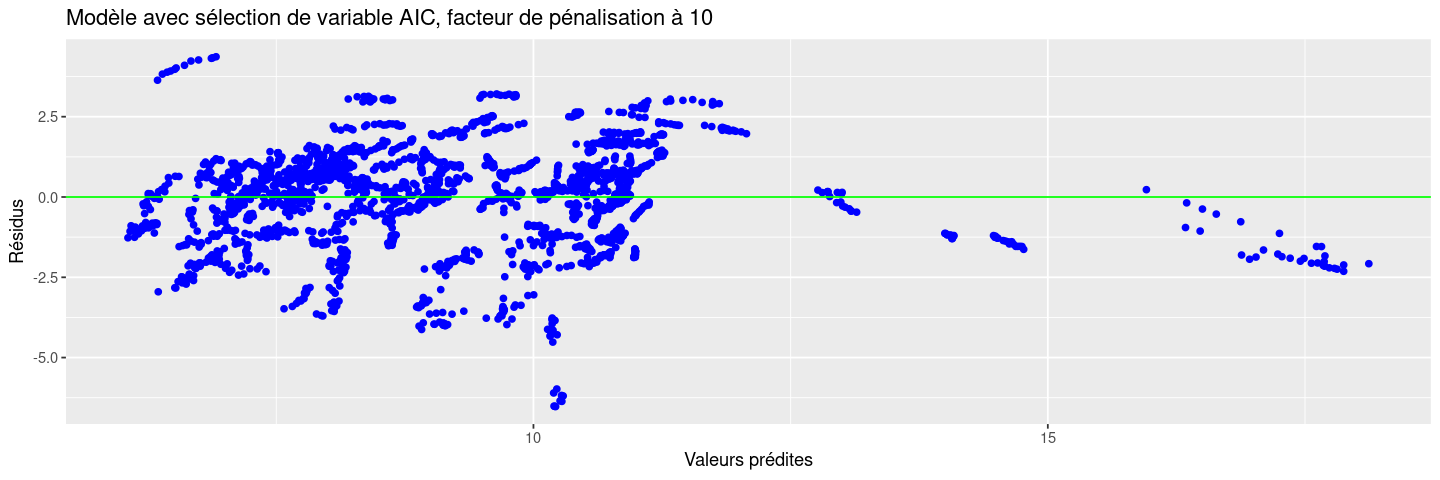

In [71]:
# Extraction des résidus et des valeurs ajustées de ce modèle
res.AIC <- reg.AIC$residuals
fit.AIC <- reg.AIC$fitted.values

res.AIC_k <- reg.AIC_k$residuals
fit.AIC_k <- reg.AIC_k$fitted.values

# Graphe des résidus. 
options(repr.plot.width = 12, repr.plot.height = 4)
par(mfrow = c(1, 4))
gplot.res(fit, res, "Linéaire, sans sélection")
gplot.res(fit.lasso, res.lasso, "Linéaire, pénalité L1, lambda min")
gplot.res(fit.lasso.1se, res.lasso.1se, "Linéaire, pénalité L1, lambda 1se") 
gplot.res(fit.AIC,res.AIC,"Modèle avec sélection de variable AIC, facteur de pénalisation à 2")
gplot.res(fit.AIC_k,res.AIC_k,"Modèle avec sélection de variable AIC, facteur de pénalisation à 10")

In [74]:
#Calcul du critère MSE (moyenne du carré des résidus)
paste("Modèle linéaire sans sélection:", mean(res^2))
paste("LASSO avec lambda.min:", mean(res.lasso^2))
paste("LASSO avec lambda.1se:", mean(res.lasso.1se^2))
paste("Sélection de variables par critère AIC (facteur de pénalité 2):" , mean(res.AIC^2))
paste("Sélection de variables par critère AIC (facteur de pénalité 4):", mean(res.AIC_k^2))

[1] "Modèle linéaire sans sélection: 2.32721446640777"

[1] "LASSO avec lambda.min: 2.32996806079668"

[1] "LASSO avec lambda.1se: 2.3847445452518"

[1] "Sélection de variables par critère AIC (facteur de pénalité 2): 2.32881481621509"

[1] "Sélection de variables par critère AIC (facteur de pénalité 4): 2.33236638144379"

## Support Vector Machine (SVM)

In [40]:
#penser à standardiser les données

## ARBRE DE REGRESSION


In [77]:
library(rpart)
library(rpart.plot)

données non standardisées

Je renomme mes variables pour que l'affichage soit plus jolie

In [78]:
Train_log_renom <- train_log
Test_log_renom <- train_log

Nouveaux_noms <- c("Access_electricity", "Access_clean_fuels", "Electricity_fossil", "Electricity_nuclear",
                "Electricity_renewables", "Low_carbon_electricity", "Primary_energy_consumption_per_capita",
                "Energy_intensity", "GDP_growth", "GDP_per_capita", "Density", "Land_area", "Latitude",
                "Longitude", "Log_primary_energy_consumption_per_capita", "Log_energy_intensity",
                "Log_gdp_per_capita", "Log_CO2_emissions", "Log_density", "Log_land_area")

names(Train_log_renom) <- Nouveaux_noms
names(Test_log_renom) <- Nouveaux_noms

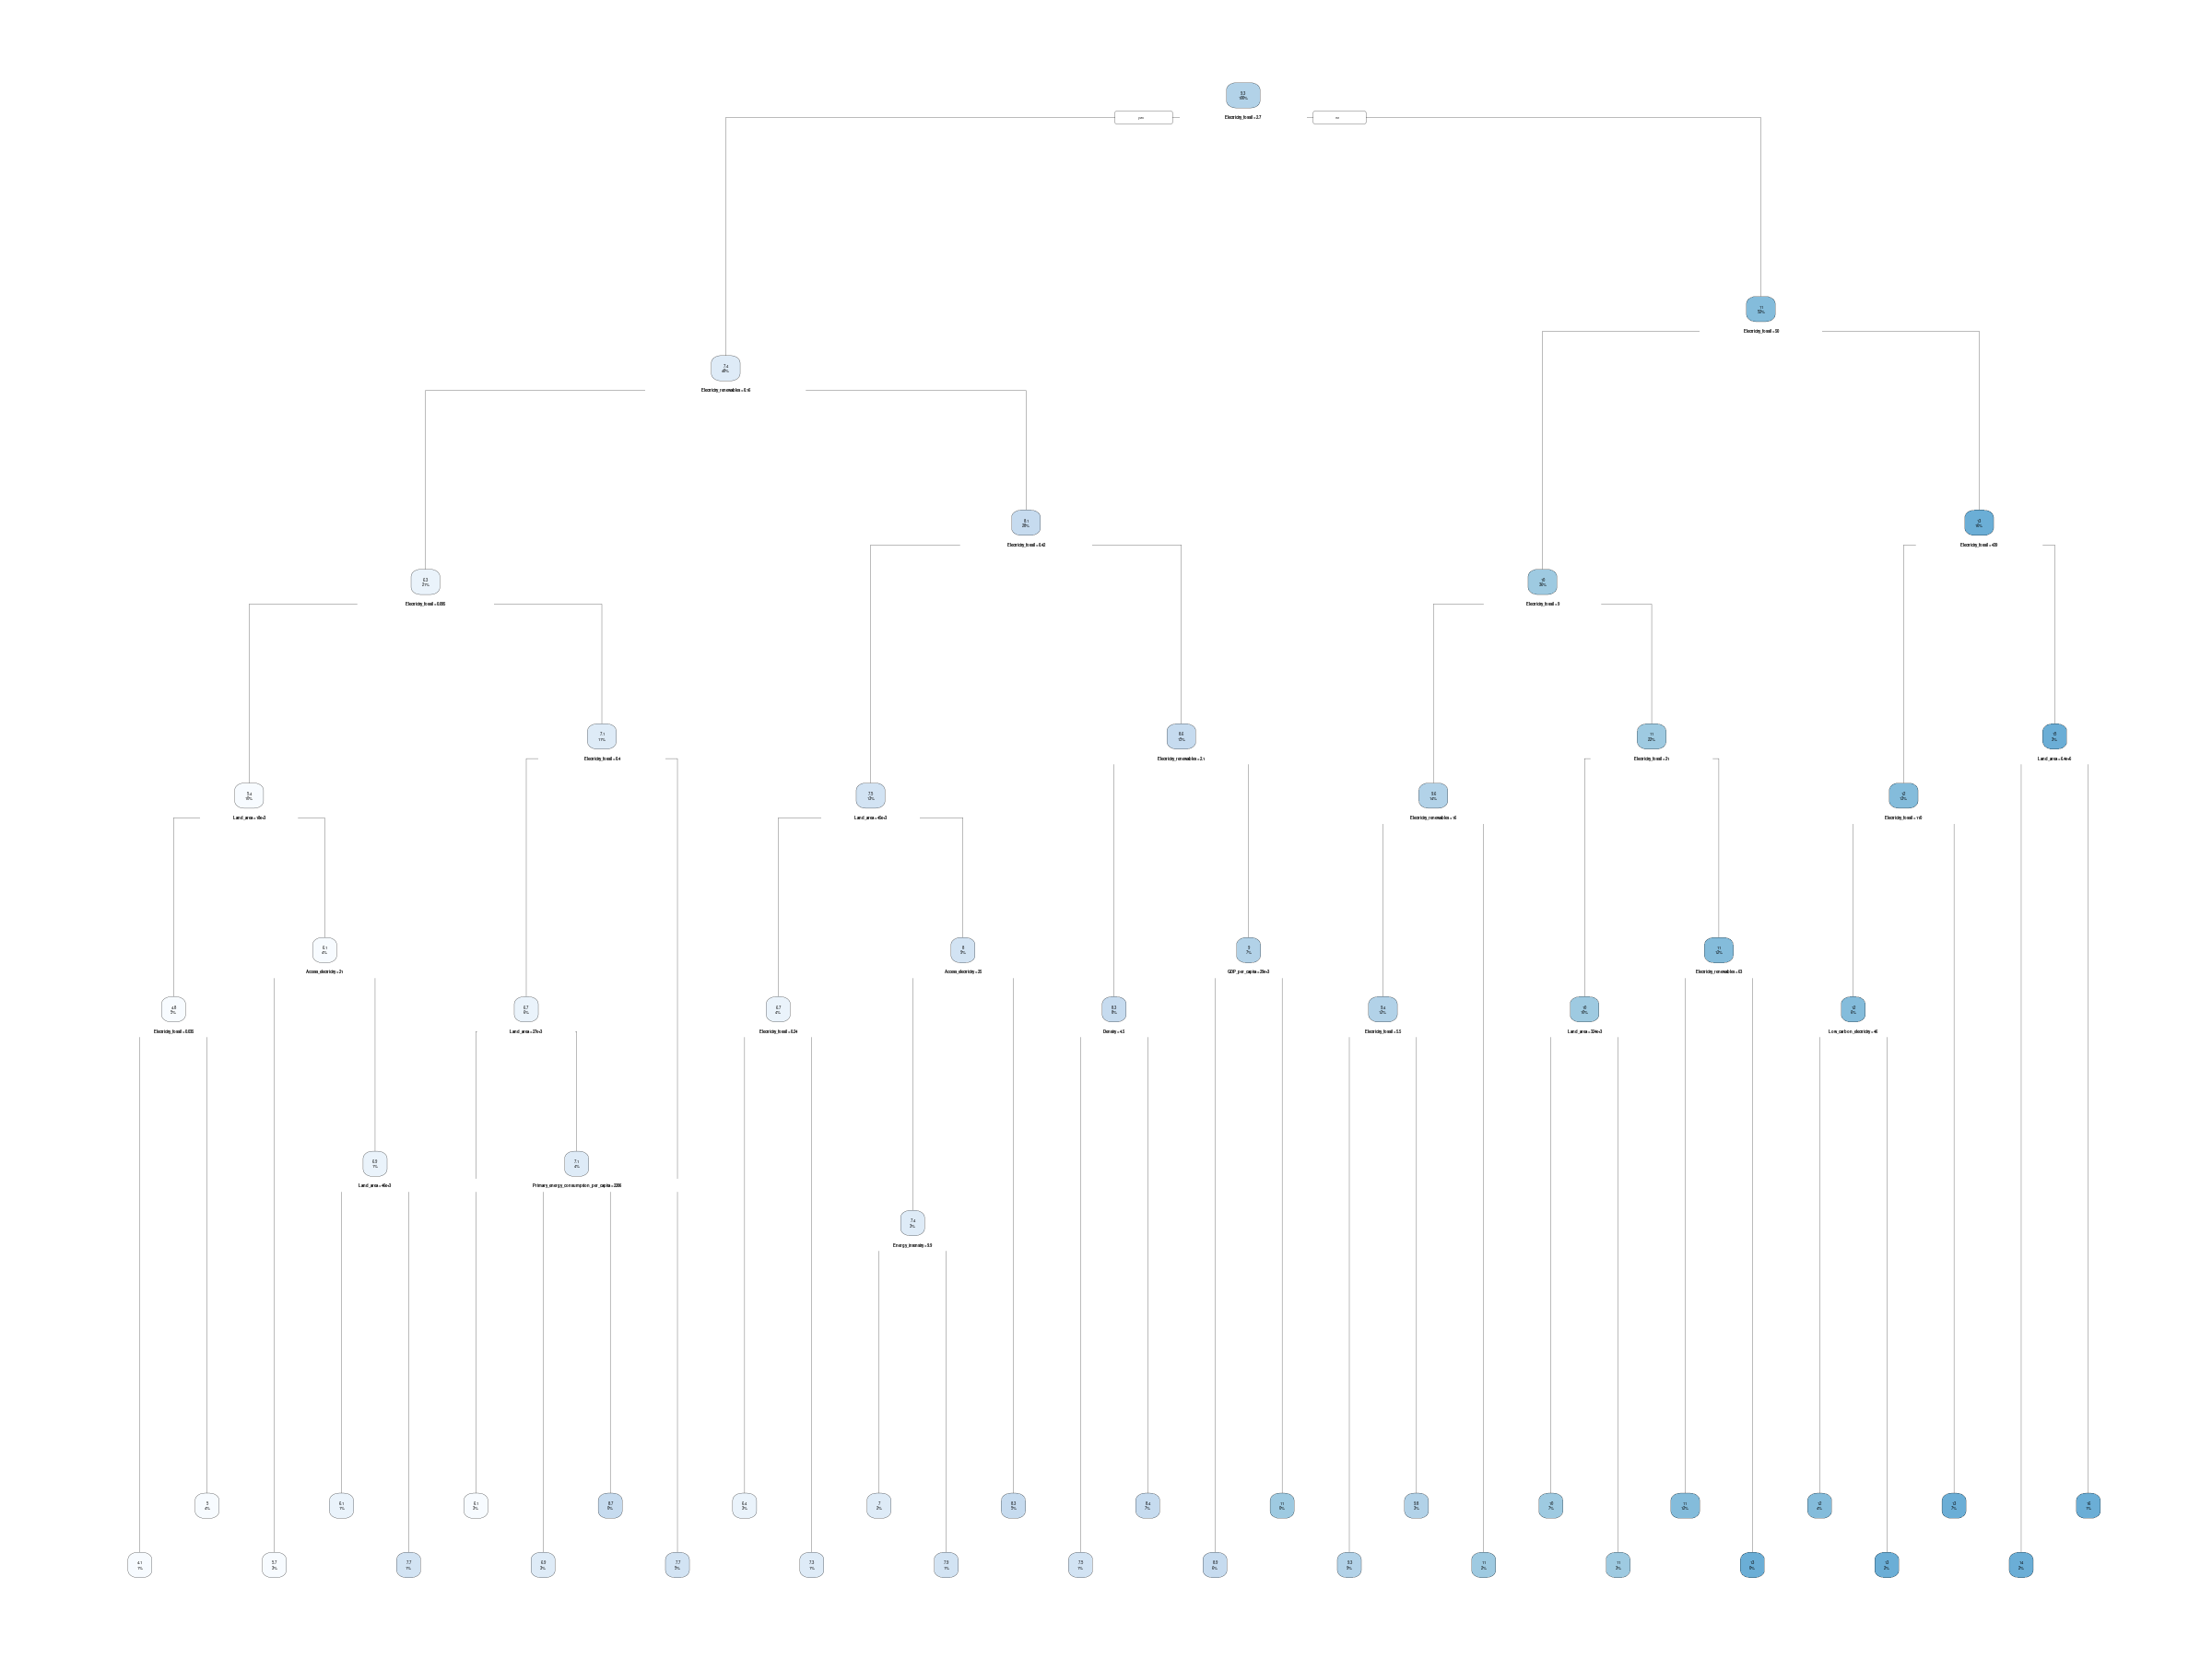

In [79]:
tree=rpart(Log_CO2_emissions~.,data=Train_log_renom,control=rpart.control(cp=0.001))
#Affichage du graphe de l'arbre
options(repr.plot.width = 20, repr.plot.height = 15)
rpart.plot(tree)

Réduction des branches de l'arbre par validation croisée

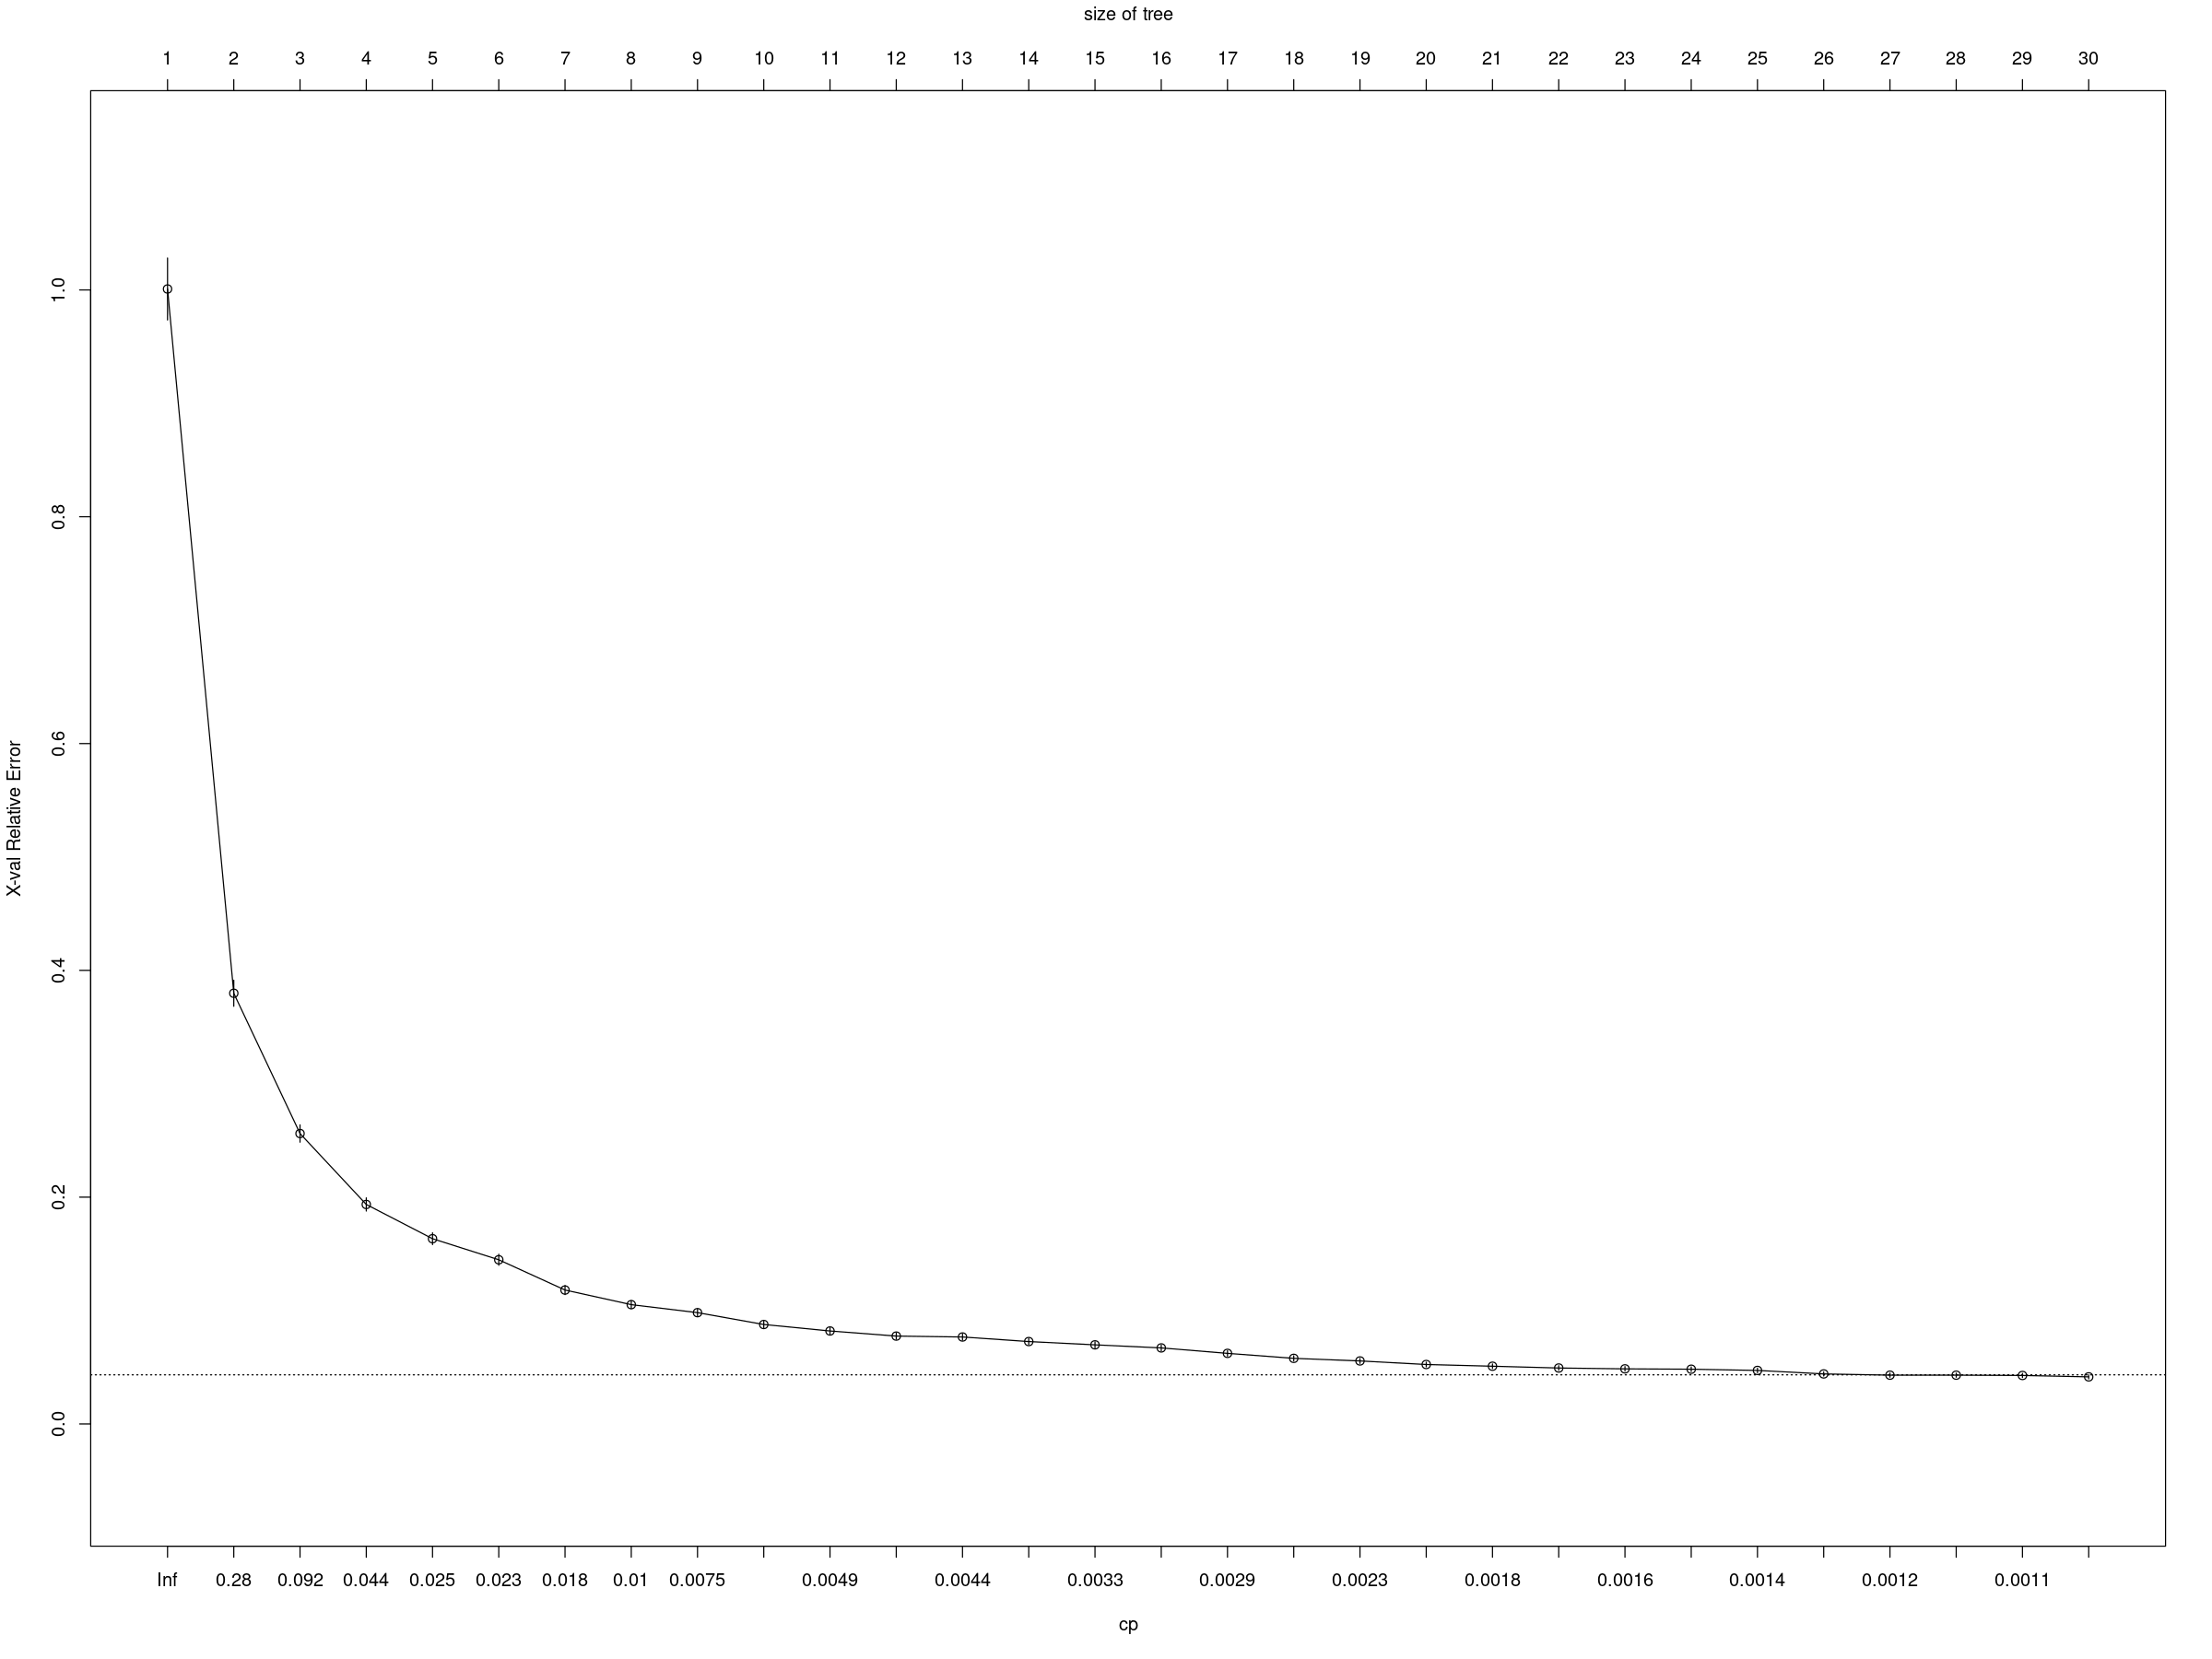

In [80]:
xdf<-xpred.rpart(tree,xval=10) 

# Cross-validation error par valeur de CP
CVerr<-apply((xdf-Train_log_renom$Log_CO2_emissions)^2,2,sum)

plotcp(tree)

On veut la valeur du cp qui correspond à la plus petite erreur.

[1] "cp optimisé: 0.001019211"


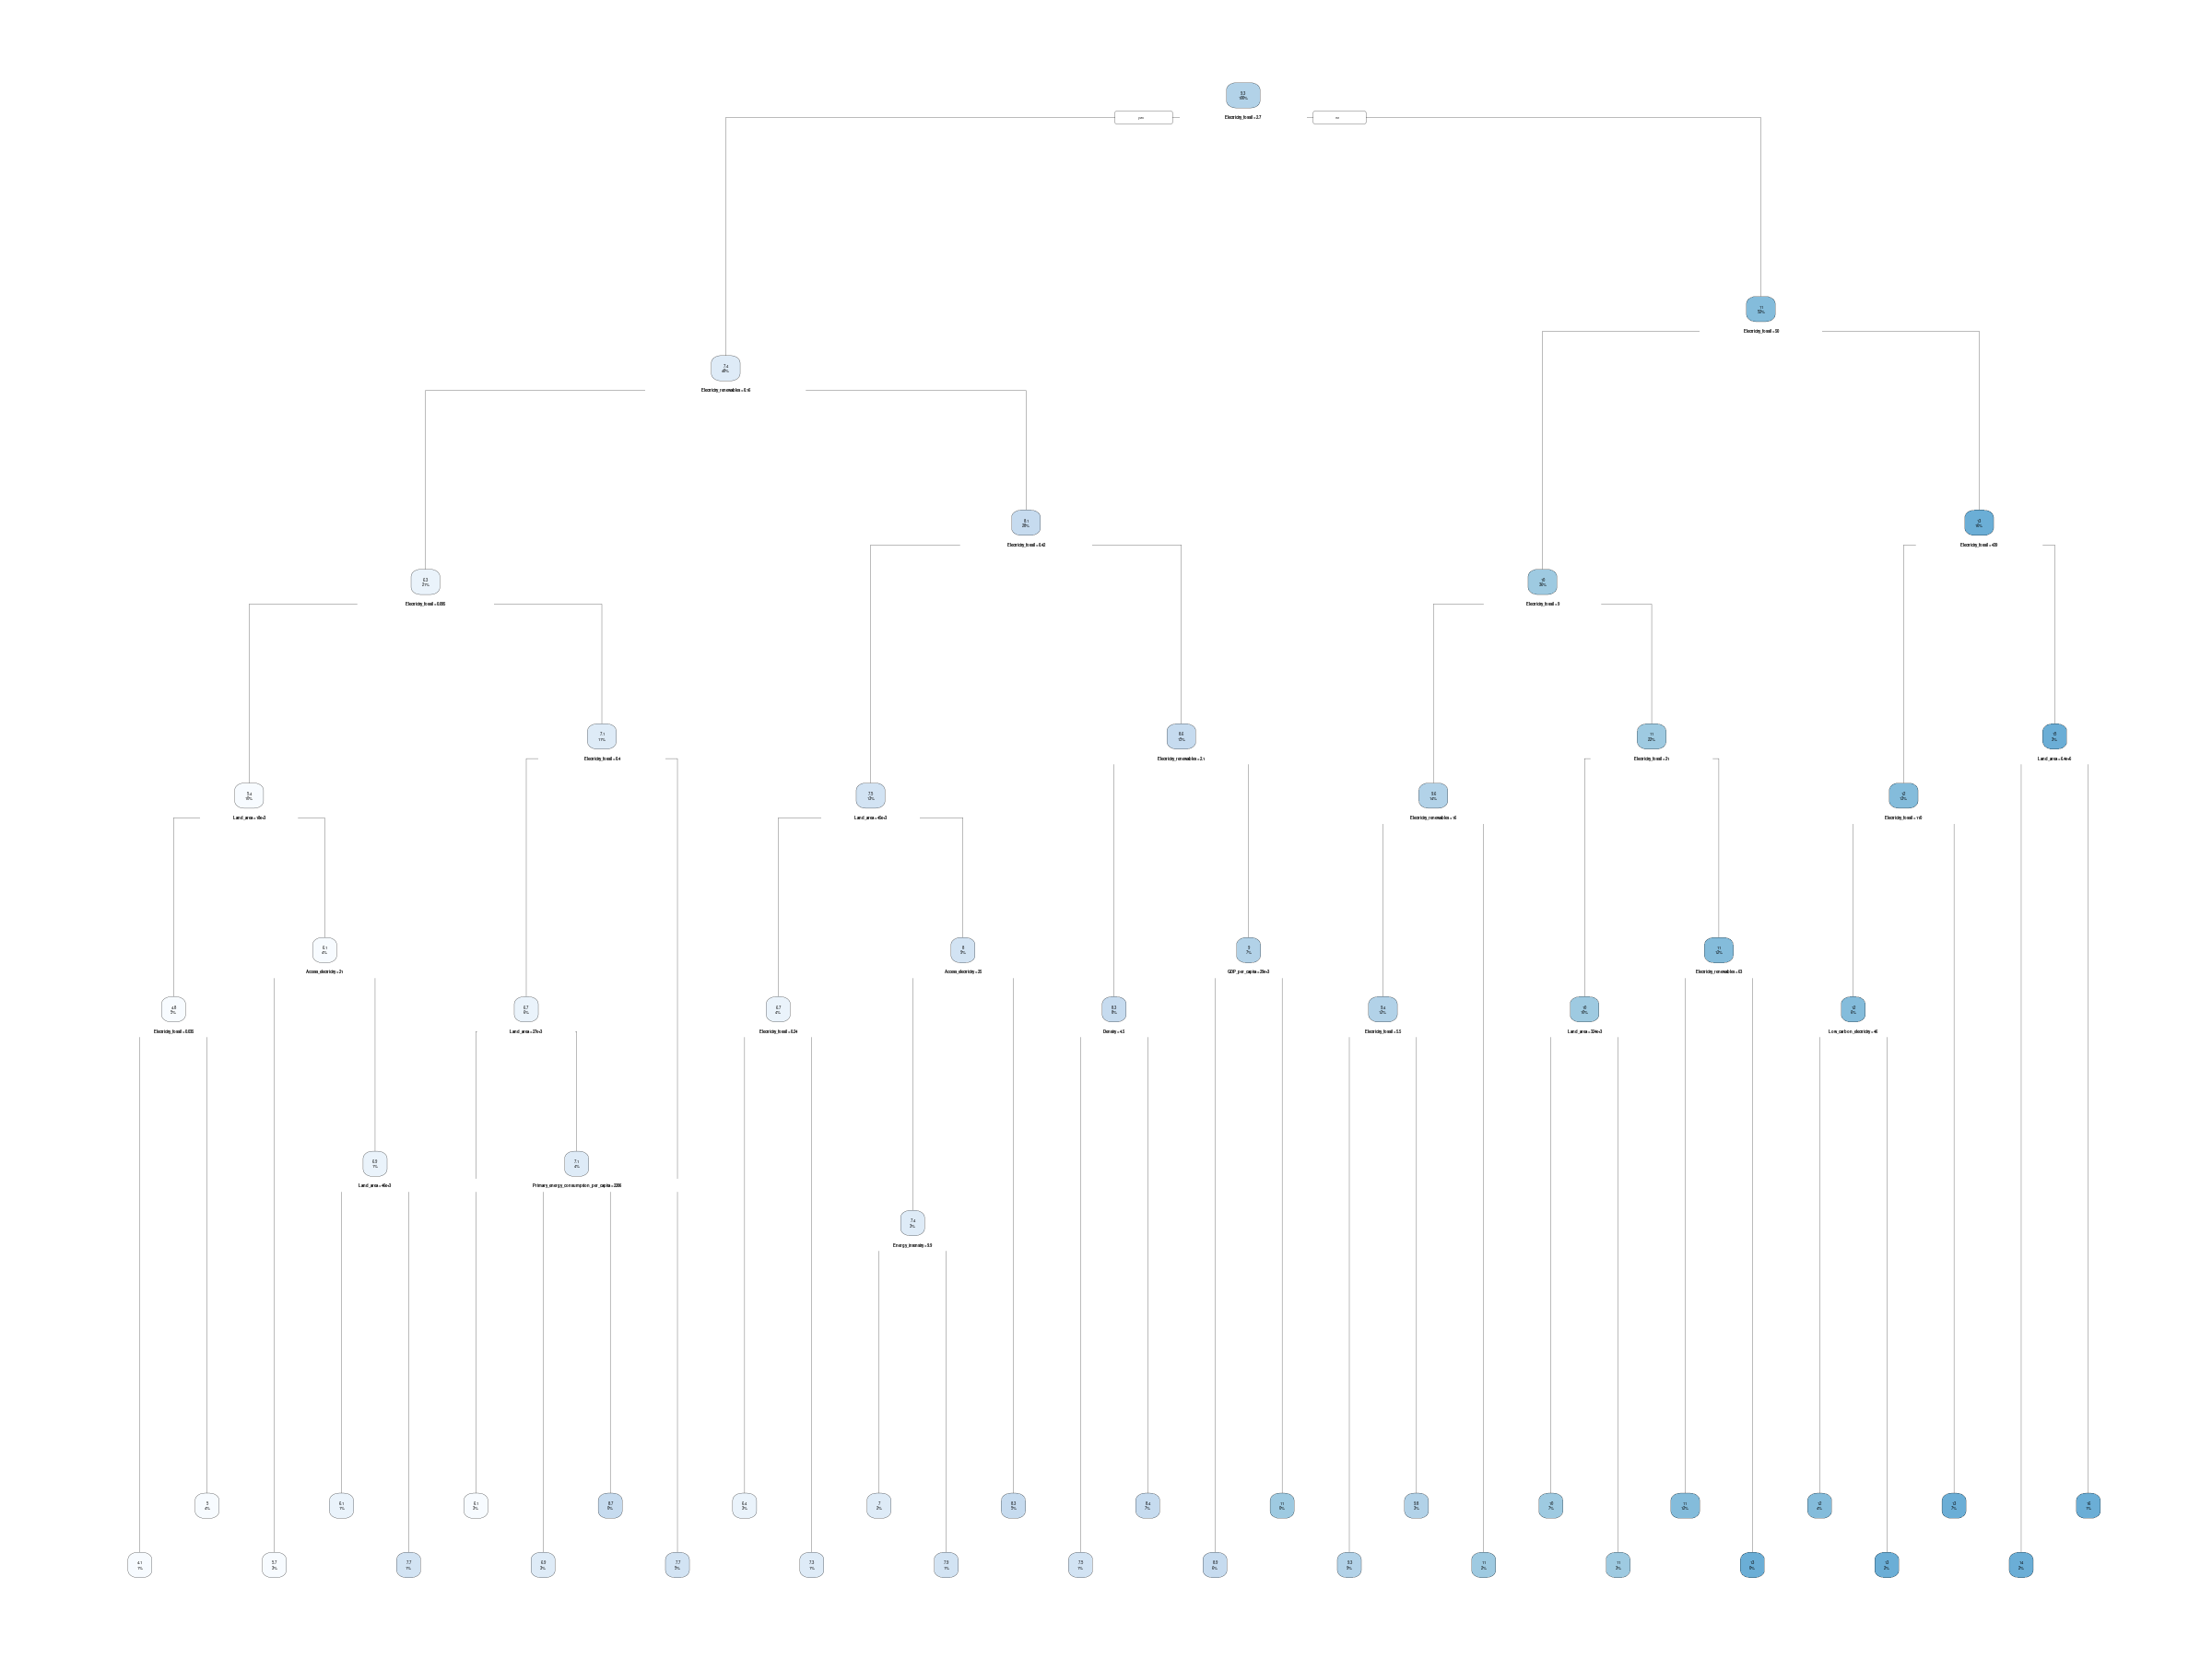

In [81]:
print(paste("cp optimisé:",as.numeric(attributes(which.min(CVerr))$names)))
treeOpt=rpart(Log_CO2_emissions~.,data=Train_log_renom,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(treeOpt,type=2,extra="auto")

Le chargement a nécessité le package : grid

Le chargement a nécessité le package : libcoin

Le chargement a nécessité le package : mvtnorm



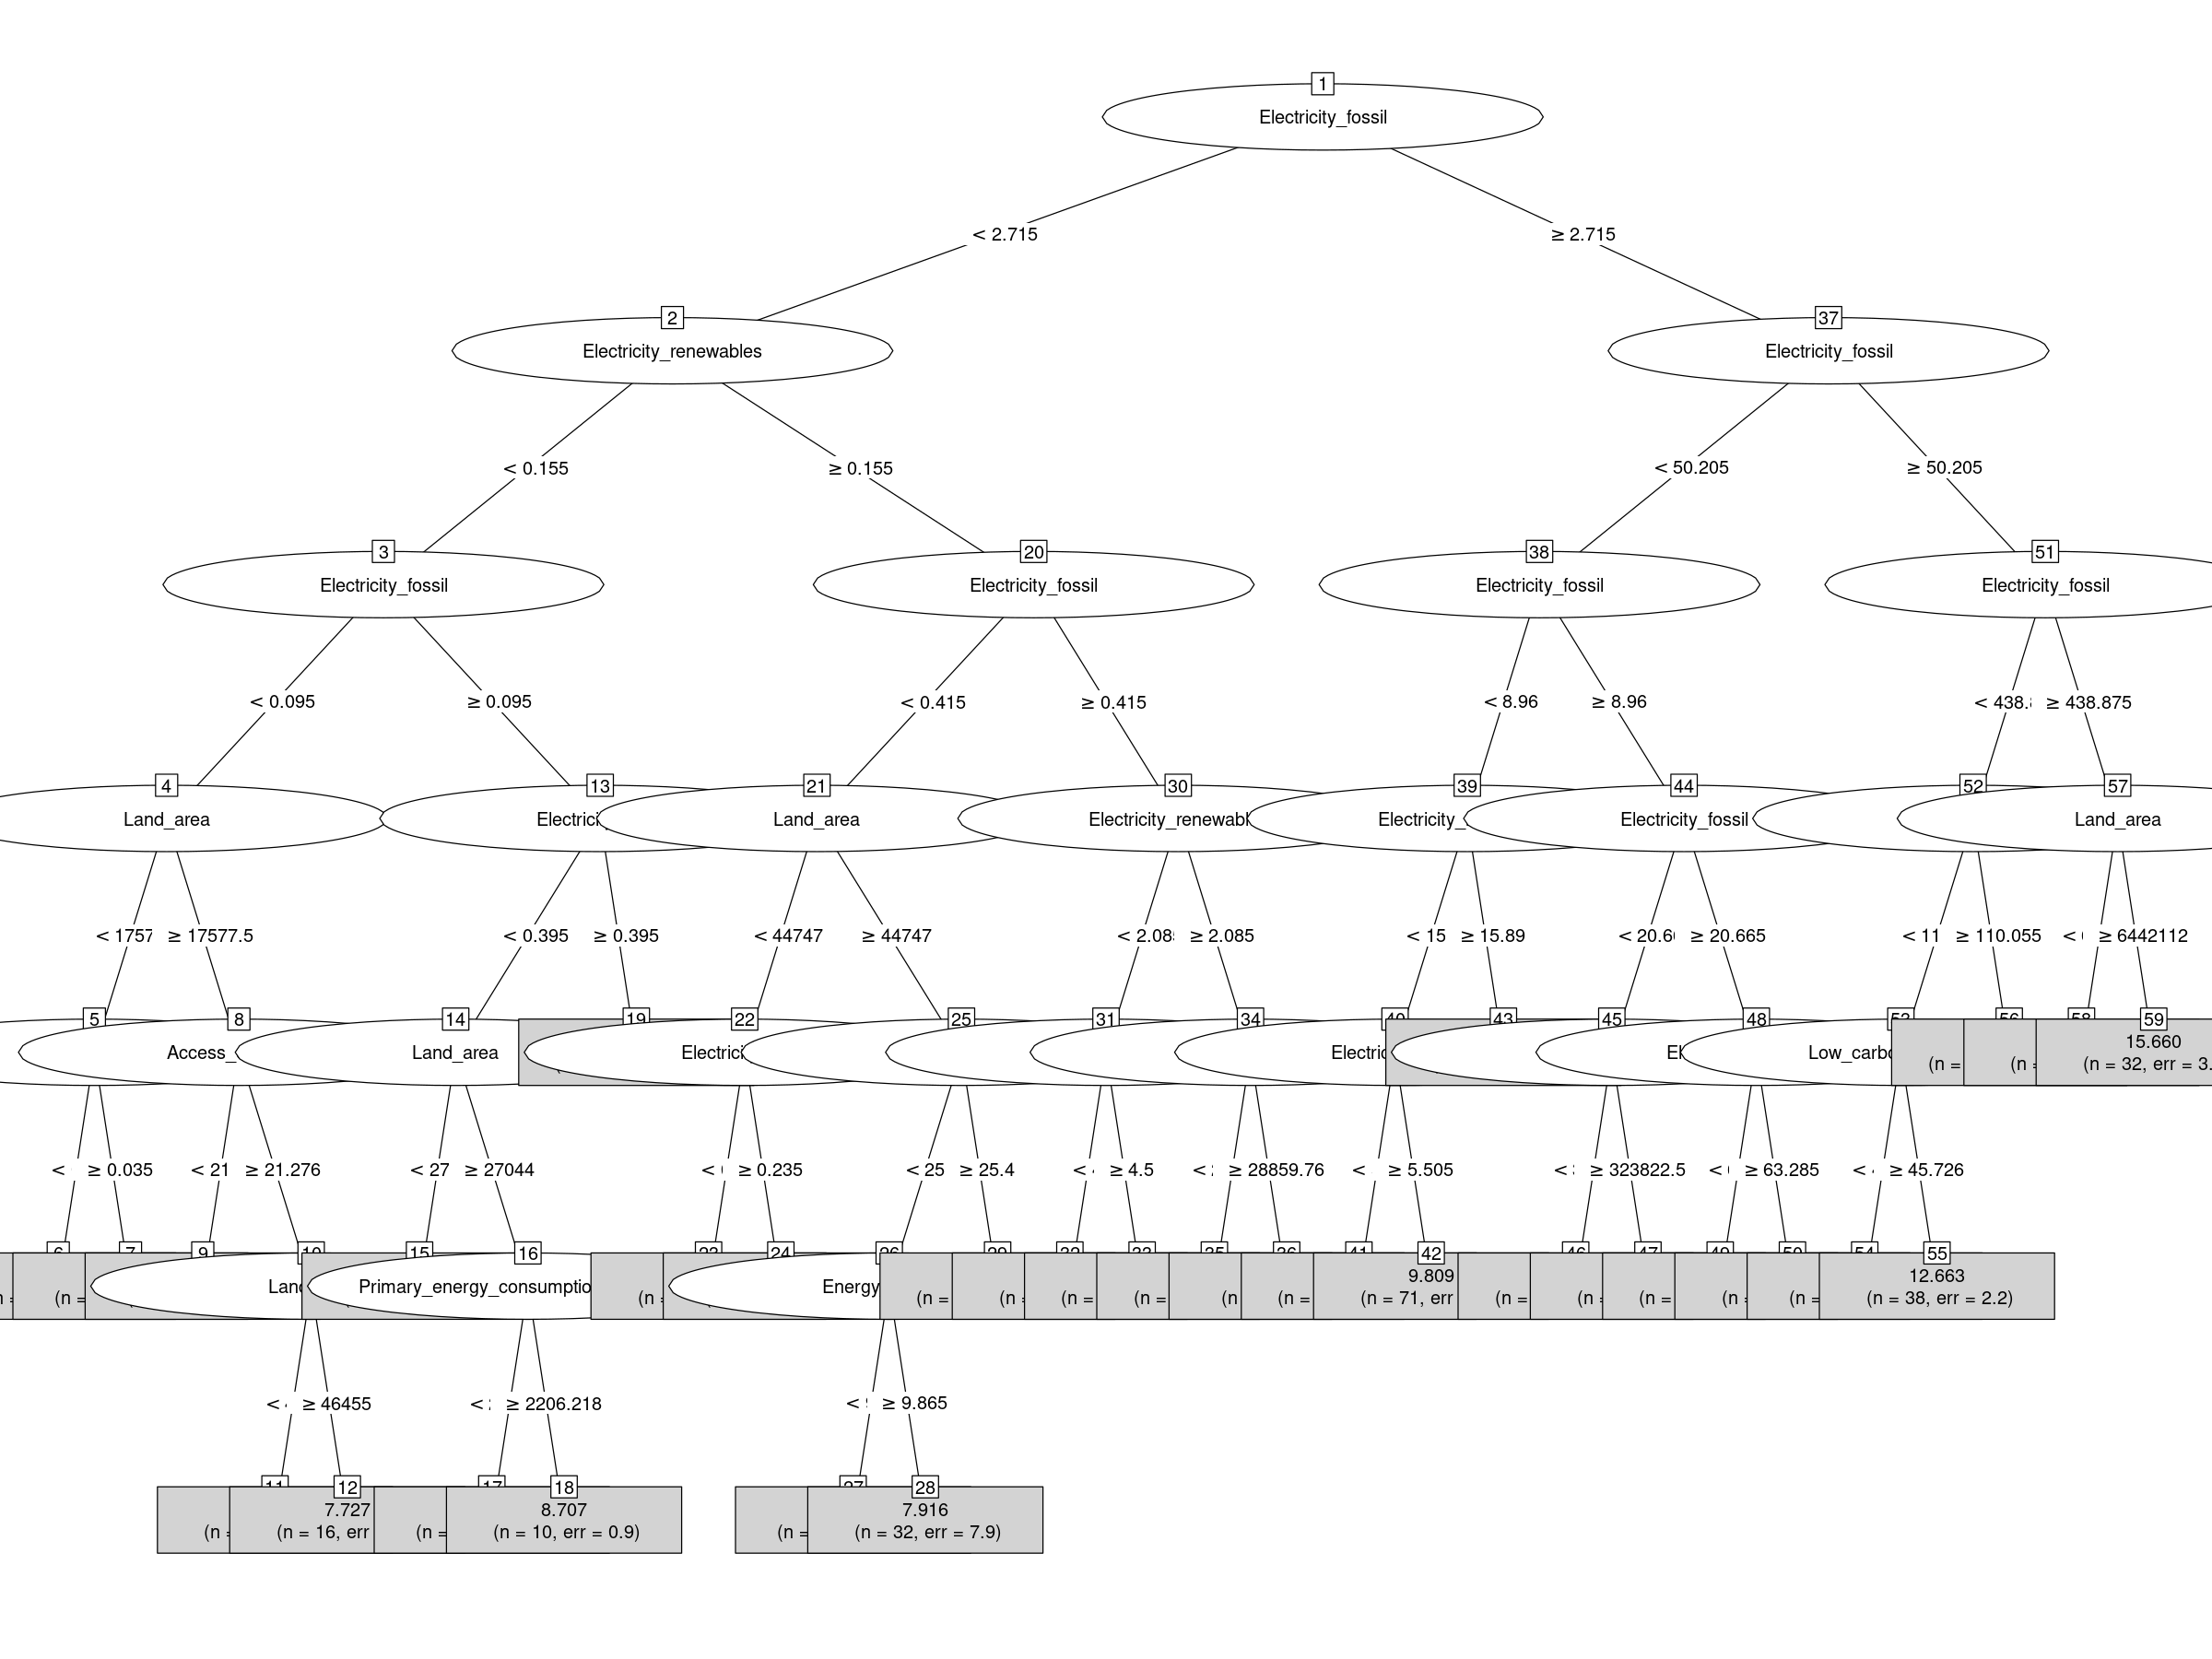

In [82]:
#autre affichage
library(partykit)
plot(as.party(treeOpt), type="simple",cex=0.1)

Affichage du graphe des résidus

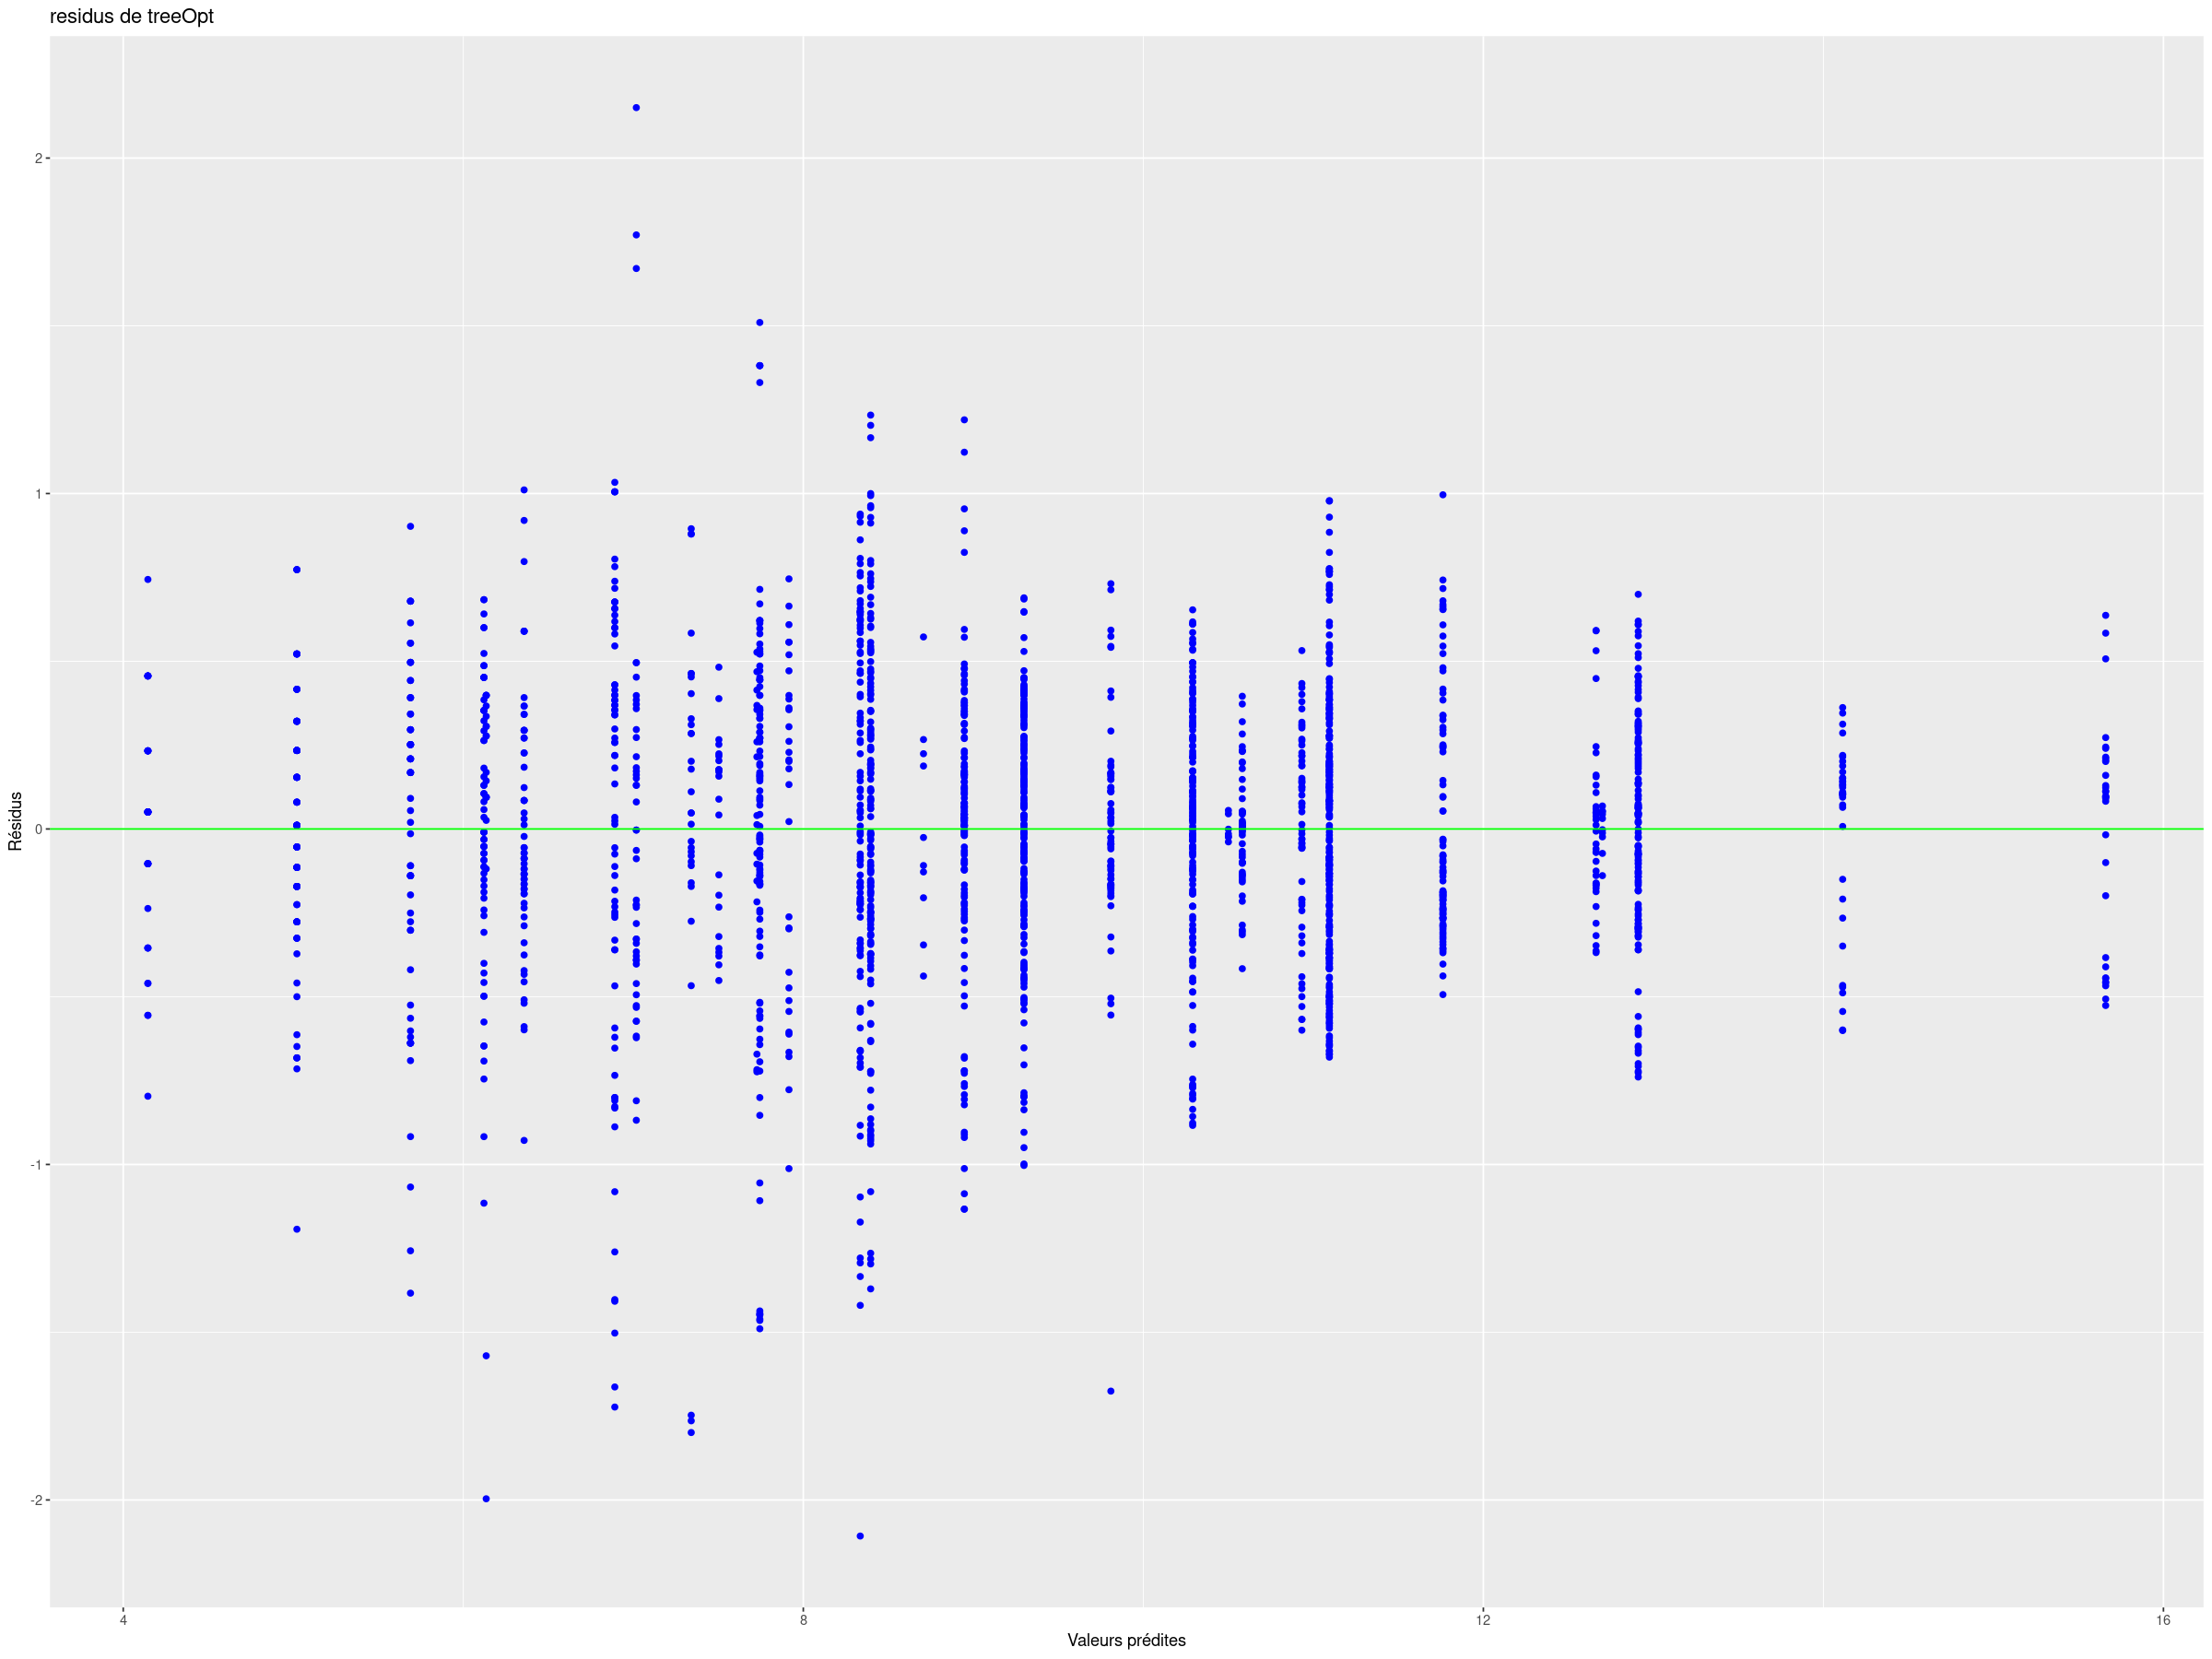

In [83]:
fit.tree=predict(treeOpt)
res.tree=fit.tree-Train_log_renom$Log_CO2_emissions
gplot.res(fit.tree,res.tree,"residus de treeOpt")

Forme particulière car la prédiction est constante par morceaux donc on affiche les résidus de la fonction en fonction des valeurs possibles.

Prévision de l'échantillonage test

In [84]:
# Calcul des prévisions
pred.treer=predict(treeOpt, newdata=Test_log_renom)
# Erreur quadratique moyenne de prévision en régression
sum((pred.treer-Test_log_renom$Log_CO2_emissions)^2)/nrow(Test_log_renom)

[1] 0.1853726

In [85]:
#Calcul du critère MSE (moyenne du carré des résidus)
paste("Modèle par arbre de régression:", mean(res.tree^2))

[1] "Modèle par arbre de régression: 0.185372642572301"

## Forêts aléatoires

L'algorithme random forest est un algorithme d'apprentissage. Il contruit un grand nombre d'arbres de décision où chaque arbre est formé à l'aide d'un échantillon bootstrap des données et en sélectionnant un sous-ensemble aléatoire de variables à chaque nœud de décision. Les prédictions finales sont obtenues en agrégeant les prédictions de tous les arbres, généralement par une moyenne pour les problèmes de régression
 

In [90]:
library(randomForest)

Dans la commande suivante nous allons créer une foret aléatoire pour tenter d'expliquer la variable 'Value_co2_log'. Les données d'entrainement sur lesquels le modèle va s'appuyer sont 'datappr'.

Le paramètre 'ntre' spécifie le nombre d'arbres à inclure dans la foret aléatoire.

Le paramètre 'mtry'donne le nombre de variables à sélectionner à chaque fractionnement de l'arbre (par défaut il est ici égal à floor(ncol(datappr)/3)=4 )

Le paramètre 'do.trace' signifie que l'on peut suivre les performances du processus jusqu'à ce que 50 arbres maximum soient construits.

In [91]:
random_forest=randomForest(log_Value_co2_emissions_kt_by_country~., data=train_log, ntree=1000,do.trace=50,importance=TRUE, mtry=3)

     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
  50 |  0.02451     0.43 |
 100 |  0.02098     0.36 |
 150 |  0.01966     0.34 |
 200 |   0.0189     0.33 |
 250 |  0.01831     0.32 |
 300 |  0.01827     0.32 |
 350 |  0.01809     0.31 |
 400 |  0.01773     0.31 |
 450 |  0.01757     0.31 |
 500 |  0.01754     0.30 |
 550 |  0.01741     0.30 |
 600 |  0.01736     0.30 |
 650 |  0.01733     0.30 |
 700 |  0.01727     0.30 |
 750 |  0.01733     0.30 |
 800 |  0.01729     0.30 |
 850 |  0.01721     0.30 |
 900 |  0.01719     0.30 |
 950 |   0.0172     0.30 |
1000 |  0.01716     0.30 |


In [92]:
#2ème arbre qui prend en compte les données test
random_forest2 = randomForest(x=train_log, y=train_log$log_Value_co2_emissions_kt_by_country, xtest=test_log, ytest=test_log$log_Value_co2_emissions_kt_by_countr, ntree=1000,do.trace=50,importance=TRUE, mtry=3)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.01061     0.18 | 0.006164     0.11 |
 100 | 0.008506     0.15 |  0.00572     0.11 |
 150 | 0.007776     0.14 | 0.005589     0.10 |
 200 | 0.007398     0.13 | 0.005538     0.10 |
 250 | 0.007298     0.13 | 0.005548     0.10 |
 300 |  0.00713     0.12 | 0.005392     0.10 |
 350 | 0.007073     0.12 | 0.005379     0.10 |
 400 | 0.007016     0.12 | 0.005436     0.10 |
 450 |  0.00692     0.12 | 0.005452     0.10 |
 500 | 0.006965     0.12 | 0.005539     0.10 |
 550 | 0.007021     0.12 | 0.005568     0.10 |
 600 | 0.007045     0.12 | 0.005538     0.10 |
 650 | 0.007049     0.12 | 0.005508     0.10 |
 700 | 0.007099     0.12 | 0.005518     0.10 |
 750 | 0.007057     0.12 | 0.005529     0.10 |
 800 | 0.006963     0.12 | 0.005453     0.10 |
 850 | 0.006955     0.12 |  0.00542     0.10 |
 900 | 0.006971     0.12 | 0.005437     0.10 |
 950 | 0.006904     0.12 | 0.005403     0.10 |
1000 |  0.006

On cherche à minimiser le critère Out-Of-Bag pour trouver le nombre d'arbre adéquat.
Dans le cas 2, les MSE sont bien plus petites, l'estimation est donc meilleure.

Validation croisée à l'aide de la fonction 'rfcv' dans le package random forest :

In [93]:
random_forestOpt=rfcv(train_log, train_log$log_Value_co2_emissions_kt_by_country, nfold=10)
#print(random_forestOpt)

Prévision de l'échantillon test

In [94]:
y_chap = random_forest2$test$predicted
sum((y_chap-test_log$log_Value_co2_emissions_kt_by_country)^2)/nrow(test_log)

[1] 0.005370565

Résidus en fonction des valeurs prédites

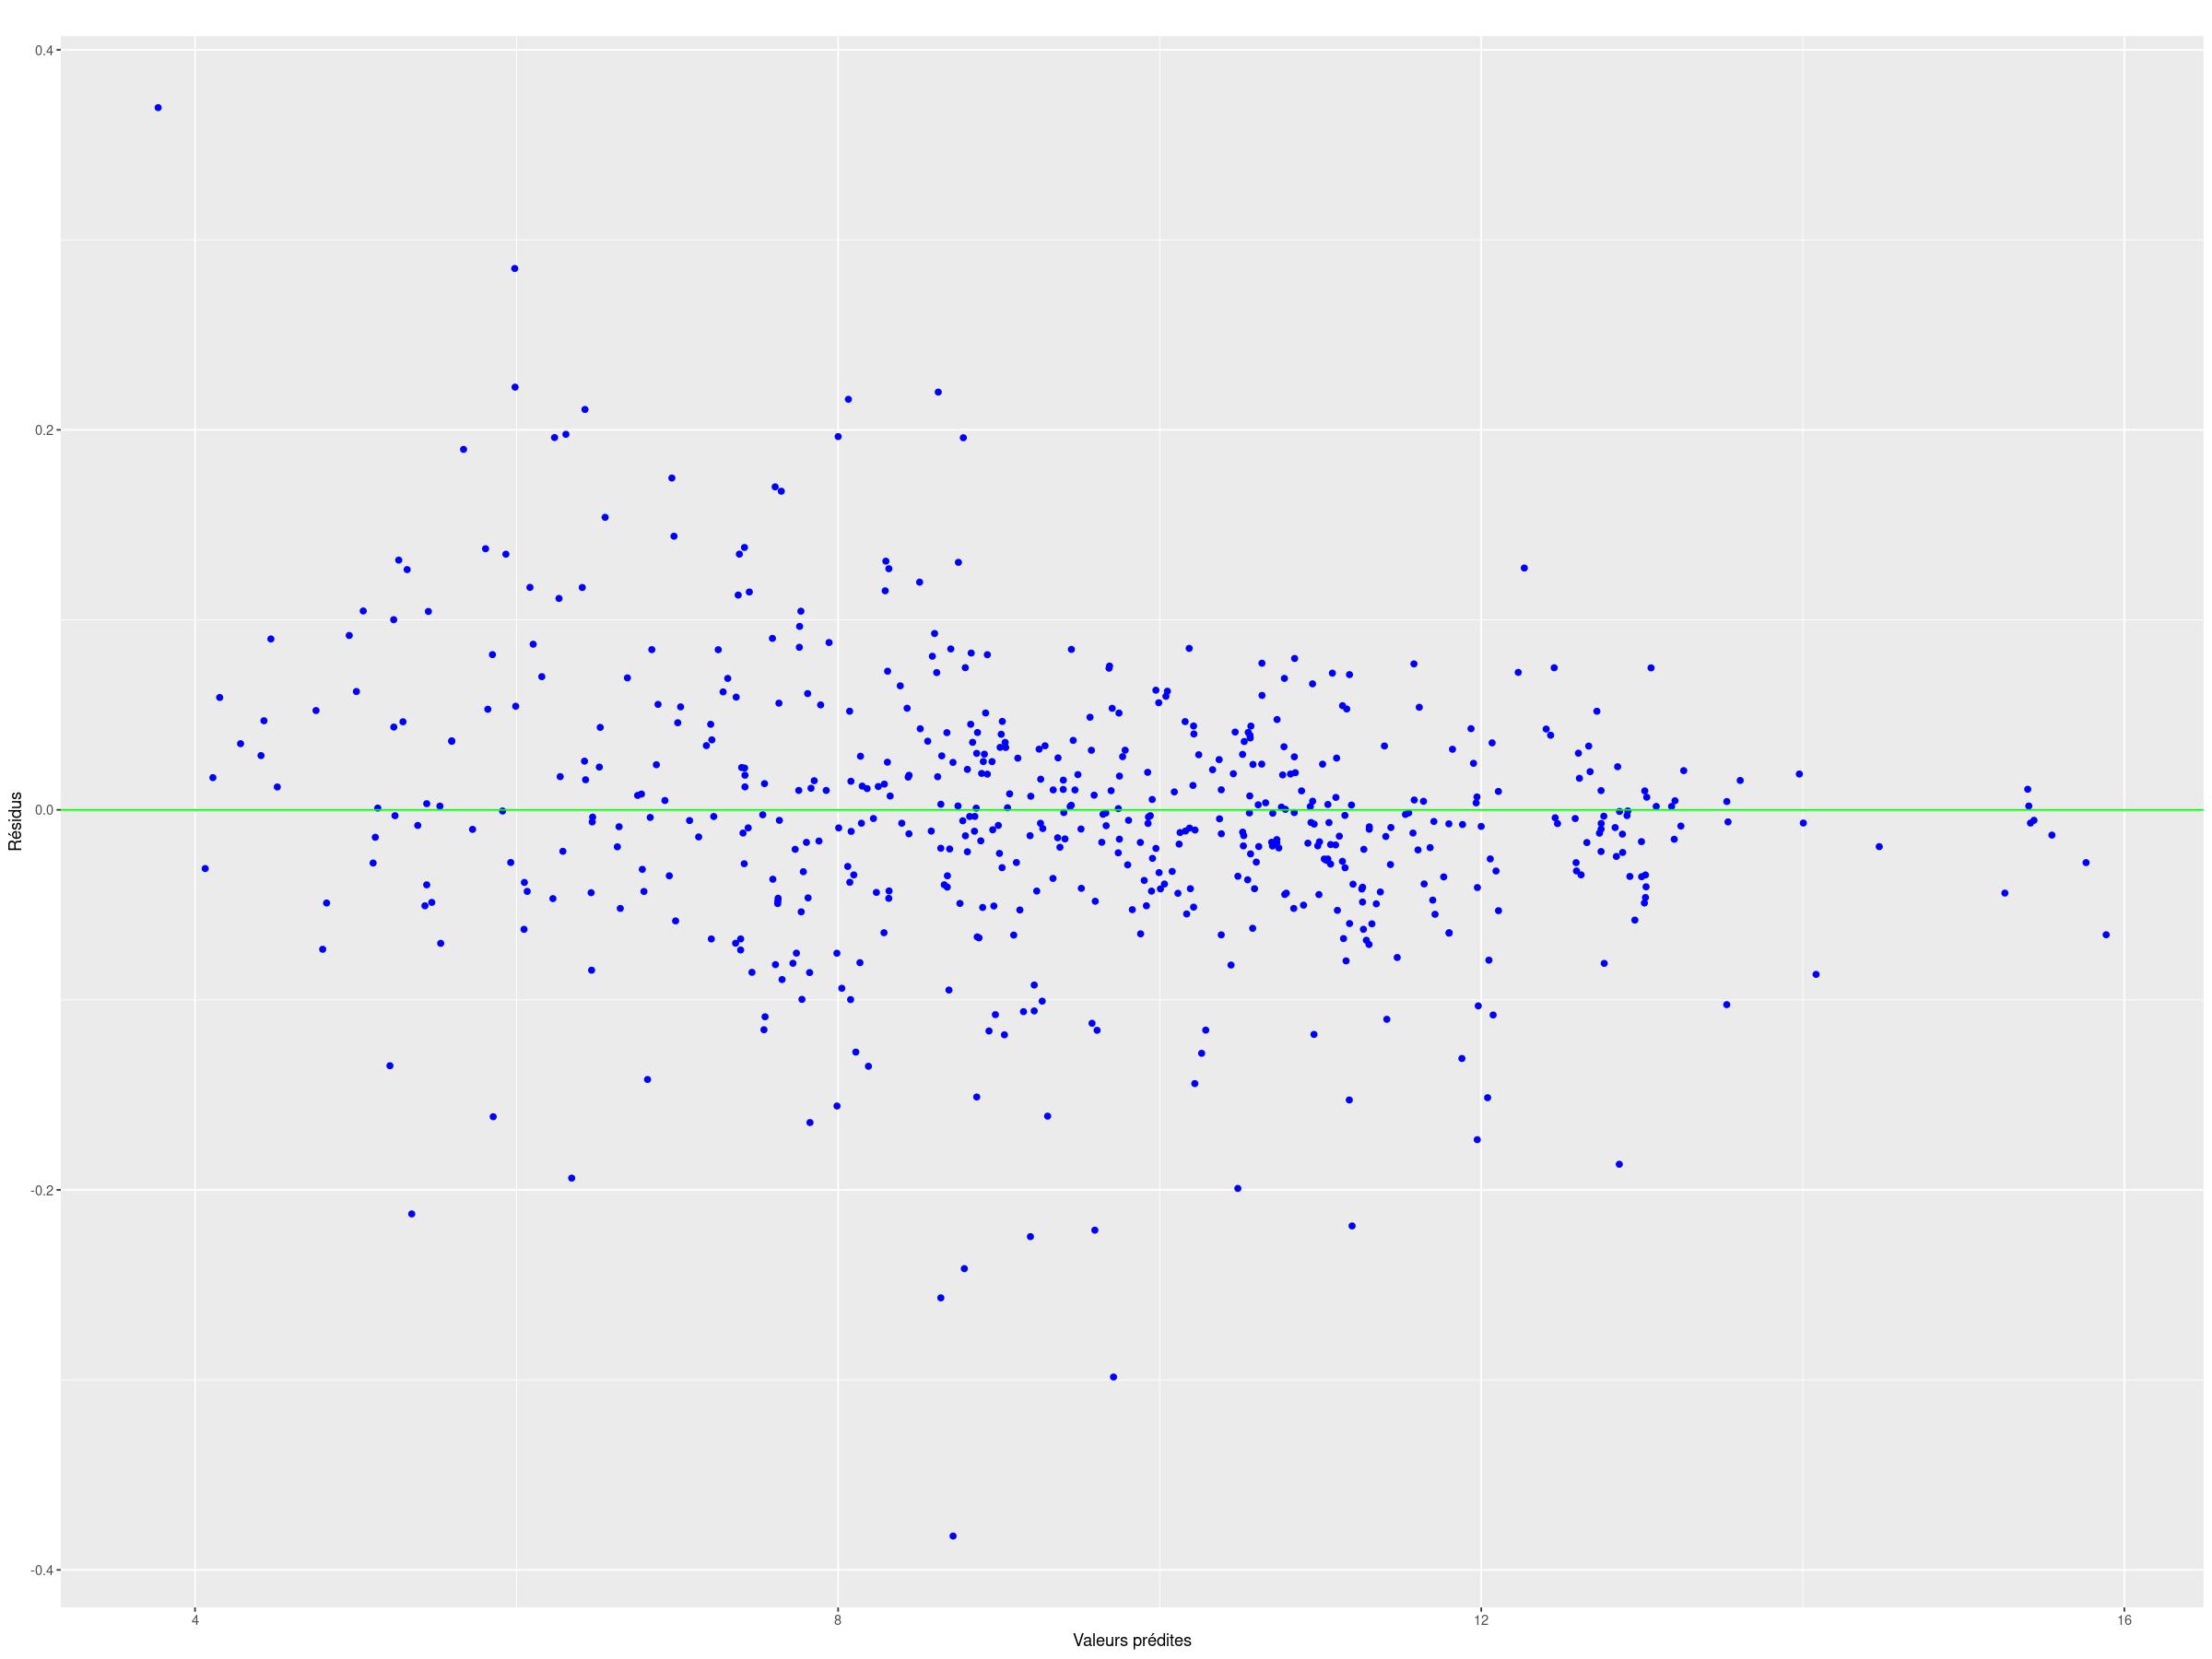

In [95]:
res.rf=y_chap-test_log$log_Value_co2_emissions_kt_by_country
gplot.res(y_chap,res.rf,titre="")

Nous allons afficher l'importance de chaque variable dans la prédiction du résultat:

[1] "-----Classement des variables selon leur importance------"


log_Value_co2_emissions_kt_by_country 
                                                          39.25 
                            Electricity.from.fossil.fuels..TWh. 
                                                          35.86 
                                                 Density.P.Km2. 
                                                          30.54 
                                             log_Land.Area.Km2. 
                                                          29.19 
                                                 Land.Area.Km2. 
                                                          28.56 
                                             log_Density.P.Km2. 
                                                          28.56 
                         Low.carbon.electricity....electricity. 
                                                          27.08 
                                                      Longitude 
                                                          26.99 
log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                          26.32 
                              Electricity.from.renewables..TWh. 
                                                          25.77 
    Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                          24.72 
                                                       Latitude 
                                                          23.10 
         log_Primary.energy.consumption.per.capita..kWh.person. 
                                                          20.56 
             Primary.energy.consumption.per.capita..kWh.person. 
                                                          18.54 
                              Access.to.clean.fuels.for.cooking 
                                                          18.42 
                                 Electricity.from.nuclear..TWh. 
                                                          17.40 
                        Access.to.electricity....of.population. 
                                                          17.03 
                                             log_gdp_per_capita 
                                                          16.27 
                                                 gdp_per_capita 
                                                          15.51 
                                                     gdp_growth 
                                                          11.16

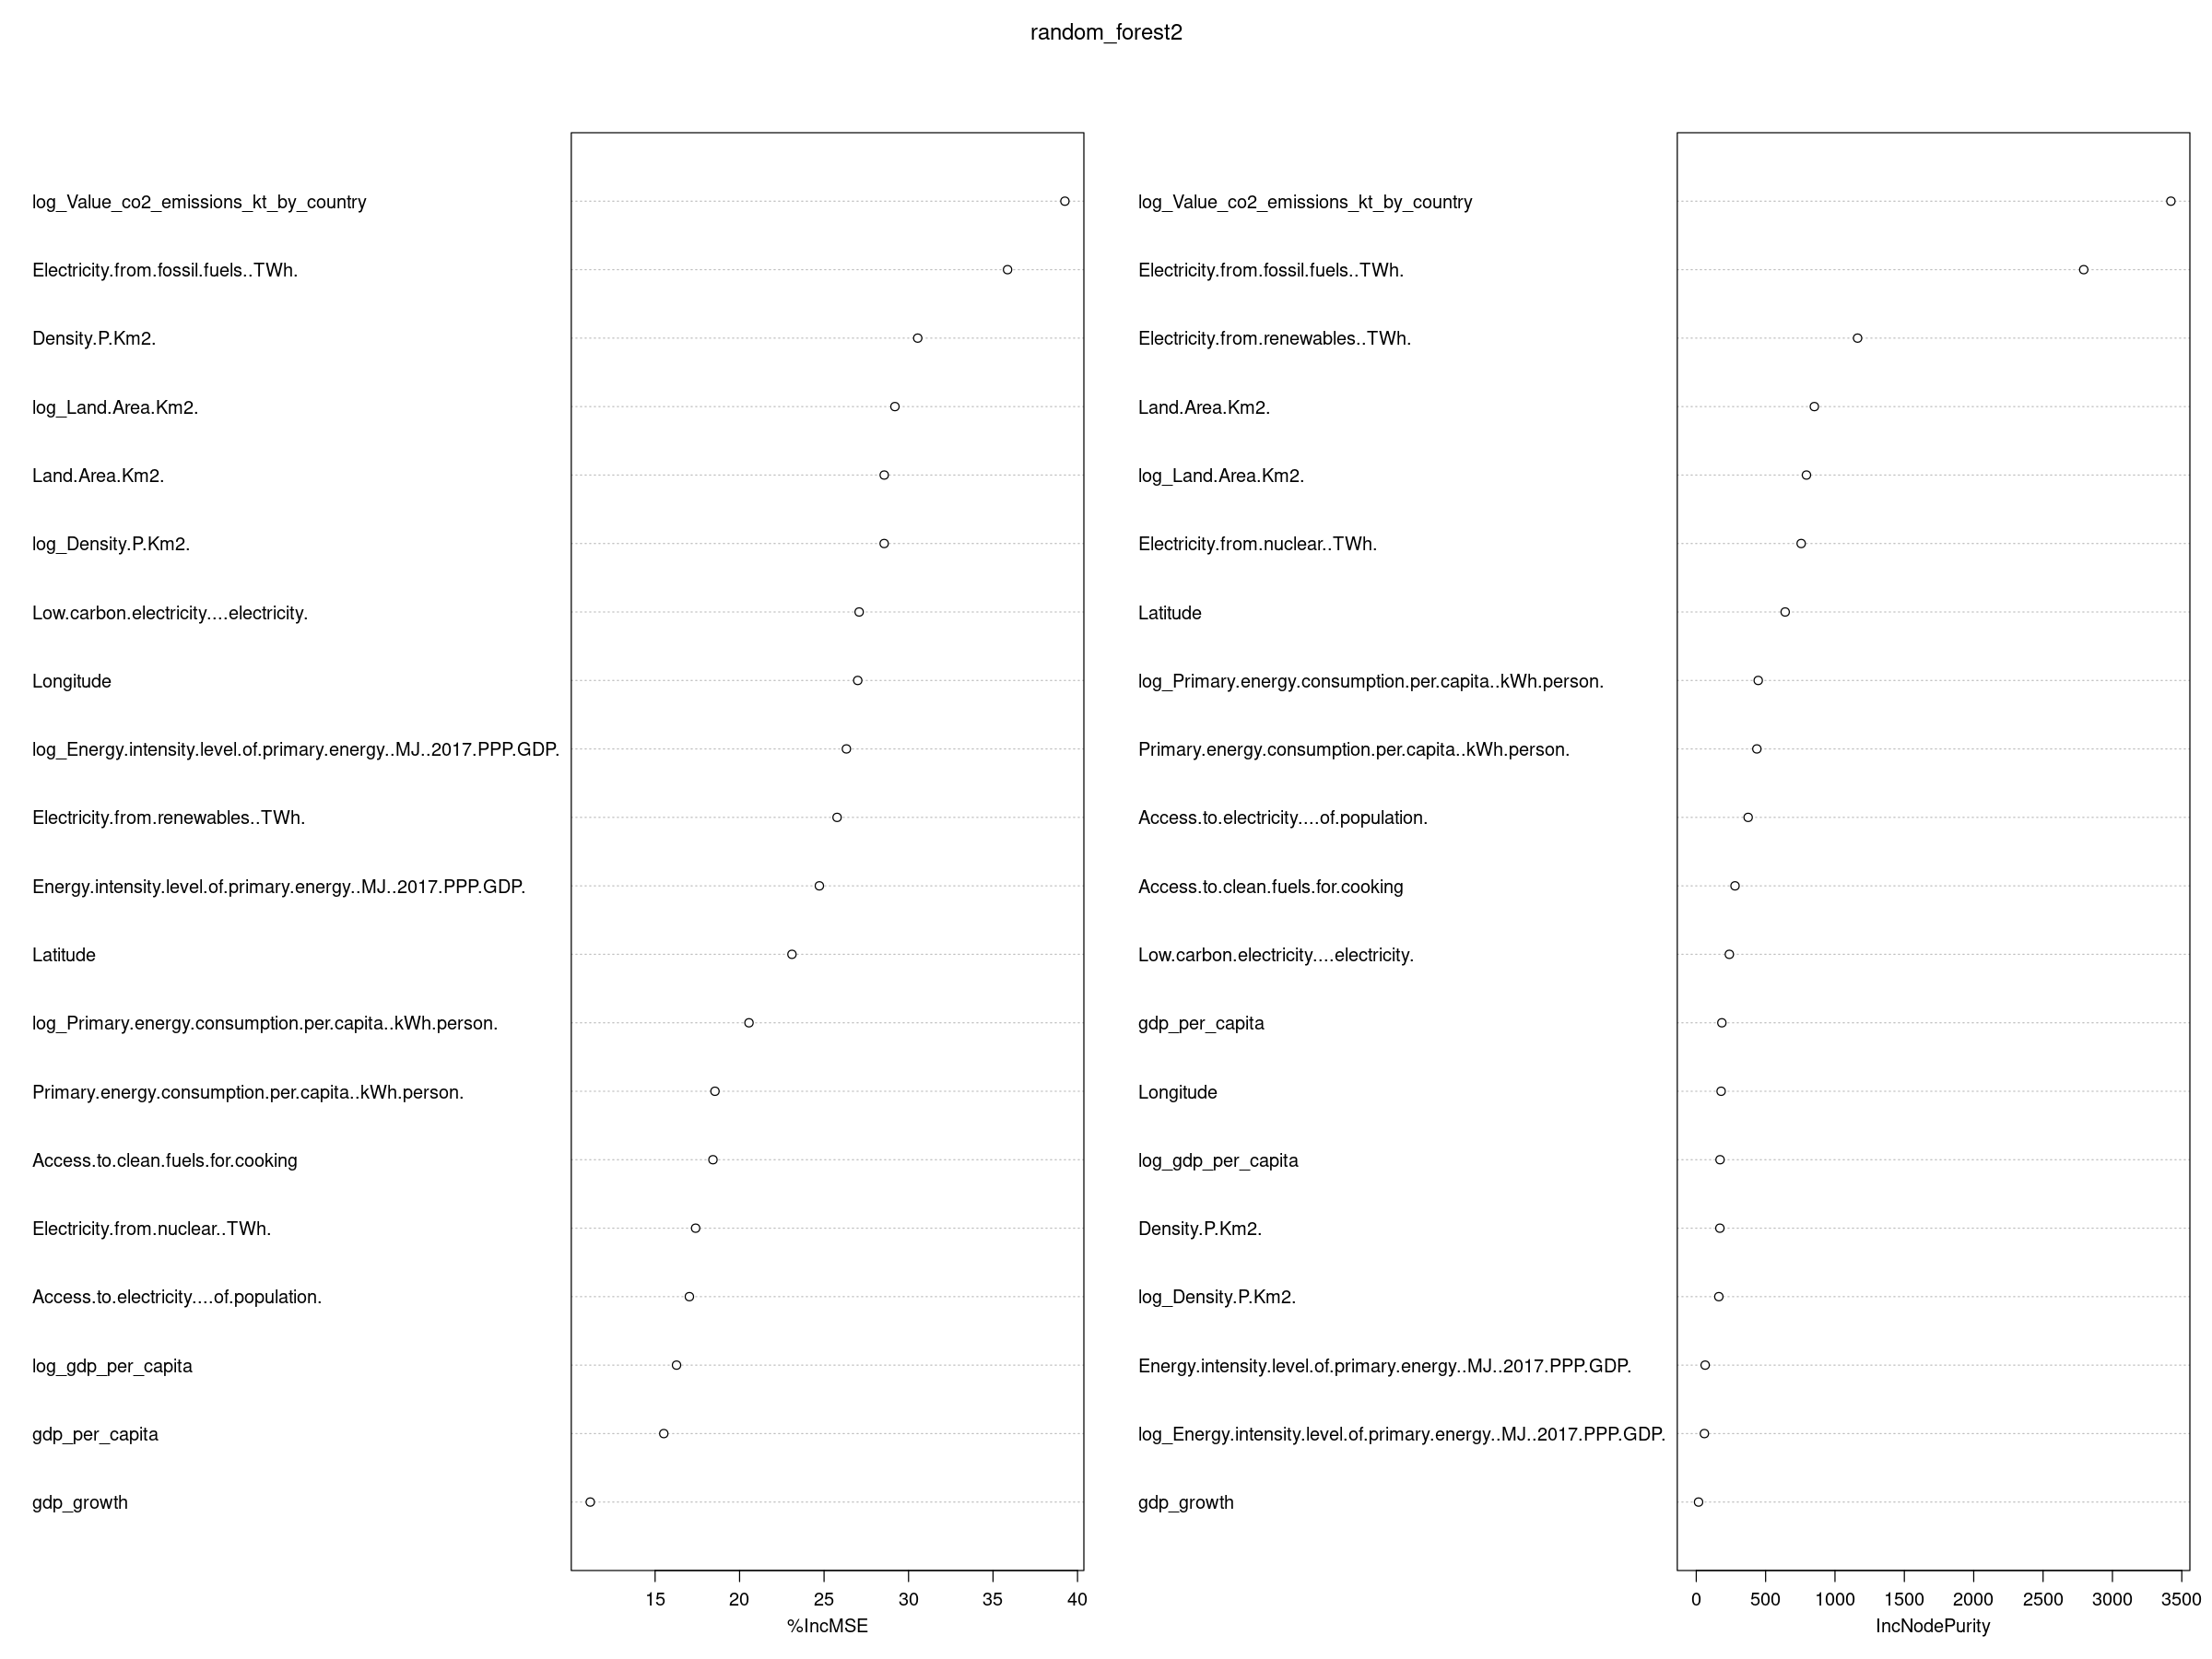

In [96]:
#attributes(rf.reg)
#random_forest2$importance
print('-----Classement des variables selon leur importance------')
sort(round(importance(random_forest2), 2)[,1], decreasing=TRUE)
varImpPlot(random_forest2)

Les variables les plus influentes dans la prédiction de ce modèle sont 'Electricity.from.fossil.fuels..TWh.' et 'Land_Area'.

In [97]:
#Calcul du critère MSE (moyenne du carré des résidus)
paste("Modèle pour forêt aléatoire:", mean(res.rf^2))

[1] "Modèle pour forêt aléatoire: 0.00537056504628275"

## Boosting

In [121]:
library(gbm)

In [150]:
boost.reg = gbm(log_Value_co2_emissions_kt_by_country ~ ., data = train_log, distribution = "gaussian", n.trees = 10000, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.01, verbose = FALSE)

var                                                             
Electricity.from.renewables..TWh.                                Electricity.from.renewables..TWh.                               
Land.Area.Km2.                                                   Land.Area.Km2.                                                  
Latitude                                                         Latitude                                                        
Renewable.energy.share.in.the.total.final.energy.consumption.... Renewable.energy.share.in.the.total.final.energy.consumption....
Electricity.from.nuclear..TWh.                                   Electricity.from.nuclear..TWh.                                  
Primary.energy.consumption.per.capita..kWh.person.               Primary.energy.consumption.per.capita..kWh.person.              
Low.carbon.electricity....electricity.                           Low.carbon.electricity....electricity.                          
Access.to.clean.fuels.for.cooking                                Access.to.clean.fuels.for.cooking                               
Density.P.Km2.                                                   Density.P.Km2.                                                  
Longitude                                                        Longitude                                                       
Access.to.electricity....of.population.                          Access.to.electricity....of.population.                         
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.      Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     
gdp_growth                                                       gdp_growth                                                      
gdp_per_capita                                                   gdp_per_capita                                                  
log_Primary.energy.consumption.per.capita..kWh.person.           log_Primary.energy.consumption.per.capita..kWh.person.          
log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.  log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
log_gdp_per_capita                                               log_gdp_per_capita                                              
log_Density.P.Km2.                                               log_Density.P.Km2.                                              
log_Land.Area.Km2.                                               log_Land.Area.Km2.                                              
                                                                 rel.inf   
Electricity.from.renewables..TWh.                                26.6799030
Land.Area.Km2.                                                   24.7301125
Latitude                                                         12.3783147
Renewable.energy.share.in.the.total.final.energy.consumption.... 11.5298992
Electricity.from.nuclear..TWh.                                   11.1873472
Primary.energy.consumption.per.capita..kWh.person.                5.8733530
Low.carbon.electricity....electricity.                            3.1019860
Access.to.clean.fuels.for.cooking                                 1.9935699
Density.P.Km2.                                                    1.0096214
Longitude                                                         0.8114601
Access.to.electricity....of.population.                           0.7044330
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.       0.0000000
gdp_growth                                                        0.0000000
gdp_per_capita                                                    0.0000000
log_Primary.energy.consumption.per.capita..kWh.person.            0.0000000
log_Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.   0.0000000
log_gdp_per_capita                                                0.0000000
log_Density.P.Km2.                                                0.0000000
log_Land.Area.Km2.   

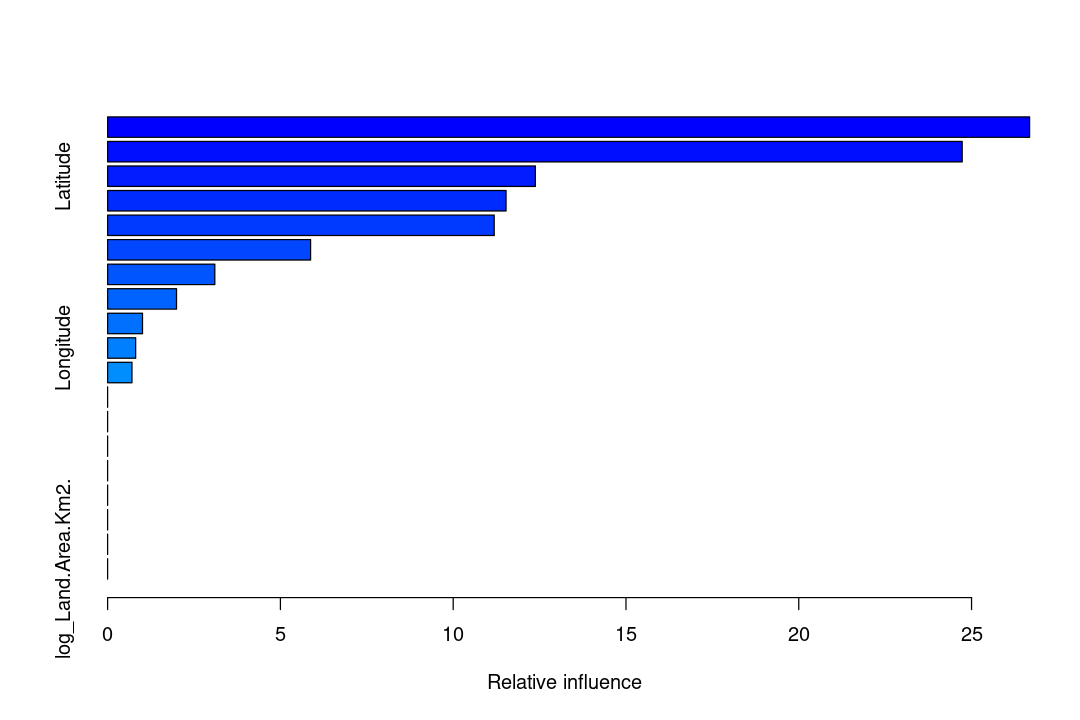

In [138]:
summary(boost.reg)

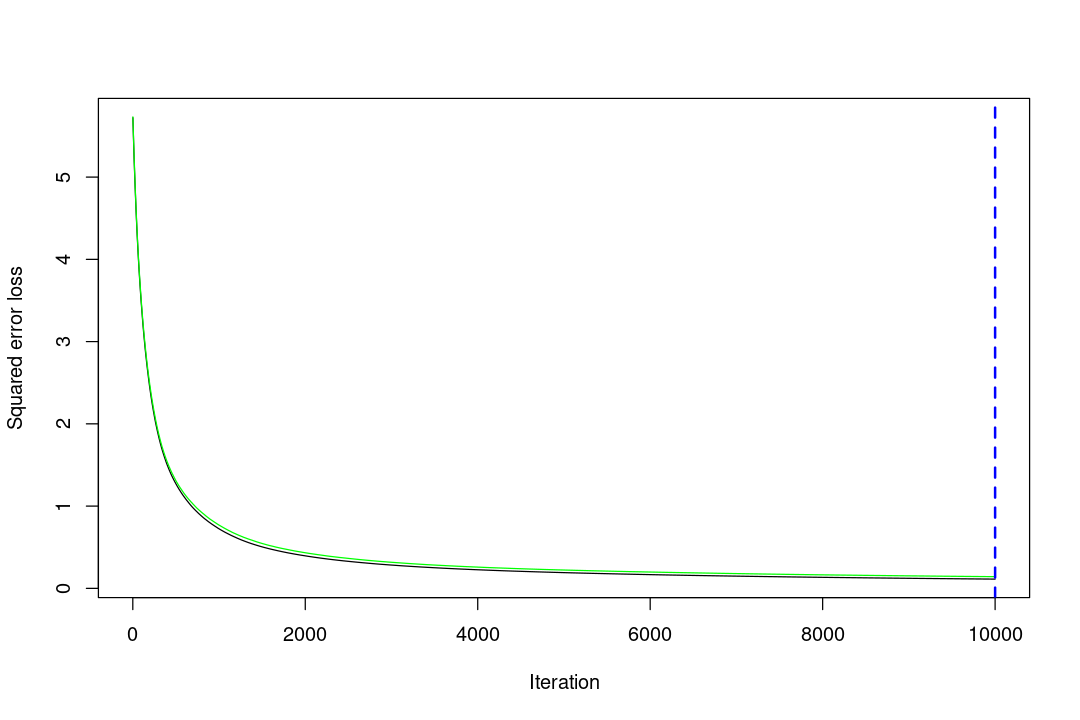

In [151]:
# nombre optimal d'itérations par valiation croisée
best.iter=gbm.perf(boost.reg,method="cv")

Test de la fonction boost en faisant varier le coef de rétrecissement

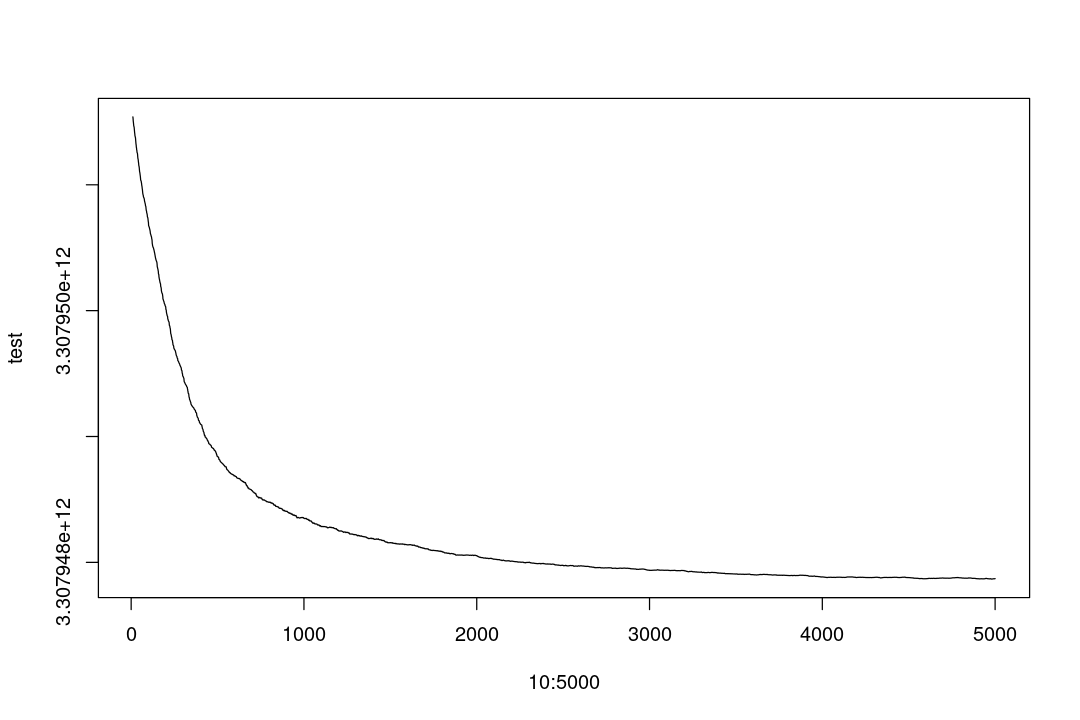

In [156]:
test=numeric()

for (i in 10:5000){
    pred.test=predict(boost.reg,newdata=test_log,n.trees=i)
    err=sum((pred.test-test_log)^2)/nrow(test_log)
    test=c(test,err)
}
plot(10:5000,test,type="l")
abline(v=best.iter)

## Réseaux de neurones

La librairie 'nnet' permet de créer des modèle de réseaux de neurone pour la régression. 
Ici, on crée un modèle où la cible à prédire est 'Value_co2_log' et où les variables explicatives seront 'datappr'.

Le paramètre 'size' spécifie le nimbre de neurones dans la couche cachée du réseau.
Le paramètre 'decay' permet de controler le taux de régularisation appliqué aux poids du modèle pour éviter le surajustement.
Le paramètre 'maxit' spécifie le nombre maximum d'itérations d'entraînement à effectuer.
Le paramètre 'linout = TRUE' indique que la sortie du réseau de neurones sera linéaire.

In [101]:
library(nnet)

In [102]:
#Création du réseau de neurones
nnet=nnet(log_Value_co2_emissions_kt_by_country ~ .,data=train_log,size=5,decay=1, linout=TRUE, maxit=500)
summary(nnet)

# weights:  106
initial  value 219198.086976 
iter  10 value 13153.908022
iter  20 value 12261.102486
iter  30 value 12212.347304
iter  40 value 12150.194502
iter  50 value 12012.780626
iter  60 value 11020.332515
iter  70 value 10389.895268
iter  80 value 8368.523916
iter  90 value 8051.149758
iter 100 value 7842.933561
iter 110 value 7741.033644
iter 120 value 7410.473227
iter 130 value 7388.164150
iter 140 value 7310.627369
iter 150 value 7248.869647
iter 160 value 7156.399688
iter 170 value 7093.007016
iter 180 value 7079.597439
iter 190 value 7016.422068
iter 200 value 6617.381811
iter 210 value 6563.685513
iter 220 value 6310.441337
iter 230 value 6203.143588
iter 240 value 6050.904154
iter 250 value 5905.934467
iter 260 value 5867.686560
iter 270 value 5763.883752
iter 280 value 5593.432693
iter 290 value 5502.750578
iter 300 value 4984.724522
iter 310 value 4865.706412
iter 320 value 4672.114464
iter 330 value 4497.950911
iter 340 value 4445.380717
iter 350 value 4248.431500
it

a 19-5-1 network with 106 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
   0.00    0.00    0.01    0.00    0.00    0.00    0.00    0.00    0.00    0.01 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   0.99   -0.04   -0.04   -0.22   -0.03    0.07   -0.02    0.00    0.04   -0.07 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
   0.00    0.00    0.00    0.00    0.01    0.63    0.42    0.53   -0.31    0.00 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
   0.01   -0.01    0.01    0.06    0.12    0.06   -0.01    0.00   -0.06    0.14 
i10->h3 i11->h3 i12->h3 i13->h3 i14->h3 i15->h3 i16->h3 i17->h3 i18->h3 i19->h3 
   0.00   -0.16    0.00    0.14

Optimisation des paramètres par validation croisée

On recherche ici à ajuster les hyper-paramètres. On va chercher la meilleure combinaison de taille de la couche cachée ('size') et de taux de régularisation ('decay')

In [103]:
library(nnet)

# Définir une plage de valeurs pour le nombre de neurones
neuron_range <- seq(1, 10, by = 1)

# Effectuer la validation croisée pour chaque nombre de neurones
cv_errors <- sapply(neuron_range, function(neurons) {
  # Créer le modèle avec le nombre de neurones spécifié
  model <- nnet(log_Value_co2_emissions_kt_by_country ~ .,
                data = train_log,
                size = neurons,
                decay = 1,       # Autres paramètres si besoin
                linout = TRUE,
                maxit = 500)
  
  # Faire des prédictions sur les données de validation
  predictions <- predict(model, newdata = test_log)
  
  # Calculer l'erreur quadratique moyenne (RMSE)
  rmse <- sqrt(mean((predictions - test_log$log_Value_co2_emissions_kt_by_country)^2))
  
  return(rmse)
})

# Trouver le nombre optimal de neurones avec le plus faible RMSE
optimal_neurons <- neuron_range[which.min(cv_errors)]


# weights:  22
initial  value 173591.460648 
iter  10 value 13256.309525
iter  20 value 13256.172368
final  value 13256.171159 
converged
# weights:  43
initial  value 236614.603277 
iter  10 value 14104.199468
iter  20 value 13255.997465
iter  30 value 12924.673166
iter  40 value 12279.846309
iter  50 value 11705.940211
iter  60 value 10855.075498
iter  70 value 10584.042043
iter  80 value 8574.030541
iter  90 value 7559.193314
iter 100 value 6884.108213
iter 110 value 5755.067124
iter 120 value 5627.180834
iter 130 value 5287.610120
iter 140 value 4947.839152
iter 150 value 4492.717471
iter 160 value 4281.381116
iter 170 value 3850.342331
iter 180 value 3520.650079
iter 190 value 2768.150470
iter 200 value 2711.607507
iter 210 value 2661.531916
iter 220 value 2574.288916
iter 230 value 2477.520218
iter 240 value 2332.000421
iter 250 value 2061.812396
iter 260 value 2051.334410
iter 270 value 2031.751218
iter 280 value 1992.660494
iter 290 value 1894.801422
iter 300 value 1819.309143


In [104]:
library(e1071)
plot(tune.nnet(log_Value_co2_emissions_kt_by_country ~.,data=train_log, size=c(30,100), decay=c(1,2), maxit=500,linout=TRUE))
#plot(tune.nnet(log_Value_co2_emissions_kt_by_country ~.,data=train_log,size=4:5,decay=1:10))

Quelle combinaison de paramètres donne la meilleure performance ? 

Modèle optimal :

In [ ]:
#on genere le réseau de neurones résultant de notre choix de paramètres précédent
nnetOpt=nnet(log_Value_co2_emissions_kt_by_country~.,data=train_log,size=4,decay=10,linout=TRUE,maxit=200)

# calcul et graphe des résidus
fit.nnetOpt=predict(nnet.reg,data=datappr)
res.nnetOpt=fit.nnetr-train_log$log_Value_co2_emissions_kt_by_country
gplot.res(fit.nnetOpt,res.nnetOpt,titre="")

Prévision de l'échantillon test

In [ ]:
pred.nnetOpt=predict(nnetOpt,newdata=test_log)

## Comparaison des différents modèles 

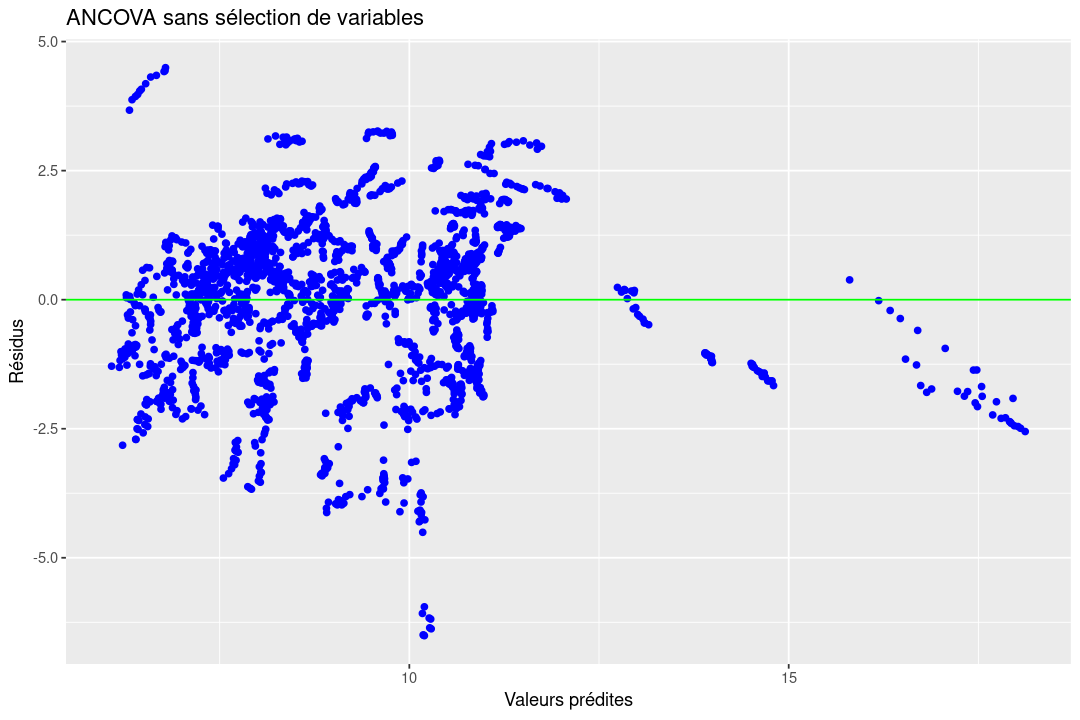

In [108]:
# Graphe des résidus pour modèle de régréssion linéaire simple
gplot.res(fit2,res2,"ANCOVA sans sélection de variables")

## Complétion des données manquantes :

On garde seulement les variables quantitatives pour comparer les différentes méthodes de complétion 

In [46]:
Xnaquanti=df_na[,-c(1,2)] #avec valeurs NA
ind.na=which(is.na(Xnaquanti),arr.ind=TRUE)
ind.na.CO2 = which(is.na(Xnaquanti$Value_co2_emissions_kt_by_country),arr.ind=TRUE)

Rappel de la proportion de valeur manquante dans notre dataframe df 

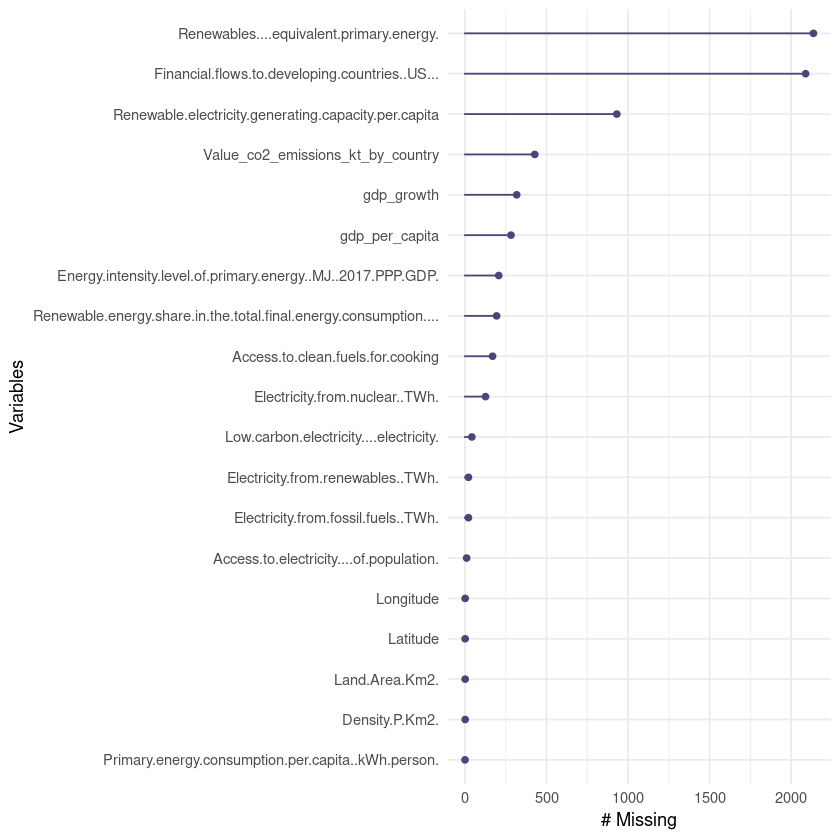

In [5]:
gg_miss_var(Xnaquanti)

On enlève également du dataframe les variables qui contiennent trop de valeurs manquantes, ce n'est pas intéressant de les compléter car on manque d'information.

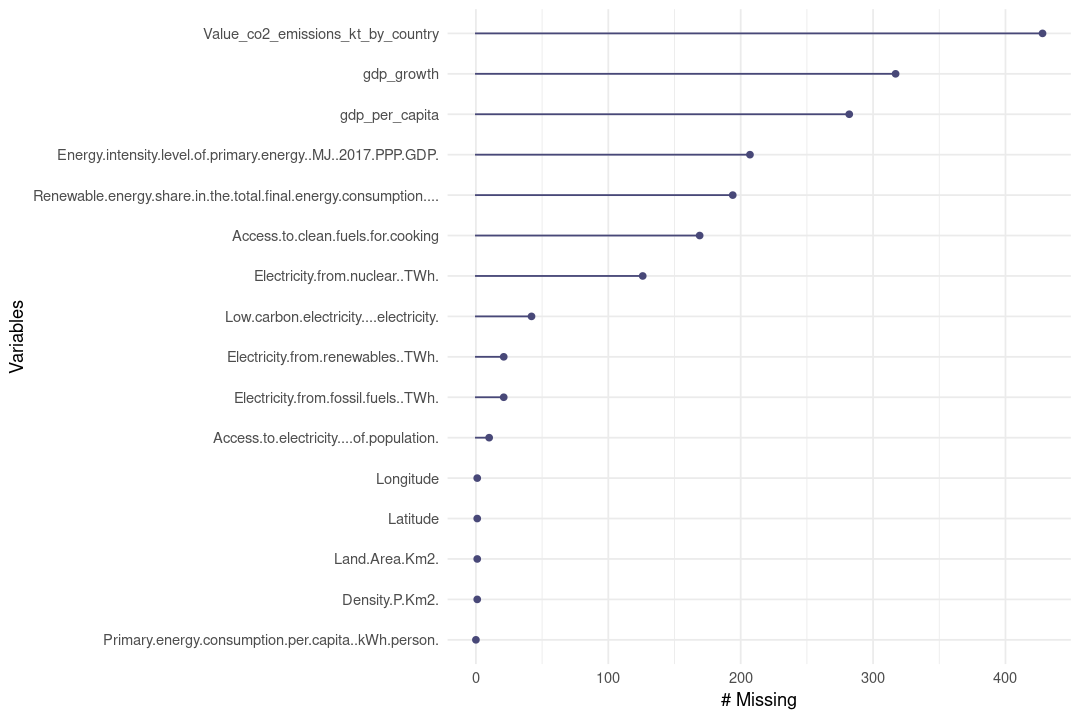

In [45]:
Xnaquanti=df_na[,-c(1,2,5,6,15)] 
gg_miss_var(Xnaquanti)

#### 1. Complétion par la moyenne

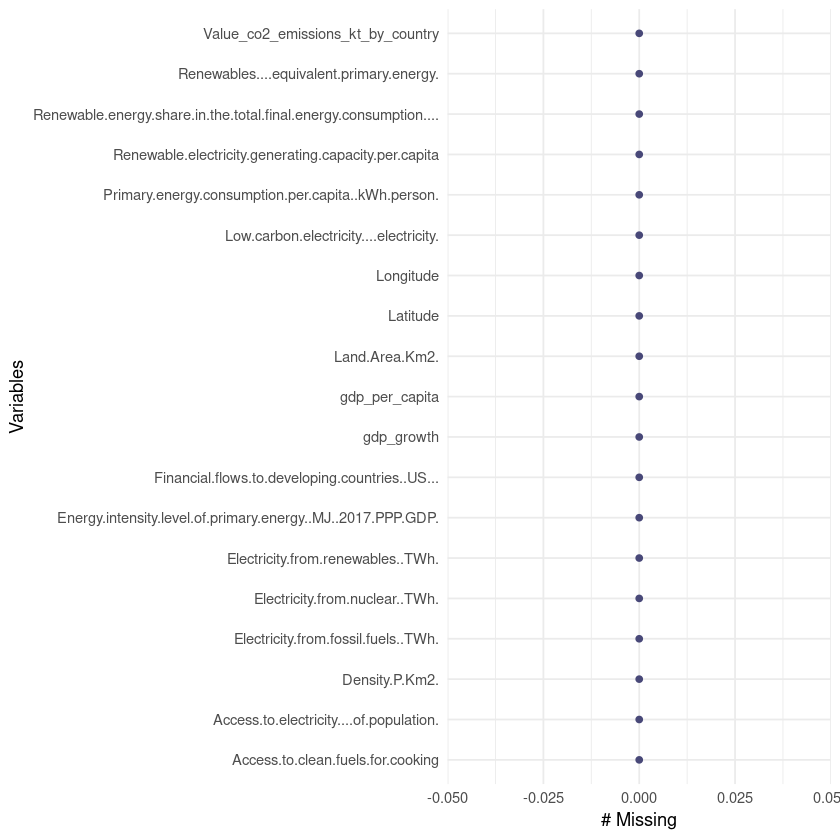

In [6]:
moy<- colMeans(Xnaquanti, na.rm = TRUE) #on calcule la moyenne de chaque colonne du dataframe
X_moy=Xnaquanti
ind.na=which(is.na(X_moy),arr.ind=TRUE) #on cherche les indices pour lesquels il y a un NA dans le dataframe
X_moy[ind.na]=moy[ind.na[,2]] #on remplace les valeurs NA par la moyenne de la colonne correspondante
gg_miss_var(X_moy)

On voit bien qu'on n'a plus aucune valeur NA.

#### 2. Complétion par la médiane

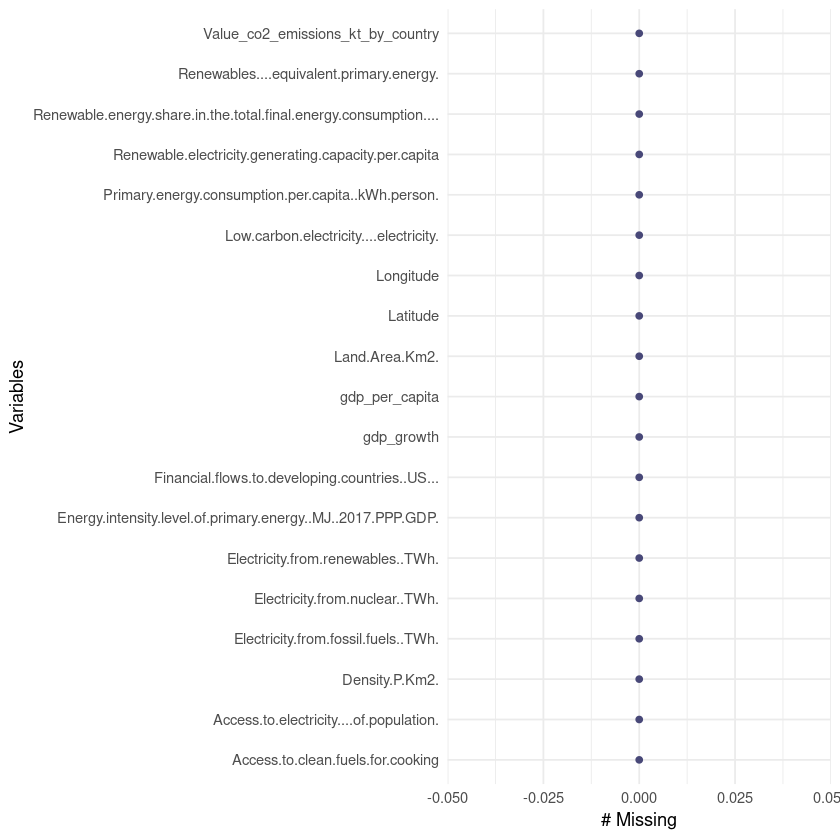

In [7]:
med=apply(Xnaquanti,2,median,na.rm=TRUE)
X.med=Xnaquanti
ind.na=which(is.na(X.med),arr.ind=TRUE)
X.med[ind.na]=med[ind.na[,2]]
gg_miss_var(X.med)

#### 3. Complétion par la derniere valeur connue


Attachement du package : ‘zoo’


Les objets suivants sont masqués depuis ‘package:base’:

    as.Date, as.Date.numeric




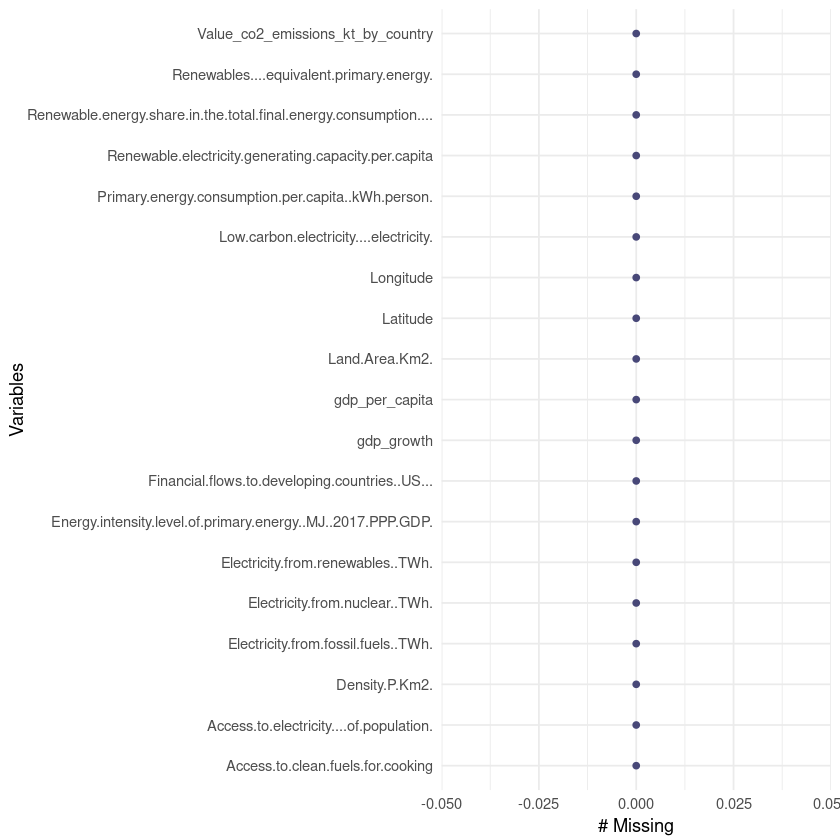

In [8]:
library(zoo) 
X.locf=na.locf(Xnaquanti,na.rm=FALSE) #parcours dans un sens 
X.locf=na.locf(X.locf,na.rm=FALSE,fromLast=TRUE)  #parcours dans l'autre sens 
gg_miss_var(X.locf)

#### 4. Complétion par les k plus proches voisins

L'algorithme de complétion KNN (K-Nearest Neighbors) impute les valeurs manquantes en remplaçant chaque valeur manquante par la moyenne ou la médiane des valeurs des k voisins les plus proches dans l'espace des caractéristiques.

L'argument 'k=5' spécifie que pour chaque valeur manquante, l'algorithme kNN utilisera les 5 voisins les plus proches pour estimer la valeur manquante.

Le chargement a nécessité le package : colorspace

Le chargement a nécessité le package : grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attachement du package : ‘VIM’


L'objet suivant est masqué depuis ‘package:datasets’:

    sleep




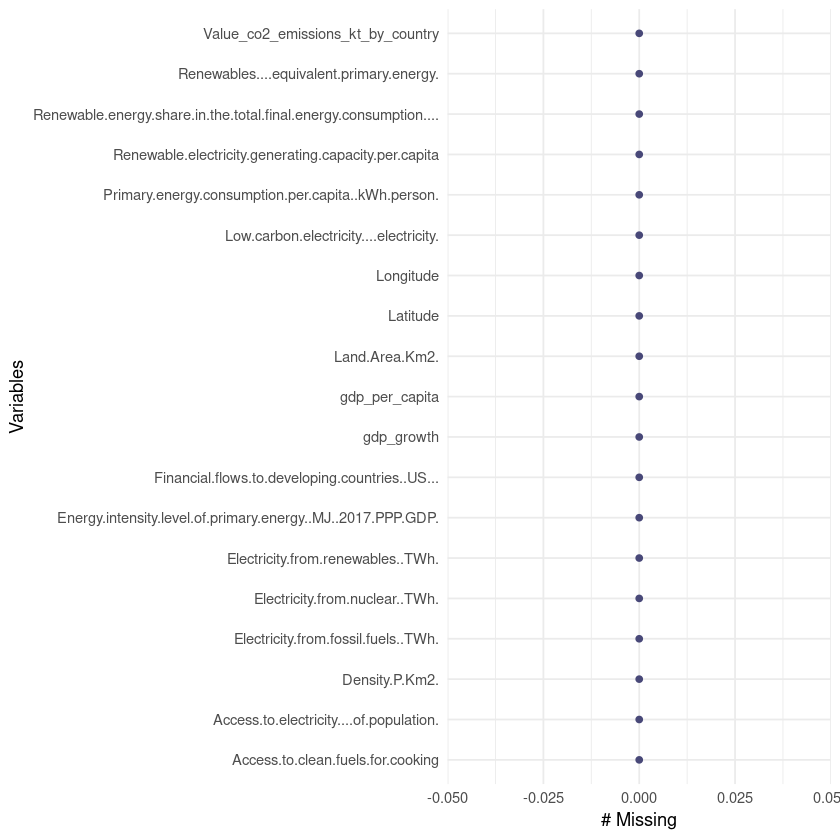

In [9]:
library(VIM)
X.kNN=kNN(Xnaquanti, k=5, imp_var=FALSE) 
gg_miss_var(X.kNN)

#### 5. Complétion par MissForest

MissForest est une méthode d'imputation des données manquantes qui utilise des forêts aléatoires. Elle remplace les valeurs manquantes en utilisant des prédictions basées sur les données observées dans les autres variables. Ce processus est itératif et se poursuit jusqu'à convergence. 

In [11]:
library(missForest)
X.mf=missForest(Xnaquanti,xtrue=Xquanti,maxiter=100)
gg_miss_var(X.mf)

ERROR: Error in eval(expr, envir, enclos): objet 'Xquanti' introuvable


#### 6. Complétion par Amélia II

Cette méthode est appelée méthode de l'imputation multiple et consiste à imputer m valeurs pour chaque cellule manquante dans le dataframe et à créer m ensembles de données "complétées". (les valeurs observées sont les mêmes, mais les valeurs manquantes sont remplies avec différentes imputations).

In [ ]:
library(Amelia)
nb.amelia = 5
X.amel = amelia(Xnaquanti, m=nb.amelia)
gg_miss_var(X.amel)